In [1]:
"""Jupyter Notebook for relaxation time analysis"""
#The main analysis parts adapted from script by  H. Antila, with help from S. Ollila and T. Ferreira
#saved in relaxation_times.py
# Last modified by R. Nencini, 19.10.2021
import yaml
import sys
import numpy as np
from scipy import optimize
sys.path.insert(1, '/home/ricky/Documents/from_work/git/NMR_FF_tools/relaxation_times/')
sys.path.insert(1, '/home/nenciric/Documents/git/NMR_FF_tools/relaxation_times/')

import relaxation_times as rt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
#from numba import jit #

#gyromagnetic ratios for further developmant
# !!! NOTICE!!!
#values taken from matlab code and projecct work and slightly different than those in Wikipedia
#these values are also in the external file --> if change is needed; has to be changed there
#values here in jupyter just for the information and verify, why they are different
#!!! NOTICE END !!!
gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;

/home/ricky/anaconda3/envs/all3/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

begin=0
end=100000
RM_avail=False

atom1="C1"
atom2="H11"

atom1="C3"
atom2="H31"

moleculeType="Protein"

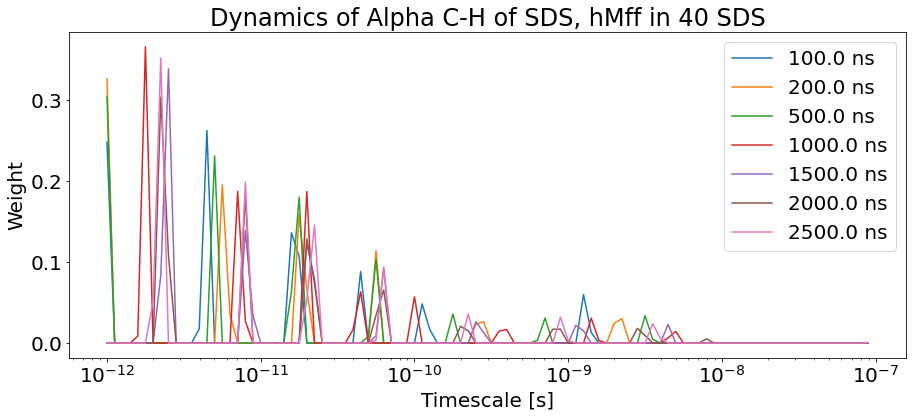

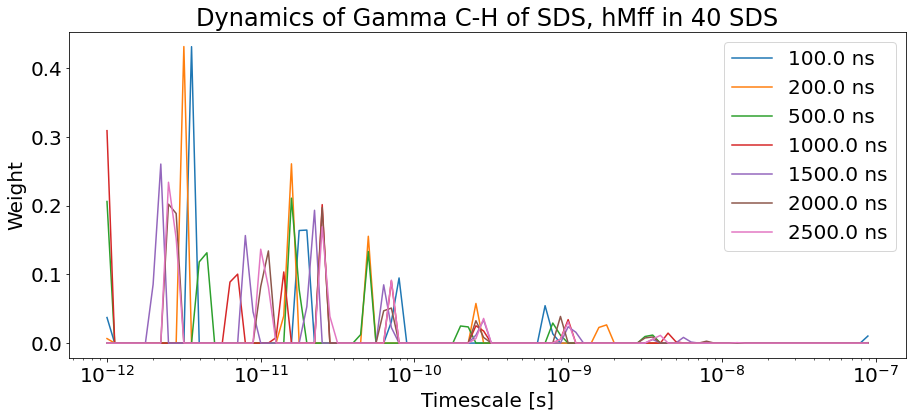

In [38]:
ends=[100000,200000,500000,1000000,1500000,2000000,2500000]
plt.figure(figsize=(15, 6))
plt.rcParams.update({'font.size': 20})
plt.xscale('log')

coef=100

for end in ends:
    output_name="hMff_40SDS_micelle_SDS_relax_coef_0_"+str(end)+"_020822.out"
    coefficients=np.loadtxt(output_name)
    plt.plot(coefficients[:coef,0],coefficients[:coef,1],label=str(end/1000)+" ns")
    
plt.xlabel("Timescale [s]")
plt.ylabel("Weight")
plt.title("Dynamics of Alpha C-H of SDS, hMff in 40 SDS")
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
plt.rcParams.update({'font.size': 20})
plt.xscale('log')

for end in ends:
    output_name="hMff_40SDS_micelle_SDS_relax_coef_0_"+str(end)+"_020822.out"
    coefficients=np.loadtxt(output_name)
    plt.plot(coefficients[:coef,0],coefficients[:coef,2],label=str(end/1000)+" ns")
    
plt.xlabel("Timescale [s]")
plt.ylabel("Weight")
plt.title("Dynamics of Gamma C-H of SDS, hMff in 40 SDS")
plt.legend()
plt.show()

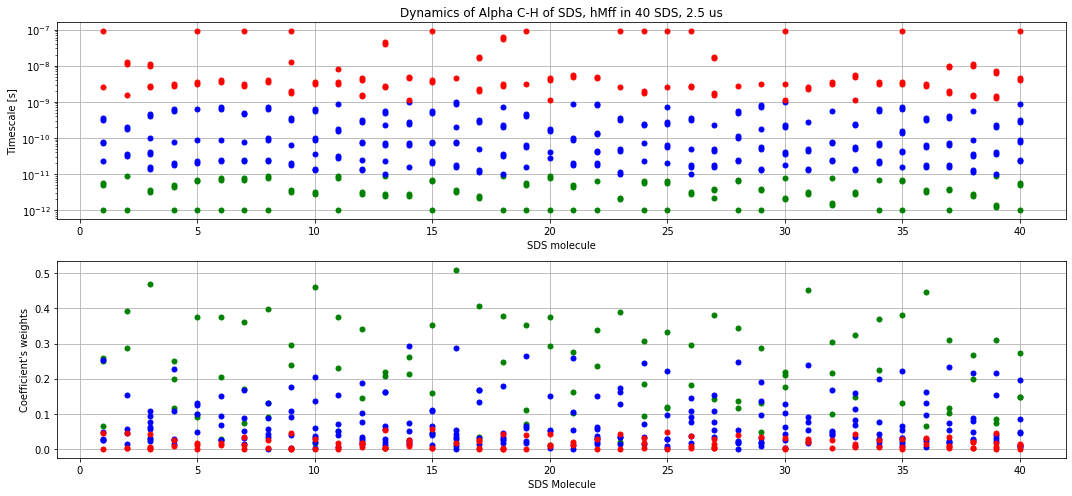

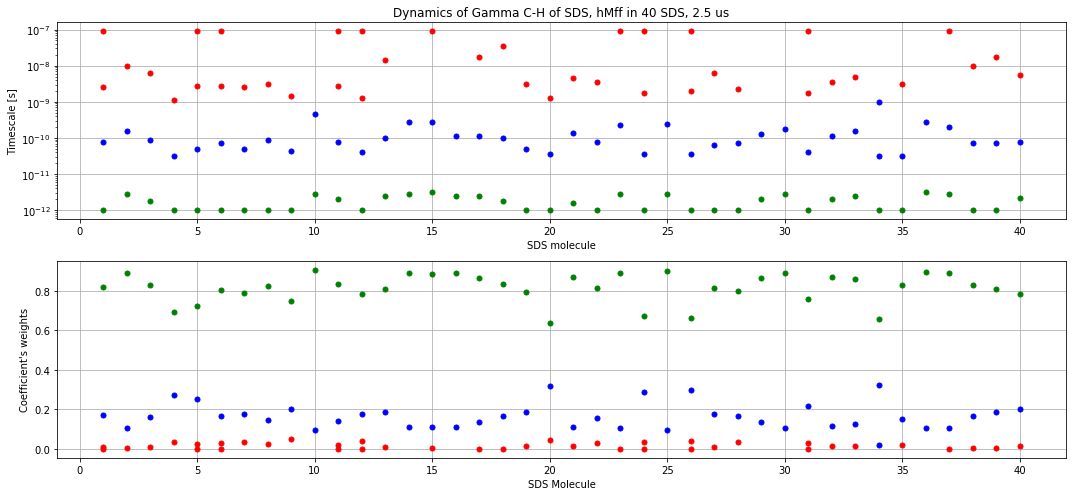

In [10]:
# 3.8.2022 - plot 40 SDS, hMff for diferent lengts of trajectories + individual molecules

timescale_grouping=30

Ctimes_to_save=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_2500000_030822_alpha.out")

plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True



fig, (ax1, ax2) = plt.subplots(2)

ax1.title.set_text("Dynamics of Alpha C-H of SDS, hMff in 40 SDS, 2.5 us")

ax1.grid()
ax1.set_yscale('log')
ax1.set_ylabel("Timescale [s]")
ax1.set_xlabel("SDS molecule")
#ax1.set_ylim([10**(-12.4), 10**(-6.8)])


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                   
       
    

ax2.grid()

ax2.set_ylabel("Coefficient's weights")
ax2.set_xlabel("SDS Molecule")


for residue in range(1,Ctimes_to_save.shape[1]):
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                     
        
plt.show()    


Ctimes_to_save=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_2500000_030822_gamma.out")


plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True



fig, (ax1, ax2) = plt.subplots(2)

ax1.title.set_text("Dynamics of Gamma C-H of SDS, hMff in 40 SDS, 2.5 us")

ax1.grid()
ax1.set_yscale('log')
ax1.set_ylabel("Timescale [s]")
ax1.set_xlabel("SDS molecule")
#ax1.set_ylim([10**(-12.4), 10**(-6.8)])


for residue in range(1,Ctimes_to_save.shape[1]):
    timescale=0
    while timescale < Ctimes_to_save.shape[0]:
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax1.plot(residue, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
            timescale+=timescale_grouping-1  
        timescale+=1
       
    

ax2.grid()

ax2.set_ylabel("Coefficient's weights")
ax2.set_xlabel("SDS Molecule")


for residue in range(1,Ctimes_to_save.shape[1]):
    timescale=0
    while timescale<Ctimes_to_save.shape[0]:
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            for i in range(1,timescale_grouping):
                try:
                    Ctimes_to_save[timescale,residue]+=Ctimes_to_save[timescale+i,residue]
                except:
                    pass
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax2.plot(residue, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
            timescale+=timescale_grouping-1
        timescale+=1
        
plt.show() 




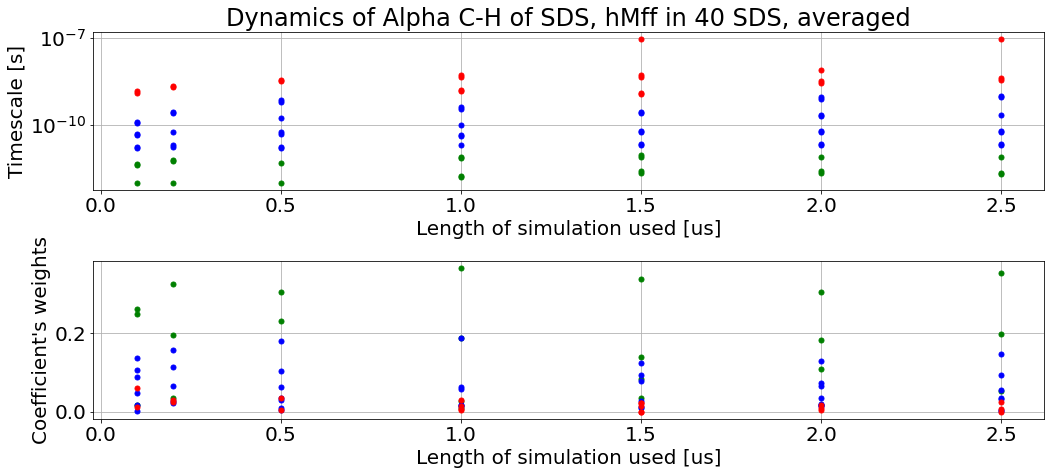

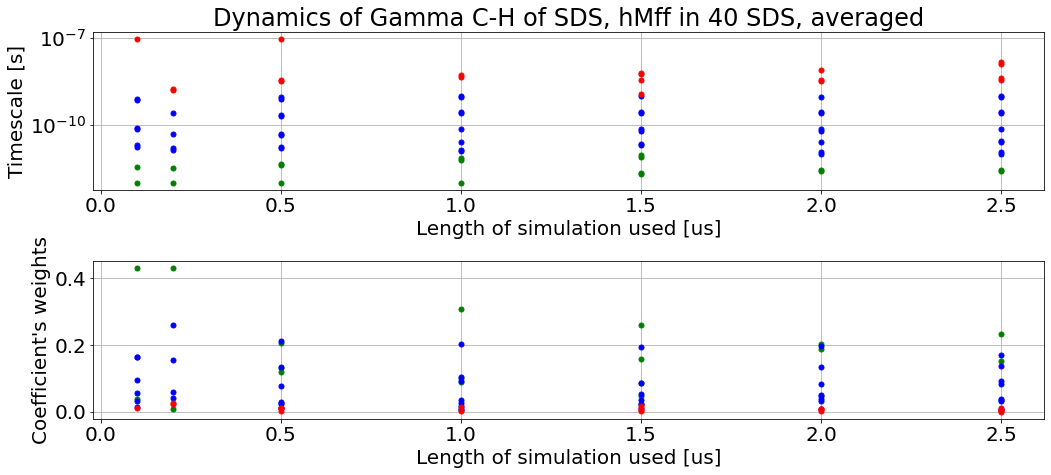

In [34]:
Ctimes_to_save=np.zeros((100,8))
Ctimes_to_save[:,0:2]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_100000_020822.out")[:,0:2]
Ctimes_to_save[:,2]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_200000_020822.out")[:,1]
Ctimes_to_save[:,3]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_500000_020822.out")[:,1]
Ctimes_to_save[:,4]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_1000000_020822.out")[:,1]
Ctimes_to_save[:,5]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_1500000_020822.out")[:,1]
Ctimes_to_save[:,6]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_2000000_020822.out")[:,1]
Ctimes_to_save[:,7]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_2500000_020822.out")[:,1]


plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True



fig, (ax1, ax2) = plt.subplots(2)

ax1.title.set_text("Dynamics of Alpha C-H of SDS, hMff in 40 SDS, averaged")

ax1.grid()
ax1.set_yscale('log')
ax1.set_ylabel("Timescale [s]")
ax1.set_xlabel("Length of simulation used [us]")
#ax1.set_ylim([10**(-12.4), 10**(-6.8)])

ends=[100000,200000,500000,1000000,1500000,2000000,2500000]

for residue in range(1,Ctimes_to_save.shape[1]):
    length=ends[residue-1]/1000000
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax1.plot(length, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax1.plot(length, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax1.plot(length, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                   
       
    

ax2.grid()

ax2.set_ylabel("Coefficient's weights")
ax2.set_xlabel("Length of simulation used [us]")


for residue in range(1,Ctimes_to_save.shape[1]):
    length=ends[residue-1]/1000000
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax2.plot(length, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax2.plot(length, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax2.plot(length, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                     
        
plt.show() 



Ctimes_to_save=np.zeros((100,8))
Ctimes_to_save[:,0:2]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_100000_020822.out")[:,[0,2]]
Ctimes_to_save[:,2]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_200000_020822.out")[:,2]
Ctimes_to_save[:,3]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_500000_020822.out")[:,2]
Ctimes_to_save[:,4]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_1000000_020822.out")[:,2]
Ctimes_to_save[:,5]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_1500000_020822.out")[:,2]
Ctimes_to_save[:,6]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_2000000_020822.out")[:,2]
Ctimes_to_save[:,7]=np.loadtxt("hMff_40SDS_micelle_SDS_relax_coef_0_2500000_020822.out")[:,2]


plt.rcParams["figure.figsize"] = [15.00, 7]
plt.rcParams["figure.autolayout"] = True



fig, (ax1, ax2) = plt.subplots(2)

ax1.title.set_text("Dynamics of Gamma C-H of SDS, hMff in 40 SDS, averaged")

ax1.grid()
ax1.set_yscale('log')
ax1.set_ylabel("Timescale [s]")
ax1.set_xlabel("Length of simulation used [us]")
#ax1.set_ylim([10**(-12.4), 10**(-6.8)])

ends=[100000,200000,500000,1000000,1500000,2000000,2500000]

for residue in range(1,Ctimes_to_save.shape[1]):
    length=ends[residue-1]/1000000
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax1.plot(length, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax1.plot(length, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax1.plot(length, Ctimes_to_save[timescale,0], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                   
       
    

ax2.grid()

ax2.set_ylabel("Coefficient's weights")
ax2.set_xlabel("Length of simulation used [us]")


for residue in range(1,Ctimes_to_save.shape[1]):
    length=ends[residue-1]/1000000
    for timescale in range(0,Ctimes_to_save.shape[0]):
        #print("{} {} \n".format(i, j))
        if Ctimes_to_save[timescale,residue]>0:
            if Ctimes_to_save[timescale,0]>10**(-9):
                ax2.plot(length, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
            elif Ctimes_to_save[timescale,0]>10**(-11):
                ax2.plot(length, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue")
            else:
                ax2.plot(length, Ctimes_to_save[timescale,residue], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
                     
        
plt.show() 

In [53]:
"""Parameters to be specified by the user"""
OP=0 # order parameter
smallest_corr_time=0 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/50 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
#magn_field=850
#magnetic_field=magn_field*2*np.pi/gammaH*10**6
nuclei="2H" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen 



##############3
## CHANGE IN THE CODE 6.4.2022, not going throught the whole content of the folder anymore
###############
take_all_in_folder="number" #"yes"/"no"/"number" analyze all in folder? useful for proteins, if no, fill the following line, if yes fill the folder path
input_corr_file="alphaCF.xvg"

input_prefix="NHrotaCF_" # mostly for peptides, works with take_all_in_folder="no"



## eElab 31.5.22
folder_path="corr_func_0_32480_C1_H11/"
output_name="hMff_50SDS_micelle_SDS_relax_coef.out"
residues=2


author_name="Ricky Nencini"

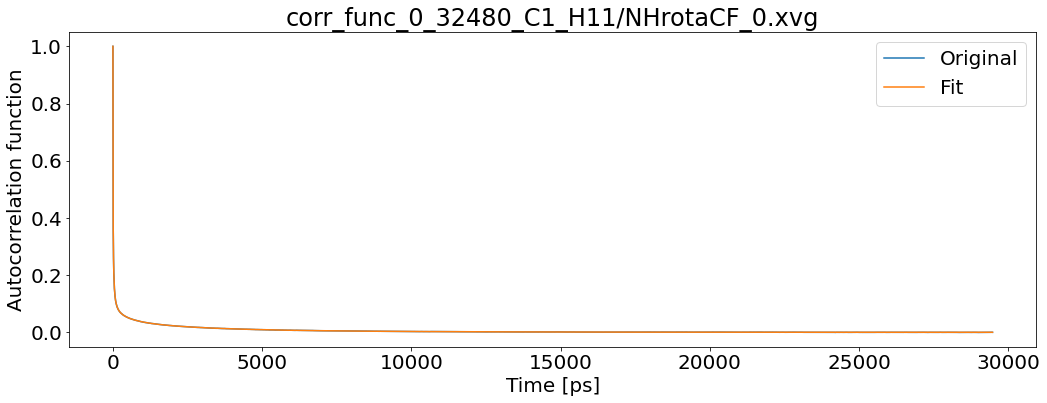

T1: 0.018157078470558703 T2: 0.01508136557712924 NOE: 0


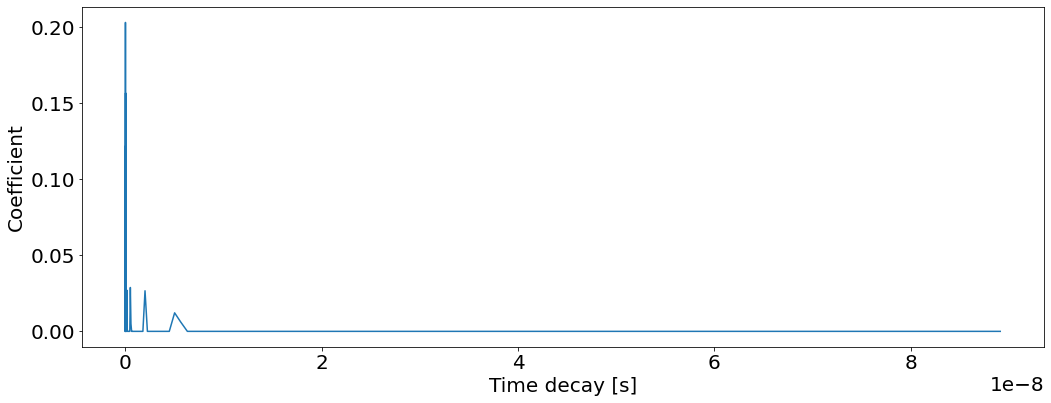

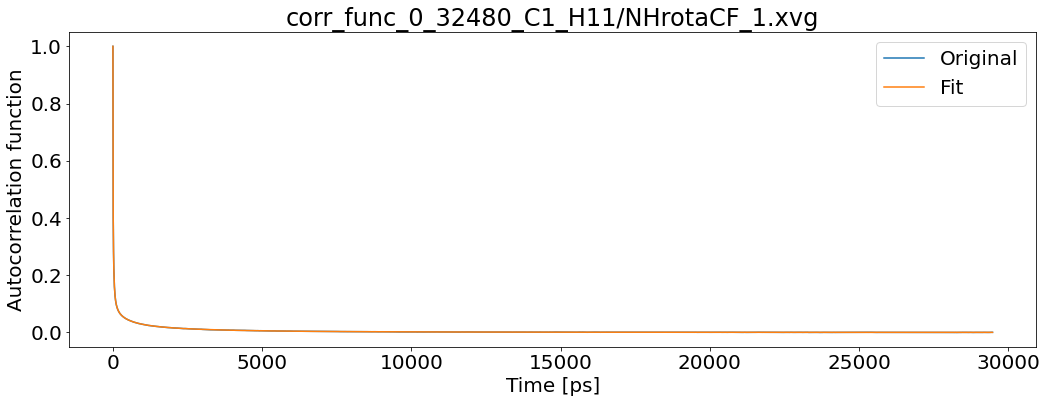

T1: 0.022605312551829446 T2: 0.019481458595531905 NOE: 0


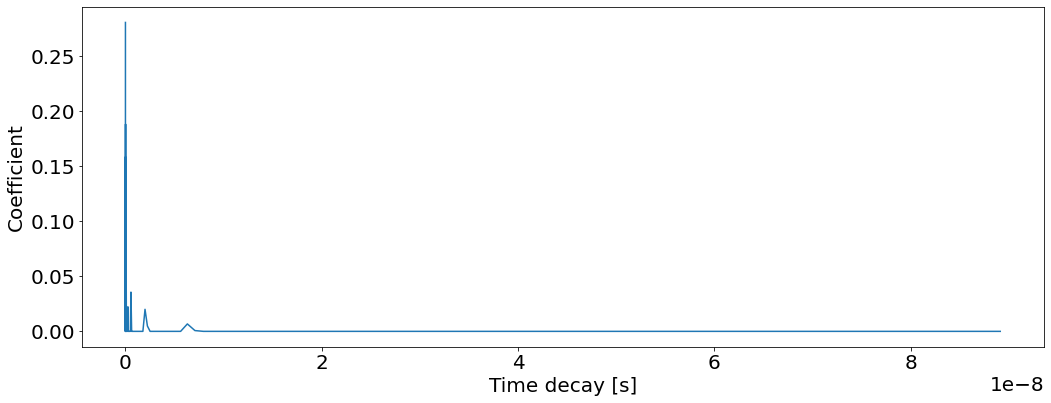

In [54]:
"""Execute the code - this part needs not be modified"""
#rt.initilize_output(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name,author_name)
if take_all_in_folder=="yes":
    for file in os.listdir(folder_path):
        input_corr_file = folder_path+os.fsdecode(file)
        rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
elif take_all_in_folder=="number":
    step_exp=(biggest_corr_time-smallest_corr_time)/N_exp_to_fit
    Ctimes = 10 ** np.arange(smallest_corr_time, biggest_corr_time, step_exp)
    Ctimes = Ctimes * 0.001 * 10 ** (-9);
    Ctimes_to_save=np.zeros([len(Ctimes),residues+1])
    Ctimes_to_save[:,0]=Ctimes
    for i in range(0,residues):
        input_corr_file = folder_path+input_prefix+str(i)+".xvg"
        AA=rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
        Ctimes_to_save[:,i+1]=AA.Coeffs
else:
    rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)
    
np.savetxt(output_name,Ctimes_to_save)

In [ ]:

begin=0
end=-1
RM_avail=False

atom1="C1"
atom2="H11"

atom1="C3"
atom2="H31"

moleculeType="Protein"

path="/media/ricky/Ricky2020/Corys_peptides/ricky_new/eElab_50SDS_monomer/"
grofile="no-water_eElab_50SDS_monomer.gro"
xtcfile="non_water_eElab_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica2.xtc"
tprfile="no-water.tpr"

for atom1, atom2 in [("C1","H11"),("C3","H31")]:
    rt.CalculateCorrelationFunctions(path,begin,end,RM_avail,atom1,atom2,moleculeType,grofile,xtcfile,tprfile)

Number of corelation functions to calculate: 50 

Calculatin correlation function 1,  last frame 3000000
Calculatin correlation function 2,  last frame 3000000
Calculatin correlation function 3,  last frame 3000000
Calculatin correlation function 4,  last frame 3000000
Calculatin correlation function 5,  last frame 3000000
Calculatin correlation function 6,  last frame 3000000
Calculatin correlation function 7,  last frame 3000000
Calculatin correlation function 8,  last frame 3000000
Calculatin correlation function 9,  last frame 3000000
Calculatin correlation function 10,  last frame 3000000
Calculatin correlation function 11,  last frame 3000000
Calculatin correlation function 12,  last frame 3000000
Calculatin correlation function 13,  last frame 3000000
Calculatin correlation function 14,  last frame 3000000
Calculatin correlation function 15,  last frame 3000000
Calculatin correlation function 16,  last frame 3000000
Calculatin correlation function 17,  last frame 3000000
Calcula

In [2]:
"""Parameters to be specified by the user"""
OP=0 # order parameter
smallest_corr_time=1 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/50 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
#magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
magn_field_MHz=850 # for values in MHz
magnetic_field=magn_field_MHz*2*np.pi/gammaH*10**6
nuclei="15N" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen 

folder_path="new_analysis/hMff_40SDS_replica1/"
output_path="new_analysis/"
output_name="hMff_40SDS_replica1"
#output_name=output_path+output_name
author_name="Ricky Nencini"
yaml_output=output_path+output_name+".yaml"

In [10]:
save_dest="new_analysis/hMff_40SDS_replica1.yaml"
with open(save_dest) as yaml_file:
    hMff_40_1= yaml.load(yaml_file,Loader=yaml.FullLoader)

save_dest="new_analysis/hMff_40SDS_replica2.yaml"
with open(save_dest) as yaml_file:
     hMff_40_2= yaml.load(yaml_file,Loader=yaml.FullLoader)
    
save_dest="new_analysis/hMff_40SDS_replica3.yaml"
with open(save_dest) as yaml_file:
     hMff_40_3= yaml.load(yaml_file,Loader=yaml.FullLoader)
        
        
save_dest="new_analysis/hMff_45SDS_replica1.yaml"
with open(save_dest) as yaml_file:
    hMff_45_1= yaml.load(yaml_file,Loader=yaml.FullLoader)

save_dest="new_analysis/hMff_45SDS_replica2.yaml"
with open(save_dest) as yaml_file:
     hMff_45_2= yaml.load(yaml_file,Loader=yaml.FullLoader)
    
save_dest="new_analysis/hMff_45SDS_replica3.yaml"
with open(save_dest) as yaml_file:
     hMff_45_3= yaml.load(yaml_file,Loader=yaml.FullLoader)
        
        

save_dest="new_analysis/hMff_50SDS_replica1.yaml"
with open(save_dest) as yaml_file:
    hMff_50_1= yaml.load(yaml_file,Loader=yaml.FullLoader)

save_dest="new_analysis/hMff_50SDS_replica2.yaml"
with open(save_dest) as yaml_file:
     hMff_50_2= yaml.load(yaml_file,Loader=yaml.FullLoader)
    
save_dest="new_analysis/hMff_50SDS_replica3.yaml"
with open(save_dest) as yaml_file:
     hMff_50_3= yaml.load(yaml_file,Loader=yaml.FullLoader)
        
        
save_dest="new_analysis/hMff_60SDS_replica1.yaml"
with open(save_dest) as yaml_file:
    hMff_60_1= yaml.load(yaml_file,Loader=yaml.FullLoader)

save_dest="new_analysis/hMff_60SDS_replica2.yaml"
with open(save_dest) as yaml_file:
     hMff_60_2= yaml.load(yaml_file,Loader=yaml.FullLoader)
    
save_dest="new_analysis/hMff_60SDS_replica3.yaml"
with open(save_dest) as yaml_file:
     hMff_60_3= yaml.load(yaml_file,Loader=yaml.FullLoader)

In [11]:
save_dest="new_analysis/GWALP_dimer_40SDS_replica1.yaml"
with open(save_dest) as yaml_file:
     GWALP_dimer_40_1= yaml.load(yaml_file,Loader=yaml.FullLoader)
        
        
save_dest="new_analysis/GWALP_dimer_45SDS_replica1.yaml"
with open(save_dest) as yaml_file:
     GWALP_dimer_45_1 = yaml.load(yaml_file,Loader=yaml.FullLoader)

save_dest="new_analysis/GWALP_dimer_50SDS_replica1.yaml"
with open(save_dest) as yaml_file:
     GWALP_dimer_50_1 = yaml.load(yaml_file,Loader=yaml.FullLoader)
    
save_dest="new_analysis/GWALP_dimer_60SDS_replica1.yaml"
with open(save_dest) as yaml_file:
     GWALP_dimer_60_1 = yaml.load(yaml_file,Loader=yaml.FullLoader)
        
        
save_dest="new_analysis/GWALP_dimer_70SDS_replica1.yaml"
with open(save_dest) as yaml_file:
     GWALP_dimer_70_1 = yaml.load(yaml_file,Loader=yaml.FullLoader)

In [12]:
save_dest="new_analysis/GWALP_monomer_40SDS_replica1.yaml"
with open(save_dest) as yaml_file:
     GWALP_monomer_40_1= yaml.load(yaml_file,Loader=yaml.FullLoader)
        
save_dest="new_analysis/GWALP_monomer_45SDS_replica1.yaml"
with open(save_dest) as yaml_file:
     GWALP_monomer_45_1= yaml.load(yaml_file,Loader=yaml.FullLoader)
        
save_dest="new_analysis/GWALP_monomer_50SDS_replica1.yaml"
with open(save_dest) as yaml_file:
     GWALP_monomer_50_1= yaml.load(yaml_file,Loader=yaml.FullLoader)

In [13]:
save_dest="new_analysis/eElab_50_dimer.yaml"
with open(save_dest) as yaml_file:
     eElab_dimer_50_1= yaml.load(yaml_file,Loader=yaml.FullLoader)

save_dest="new_analysis/eElab_50_monomer_2.yaml"
with open(save_dest) as yaml_file:
     eElab_monomer_50_2= yaml.load(yaml_file,Loader=yaml.FullLoader)
        


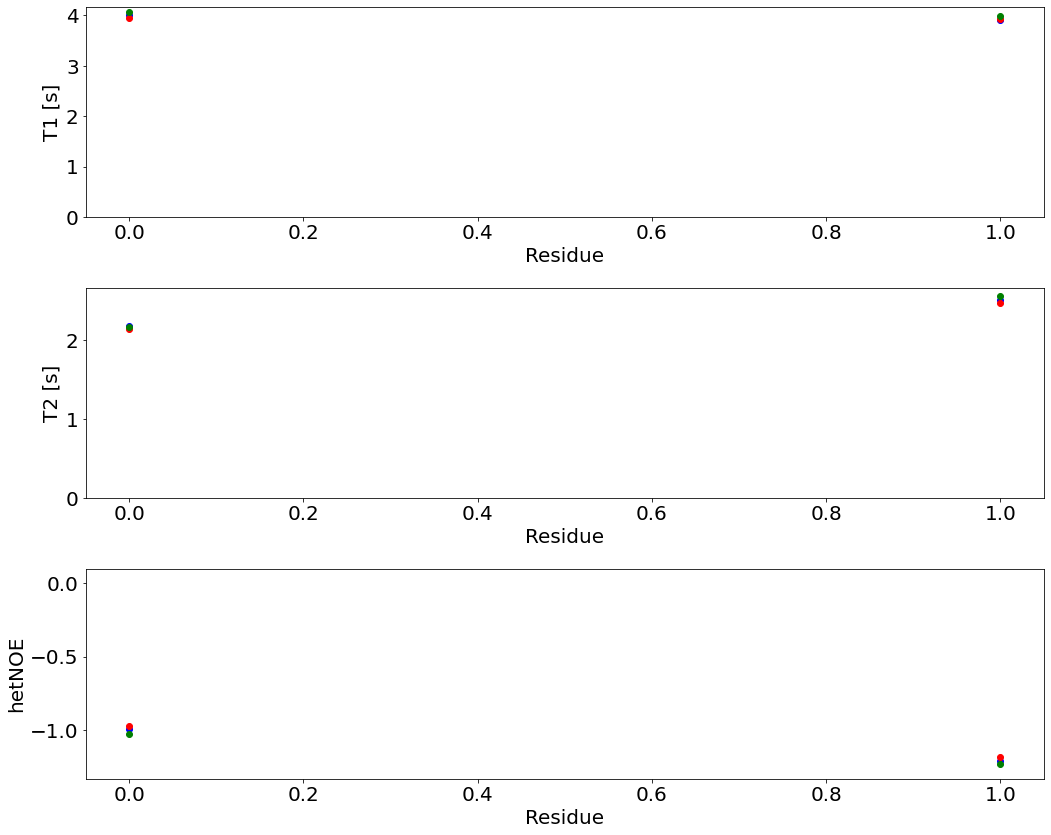

In [12]:
rt.plot_replicas(hMff_40_1,hMff_40_2,hMff_40_3)

In [28]:
def plot_replicas(save_name,plotType,number,*replicas):
    plt.rcParams["figure.figsize"] = [15.00, 12]
    plt.rcParams["figure.autolayout"] = True

    fig, (ax1, ax2, ax3) = plt.subplots(3)
    
    ax1.set_ylabel("T1 [s]")
    ax1.set_xlabel("Residue")
    ax2.set_ylabel("T2 [s]")
    ax2.set_xlabel("Residue")
    ax3.set_ylabel("hetNOE")
    ax3.set_xlabel("Residue")
    max_T1=0
    min_T1=100
    min_T2=100
    max_T2=0
    max_noe=-10
    min_noe=10
    col=["blue","red","green","brown","gray"]
    colors=[]
    

    #ax1.plot(GWALP_res,T1_GWALP+T1_GWALP,"s",color="black",markersize=10)
    #ax2.plot(GWALP_res,T2_GWALP+T2_GWALP,"s",color="black",markersize=10)
    #ax3.plot(GWALP_res,hetNOE_GWALP+hetNOE_GWALP,"s",color="black",markersize=10)
    
    for colo in col:
        for nu in range(number):
            colors.append(colo)
            
    #colors=["blue","blue","blue","red","red","red","green","green","green","gray","gray","gray","brown","brown","brown"]
    averages={}
    for i in replicas[0]:
        averages[i]={}
        for j,replica in enumerate(replicas):
            if (j//number) not in averages[i]:
                averages[i][(j//number)]={}
                if "T1" not in averages[i][(j//number)]:
                    averages[i][(j//number)]["T1"]=[replica[i]["T1"]]
                    averages[i][(j//number)]["T2"]=[replica[i]["T2"]]
                    averages[i][(j//number)]["hetNOE"]=[replica[i]["hetNOE"]]
            else:
                averages[i][(j//number)]["T1"].append(replica[i]["T1"])
                averages[i][(j//number)]["T2"].append(replica[i]["T2"])
                averages[i][(j//number)]["hetNOE"].append(replica[i]["hetNOE"])
                
            if plotType=="all":
                ax1.plot(i+(0.1*(j//number)),replica[i]["T1"],"o",color=colors[j])
                ax2.plot(i+(0.1*(j//number)),replica[i]["T2"],"o",color=colors[j])
                ax3.plot(i+(0.1*(j//number)),replica[i]["hetNOE"],"o",color=colors[j])
            max_T2=max(max_T2,replica[i]["T2"])
            max_T1=max(max_T1,replica[i]["T1"])
            min_T1=min(min_T1,replica[i]["T1"])
            min_T2=min(min_T2,replica[i]["T2"])
            max_noe=max(max_noe,replica[i]["hetNOE"])
            min_noe=min(min_noe,replica[i]["hetNOE"])
        if plotType=="average":
            for j,exp in enumerate(averages[i]):
                ax1.errorbar(i+0.1*j,np.average(averages[i][exp]["T1"]),np.std(averages[i][exp]["T1"],ddof=1),fmt='o',markersize=5,color=col[j])
                ax2.errorbar(i+0.1*j,np.average(averages[i][exp]["T2"]),np.std(averages[i][exp]["T2"],ddof=1),fmt='o',markersize=5,color=col[j])
                ax3.errorbar(i+0.1*j,np.average(averages[i][exp]["hetNOE"]),np.std(averages[i][exp]["hetNOE"],ddof=1),fmt='o',markersize=5,color=col[j])
            
    ax1.set_ylim([min_T1-0.1,max_T1+0.1 ])
    ax2.set_ylim([min_T2-0.1,max_T2+0.1 ])
    ax3.set_ylim([min_noe-0.1,max_noe+0.1 ])
    #ax1.text(0,0.35,"GWALP, 40 SDS",color=col[0],fontsize=20)
    #ax1.text(0,0.20,"GWALP, 50 SDS",color=col[1],fontsize=20)
    #ax1.text(0,0.05,"GWALP, 60 SDS",color=col[2],fontsize=20)
    #ax1.text(0,-0.10,"GWALP, 70 SDS",color=col[3],fontsize=20)
    
    
    
    plt.savefig(save_name)
    
    
def PlotTimescales_replicas(merge,groupTimes,title="Title",xlabel="xlabel",ylim=None,ylim_weig=None,*aminoAcidsReplicas):
    plt.rcParams["figure.figsize"] = [15.00, 7]
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams.update({'font.size': 20})

    
    
    fig, (ax1, ax2) = plt.subplots(2)

    ax1.title.set_text(title)
    
    
    
    ax1.grid()
    ax1.set_yscale('log')
    ax1.set_ylabel("Timescale [s]")
    ax1.set_xlabel(xlabel)
    
    
    #for residue in range(1,48):
    #    ax1.axvline(x = residue, color = '0.85', )
    
    
    ax2.grid()
    ax2.set_ylim(0,1)
    ax2.set_ylabel("Coefficient's weights")
    ax2.set_xlabel(xlabel)
    
    colors=["blue","orange","green","red","purple","brown","ping","gray","olive","cyan"]
    markers=["o","v","s","*","P","D","p","X"]
    for k,aminoAcids in enumerate(aminoAcidsReplicas):
        

        step_exp=(aminoAcids[0].biggest_corr_time-aminoAcids[0].smallest_corr_time)/aminoAcids[0].N_exp_to_fit
        Ctimes = 10 ** np.arange(aminoAcids[0].smallest_corr_time, aminoAcids[0].biggest_corr_time, step_exp)
        Ctimes = Ctimes * 0.001 * 10 ** (-9);
        Ctimes_list=[Ctimes]

        for i in range(len(aminoAcids)):
            Ctimes_list.append(aminoAcids[i].Coeffs)
            Ctimes=np.array(Ctimes_list)
            Ctimes=np.transpose(Ctimes)
        
        ax1.set_ylim(Ctimes[0,0]/10,Ctimes[-1,0]*10)

        working_Ctimes=np.copy(Ctimes)

        #ax1.set_ylim([10**(-12.4), 10**(-6.8)])
        if not ylim==None:
            ax1.set_ylim(ylim[0],ylim[1])
            
        if not ylim_weig==None:
            ax2.set_ylim(ylim_weig[0],ylim_weig[1])    
            

        """Plot the timescales, user specifies the merge to be used.
        The merge works as follow: The code finds the first timescale with
        weight bigger bigger than 0 and merges with 'merge' subsequent timescales.
        The final result is plotted as a weighted average of the merged points."""

        
        
        for residue in range(1,working_Ctimes.shape[1]):
            timescale=0
            while timescale < working_Ctimes.shape[0]:
                #print("{} {} \n".format(i, j))
                if working_Ctimes[timescale,residue]>0:
                    time_to_plot=working_Ctimes[timescale,0]
                    if merge>1:
                        time_to_plot=0
                        total_weight=0
                        for i in range(0,merge):
                            try:
                                time_to_plot+=working_Ctimes[timescale+i,0]*working_Ctimes[timescale+i,residue]
                                total_weight+=working_Ctimes[timescale+i,residue]
                            except:
                                pass
                        time_to_plot/=total_weight


                    if time_to_plot<groupTimes[0]:
                        ax1.plot(residue+k*0.15, time_to_plot, marker=markers[0], markersize=10, markeredgecolor=colors[k], markerfacecolor=colors[k])
                    else:
                        for i in range(0,len(groupTimes)-1):
                            if time_to_plot>groupTimes[i] and time_to_plot<groupTimes[i+1]:
                                ax1.plot(residue+k*0.15, time_to_plot, marker=markers[i+1], markersize=10, markeredgecolor=colors[k], markerfacecolor=colors[k])
                            elif time_to_plot>groupTimes[-1]:
                                ax1.plot(residue+k*0.15, time_to_plot, marker=markers[len(groupTimes)+1], markersize=10, markeredgecolor=colors[k], markerfacecolor=colors[k])

                    timescale+=merge-1
                timescale+=1






        for residue in range(1,working_Ctimes.shape[1]):
            timescale=0
            while timescale < working_Ctimes.shape[0]:
                #print("{} {} \n".format(i, j))
                if working_Ctimes[timescale,residue]>0:
                    time_to_plot=working_Ctimes[timescale,0]
                    if merge>1:
                        time_to_plot=0
                        total_weight=0
                        for i in range(1,merge):
                            try:
                                total_weight+=working_Ctimes[timescale,residue]
                                time_to_plot+=working_Ctimes[timescale,0]*working_Ctimes[timescale,residue]
                                working_Ctimes[timescale,residue]+=working_Ctimes[timescale+i,residue]

                            except:
                                pass
                        time_to_plot/=total_weight


                    if time_to_plot<groupTimes[0]:
                        ax2.plot(residue+k*0.15, working_Ctimes[timescale,residue], marker=markers[0], markersize=10, markeredgecolor=colors[k], markerfacecolor=colors[k])
                    else:
                        for i in range(0,len(groupTimes)-1):
                            if time_to_plot>groupTimes[i] and time_to_plot<groupTimes[i+1]:
                                ax2.plot(residue+k*0.15, working_Ctimes[timescale,residue], marker=markers[i+1], markersize=10, markeredgecolor=colors[k], markerfacecolor=colors[k])
                            elif time_to_plot>groupTimes[-1]:
                                ax2.plot(residue+k*0.15, working_Ctimes[timescale,residue], marker=markers[len(groupTimes)+1], markersize=10, markeredgecolor=colors[k], markerfacecolor=colors[k])
                    timescale+=merge-1
                timescale+=1

     
    
    plt.show()   


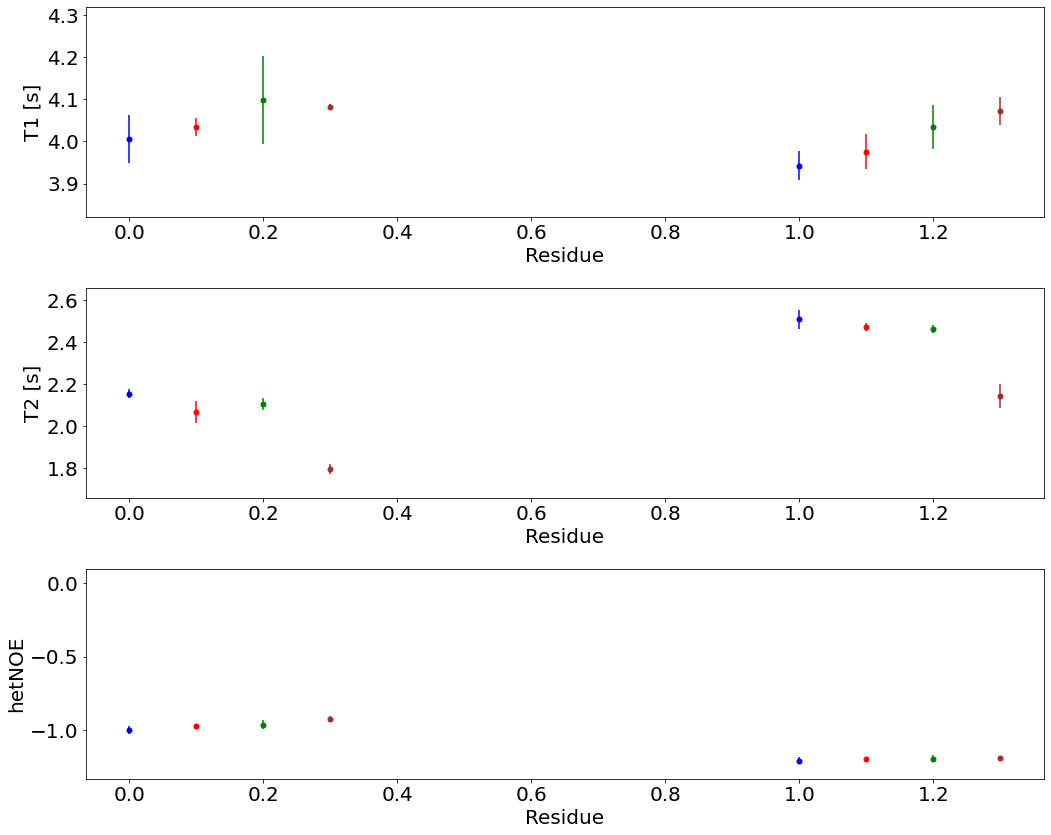

In [44]:
systems=[hMff_40_1,hMff_40_2,hMff_40_3,hMff_45_1,hMff_45_2,hMff_45_3,hMff_50_1,hMff_50_2,hMff_50_3,hMff_60_1,hMff_60_2,hMff_60_3]
plot_replicas("hMff.png","average",3,*systems)

/home/ricky/anaconda3/envs/all3/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ricky/anaconda3/envs/all3/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


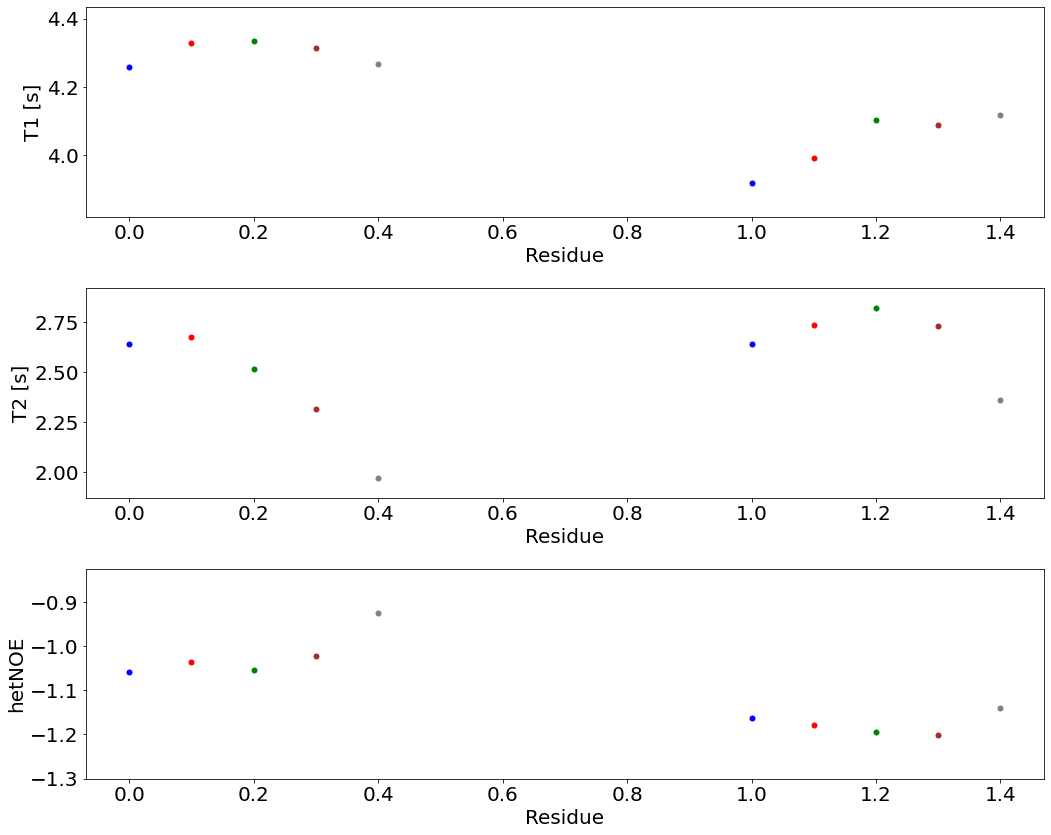

In [28]:
systems=[GWALP_dimer_40_1,GWALP_dimer_45_1,GWALP_dimer_50_1,GWALP_dimer_60_1,GWALP_dimer_70_1]
plot_replicas("GWALP.png","average",1,*systems)

/home/ricky/anaconda3/envs/all3/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ricky/anaconda3/envs/all3/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


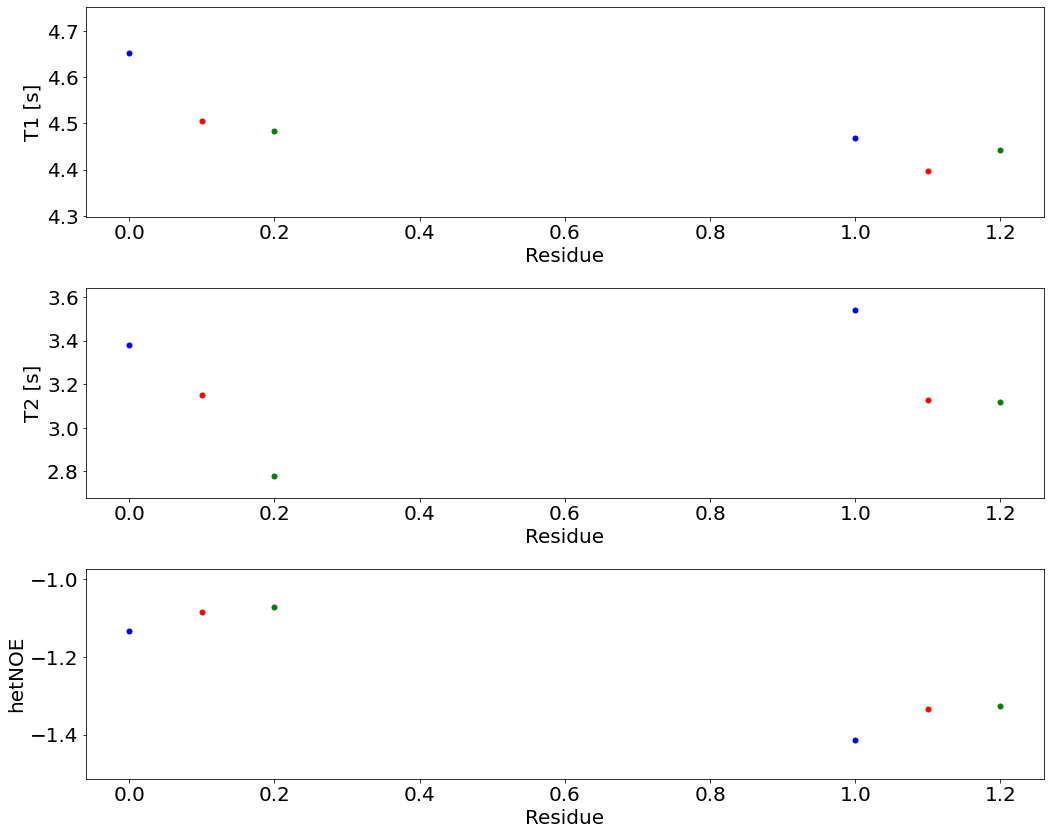

In [31]:
systems=[GWALP_monomer_40_1,GWALP_monomer_45_1,GWALP_monomer_50_1]
plot_replicas("GWALP_mon.png","average",1,*systems)

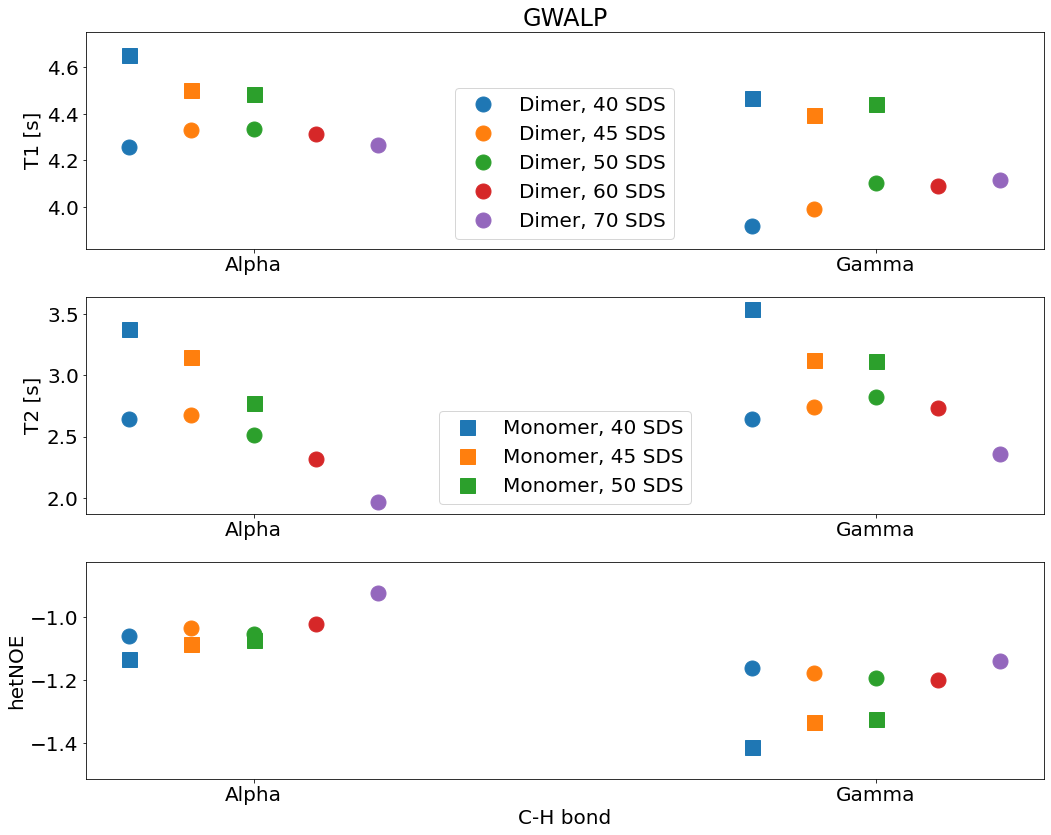

In [59]:
replicas=[GWALP_dimer_40_1,GWALP_dimer_45_1,GWALP_dimer_50_1,GWALP_dimer_60_1,GWALP_dimer_70_1]
number=1
plotType="all"
save_name="GWALP.png"

plt.rcParams["figure.figsize"] = [15.00, 12]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2, ax3) = plt.subplots(3)
plt.xticks([0.2, 1.2], ['Alpha', 'Gamma'])
    
ax1.set_ylabel("T1 [s]")
    
ax2.set_ylabel("T2 [s]")
  
ax3.set_ylabel("hetNOE")
ax3.set_xlabel("C-H bond")
max_T1=0
min_T1=100
min_T2=100
max_T2=0
max_noe=-10
min_noe=10
col=["C0","C1","C2","C3","C4","C5","C6"]
colors=[]
    



for colo in col:
    for nu in range(number):
        colors.append(colo)
            
averages={}
for i in replicas[0]:
    averages[i]={}
    for j,replica in enumerate(replicas):
        if (j//number) not in averages[i]:
            averages[i][(j//number)]={}
            if "T1" not in averages[i][(j//number)]:
                averages[i][(j//number)]["T1"]=[replica[i]["T1"]]
                averages[i][(j//number)]["T2"]=[replica[i]["T2"]]
                averages[i][(j//number)]["hetNOE"]=[replica[i]["hetNOE"]]
        else:
            averages[i][(j//number)]["T1"].append(replica[i]["T1"])
            averages[i][(j//number)]["T2"].append(replica[i]["T2"])
            averages[i][(j//number)]["hetNOE"].append(replica[i]["hetNOE"])
                
        if plotType=="all":
            ax1.plot(i+(0.1*(j//number)),replica[i]["T1"],"o",color=colors[j],markersize=15)
            ax2.plot(i+(0.1*(j//number)),replica[i]["T2"],"o",color=colors[j],markersize=15)
            ax3.plot(i+(0.1*(j//number)),replica[i]["hetNOE"],"o",color=colors[j],markersize=15)
        max_T2=max(max_T2,replica[i]["T2"])
        max_T1=max(max_T1,replica[i]["T1"])
        min_T1=min(min_T1,replica[i]["T1"])
        min_T2=min(min_T2,replica[i]["T2"])
        max_noe=max(max_noe,replica[i]["hetNOE"])
        min_noe=min(min_noe,replica[i]["hetNOE"])
    if plotType=="average":
        for j,exp in enumerate(averages[i]):
            ax1.errorbar(i+0.1*j,np.average(averages[i][exp]["T1"]),np.std(averages[i][exp]["T1"],ddof=1),fmt='o',markersize=5,color=col[j])
            ax2.errorbar(i+0.1*j,np.average(averages[i][exp]["T2"]),np.std(averages[i][exp]["T2"],ddof=1),fmt='o',markersize=5,color=col[j])
            ax3.errorbar(i+0.1*j,np.average(averages[i][exp]["hetNOE"]),np.std(averages[i][exp]["hetNOE"],ddof=1),fmt='o',markersize=5,color=col[j])

     
    
replicas=[GWALP_monomer_40_1,GWALP_monomer_45_1,GWALP_monomer_50_1]
            
averages={}
for i in replicas[0]:
    averages[i]={}
    for j,replica in enumerate(replicas):
        if (j//number) not in averages[i]:
            averages[i][(j//number)]={}
            if "T1" not in averages[i][(j//number)]:
                averages[i][(j//number)]["T1"]=[replica[i]["T1"]]
                averages[i][(j//number)]["T2"]=[replica[i]["T2"]]
                averages[i][(j//number)]["hetNOE"]=[replica[i]["hetNOE"]]
        else:
            averages[i][(j//number)]["T1"].append(replica[i]["T1"])
            averages[i][(j//number)]["T2"].append(replica[i]["T2"])
            averages[i][(j//number)]["hetNOE"].append(replica[i]["hetNOE"])
                
        if plotType=="all":
            ax1.plot(i+(0.1*(j//number)),replica[i]["T1"],"s",color=colors[j],markersize=15)
            ax2.plot(i+(0.1*(j//number)),replica[i]["T2"],"s",color=colors[j],markersize=15)
            ax3.plot(i+(0.1*(j//number)),replica[i]["hetNOE"],"s",color=colors[j],markersize=15)
        max_T2=max(max_T2,replica[i]["T2"])
        max_T1=max(max_T1,replica[i]["T1"])
        min_T1=min(min_T1,replica[i]["T1"])
        min_T2=min(min_T2,replica[i]["T2"])
        max_noe=max(max_noe,replica[i]["hetNOE"])
        min_noe=min(min_noe,replica[i]["hetNOE"])
    if plotType=="average":
        for j,exp in enumerate(averages[i]):
            ax1.errorbar(i+0.1*j,np.average(averages[i][exp]["T1"]),np.std(averages[i][exp]["T1"],ddof=1),fmt='o',markersize=5,color=col[j])
            ax2.errorbar(i+0.1*j,np.average(averages[i][exp]["T2"]),np.std(averages[i][exp]["T2"],ddof=1),fmt='o',markersize=5,color=col[j])
            ax3.errorbar(i+0.1*j,np.average(averages[i][exp]["hetNOE"]),np.std(averages[i][exp]["hetNOE"],ddof=1),fmt='o',markersize=5,color=col[j])
            


ax1.plot(0,-100,"o",color=colors[0],markersize=15,label="Dimer, 40 SDS")
ax1.plot(0,-100,"o",color=colors[1],markersize=15,label="Dimer, 45 SDS")
ax1.plot(0,-100,"o",color=colors[2],markersize=15,label="Dimer, 50 SDS")
ax1.plot(0,-100,"o",color=colors[3],markersize=15,label="Dimer, 60 SDS")
ax1.plot(0,-100,"o",color=colors[4],markersize=15,label="Dimer, 70 SDS")
            
            
ax2.plot(0,-100,"s",color=colors[0],markersize=15,label="Monomer, 40 SDS")
ax2.plot(0,-100,"s",color=colors[1],markersize=15,label="Monomer, 45 SDS")
ax2.plot(0,-100,"s",color=colors[2],markersize=15,label="Monomer, 50 SDS")
        
        
ax1.set_ylim([min_T1-0.1,max_T1+0.1 ])
ax1.set_xticks([0.2,1.2])
ax1.set_xticklabels(['Alpha', 'Gamma'])
ax2.set_ylim([min_T2-0.1,max_T2+0.1 ])
ax3.set_ylim([min_noe-0.1,max_noe+0.1 ])
   
ax2.set_xticks([0.2,1.2])
ax2.set_xticklabels(['Alpha', 'Gamma'])

ax3.set_xticks([0.2,1.2])
ax3.set_xticklabels(['Alpha', 'Gamma'])

ax1.legend()
ax2.legend()
    
ax1.set_title("GWALP")
plt.savefig(save_name)
    

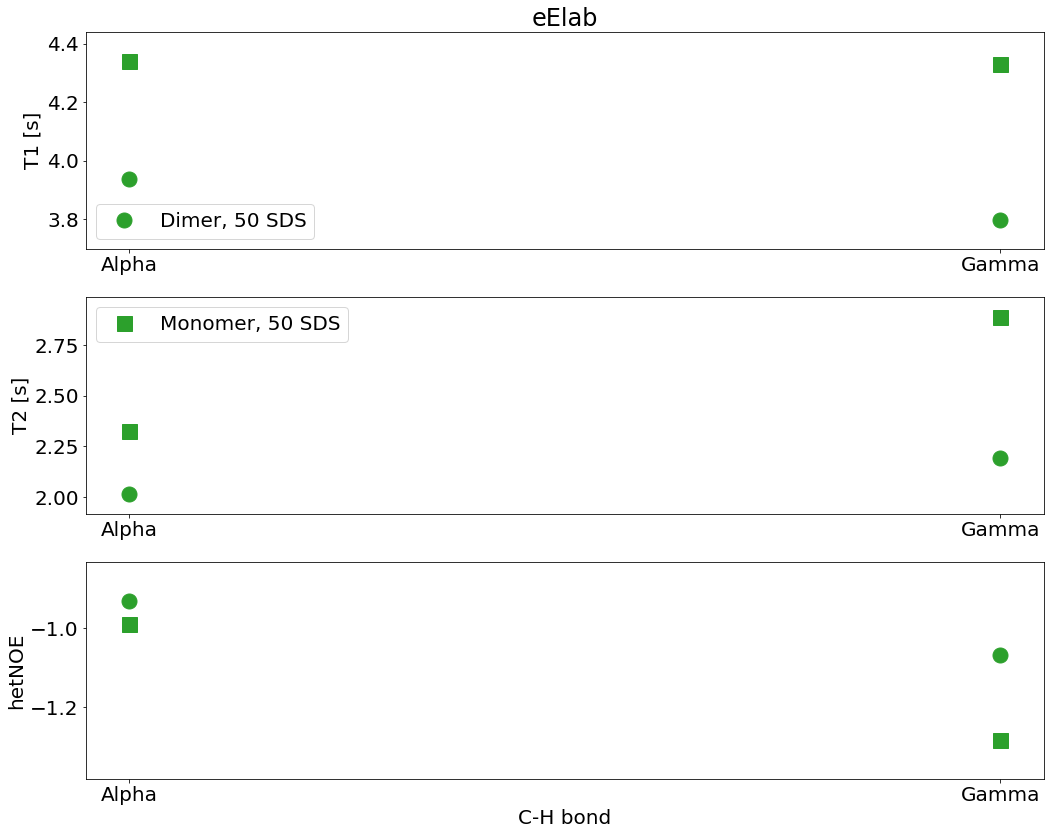

In [70]:
replicas=[eElab_dimer_50_1]
number=1
plotType="all"
save_name="eElab.png"

plt.rcParams["figure.figsize"] = [15.00, 12]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2, ax3) = plt.subplots(3)
plt.xticks([0.2, 1.2], ['Alpha', 'Gamma'])
    
ax1.set_ylabel("T1 [s]")
    
ax2.set_ylabel("T2 [s]")
  
ax3.set_ylabel("hetNOE")
ax3.set_xlabel("C-H bond")
max_T1=0
min_T1=100
min_T2=100
max_T2=0
max_noe=-10
min_noe=10
col=["C2","C1","C2","C3","C4","C5","C6"]
colors=[]
    



for colo in col:
    for nu in range(number):
        colors.append(colo)
            
averages={}
for i in replicas[0]:
    averages[i]={}
    for j,replica in enumerate(replicas):
        if (j//number) not in averages[i]:
            averages[i][(j//number)]={}
            if "T1" not in averages[i][(j//number)]:
                averages[i][(j//number)]["T1"]=[replica[i]["T1"]]
                averages[i][(j//number)]["T2"]=[replica[i]["T2"]]
                averages[i][(j//number)]["hetNOE"]=[replica[i]["hetNOE"]]
        else:
            averages[i][(j//number)]["T1"].append(replica[i]["T1"])
            averages[i][(j//number)]["T2"].append(replica[i]["T2"])
            averages[i][(j//number)]["hetNOE"].append(replica[i]["hetNOE"])
                
        if plotType=="all":
            ax1.plot(i+(0.1*(j//number)),replica[i]["T1"],"o",color=colors[j],markersize=15)
            ax2.plot(i+(0.1*(j//number)),replica[i]["T2"],"o",color=colors[j],markersize=15)
            ax3.plot(i+(0.1*(j//number)),replica[i]["hetNOE"],"o",color=colors[j],markersize=15)
        max_T2=max(max_T2,replica[i]["T2"])
        max_T1=max(max_T1,replica[i]["T1"])
        min_T1=min(min_T1,replica[i]["T1"])
        min_T2=min(min_T2,replica[i]["T2"])
        max_noe=max(max_noe,replica[i]["hetNOE"])
        min_noe=min(min_noe,replica[i]["hetNOE"])
    if plotType=="average":
        for j,exp in enumerate(averages[i]):
            ax1.errorbar(i+0.1*j,np.average(averages[i][exp]["T1"]),np.std(averages[i][exp]["T1"],ddof=1),fmt='o',markersize=5,color=col[j])
            ax2.errorbar(i+0.1*j,np.average(averages[i][exp]["T2"]),np.std(averages[i][exp]["T2"],ddof=1),fmt='o',markersize=5,color=col[j])
            ax3.errorbar(i+0.1*j,np.average(averages[i][exp]["hetNOE"]),np.std(averages[i][exp]["hetNOE"],ddof=1),fmt='o',markersize=5,color=col[j])

     
    
replicas=[eElab_monomer_50_2]
            
averages={}
for i in replicas[0]:
    averages[i]={}
    for j,replica in enumerate(replicas):
        if (j//number) not in averages[i]:
            averages[i][(j//number)]={}
            if "T1" not in averages[i][(j//number)]:
                averages[i][(j//number)]["T1"]=[replica[i]["T1"]]
                averages[i][(j//number)]["T2"]=[replica[i]["T2"]]
                averages[i][(j//number)]["hetNOE"]=[replica[i]["hetNOE"]]
        else:
            averages[i][(j//number)]["T1"].append(replica[i]["T1"])
            averages[i][(j//number)]["T2"].append(replica[i]["T2"])
            averages[i][(j//number)]["hetNOE"].append(replica[i]["hetNOE"])
                
        if plotType=="all":
            ax1.plot(i+(0.1*(j//number)),replica[i]["T1"],"s",color=colors[j],markersize=15)
            ax2.plot(i+(0.1*(j//number)),replica[i]["T2"],"s",color=colors[j],markersize=15)
            ax3.plot(i+(0.1*(j//number)),replica[i]["hetNOE"],"s",color=colors[j],markersize=15)
        max_T2=max(max_T2,replica[i]["T2"])
        max_T1=max(max_T1,replica[i]["T1"])
        min_T1=min(min_T1,replica[i]["T1"])
        min_T2=min(min_T2,replica[i]["T2"])
        max_noe=max(max_noe,replica[i]["hetNOE"])
        min_noe=min(min_noe,replica[i]["hetNOE"])
    if plotType=="average":
        for j,exp in enumerate(averages[i]):
            ax1.errorbar(i+0.1*j,np.average(averages[i][exp]["T1"]),np.std(averages[i][exp]["T1"],ddof=1),fmt='o',markersize=5,color=col[j])
            ax2.errorbar(i+0.1*j,np.average(averages[i][exp]["T2"]),np.std(averages[i][exp]["T2"],ddof=1),fmt='o',markersize=5,color=col[j])
            ax3.errorbar(i+0.1*j,np.average(averages[i][exp]["hetNOE"]),np.std(averages[i][exp]["hetNOE"],ddof=1),fmt='o',markersize=5,color=col[j])
            


ax1.plot(0,-100,"o",color=colors[2],markersize=15,label="Dimer, 50 SDS")
#ax1.plot(0,-100,"o",color=colors[1],markersize=15,label="Dimer, 45 SDS")
#ax1.plot(0,-100,"o",color=colors[2],markersize=15,label="Dimer, 50 SDS")
#ax1.plot(0,-100,"o",color=colors[3],markersize=15,label="Dimer, 60 SDS")
#ax1.plot(0,-100,"o",color=colors[4],markersize=15,label="Dimer, 70 SDS")
            
            
ax2.plot(0,-100,"s",color=colors[2],markersize=15,label="Monomer, 50 SDS")
#ax2.plot(0,-100,"s",color=colors[1],markersize=15,label="Monomer, 45 SDS")
#ax2.plot(0,-100,"s",color=colors[2],markersize=15,label="Monomer, 50 SDS")
        
        
ax1.set_ylim([min_T1-0.1,max_T1+0.1 ])
ax1.set_xticks([0.0,1.0])
ax1.set_xticklabels(['Alpha', 'Gamma'])
ax2.set_ylim([min_T2-0.1,max_T2+0.1 ])
ax3.set_ylim([min_noe-0.1,max_noe+0.1 ])
   
ax2.set_xticks([0.0,1.0])
ax2.set_xticklabels(['Alpha', 'Gamma'])

ax3.set_xticks([0.0,1.0])
ax3.set_xticklabels(['Alpha', 'Gamma'])

ax1.legend()
ax2.legend()
    
ax1.set_title("eElab")
plt.savefig(save_name)

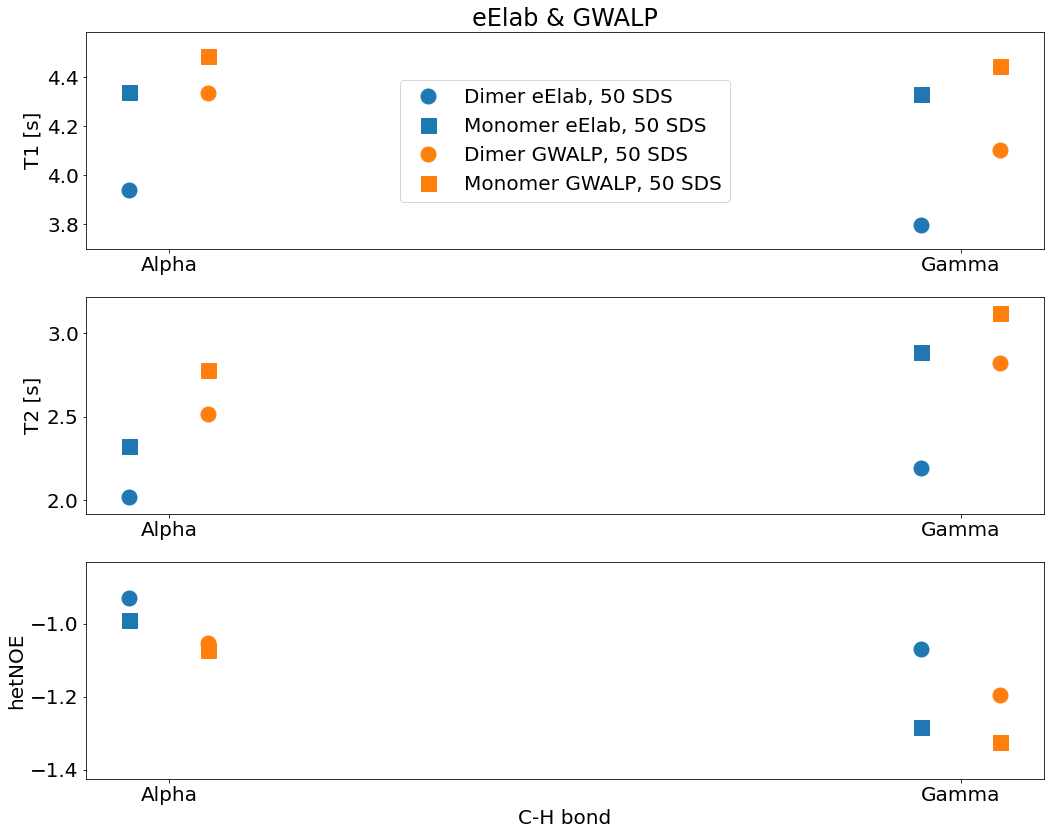

In [21]:
replicas=[eElab_dimer_50_1,GWALP_dimer_50_1]
number=1
plotType="all"
save_name="eElab_gwalp.png"

plt.rcParams["figure.figsize"] = [15.00, 12]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2, ax3) = plt.subplots(3)
plt.xticks([0.2, 1.2], ['Alpha', 'Gamma'])
    
ax1.set_ylabel("T1 [s]")
    
ax2.set_ylabel("T2 [s]")
  
ax3.set_ylabel("hetNOE")
ax3.set_xlabel("C-H bond")
max_T1=0
min_T1=100
min_T2=100
max_T2=0
max_noe=-10
min_noe=10
col=["C0","C1","C2","C3","C4","C5","C6"]
colors=[]
    



for colo in col:
    for nu in range(number):
        colors.append(colo)
            
averages={}
for i in replicas[0]:
    averages[i]={}
    for j,replica in enumerate(replicas):
        if (j//number) not in averages[i]:
            averages[i][(j//number)]={}
            if "T1" not in averages[i][(j//number)]:
                averages[i][(j//number)]["T1"]=[replica[i]["T1"]]
                averages[i][(j//number)]["T2"]=[replica[i]["T2"]]
                averages[i][(j//number)]["hetNOE"]=[replica[i]["hetNOE"]]
        else:
            averages[i][(j//number)]["T1"].append(replica[i]["T1"])
            averages[i][(j//number)]["T2"].append(replica[i]["T2"])
            averages[i][(j//number)]["hetNOE"].append(replica[i]["hetNOE"])
                
        if plotType=="all":
            ax1.plot(i+(0.1*(j//number)),replica[i]["T1"],"o",color=colors[j],markersize=15)
            ax2.plot(i+(0.1*(j//number)),replica[i]["T2"],"o",color=colors[j],markersize=15)
            ax3.plot(i+(0.1*(j//number)),replica[i]["hetNOE"],"o",color=colors[j],markersize=15)
        max_T2=max(max_T2,replica[i]["T2"])
        max_T1=max(max_T1,replica[i]["T1"])
        min_T1=min(min_T1,replica[i]["T1"])
        min_T2=min(min_T2,replica[i]["T2"])
        max_noe=max(max_noe,replica[i]["hetNOE"])
        min_noe=min(min_noe,replica[i]["hetNOE"])
    if plotType=="average":
        for j,exp in enumerate(averages[i]):
            ax1.errorbar(i+0.1*j,np.average(averages[i][exp]["T1"]),np.std(averages[i][exp]["T1"],ddof=1),fmt='o',markersize=5,color=col[j])
            ax2.errorbar(i+0.1*j,np.average(averages[i][exp]["T2"]),np.std(averages[i][exp]["T2"],ddof=1),fmt='o',markersize=5,color=col[j])
            ax3.errorbar(i+0.1*j,np.average(averages[i][exp]["hetNOE"]),np.std(averages[i][exp]["hetNOE"],ddof=1),fmt='o',markersize=5,color=col[j])

     
    
replicas=[eElab_monomer_50_2,GWALP_monomer_50_1]
            
averages={}
for i in replicas[0]:
    averages[i]={}
    for j,replica in enumerate(replicas):
        if (j//number) not in averages[i]:
            averages[i][(j//number)]={}
            if "T1" not in averages[i][(j//number)]:
                averages[i][(j//number)]["T1"]=[replica[i]["T1"]]
                averages[i][(j//number)]["T2"]=[replica[i]["T2"]]
                averages[i][(j//number)]["hetNOE"]=[replica[i]["hetNOE"]]
        else:
            averages[i][(j//number)]["T1"].append(replica[i]["T1"])
            averages[i][(j//number)]["T2"].append(replica[i]["T2"])
            averages[i][(j//number)]["hetNOE"].append(replica[i]["hetNOE"])
                
        if plotType=="all":
            ax1.plot(i+(0.1*(j//number)),replica[i]["T1"],"s",color=colors[j],markersize=15)
            ax2.plot(i+(0.1*(j//number)),replica[i]["T2"],"s",color=colors[j],markersize=15)
            ax3.plot(i+(0.1*(j//number)),replica[i]["hetNOE"],"s",color=colors[j],markersize=15)
        max_T2=max(max_T2,replica[i]["T2"])
        max_T1=max(max_T1,replica[i]["T1"])
        min_T1=min(min_T1,replica[i]["T1"])
        min_T2=min(min_T2,replica[i]["T2"])
        max_noe=max(max_noe,replica[i]["hetNOE"])
        min_noe=min(min_noe,replica[i]["hetNOE"])
    if plotType=="average":
        for j,exp in enumerate(averages[i]):
            ax1.errorbar(i+0.1*j,np.average(averages[i][exp]["T1"]),np.std(averages[i][exp]["T1"],ddof=1),fmt='o',markersize=5,color=col[j])
            ax2.errorbar(i+0.1*j,np.average(averages[i][exp]["T2"]),np.std(averages[i][exp]["T2"],ddof=1),fmt='o',markersize=5,color=col[j])
            ax3.errorbar(i+0.1*j,np.average(averages[i][exp]["hetNOE"]),np.std(averages[i][exp]["hetNOE"],ddof=1),fmt='o',markersize=5,color=col[j])
            


ax1.plot(0,-100,"o",color=colors[0],markersize=15,label="Dimer eElab, 50 SDS")
ax1.plot(0,-100,"s",color=colors[0],markersize=15,label="Monomer eElab, 50 SDS")
ax1.plot(0,-100,"o",color=colors[1],markersize=15,label="Dimer GWALP, 50 SDS")
#ax1.plot(0,-100,"o",color=colors[2],markersize=15,label="Dimer, 50 SDS")
#ax1.plot(0,-100,"o",color=colors[3],markersize=15,label="Dimer, 60 SDS")
#ax1.plot(0,-100,"o",color=colors[4],markersize=15,label="Dimer, 70 SDS")
            
            

ax1.plot(0,-100,"s",color=colors[1],markersize=15,label="Monomer GWALP, 50 SDS")
#ax2.plot(0,-100,"s",color=colors[2],markersize=15,label="Monomer, 50 SDS")
        
        
ax1.set_ylim([min_T1-0.1,max_T1+0.1 ])
ax1.set_xticks([0.05,1.05])
ax1.set_xticklabels(['Alpha', 'Gamma'])
ax2.set_ylim([min_T2-0.1,max_T2+0.1 ])
ax3.set_ylim([min_noe-0.1,max_noe+0.1 ])
   
ax2.set_xticks([0.05,1.05])
ax2.set_xticklabels(['Alpha', 'Gamma'])

ax3.set_xticks([0.05,1.05])
ax3.set_xticklabels(['Alpha', 'Gamma'])

ax1.legend(loc="center")
#ax2.legend(loc="center")
    
ax1.set_title("eElab & GWALP")
plt.savefig(save_name)

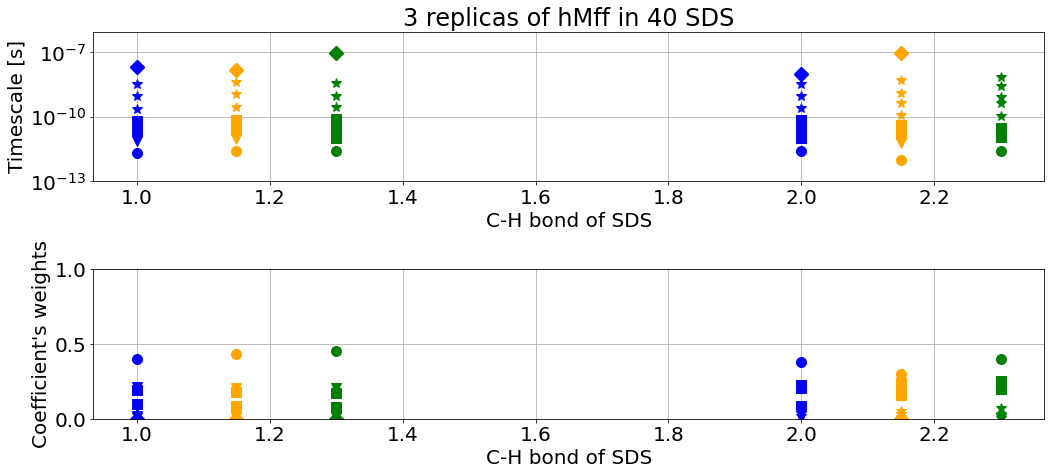

In [35]:
merge=5 # number of consequent points to be merged (works on log scale!!)
groupTimes=[10**(-12)*5,10**(-11),10**(-10),10**(-8)] # groups points smaller than 1st value, 
                                                    #points between 1st and 2nd, 2nd and 3st....
                                                    #points bigger than the last value

ylim=None # if None the whole range of available data is plotted

xlabel="C-H bond of SDS"


#ylim=[0,10**(-8)*10.003]
ylim_weig=[0,1]
title="3 replicas of hMff in 40 SDS"
aminoAcidsReplicas=[hMff40_1,hMff40_2,hMff40_3]
PlotTimescales_replicas(merge,groupTimes,title,xlabel,ylim,ylim_weig,*aminoAcidsReplicas)

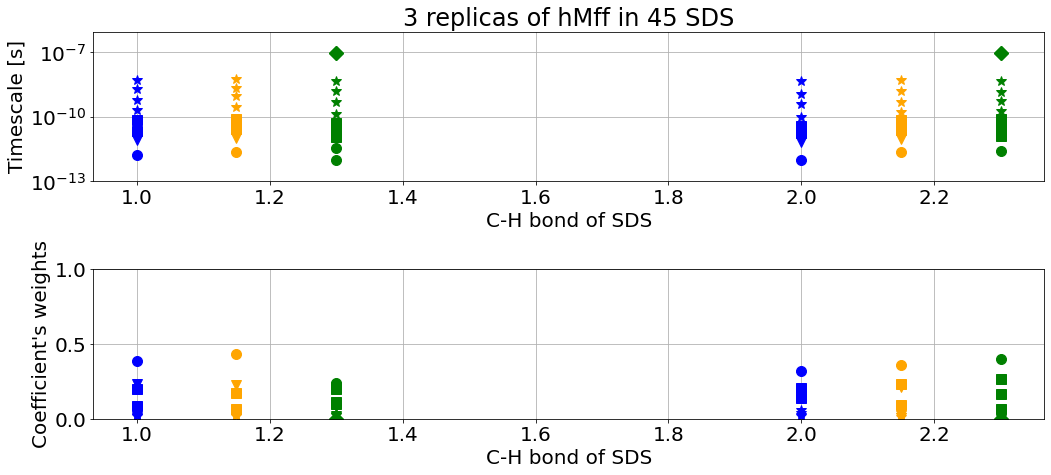

In [36]:
merge=5 # number of consequent points to be merged (works on log scale!!)
#groupTimes=[10**(-10),10**(-9),10**(-9)*5,10**(-8)] # groups points smaller than 1st value, 
                                                    #points between 1st and 2nd, 2nd and 3st....
                                                    #points bigger than the last value

ylim=None # if None the whole range of available data is plotted

xlabel="C-H bond of SDS"


#ylim=[0,10**(-8)*10.003]
ylim_weig=[0,1]
title="3 replicas of hMff in 45 SDS"
aminoAcidsReplicas=[hMff45_1,hMff45_2,hMff45_3]
PlotTimescales_replicas(merge,groupTimes,title,xlabel,ylim,ylim_weig,*aminoAcidsReplicas)

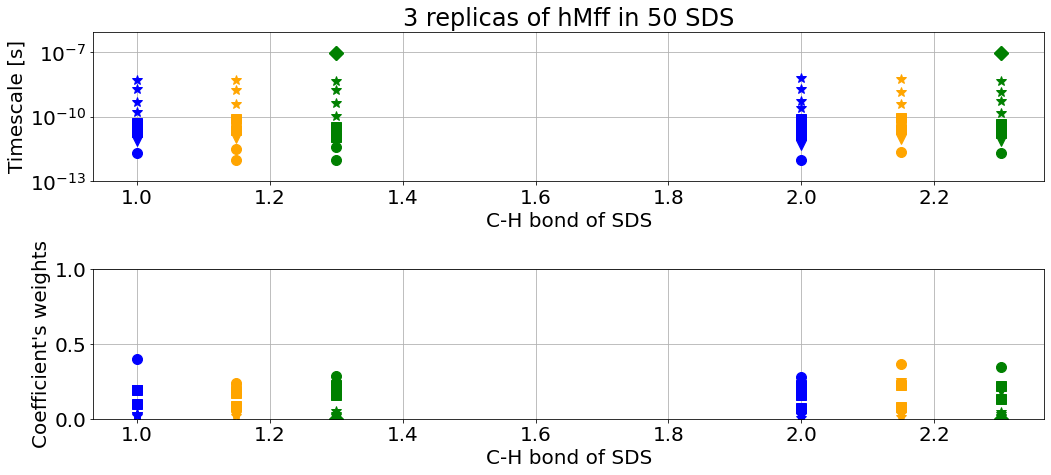

In [37]:
merge=5 # number of consequent points to be merged (works on log scale!!)
#groupTimes=[10**(-10),10**(-9),10**(-9)*5,10**(-8)] # groups points smaller than 1st value, 
                                                    #points between 1st and 2nd, 2nd and 3st....
                                                    #points bigger than the last value

ylim=None # if None the whole range of available data is plotted

xlabel="C-H bond of SDS"


#ylim=[0,10**(-8)*10.003]
ylim_weig=[0,1]
title="3 replicas of hMff in 50 SDS"
aminoAcidsReplicas=[hMff50_1,hMff50_2,hMff50_3]
PlotTimescales_replicas(merge,groupTimes,title,xlabel,ylim,ylim_weig,*aminoAcidsReplicas)

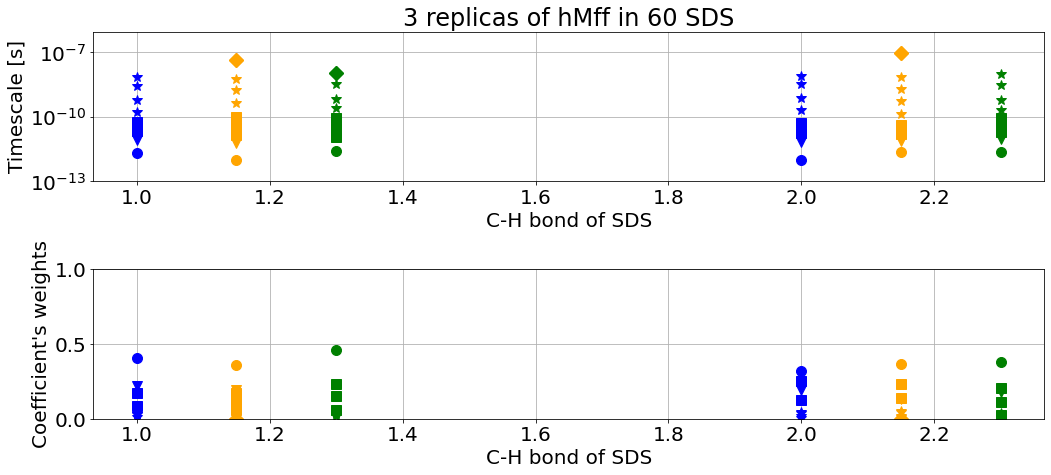

In [38]:
merge=5 # number of consequent points to be merged (works on log scale!!)
#groupTimes=[10**(-10),10**(-9),10**(-9)*5,10**(-8)] # groups points smaller than 1st value, 
                                                    #points between 1st and 2nd, 2nd and 3st....
                                                    #points bigger than the last value

ylim=None # if None the whole range of available data is plotted

xlabel="C-H bond of SDS"


#ylim=[0,10**(-8)*10.003]
ylim_weig=[0,1]
title="3 replicas of hMff in 60 SDS"
aminoAcidsReplicas=[hMff60_1,hMff60_2,hMff60_3]
PlotTimescales_replicas(merge,groupTimes,title,xlabel,ylim,ylim_weig,*aminoAcidsReplicas)

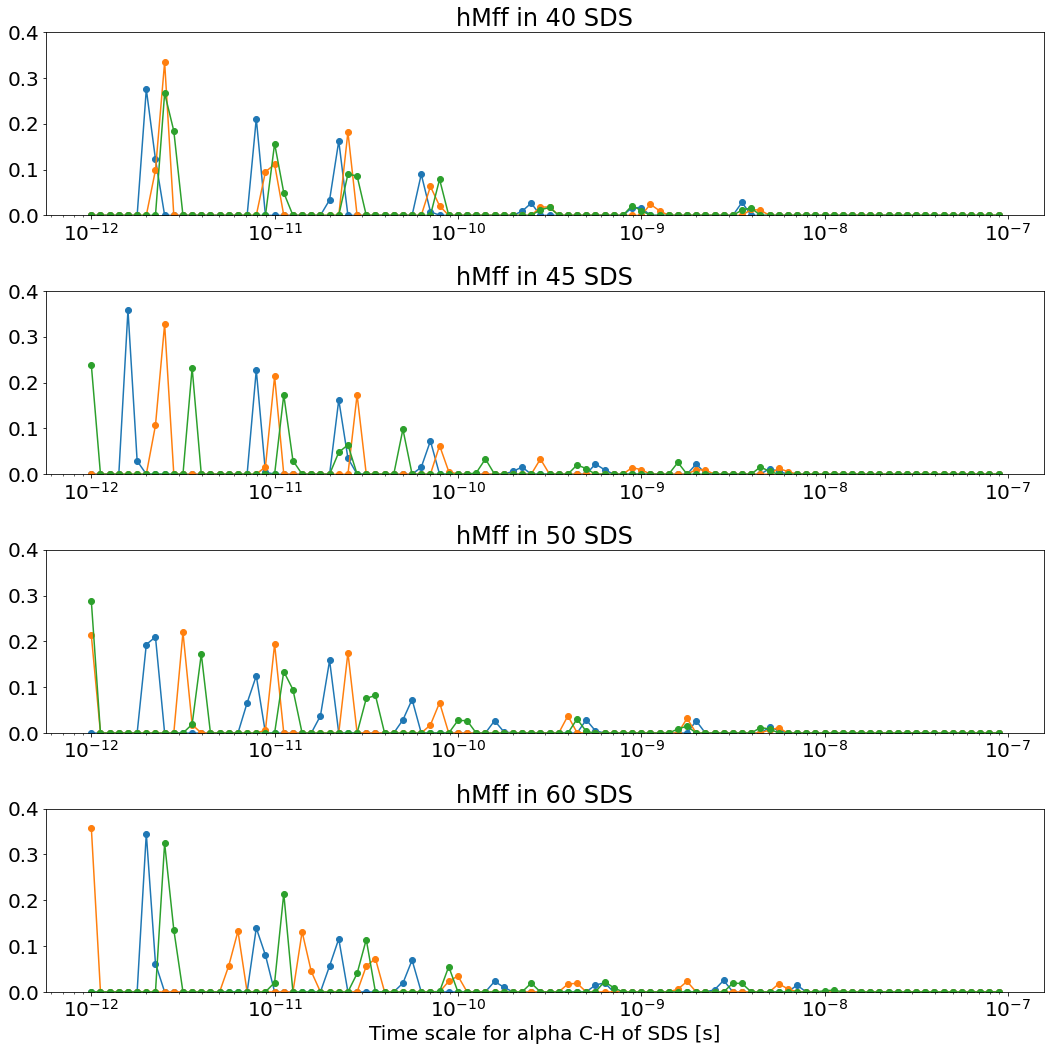

In [61]:


plt.rcParams.update({'font.size': 20})

plt.rcParams["figure.figsize"] = [15.00, 15]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax4.set_xscale('log')


systems=[hMff40_1,hMff40_2,hMff40_3]
for system in systems:
    ax1.plot(system[0].Ctimes,system[0].Coeffs,"-o")

systems=[hMff45_1,hMff45_2,hMff45_3]
for system in systems:
    ax2.plot(system[0].Ctimes,system[0].Coeffs,"-o")

    
systems=[hMff50_1,hMff50_2,hMff50_3]
for system in systems:
    ax3.plot(system[0].Ctimes,system[0].Coeffs,"-o")

    
systems=[hMff60_1,hMff60_2,hMff60_3]
for system in systems:
    ax4.plot(system[0].Ctimes,system[0].Coeffs,"-o")

ax1.set_ylim([0,0.4])
ax2.set_ylim([0,0.4])
ax3.set_ylim([0,0.4])
ax4.set_ylim([0,0.4])

ax1.set_title("hMff in 40 SDS")
ax2.set_title("hMff in 45 SDS")
ax3.set_title("hMff in 50 SDS")
ax4.set_title("hMff in 60 SDS")

ax4.set_xlabel("Time scale for alpha C-H of SDS [s]")

plt.savefig("TimeScales_hMff.png")

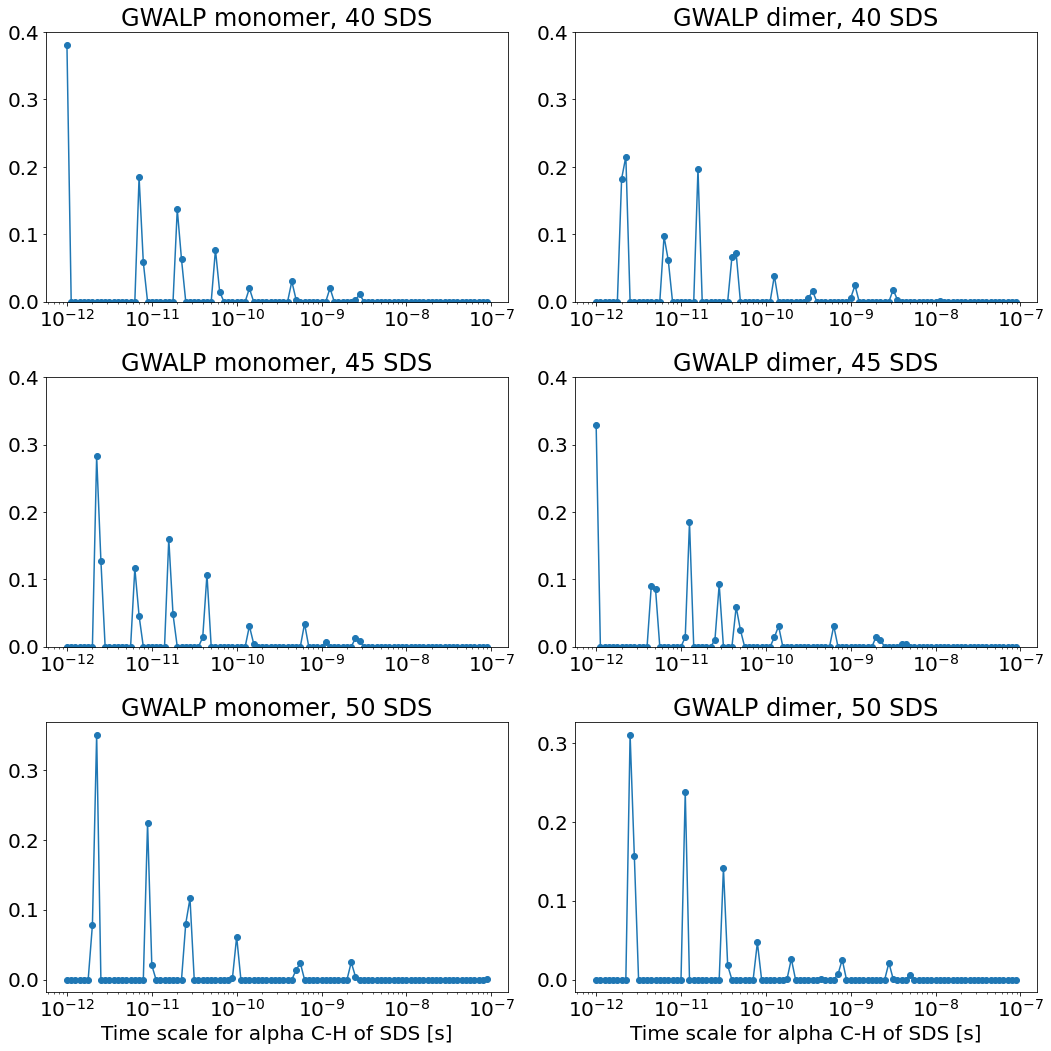

In [75]:

plt.rcParams.update({'font.size': 20})

plt.rcParams["figure.figsize"] = [15.00, 15]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(3,2)
(ax1, ax2, ax3, ax4,ax5,ax6)=axes.flatten()

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax4.set_xscale('log')
ax5.set_xscale('log')
ax6.set_xscale('log')


systems=[GWALP_mon_40_1]
for system in systems:
    ax1.plot(system[0].Ctimes,system[0].Coeffs,"-o")

systems=[GWALP_mon_45_1]
for system in systems:
    ax3.plot(system[0].Ctimes,system[0].Coeffs,"-o")

    
systems=[GWALP_mon_50_1]
for system in systems:
    ax5.plot(system[0].Ctimes,system[0].Coeffs,"-o")

    
systems=[GWALP_dim_40_1]
for system in systems:
    ax2.plot(system[0].Ctimes,system[0].Coeffs,"-o")


systems=[GWALP_dim_45_1]
for system in systems:
    ax4.plot(system[0].Ctimes,system[0].Coeffs,"-o")

systems=[GWALP_dim_50_1]
for system in systems:
    ax6.plot(system[0].Ctimes,system[0].Coeffs,"-o")

    
    
ax1.set_ylim([0,0.4])
ax2.set_ylim([0,0.4])
ax3.set_ylim([0,0.4])
ax4.set_ylim([0,0.4])

ax1.set_title("GWALP monomer, 40 SDS")
ax2.set_title("GWALP dimer, 40 SDS")
ax3.set_title("GWALP monomer, 45 SDS")
ax4.set_title("GWALP dimer, 45 SDS")
ax5.set_title("GWALP monomer, 50 SDS")
ax6.set_title("GWALP dimer, 50 SDS")


ax5.set_xlabel("Time scale for alpha C-H of SDS [s]")
ax6.set_xlabel("Time scale for alpha C-H of SDS [s]")

plt.savefig("TimeScales_GWALP.png")

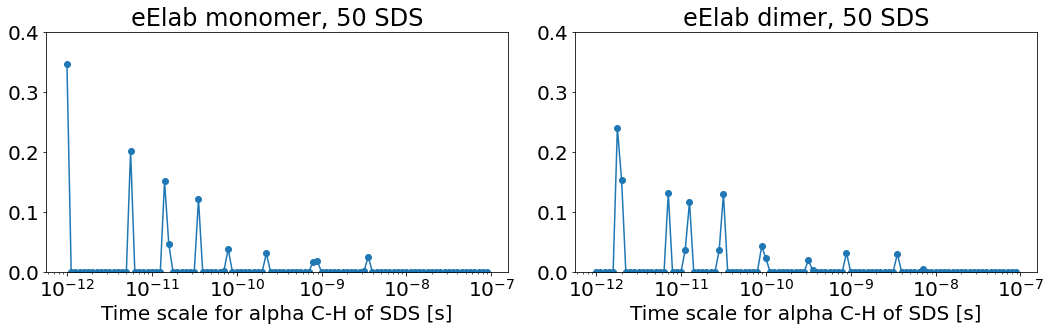

In [77]:

plt.rcParams.update({'font.size': 20})

plt.rcParams["figure.figsize"] = [15.00, 5]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1,2)
(ax1, ax2)=axes.flatten()

ax1.set_xscale('log')
ax2.set_xscale('log')


systems=[eElab_mon_50_2]
for system in systems:
    ax1.plot(system[0].Ctimes,system[0].Coeffs,"-o")

systems=[eElab_dim_50_1]
for system in systems:
    ax2.plot(system[0].Ctimes,system[0].Coeffs,"-o")
    
    
ax1.set_ylim([0,0.4])
ax2.set_ylim([0,0.4])


ax1.set_title("eElab monomer, 50 SDS")
ax2.set_title("eElab dimer, 50 SDS")

ax1.set_xlabel("Time scale for alpha C-H of SDS [s]")
ax2.set_xlabel("Time scale for alpha C-H of SDS [s]")

plt.savefig("TimeScales_eElab.png")

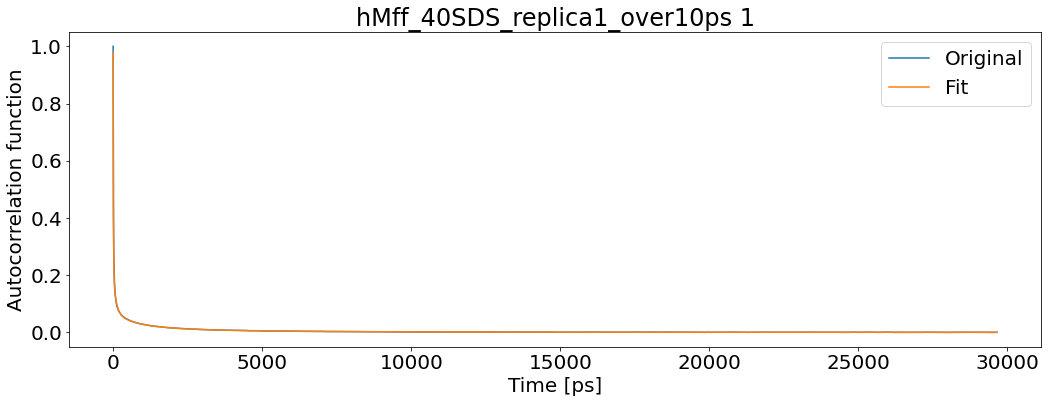

T1: 3.8371763507510854 T2: 2.4696084470501654 NOE: -1.2595057290258844


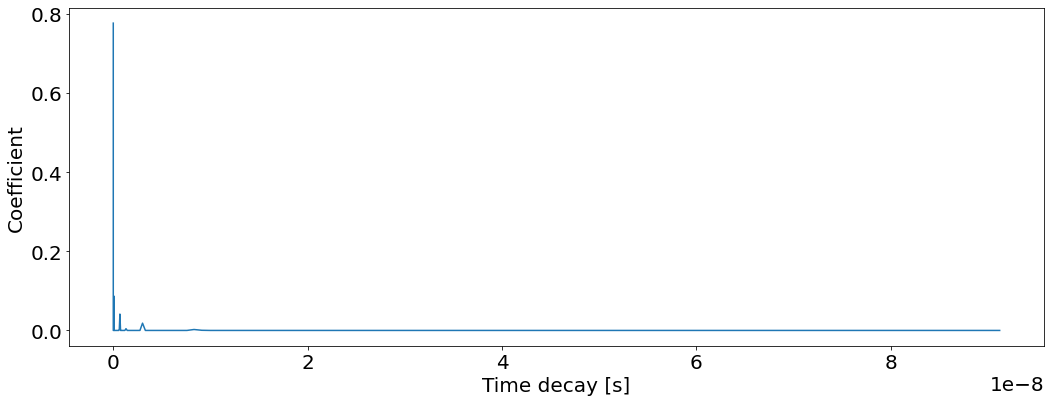

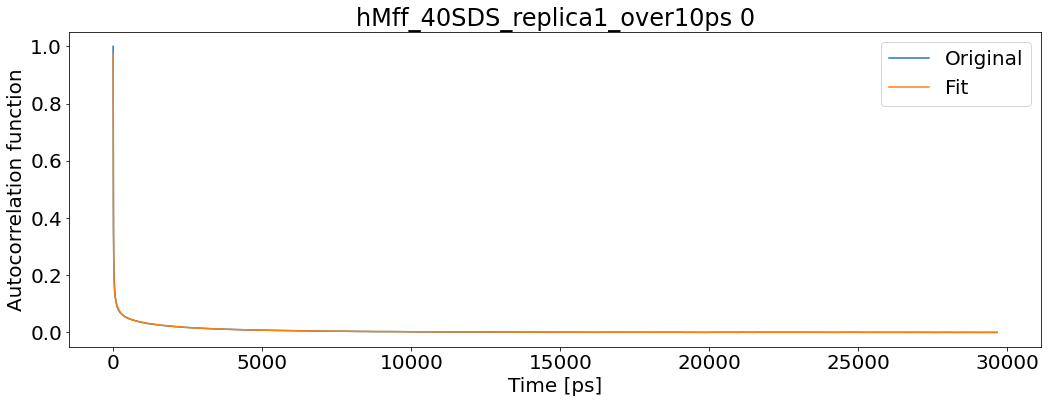

T1: 3.880363413268486 T2: 2.132913107434433 NOE: -1.0696088254225602


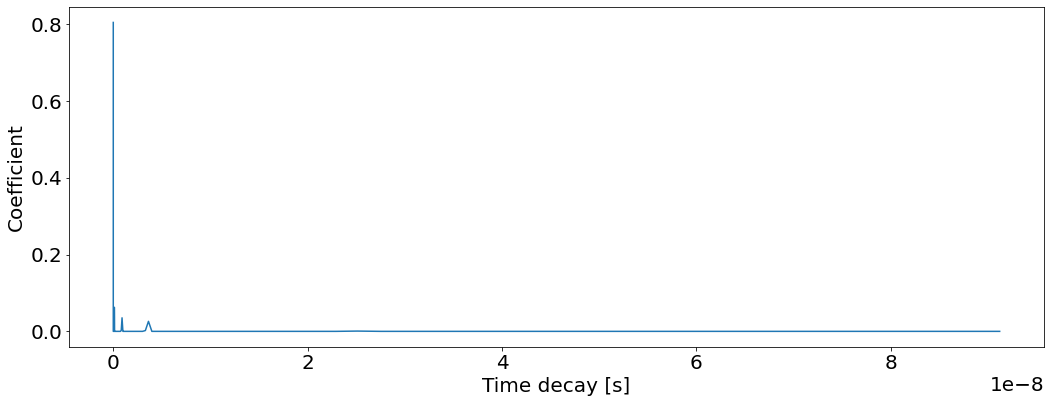

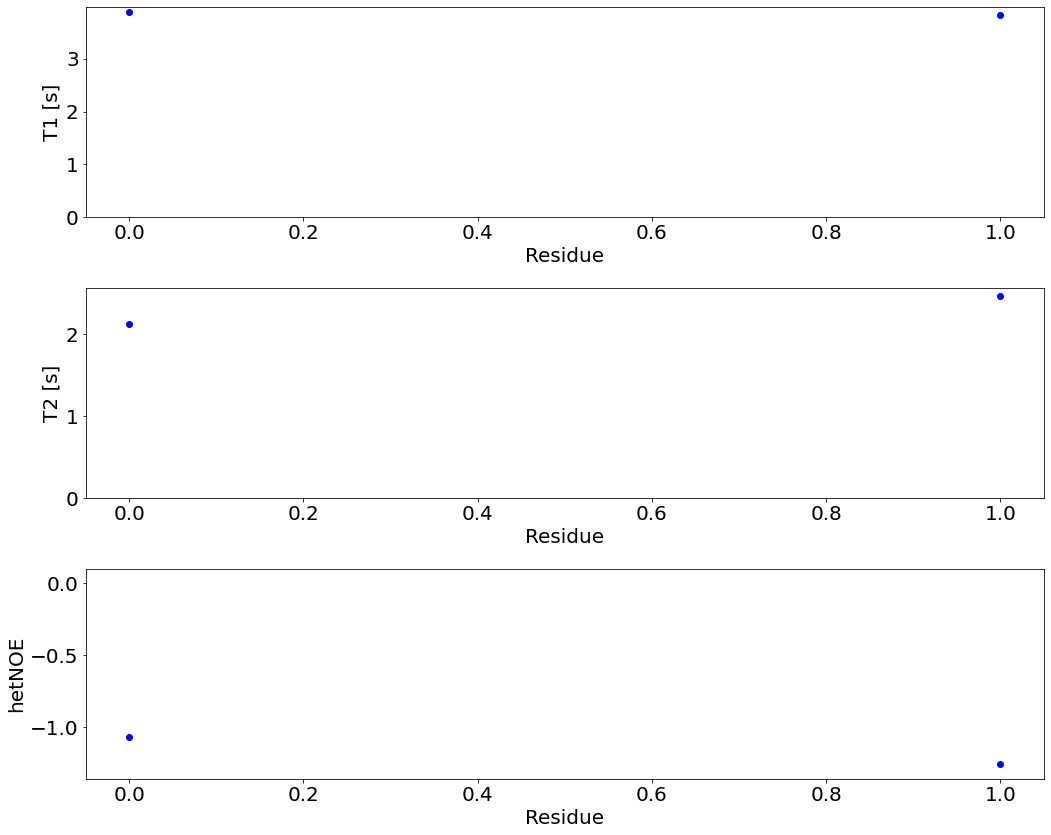

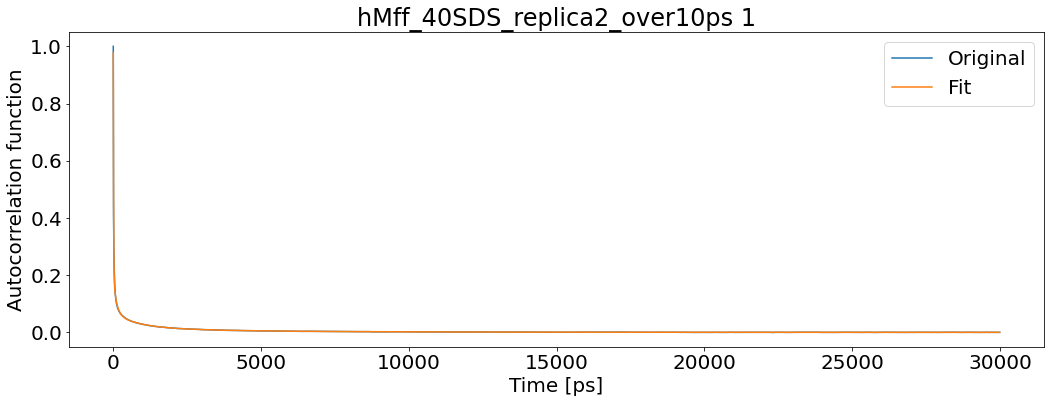

T1: 3.8157409583781545 T2: 2.424668754450403 NOE: -1.2531557518639902


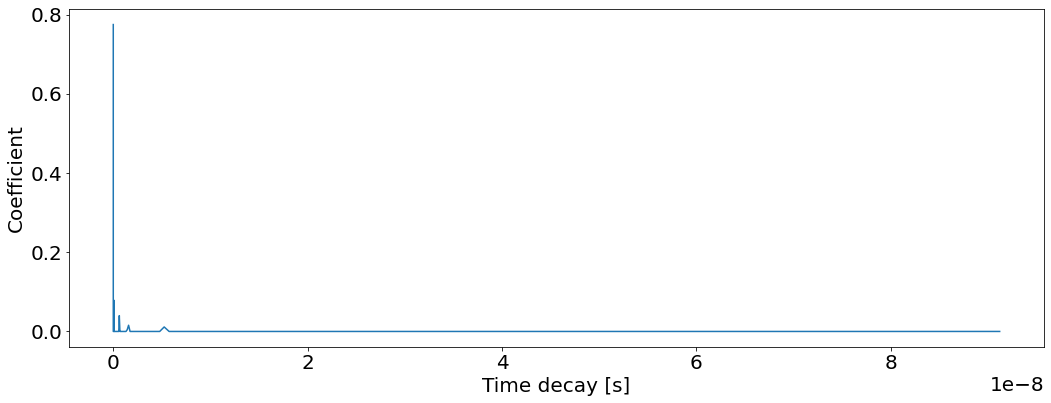

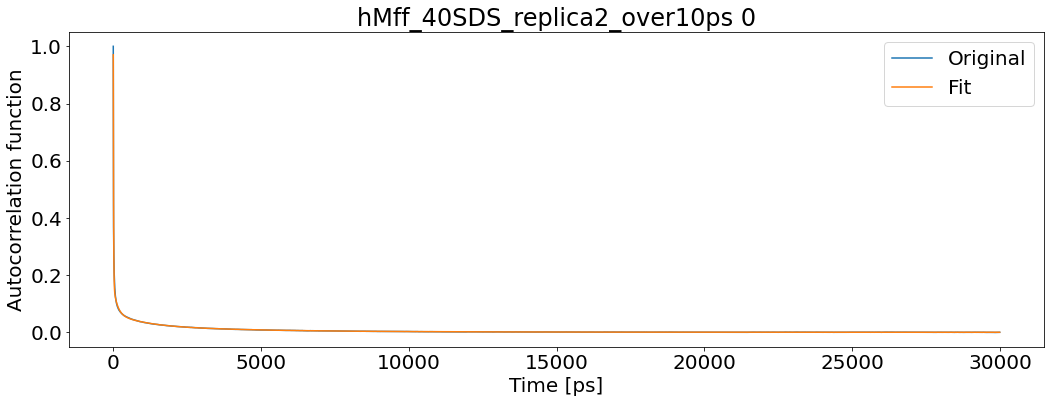

T1: 3.8442716217093666 T2: 2.1042338648612557 NOE: -1.0540254600804153


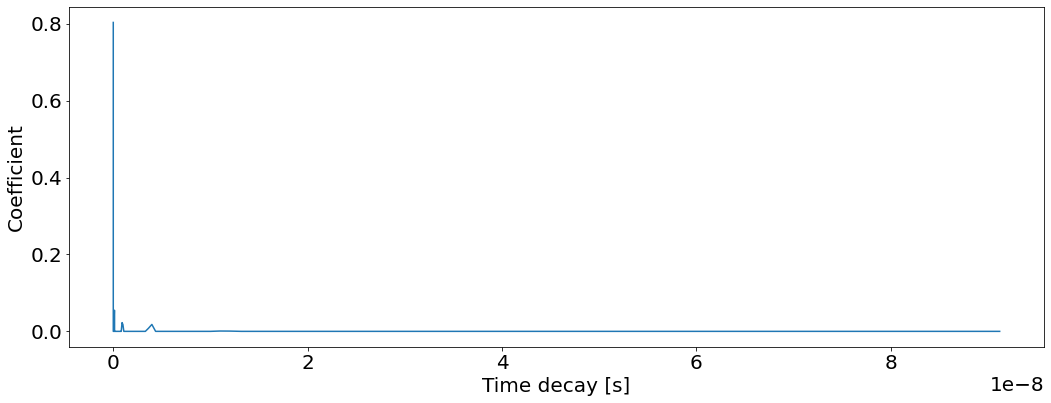

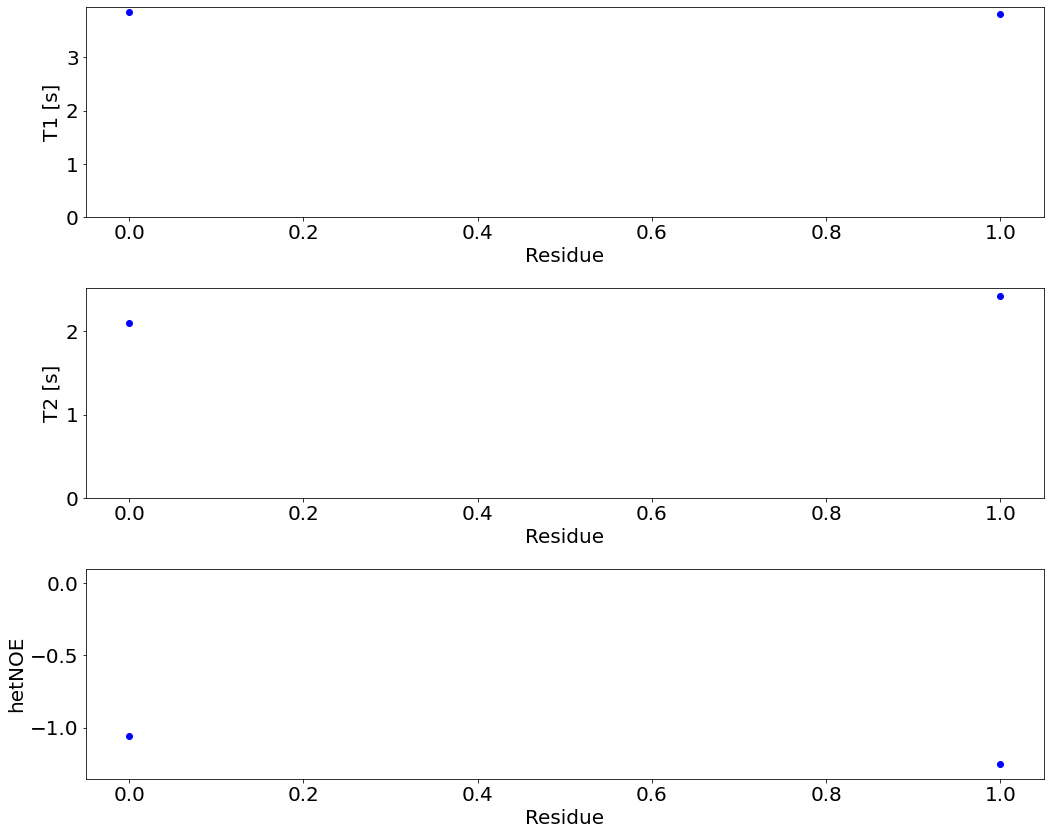

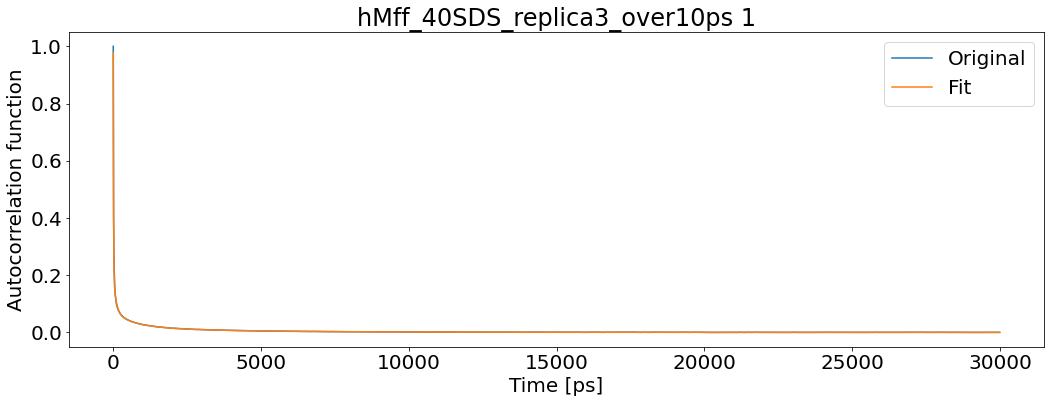

T1: 3.895909727089694 T2: 2.5213117367919007 NOE: -1.2831509280947695


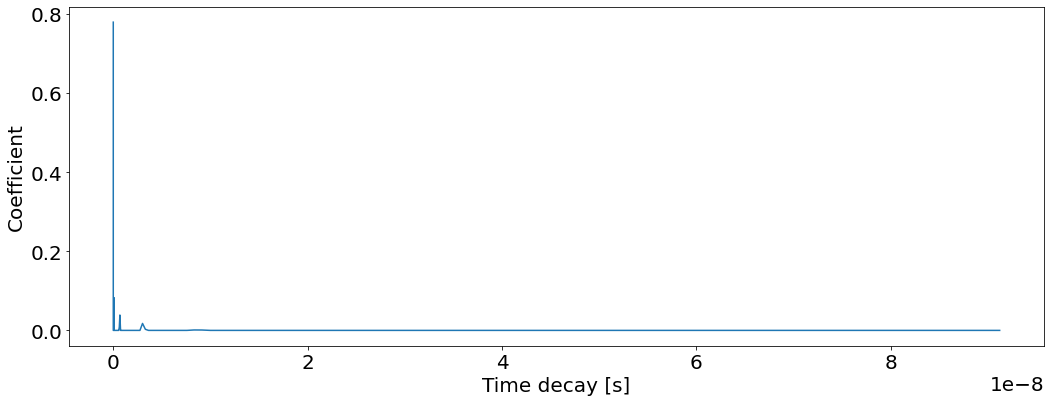

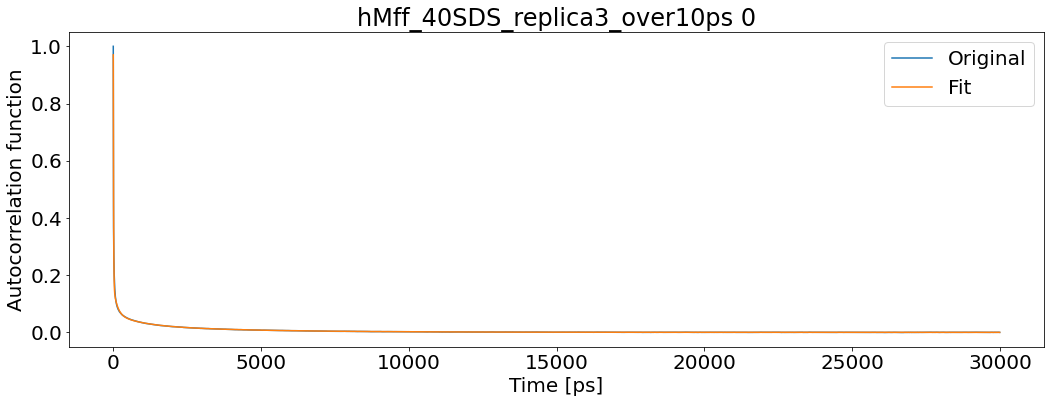

T1: 3.951829432451175 T2: 2.1259909481409127 NOE: -1.1007348052281096


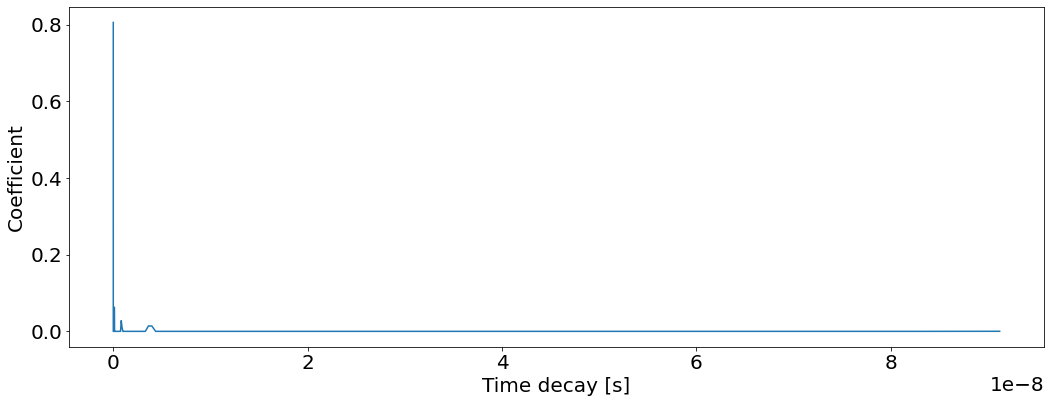

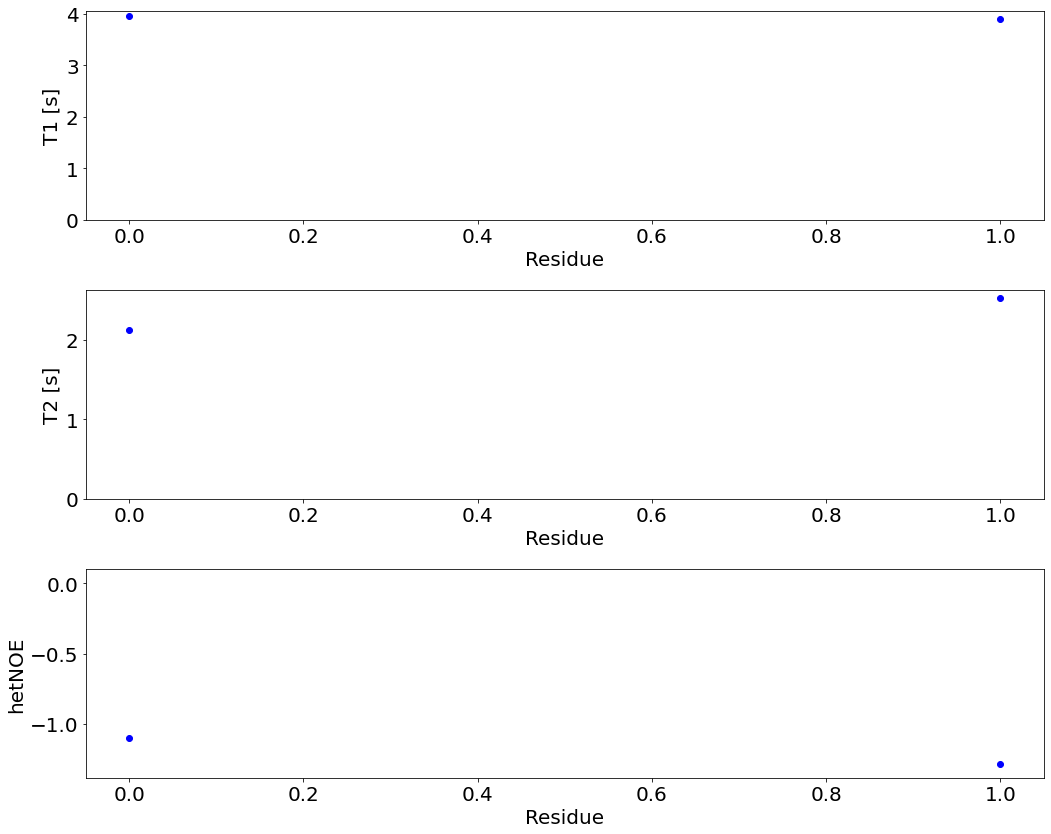

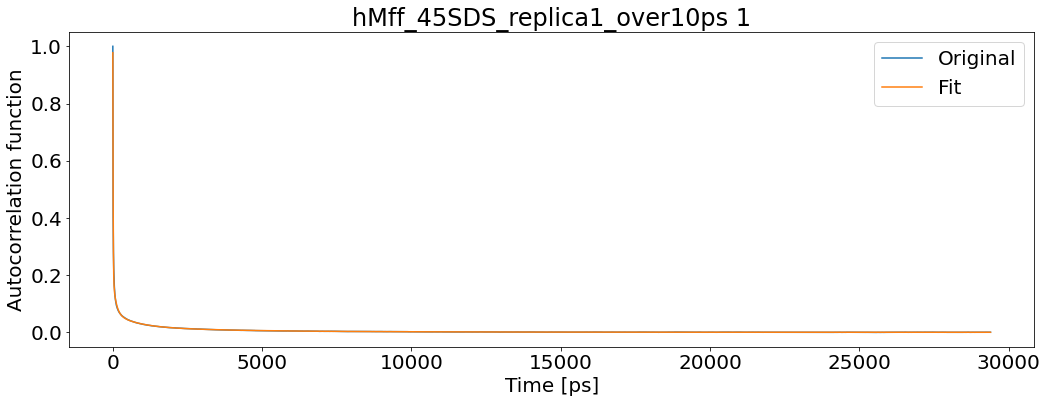

T1: 3.8964055680347376 T2: 2.435591735496142 NOE: -1.2654570755829786


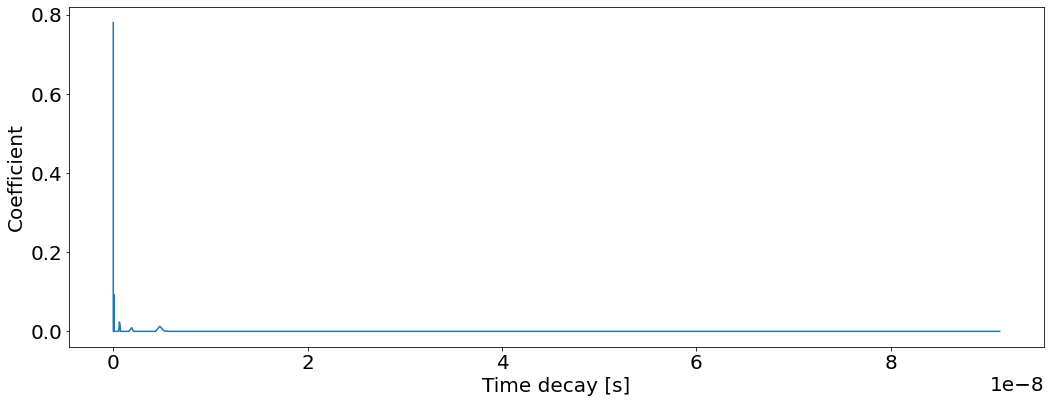

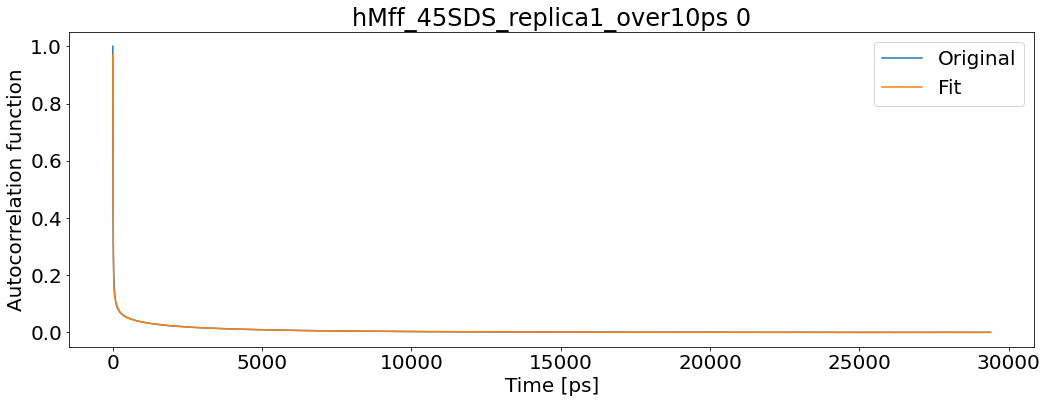

T1: 3.9201917470910415 T2: 2.074489647212192 NOE: -1.059791198669131


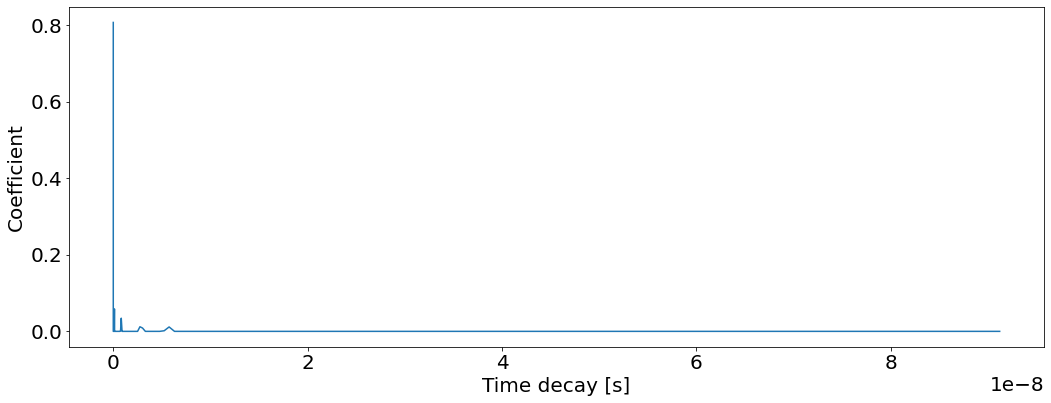

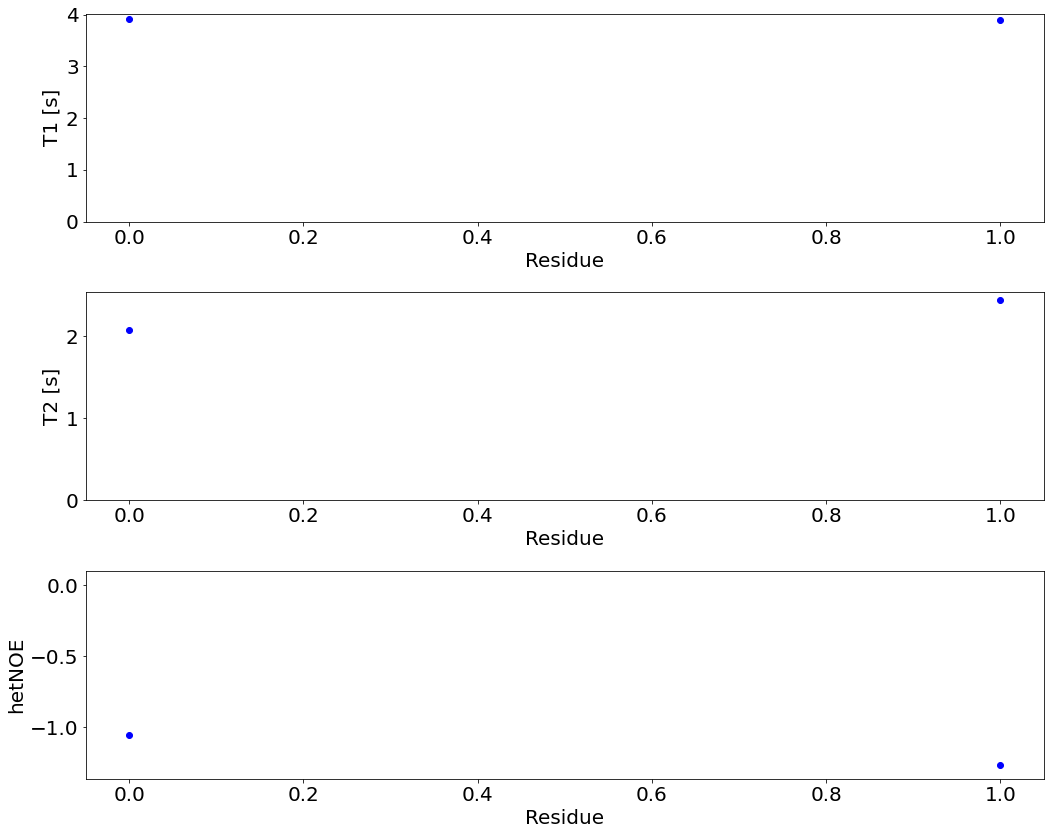

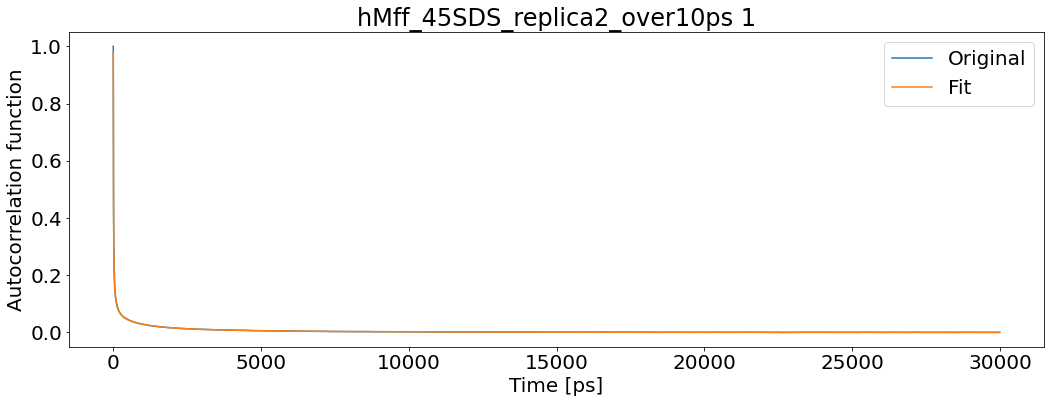

T1: 3.880030664557115 T2: 2.4153409659425042 NOE: -1.2682241370425786


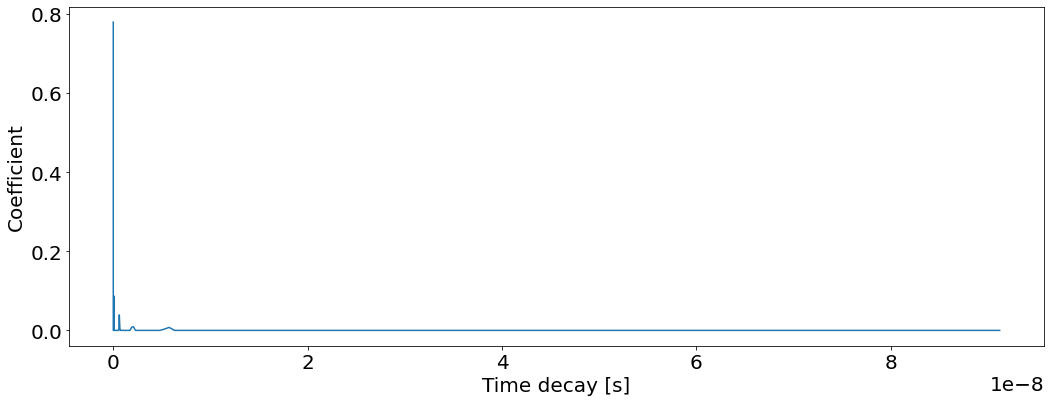

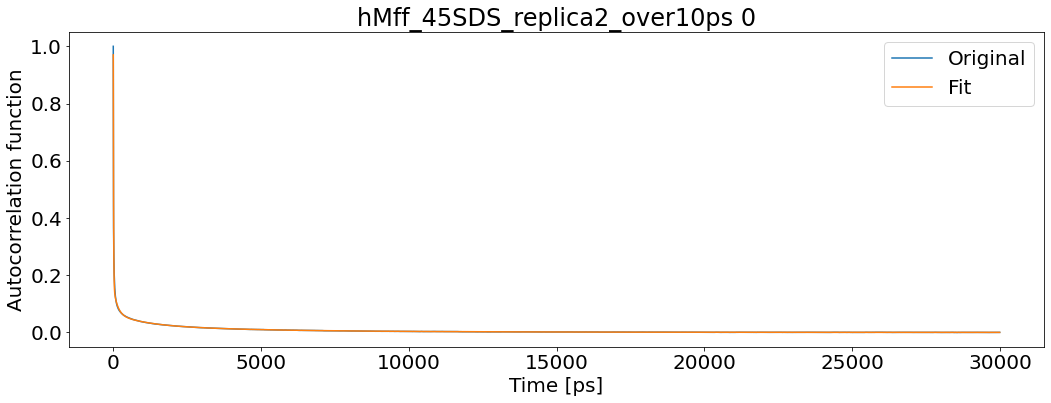

T1: 3.90064266376655 T2: 1.9843789249968626 NOE: -1.0633171278259743


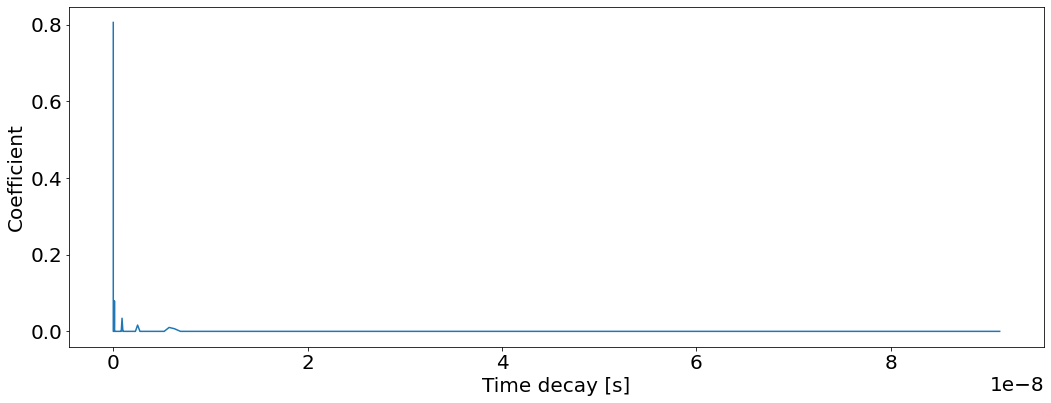

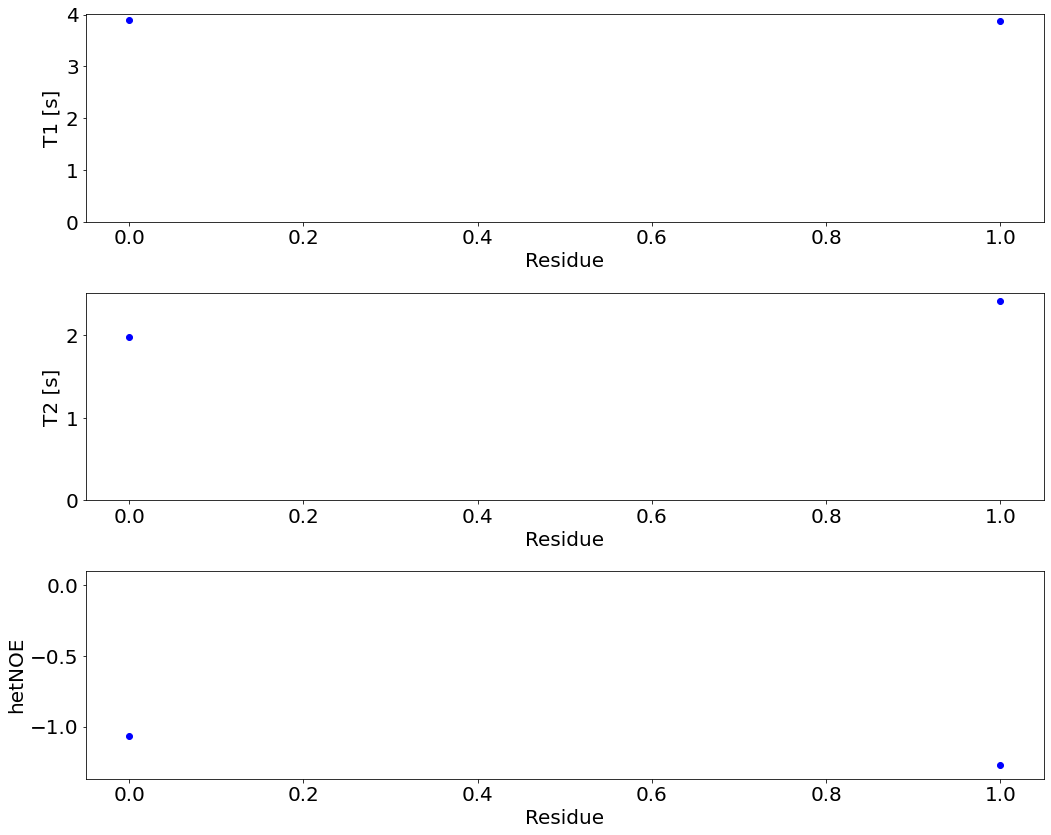

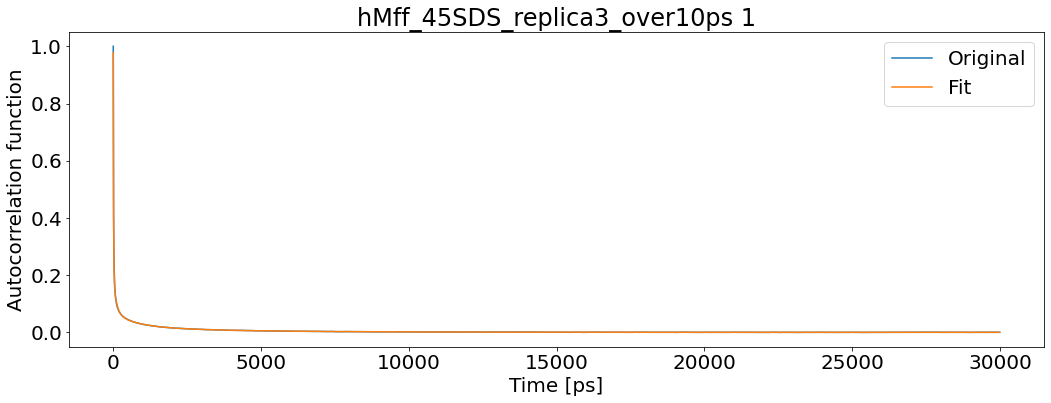

T1: 3.8568029597644173 T2: 2.4492723729310435 NOE: -1.2529372319590806


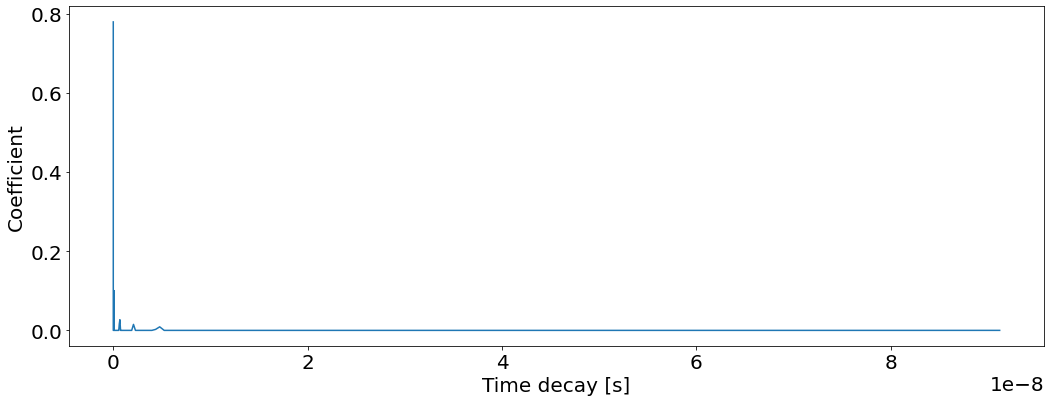

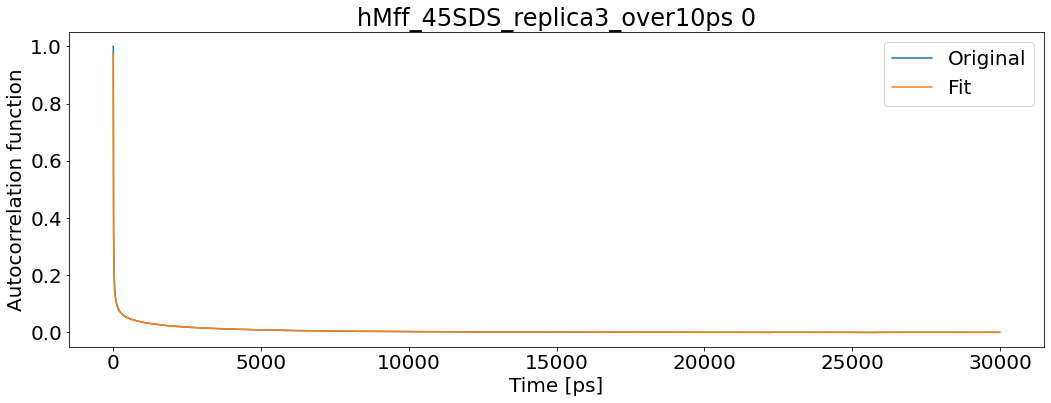

T1: 3.903817910273598 T2: 2.0379124760163037 NOE: -1.0650603414983713


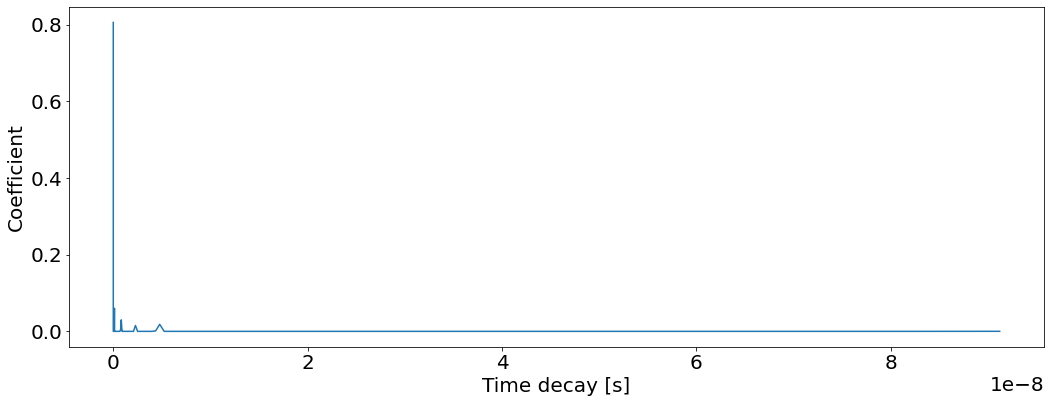

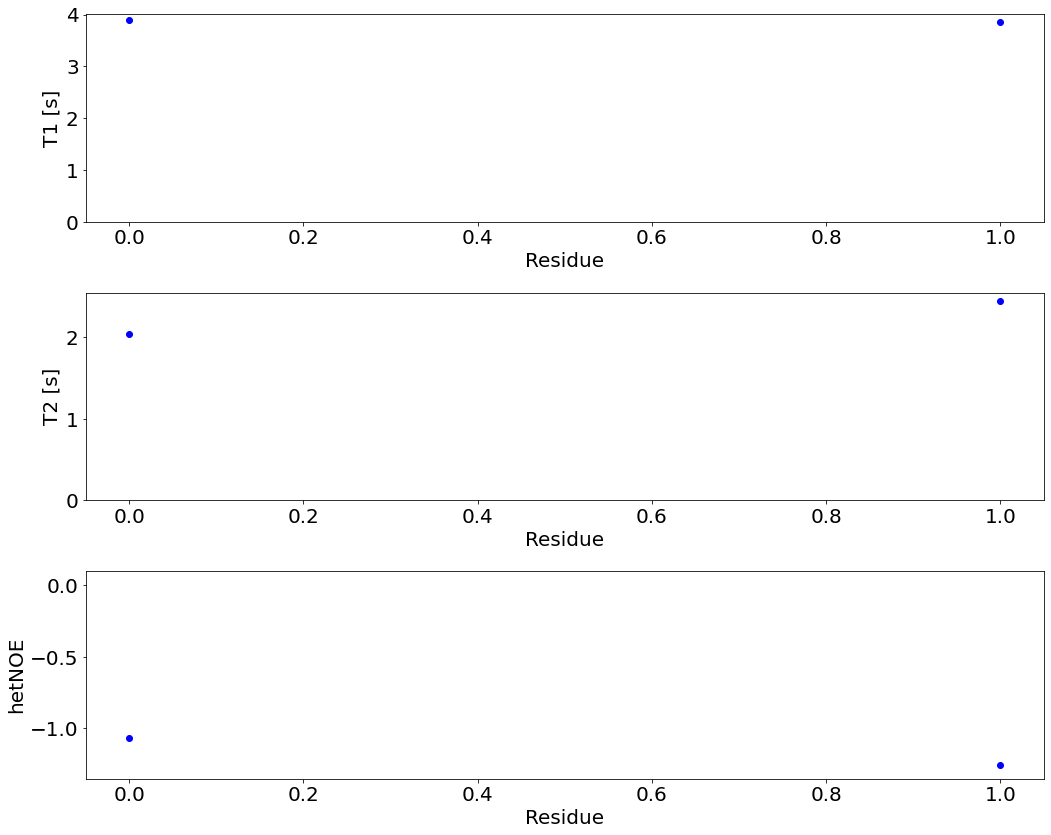

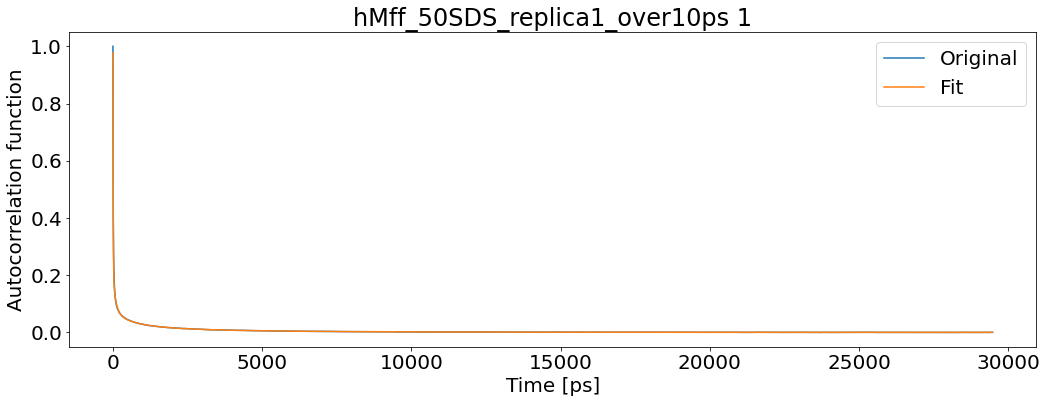

T1: 3.893906313966526 T2: 2.4330789044278105 NOE: -1.2481229079979506


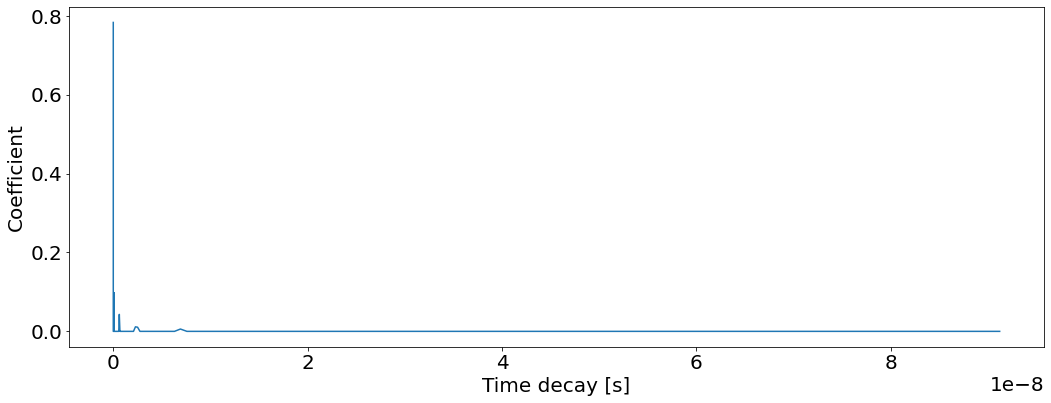

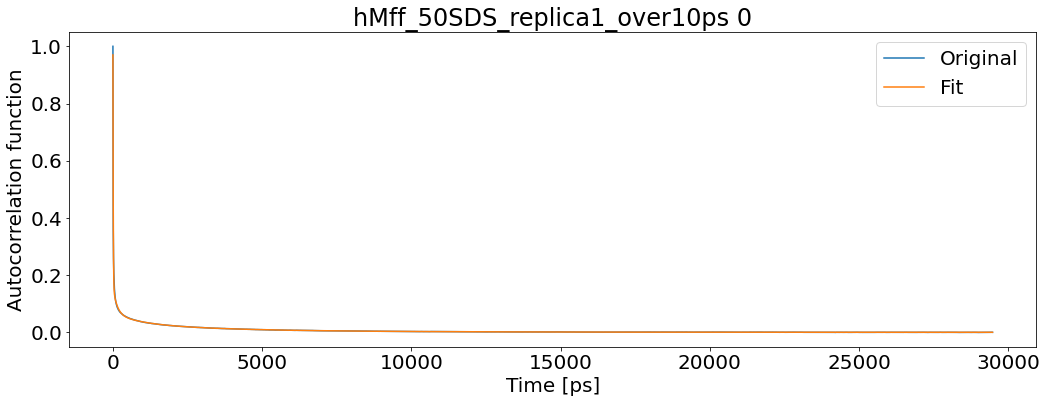

T1: 3.924305894875913 T2: 2.066737866962862 NOE: -1.0530147327117678


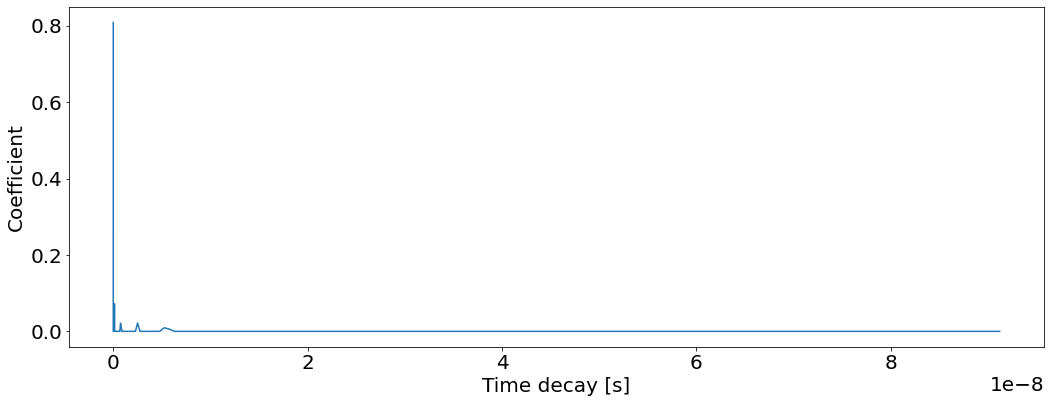

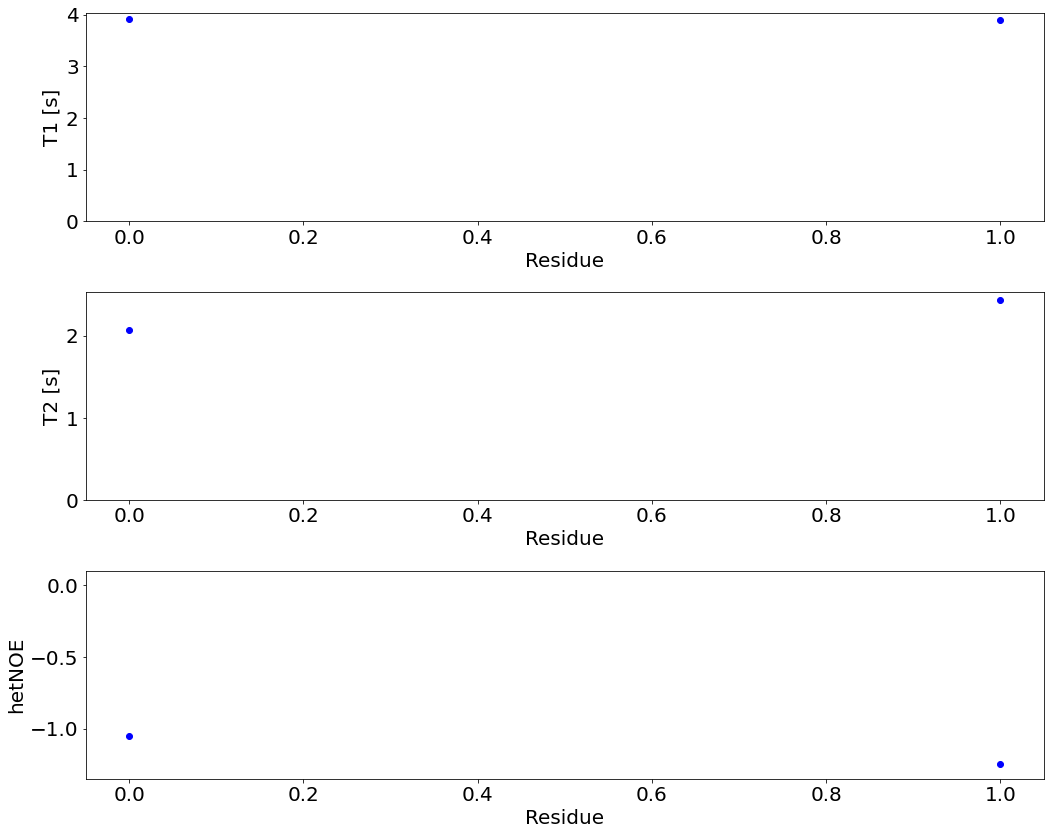

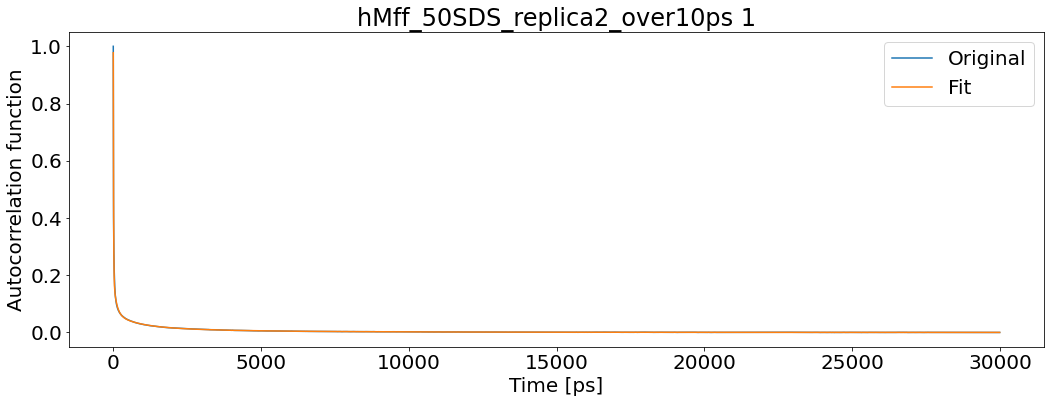

T1: 3.9021323906083807 T2: 2.423372410355816 NOE: -1.2464799432898634


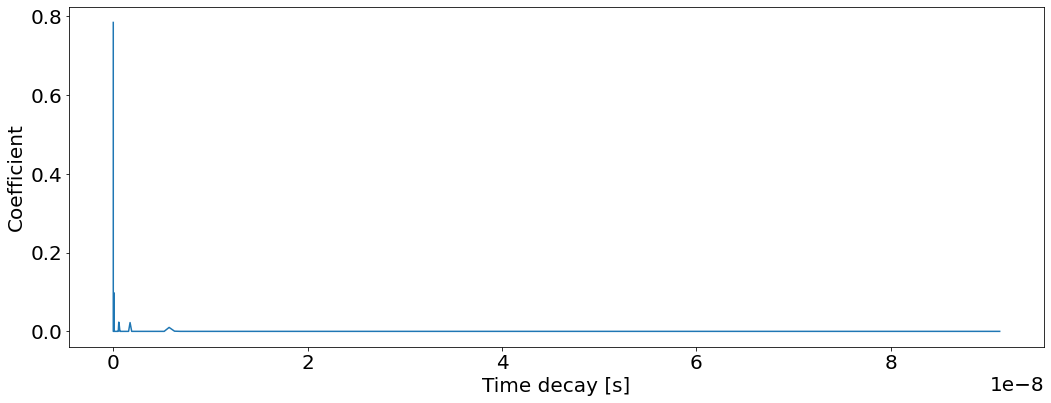

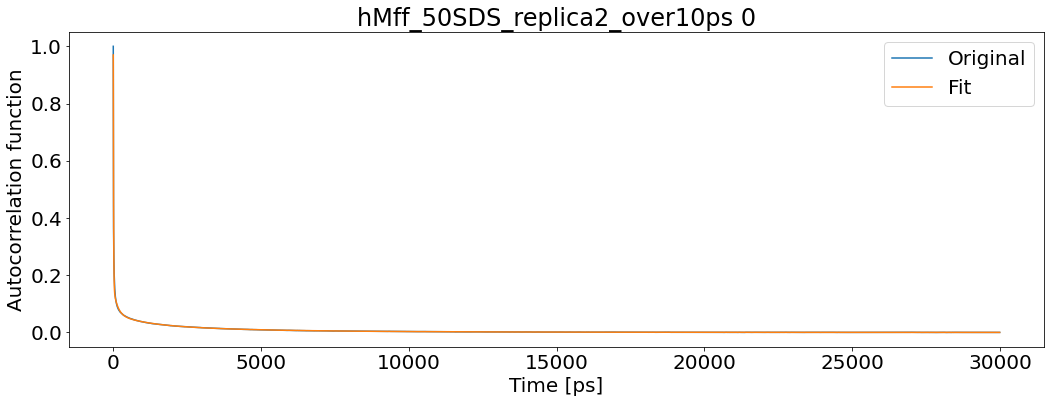

T1: 3.899066799432139 T2: 2.0460999652306886 NOE: -1.0262513021353215


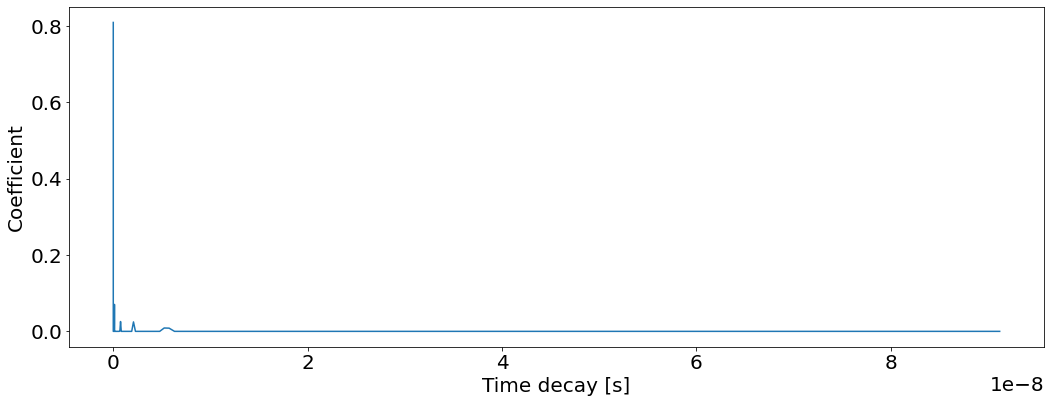

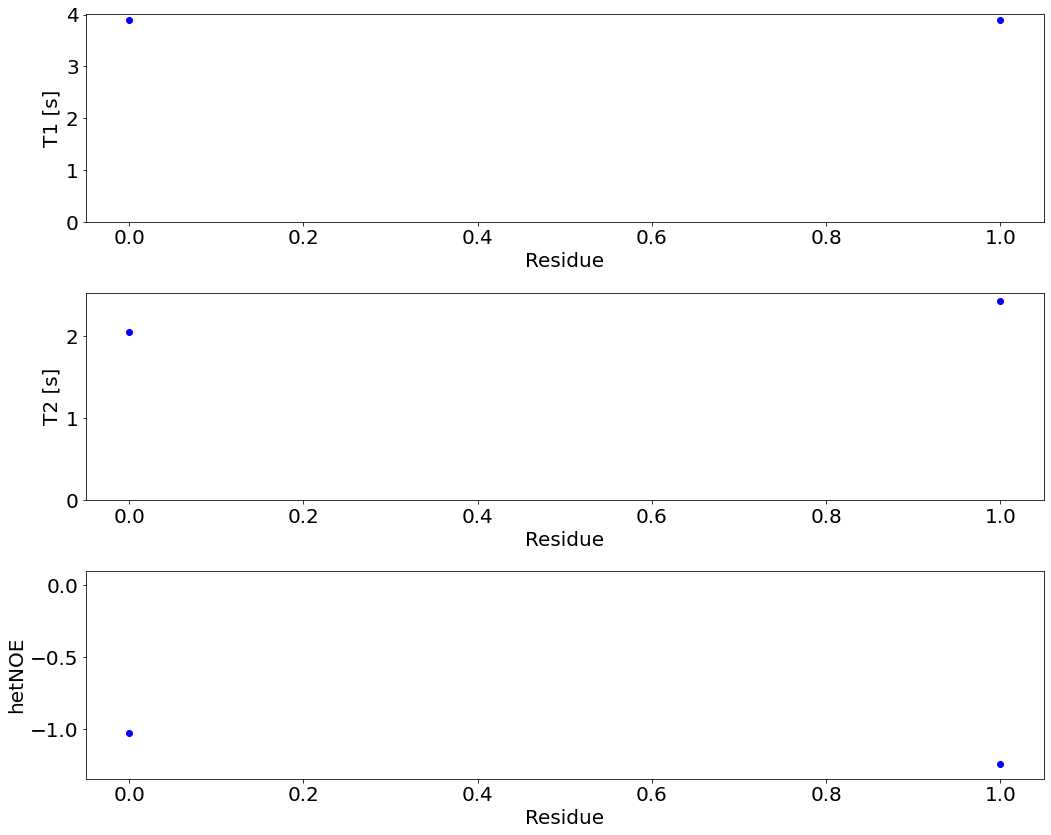

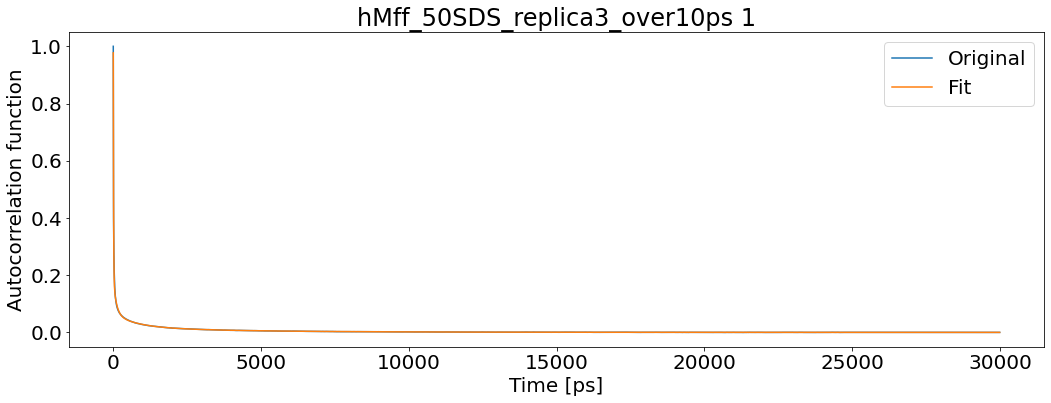

T1: 3.997910646463781 T2: 2.408547903113768 NOE: -1.2771973090664317


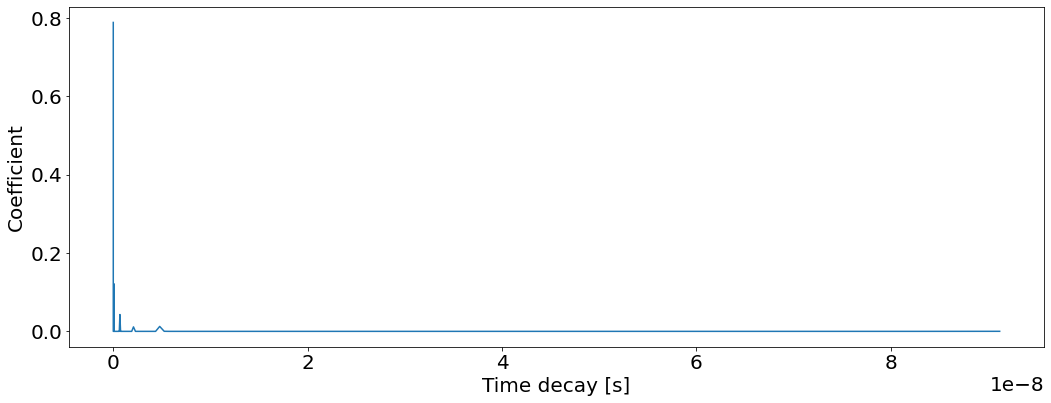

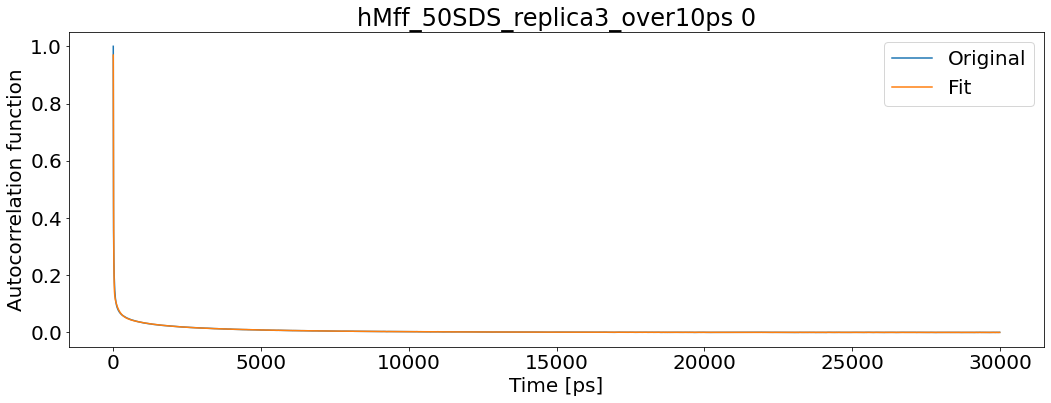

T1: 4.065260975860185 T2: 2.0961996740123516 NOE: -1.0934299235120775


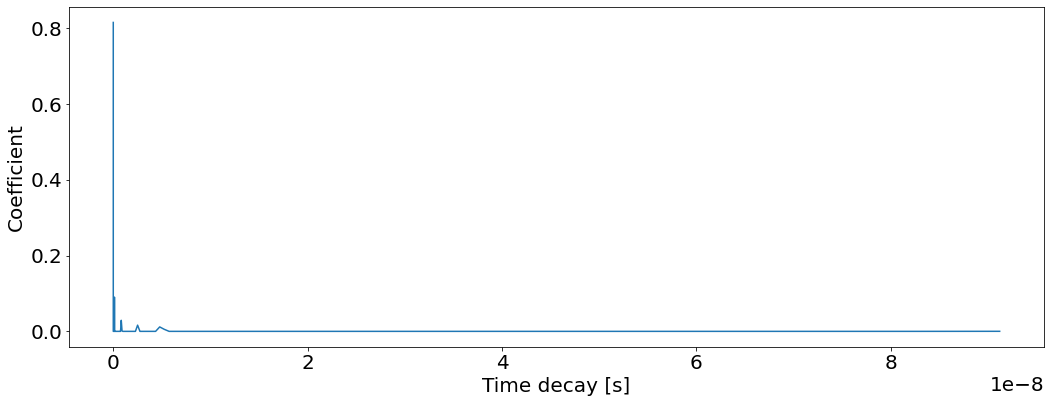

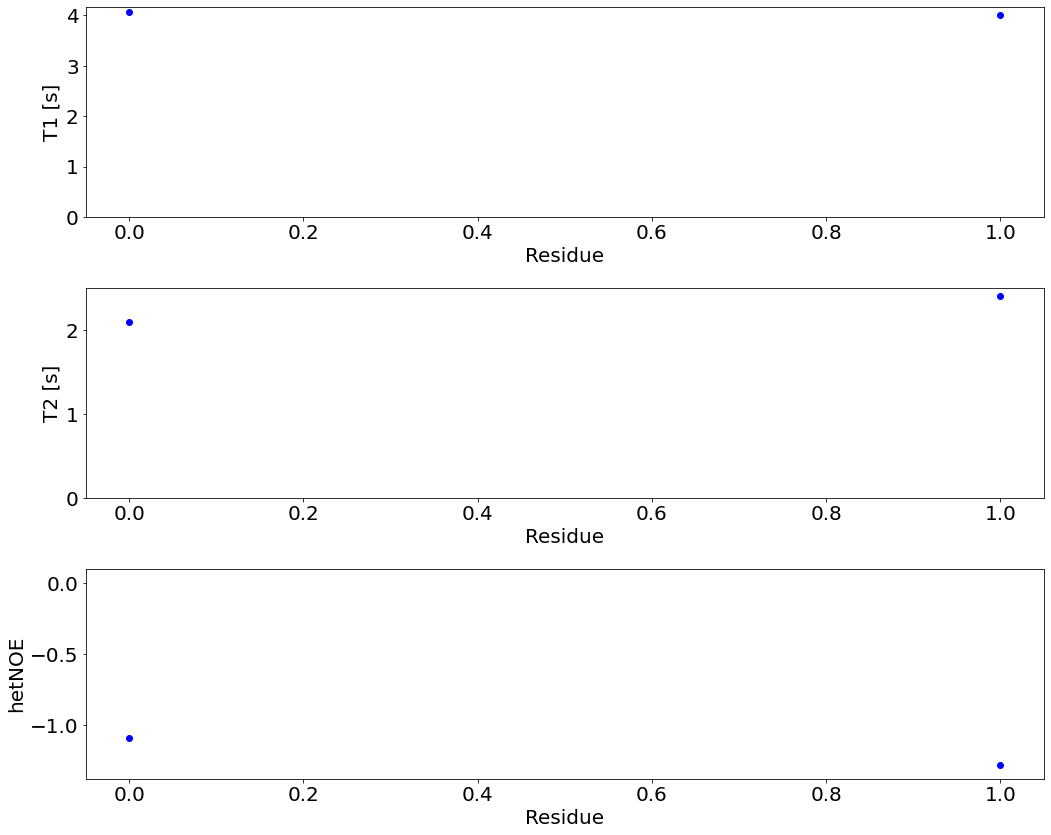

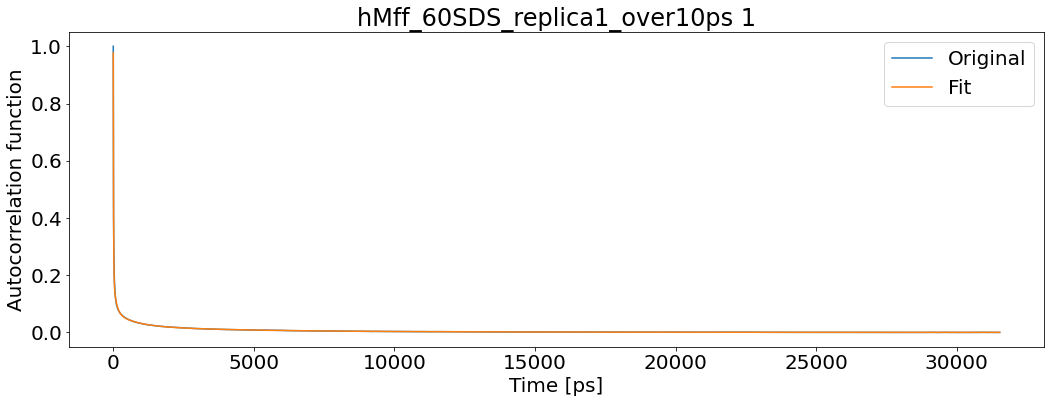

T1: 3.9725097800696827 T2: 2.1223645945446465 NOE: -1.2489227025251863


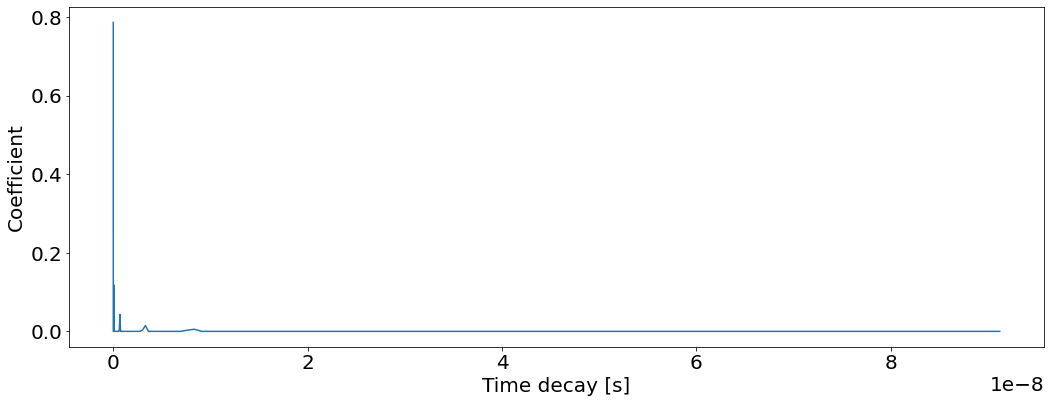

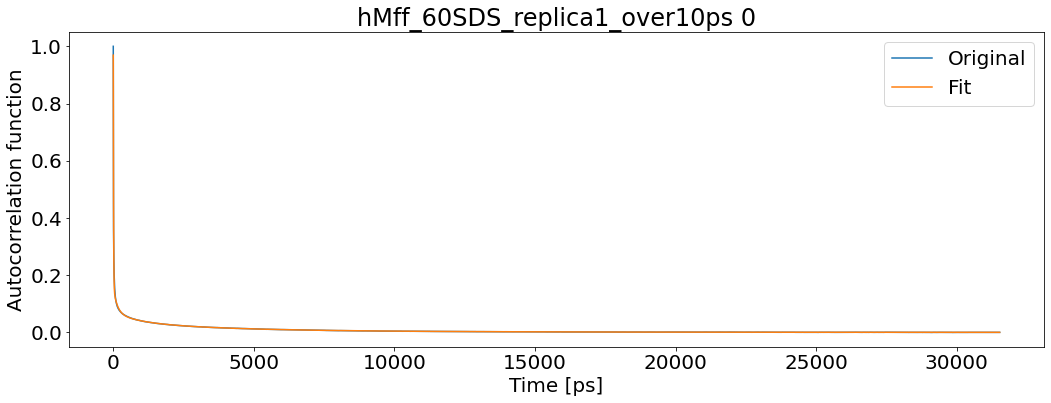

T1: 3.956406194908062 T2: 1.801043457174382 NOE: -1.0160002813594367


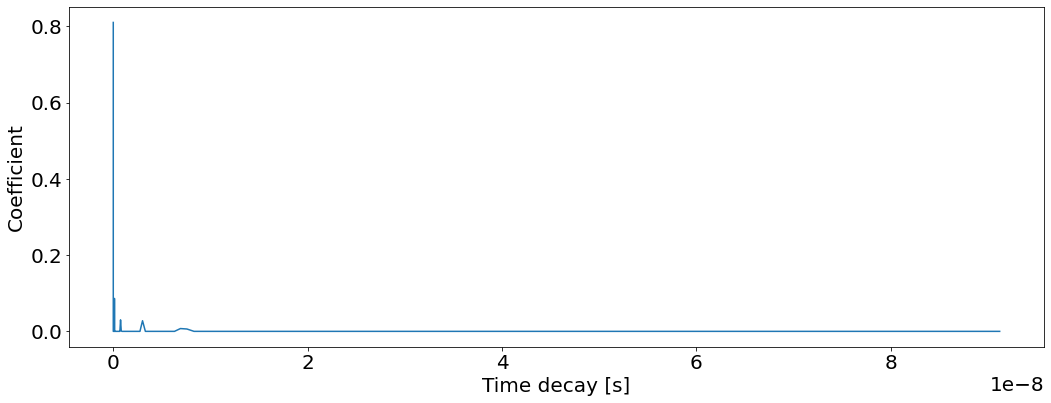

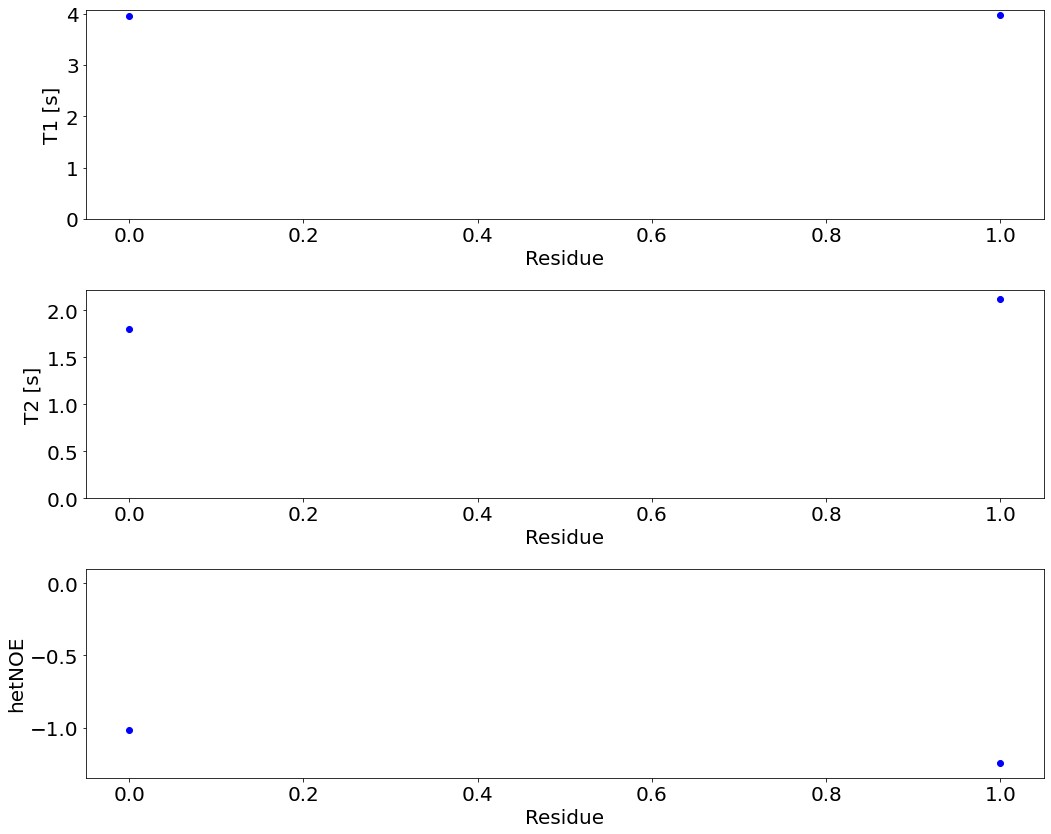

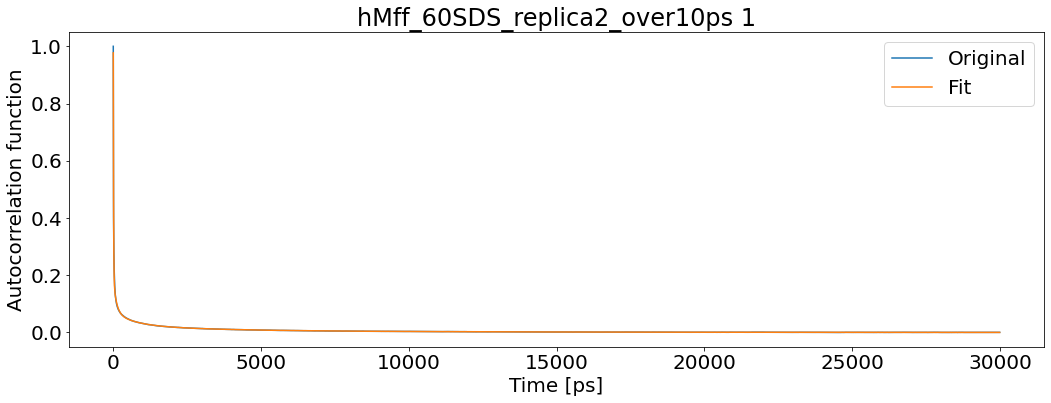

T1: 3.943782040137126 T2: 2.074646823042868 NOE: -1.2419458818614446


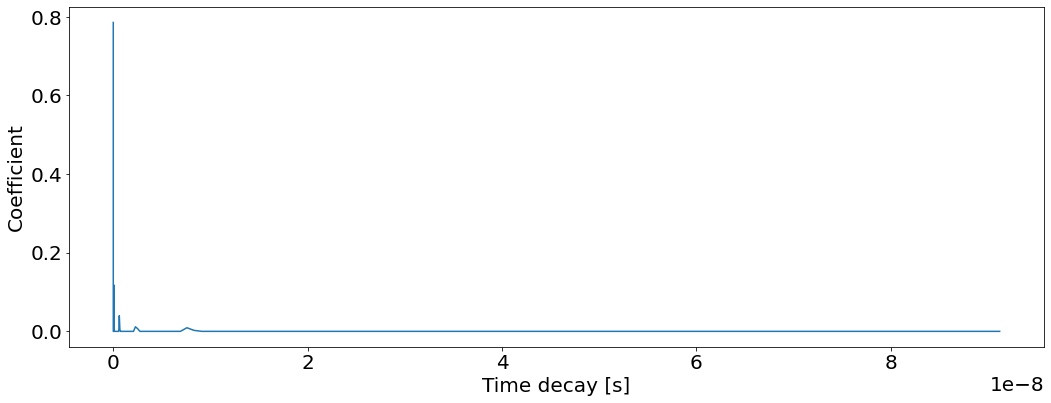

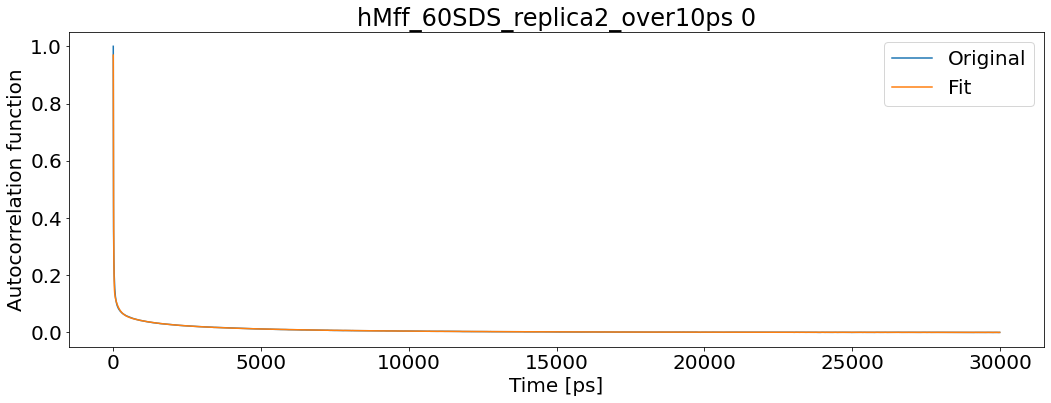

T1: 3.9345240823484797 T2: 1.765290193542386 NOE: -1.0068051162957992


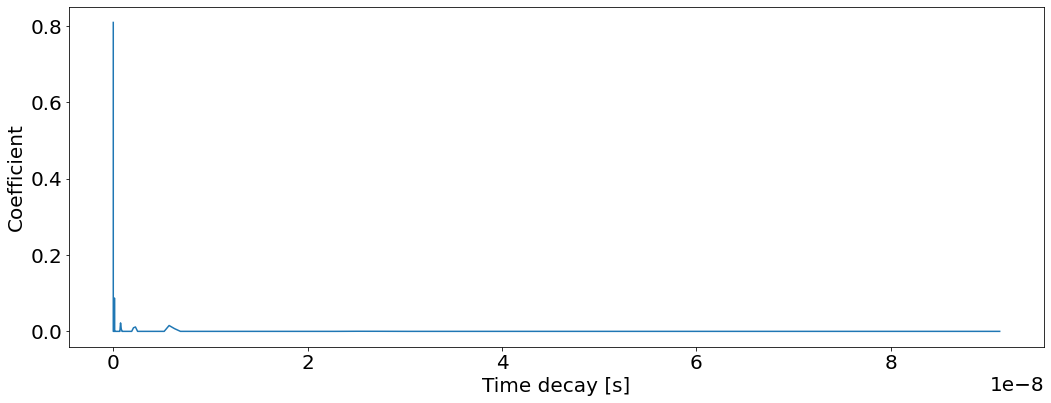

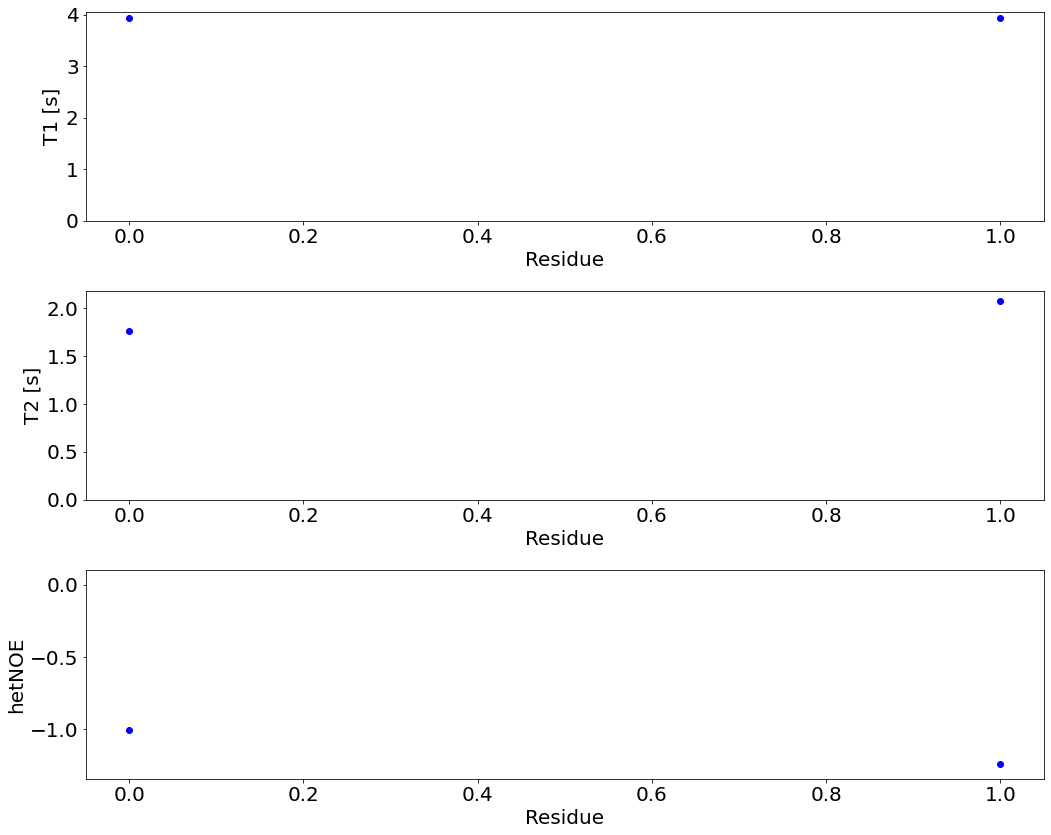

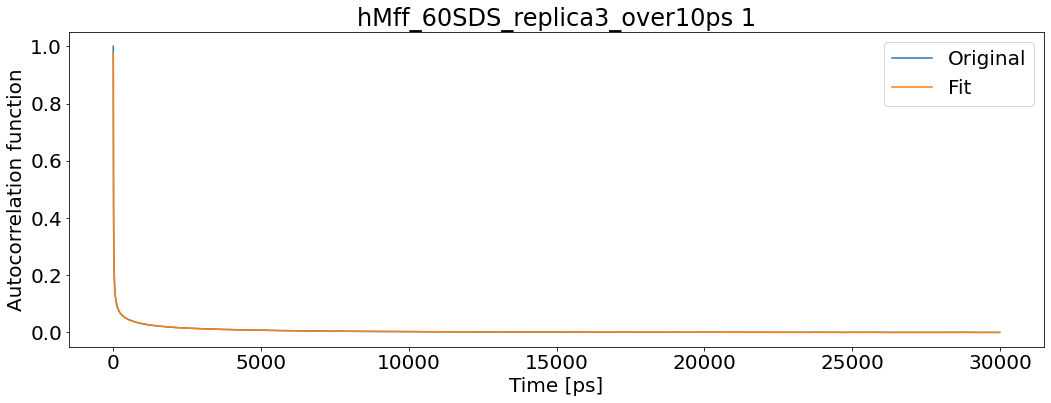

T1: 3.9854588385603438 T2: 2.1607630859239944 NOE: -1.2551844680000377


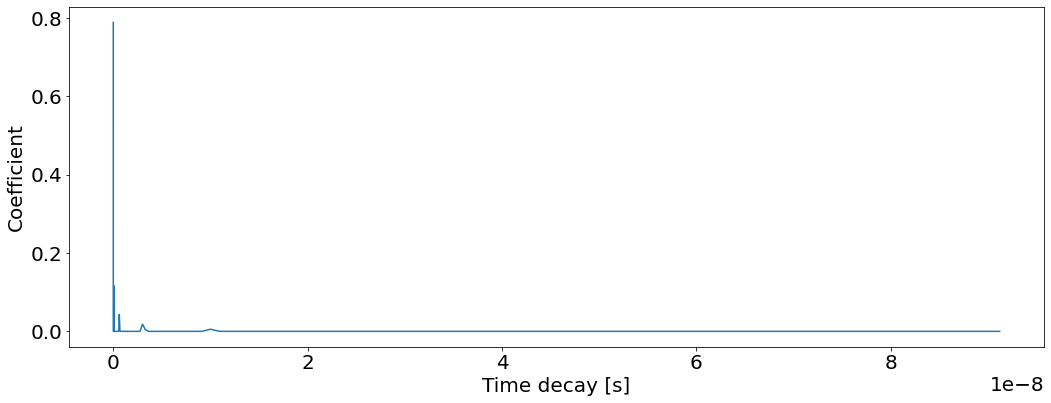

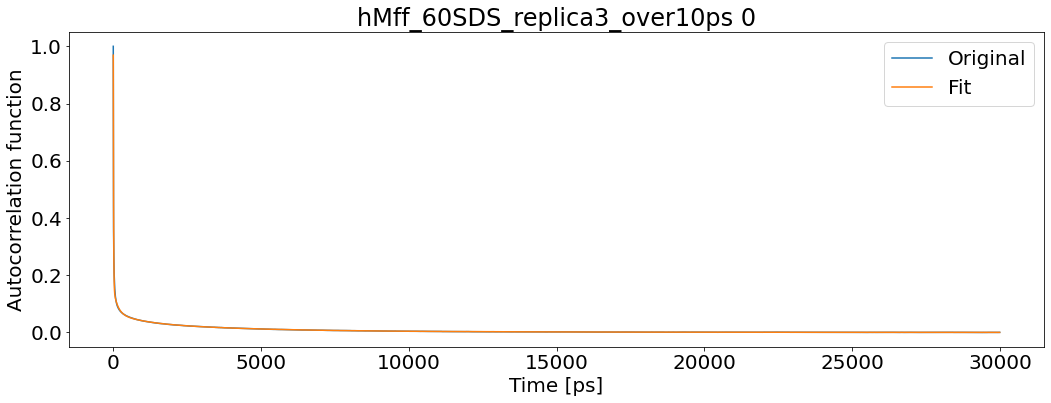

T1: 3.9571161927681335 T2: 1.7584703322679074 NOE: -1.0060520445228929


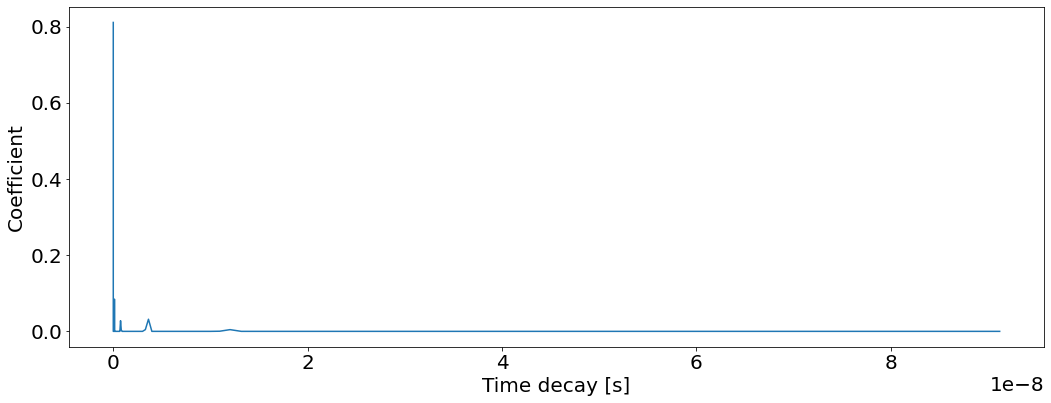

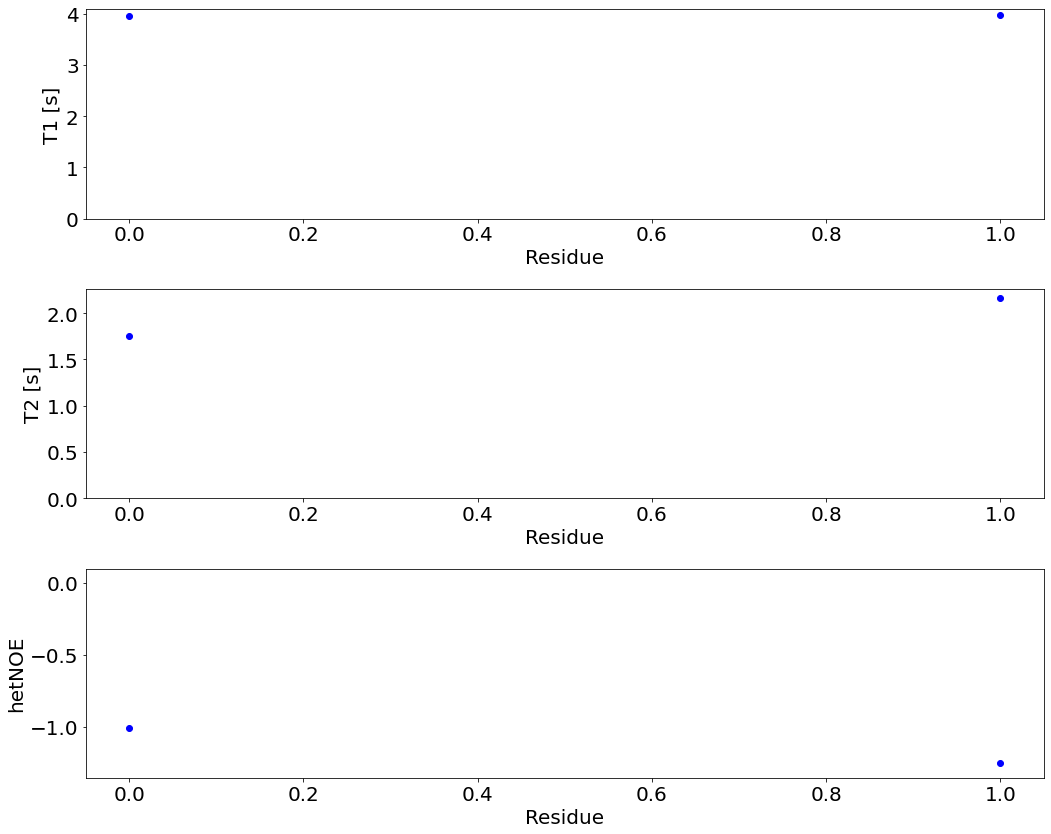

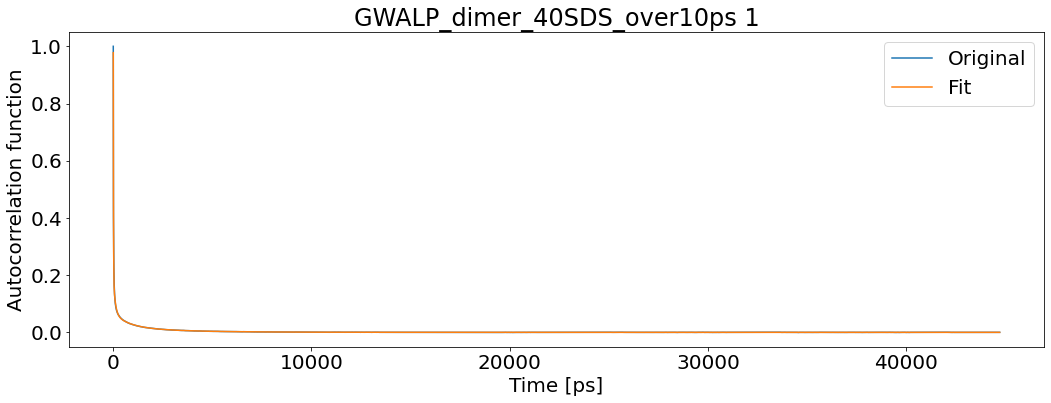

T1: 3.833399397207031 T2: 2.600761363493359 NOE: -1.2175610264683119


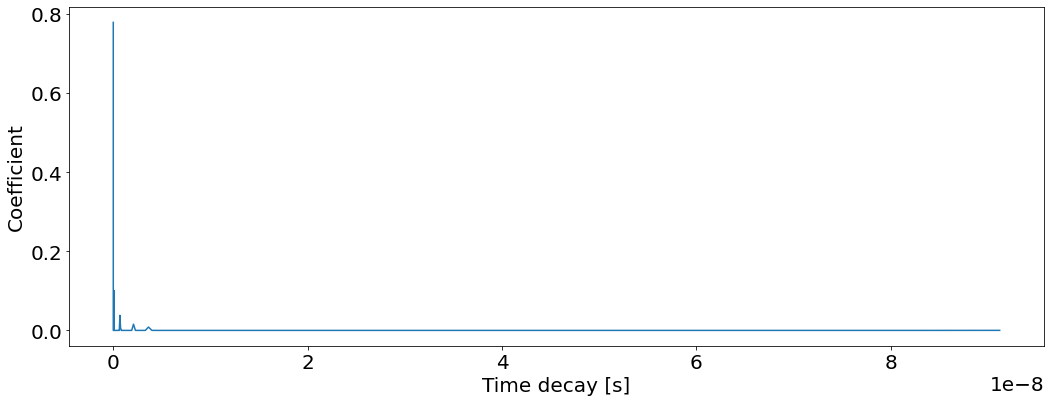

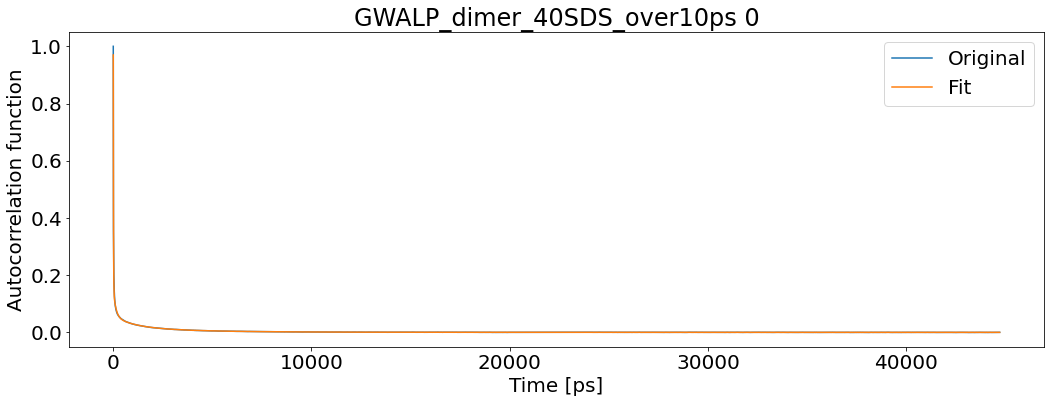

T1: 4.12495364223902 T2: 2.5888098067255174 NOE: -1.141147891470879


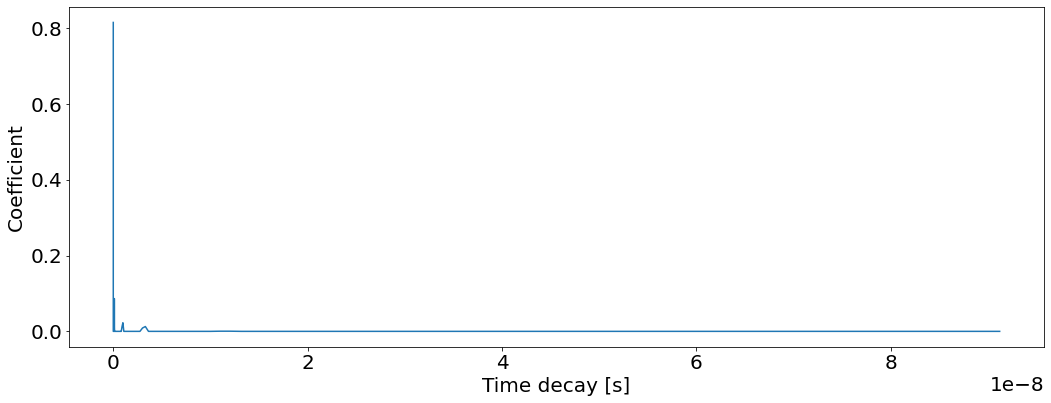

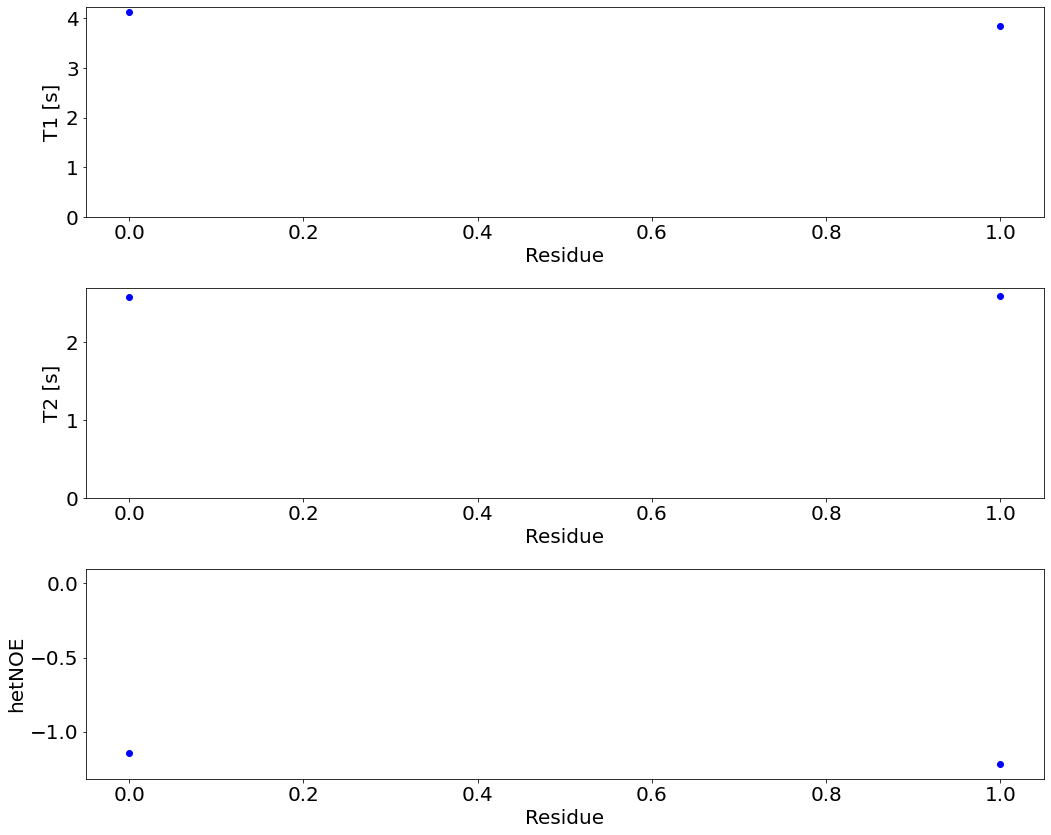

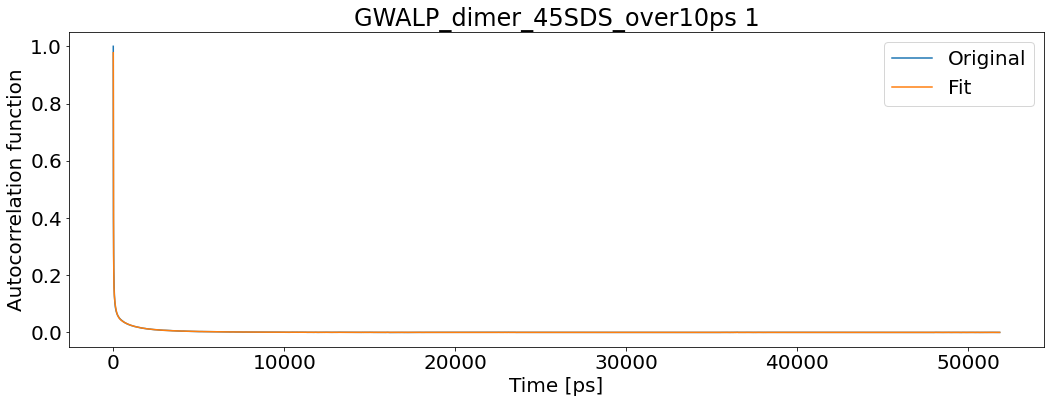

T1: 3.9024902083689272 T2: 2.6894533447712234 NOE: -1.2348974094282261


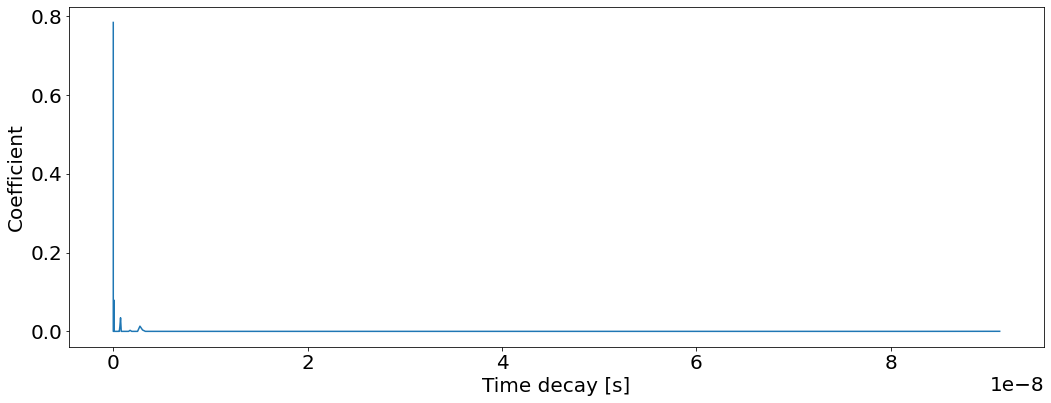

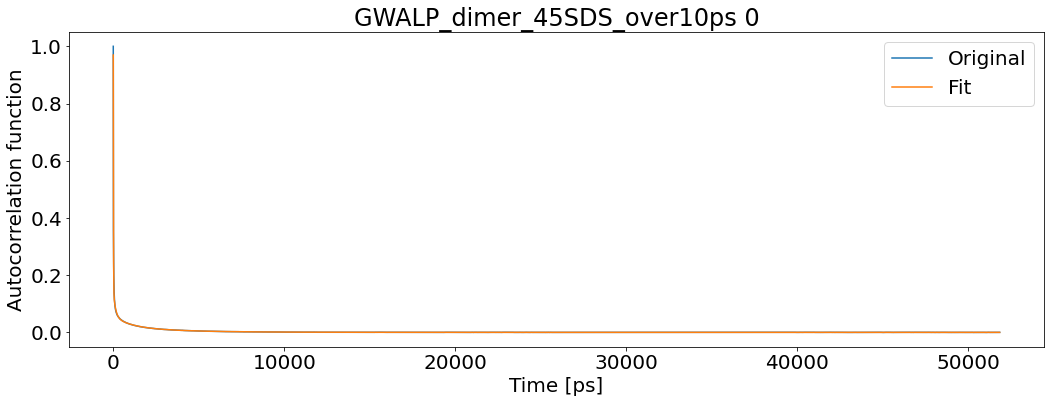

T1: 4.160917892629795 T2: 2.606603240546774 NOE: -1.1360159451820588


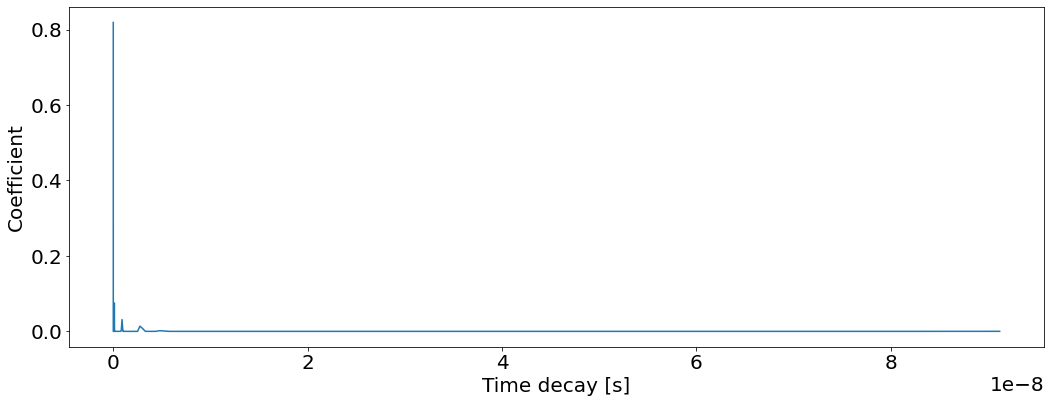

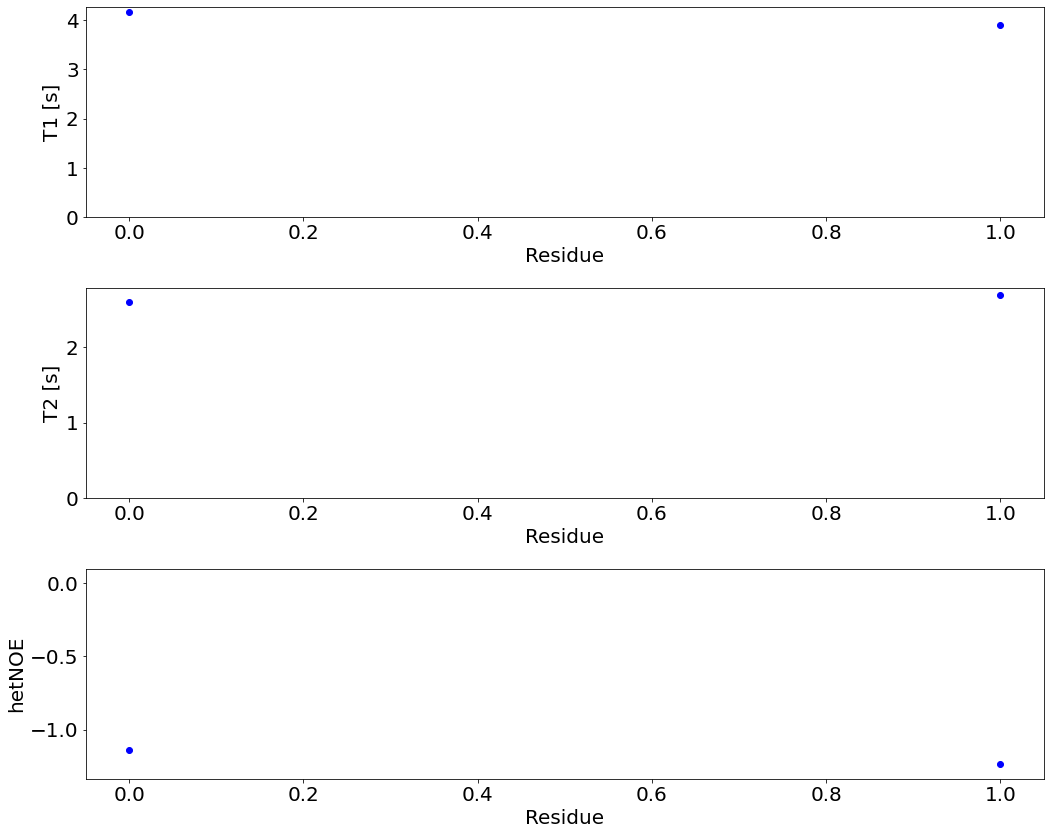

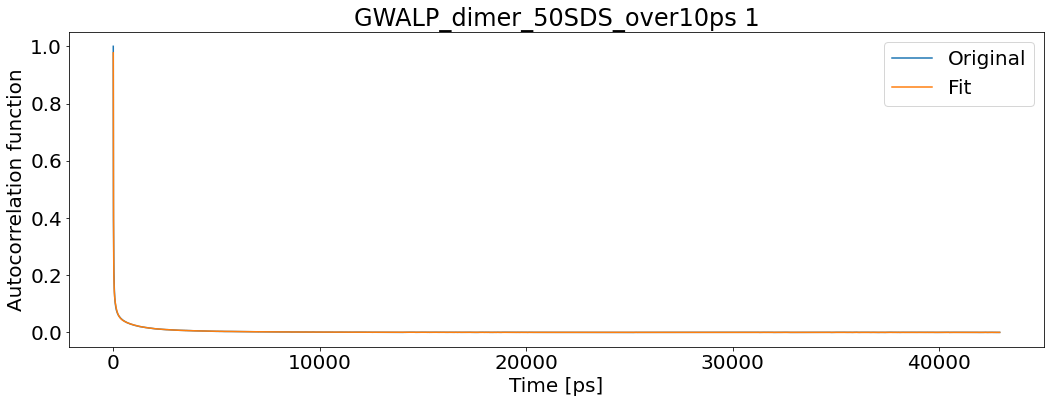

T1: 3.983189588163697 T2: 2.7650663351011926 NOE: -1.2636373915745023


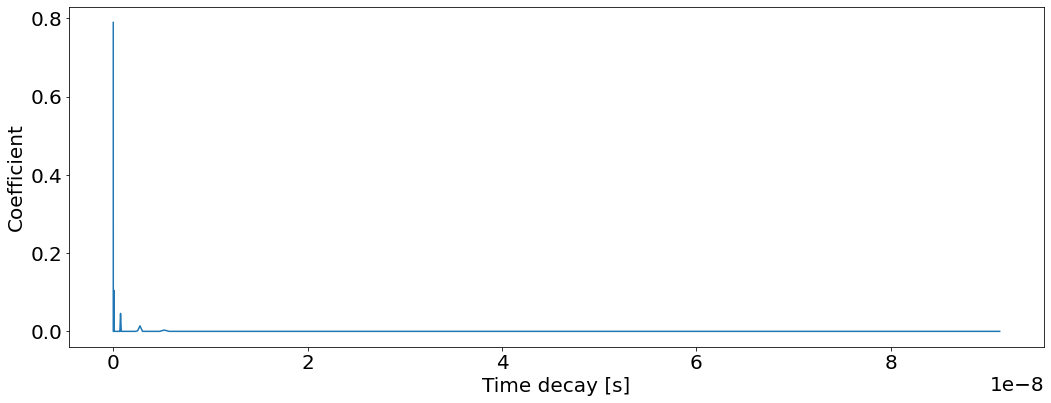

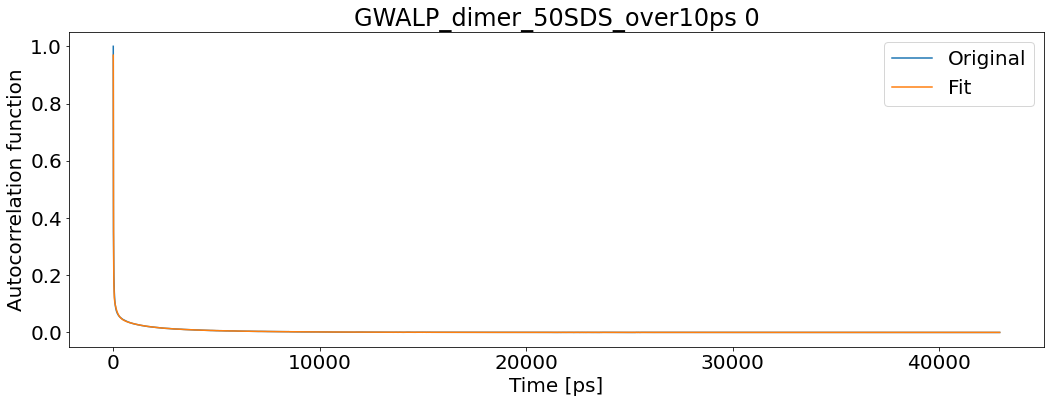

T1: 4.200189854178143 T2: 2.4658639256271355 NOE: -1.1317425700032748


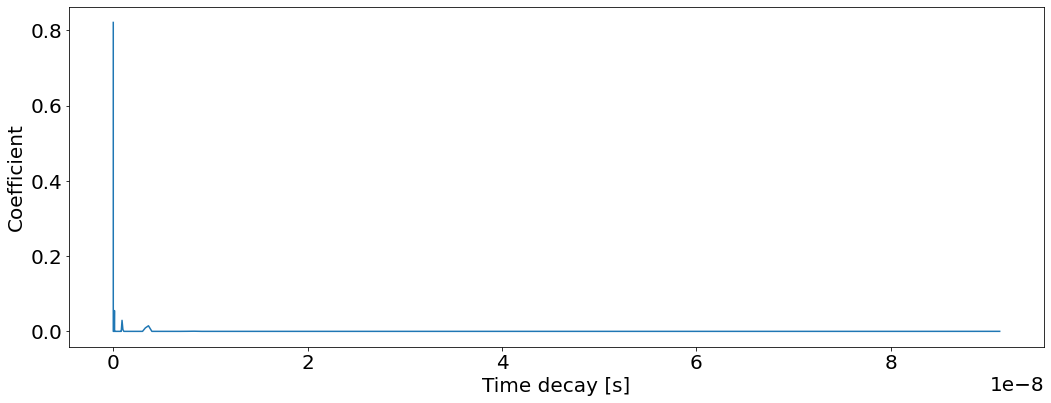

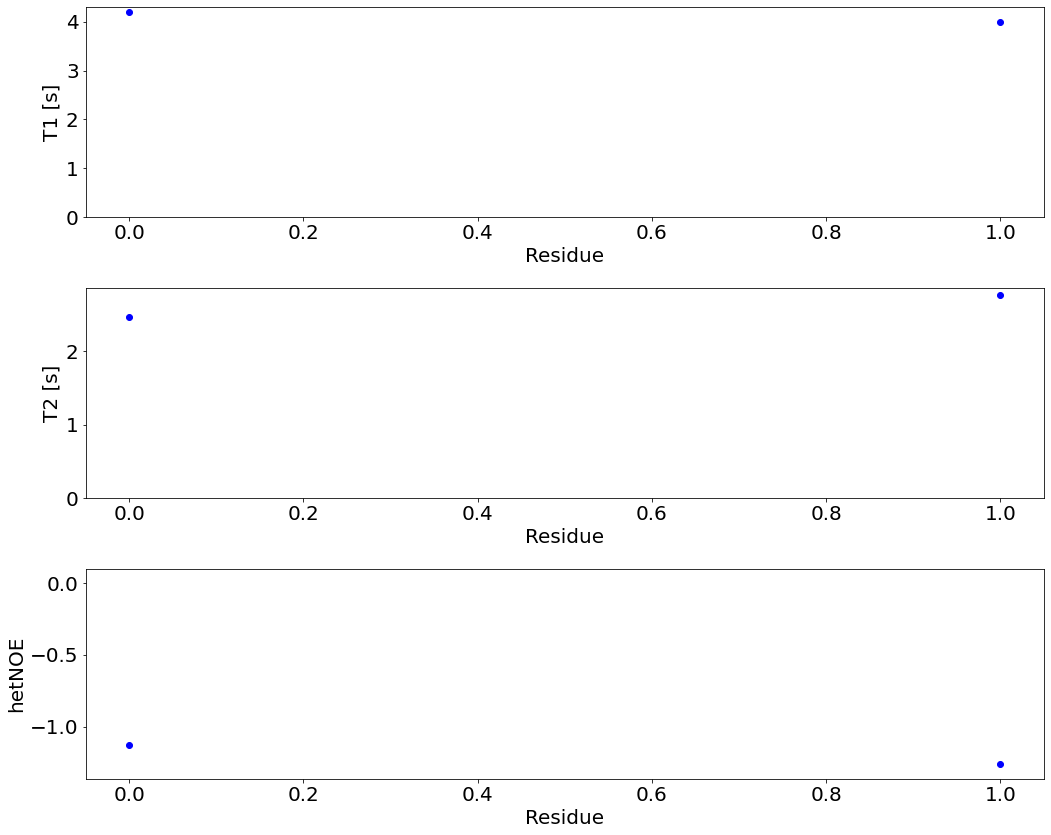

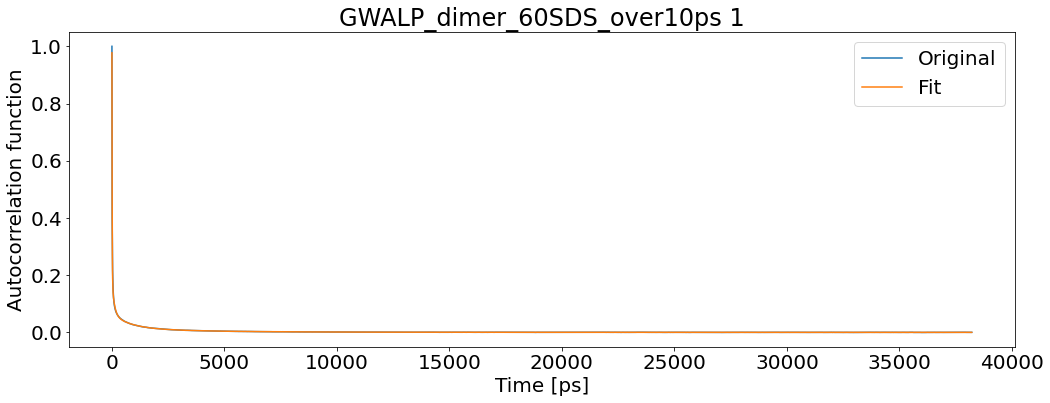

T1: 3.9935227547754977 T2: 2.6865274564554023 NOE: -1.2558332621347335


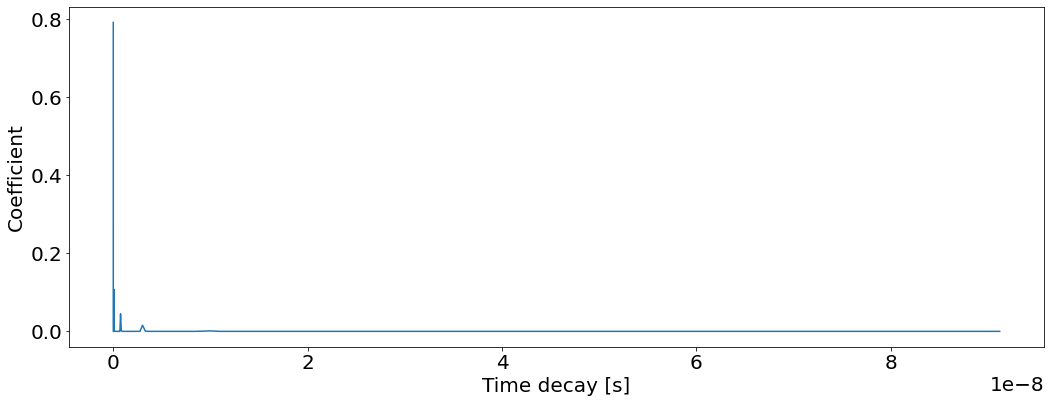

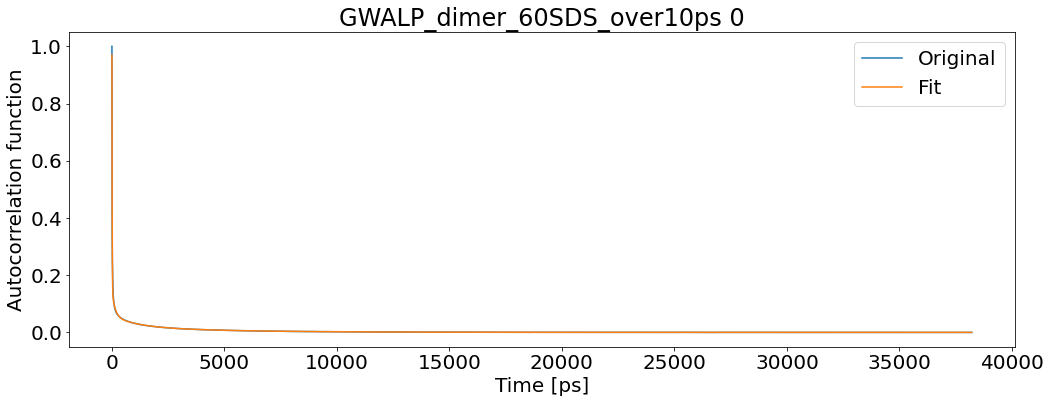

T1: 4.1829385175571625 T2: 2.305190140202297 NOE: -1.1051646639364407


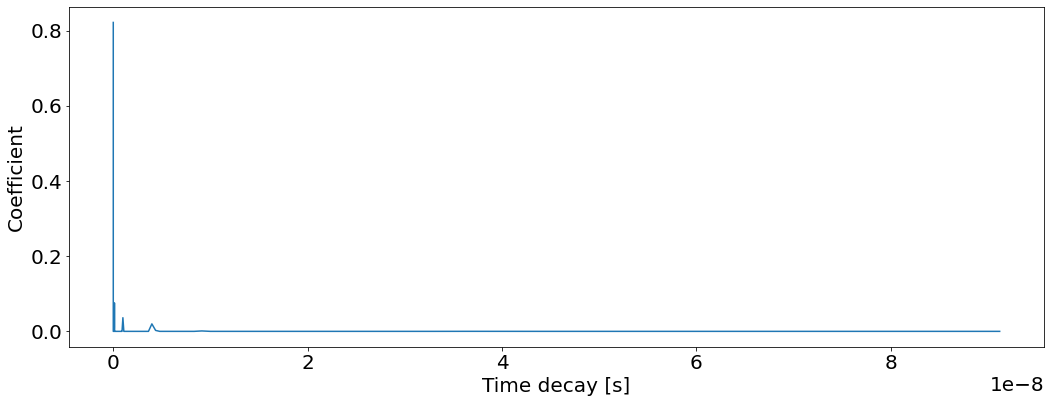

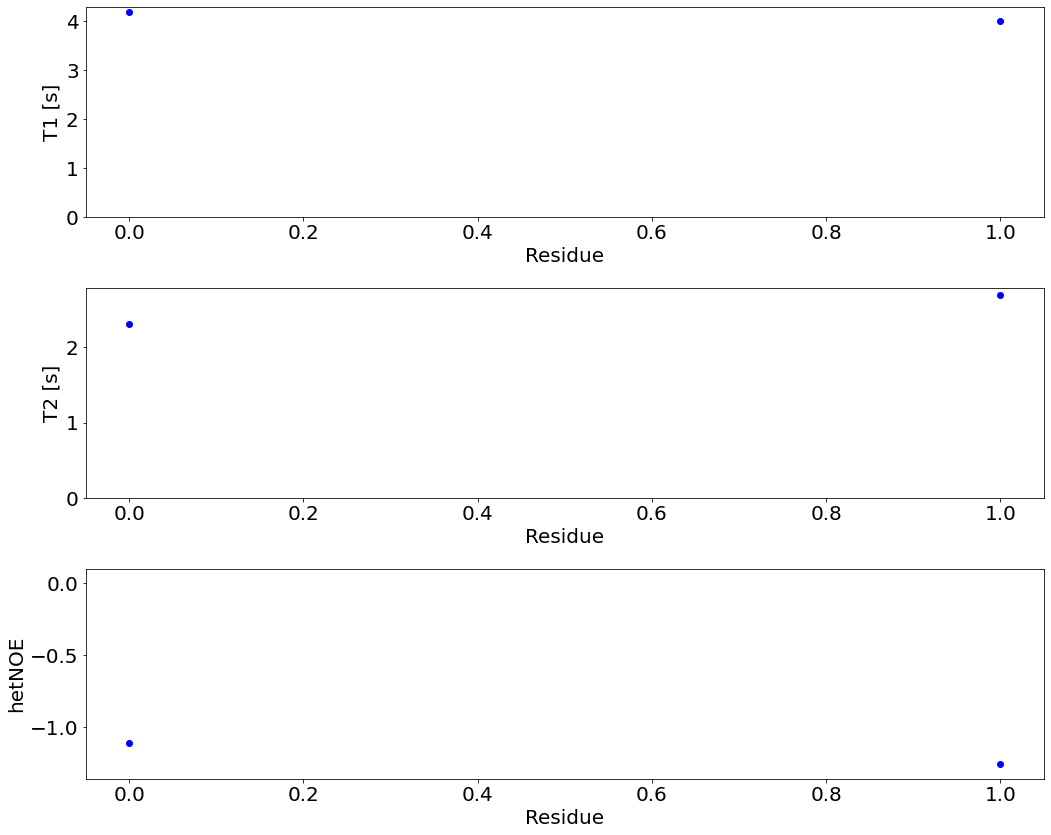

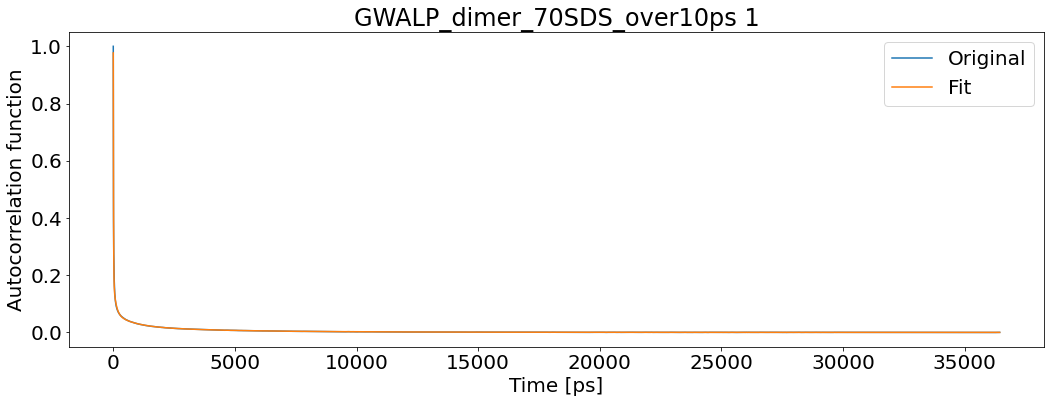

T1: 3.981906674198484 T2: 2.315537850012876 NOE: -1.2178920028623832


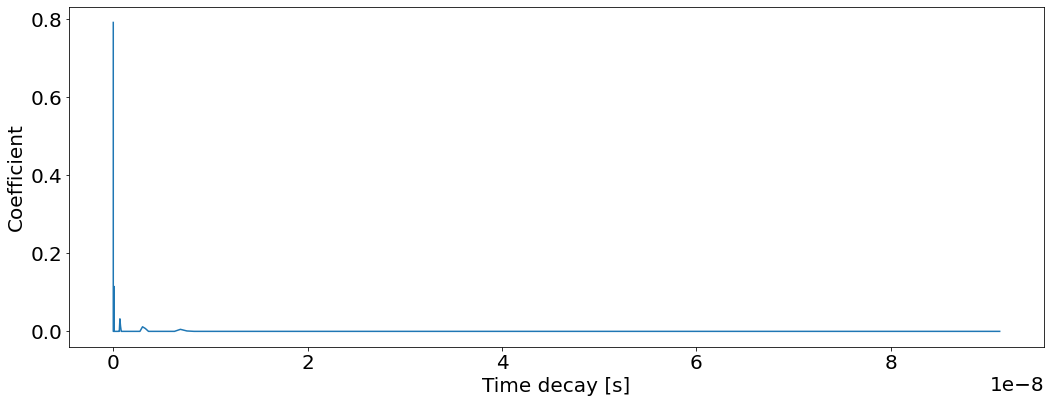

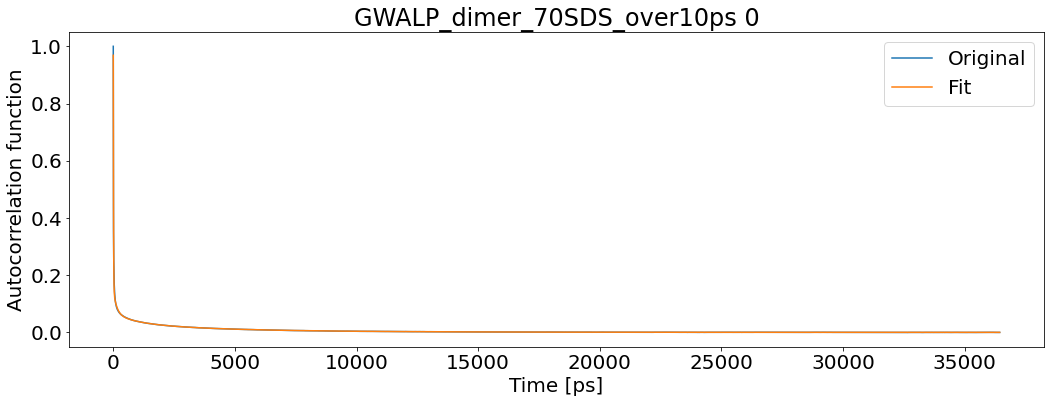

T1: 4.0941909455077035 T2: 1.931828602310149 NOE: -1.0327494993505963


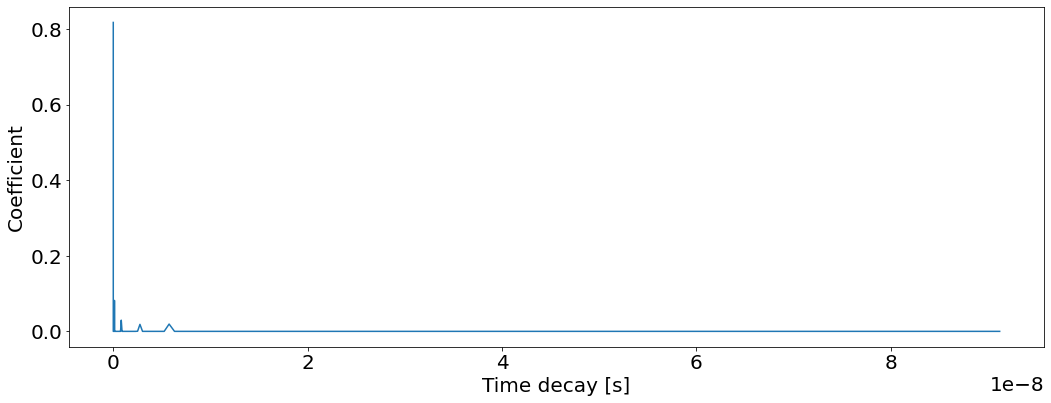

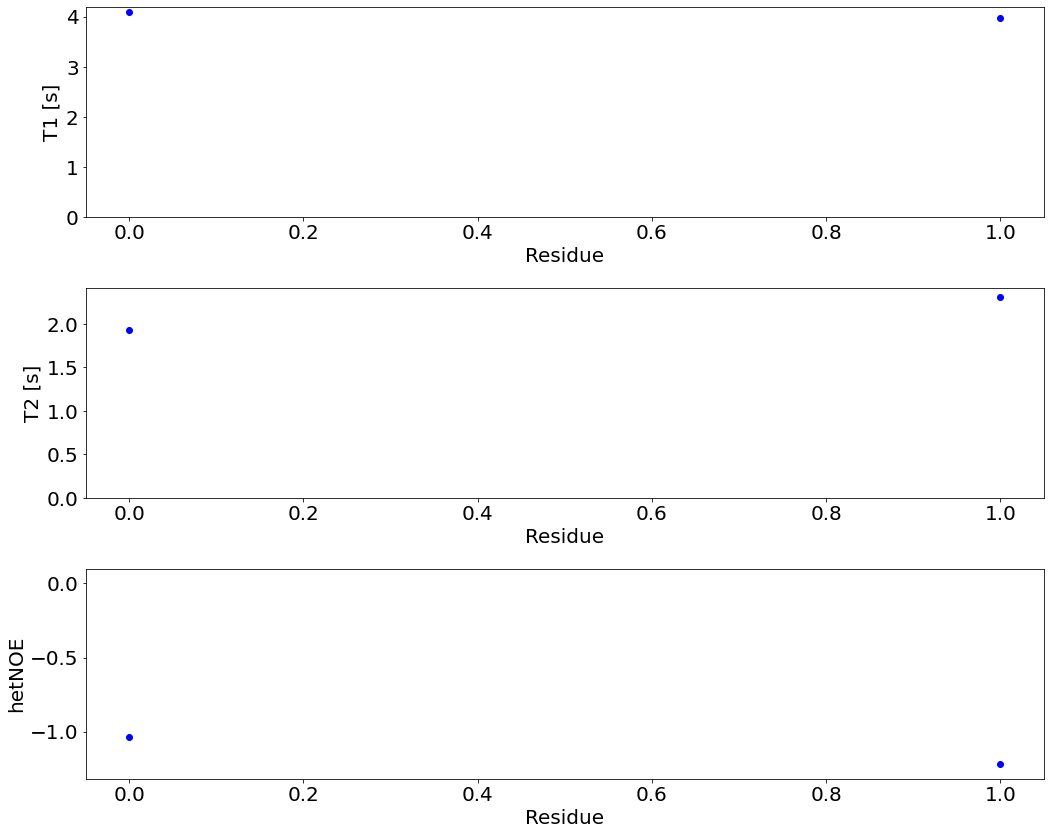

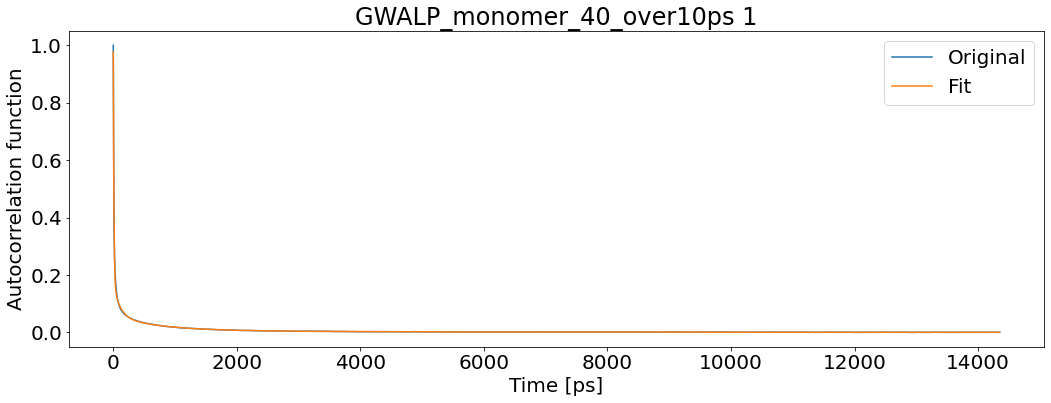

T1: 4.354666781403297 T2: 3.4681718560447736 NOE: -1.4666910035696166


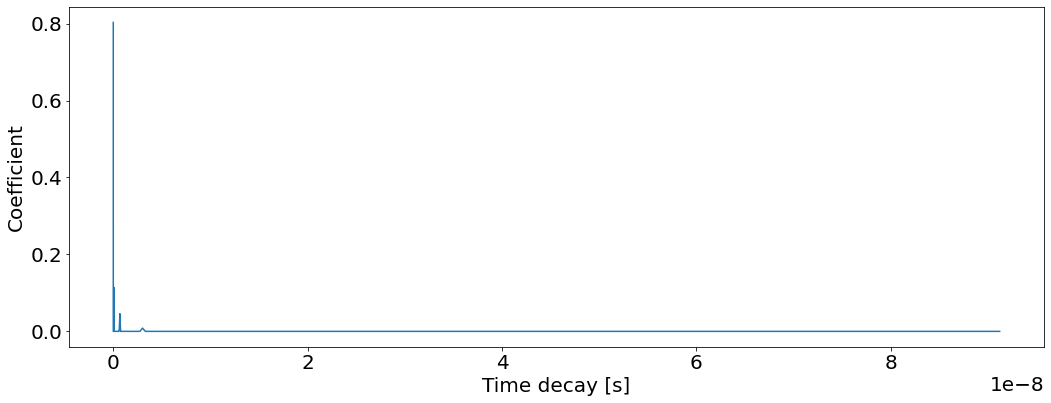

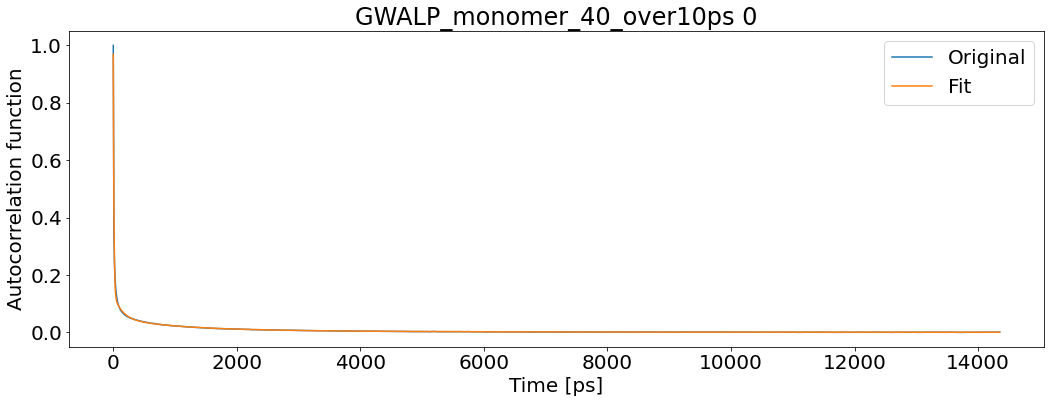

T1: 4.440075550179799 T2: 3.2668596406009565 NOE: -1.247520197541605


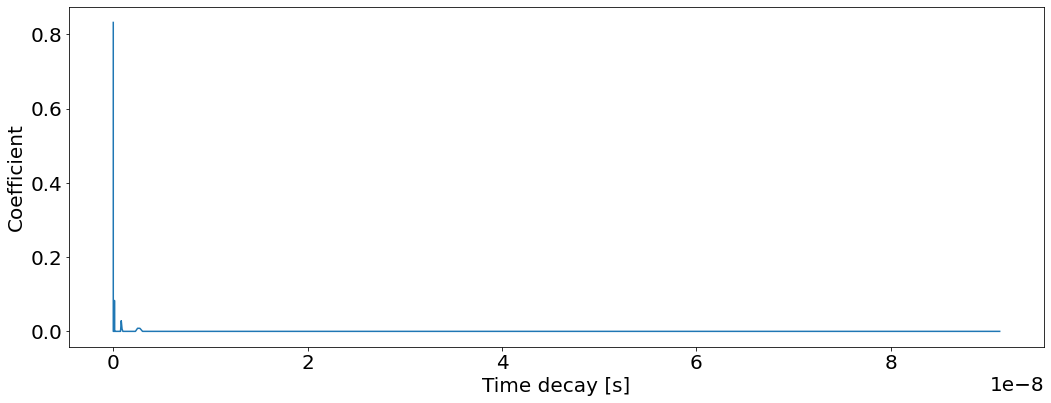

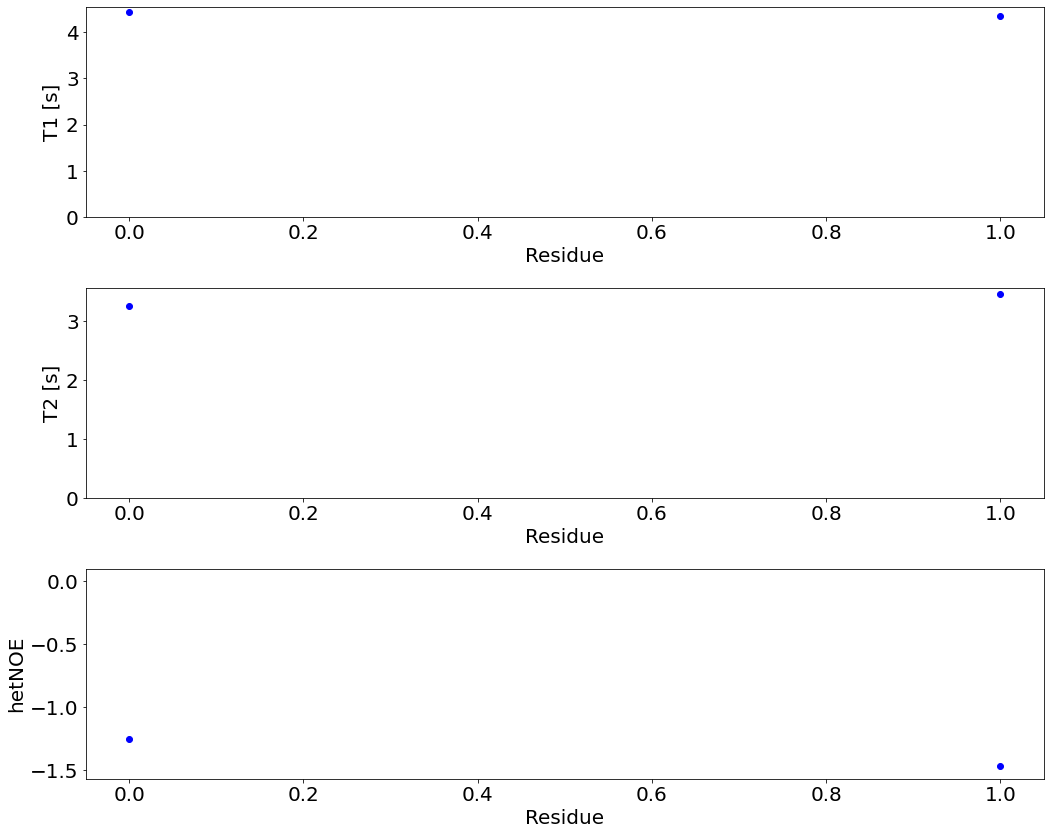

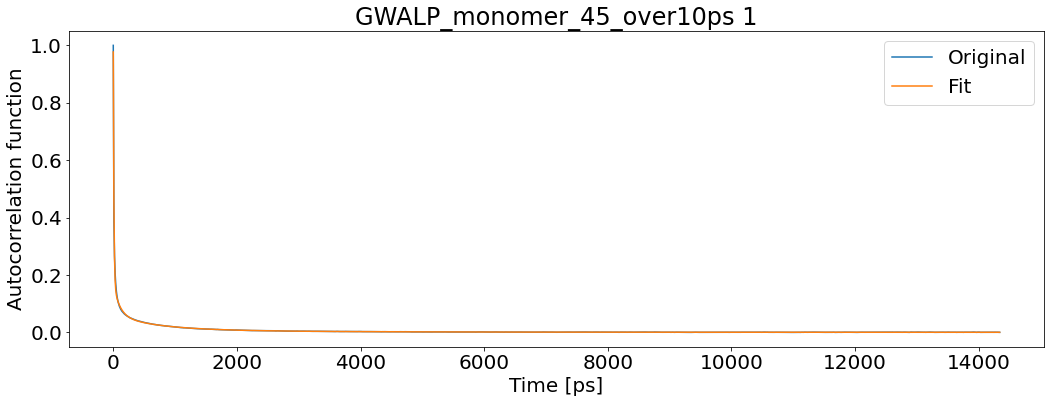

T1: 4.285732169881636 T2: 3.128309323259323 NOE: -1.3963066759965397


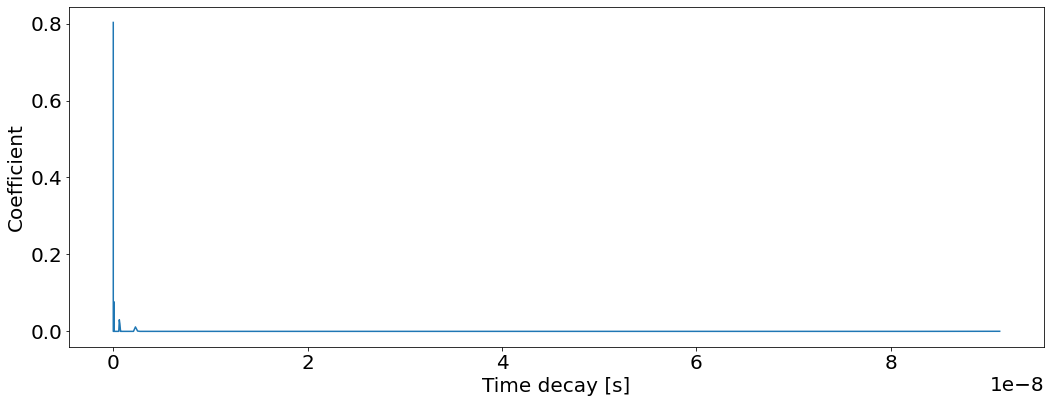

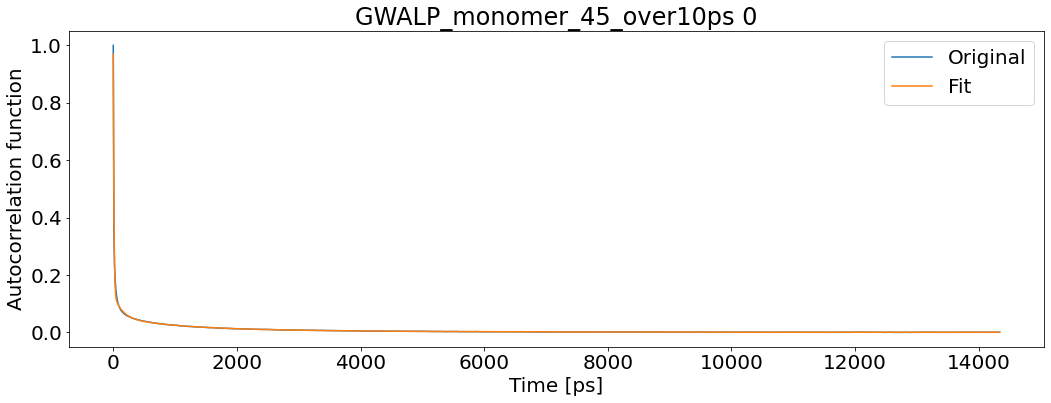

T1: 4.349471145919845 T2: 3.0743944315428005 NOE: -1.1687963293522188


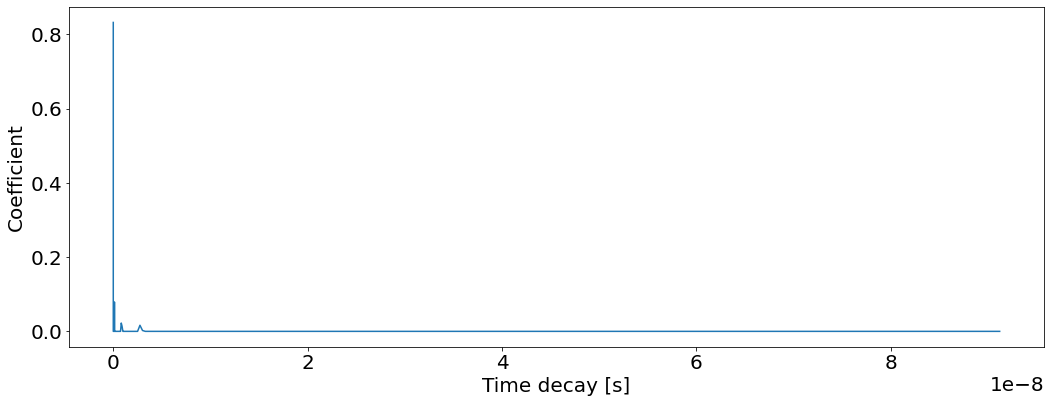

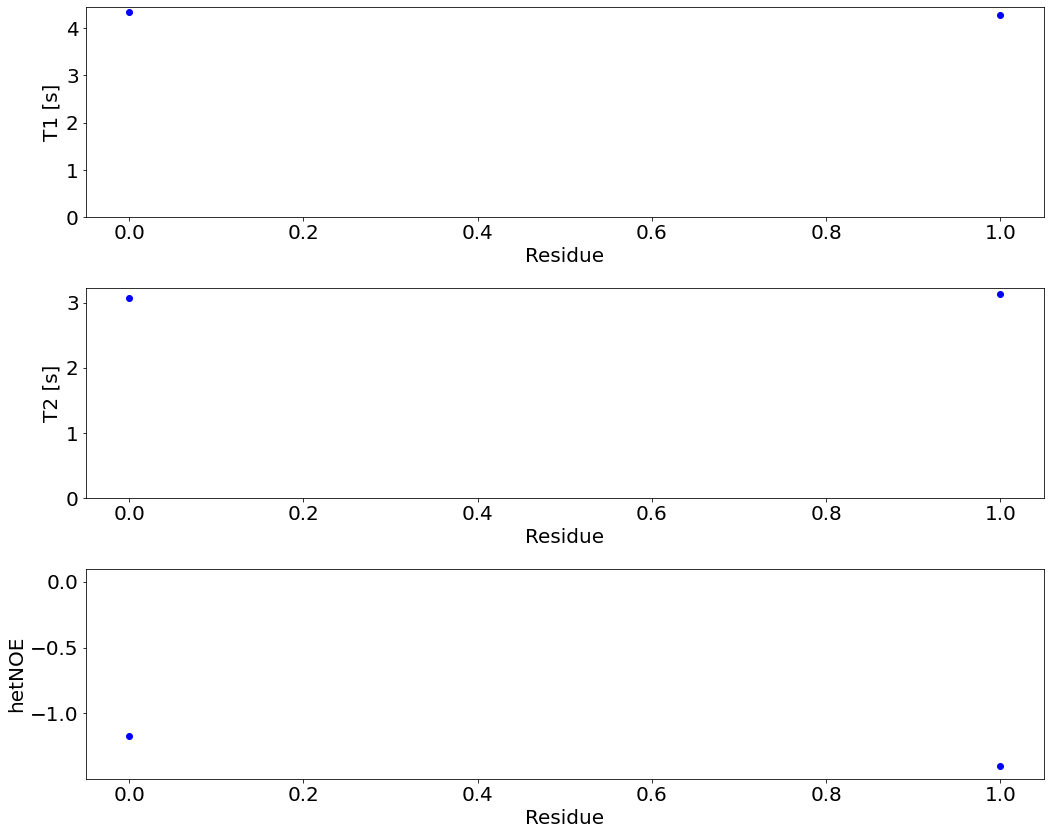

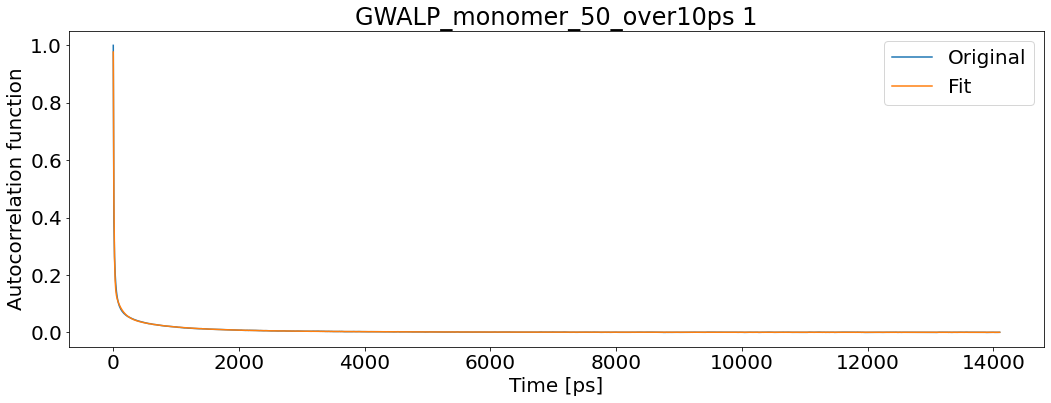

T1: 4.290259719026372 T2: 3.0872554553843785 NOE: -1.403046556551688


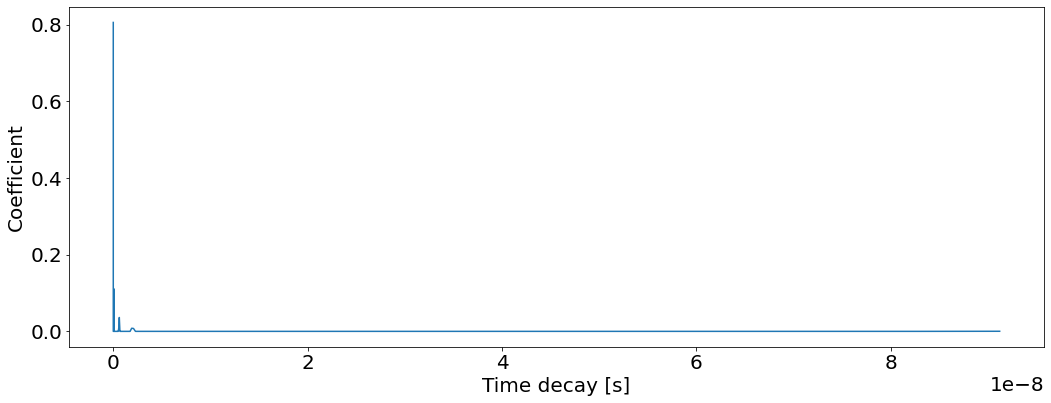

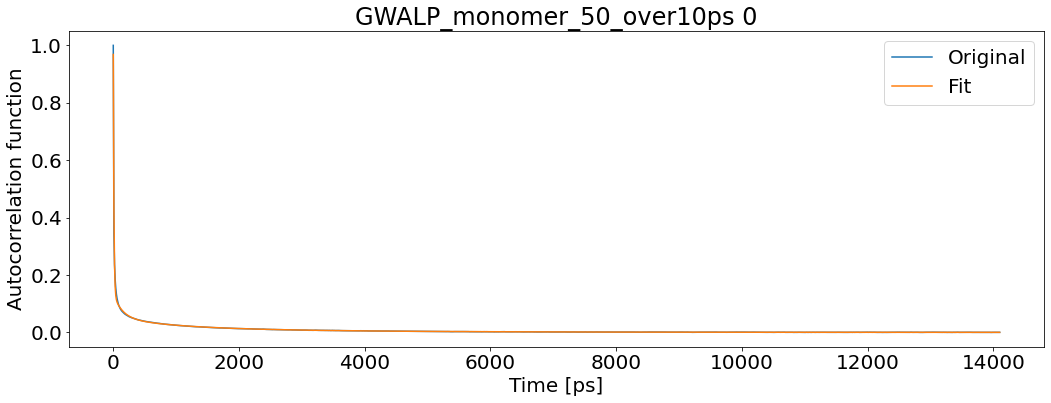

T1: 4.331942866187266 T2: 2.805724591304898 NOE: -1.16196879439849


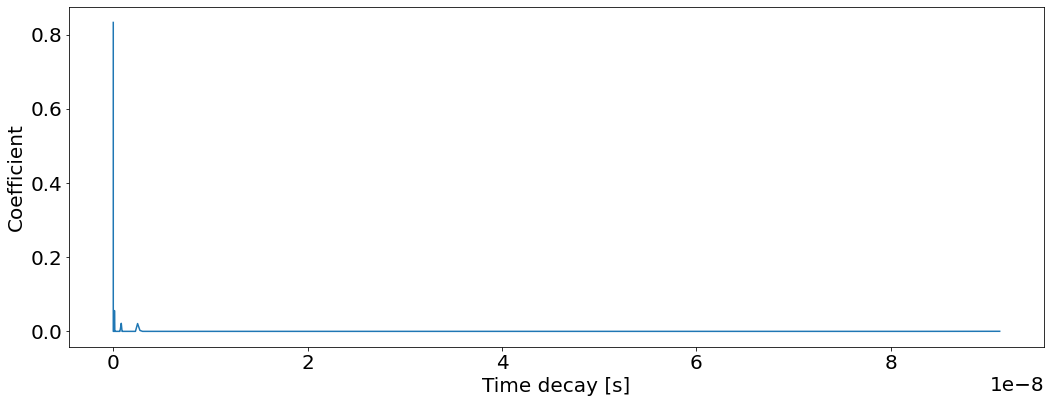

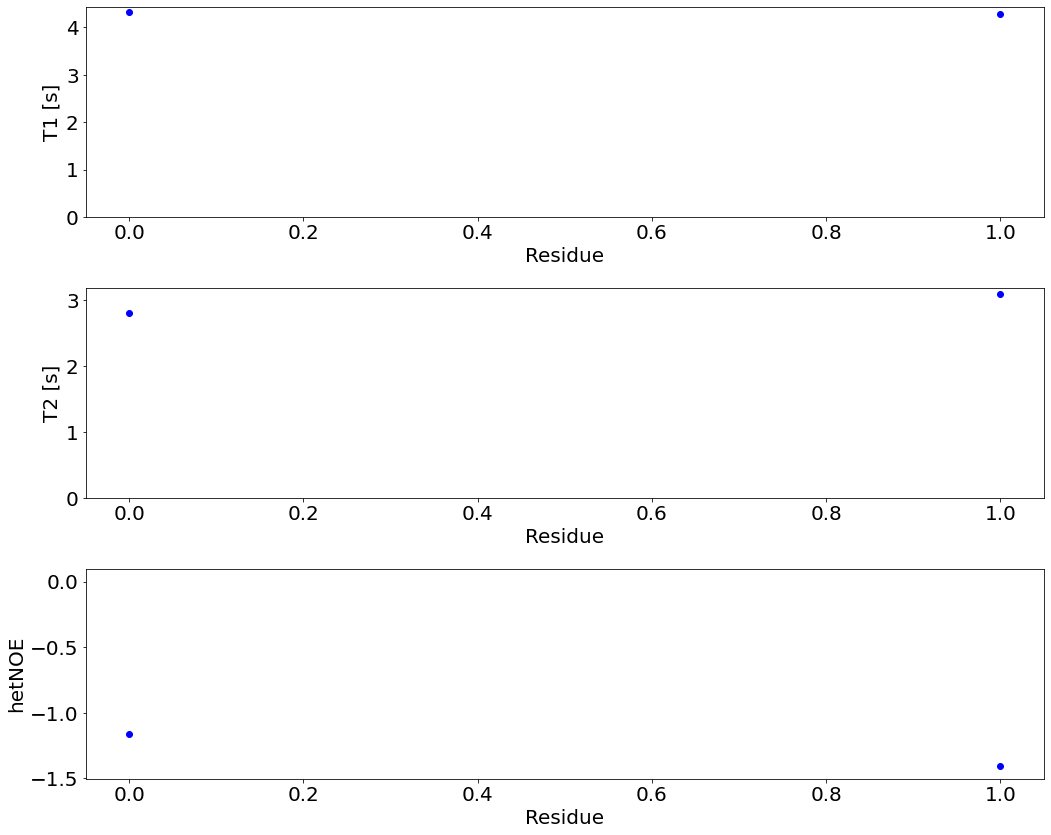

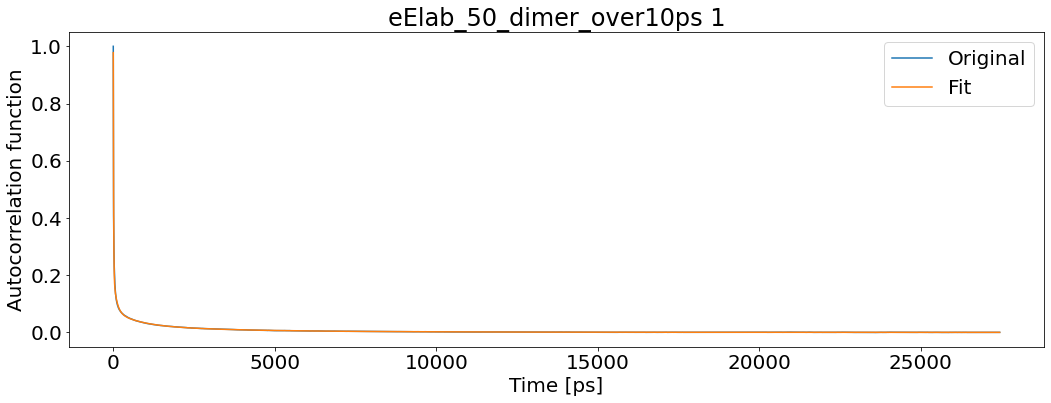

T1: 3.6879133201959737 T2: 2.15735846521035 NOE: -1.1399356225721338


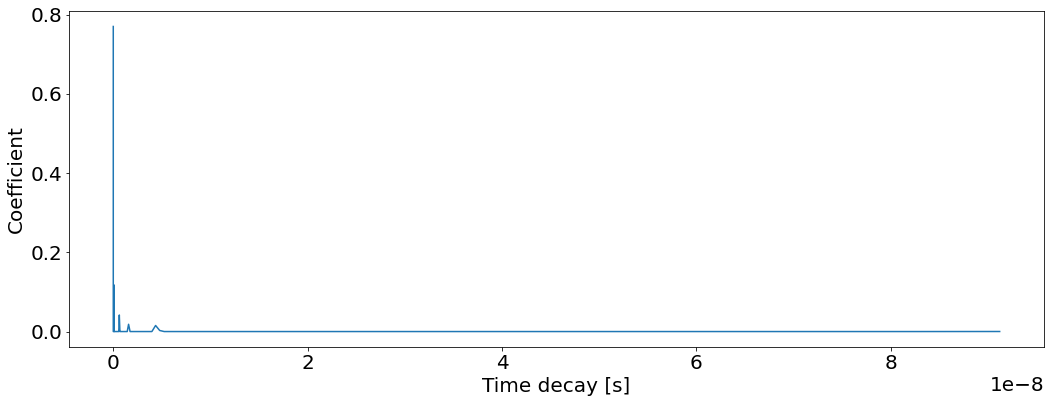

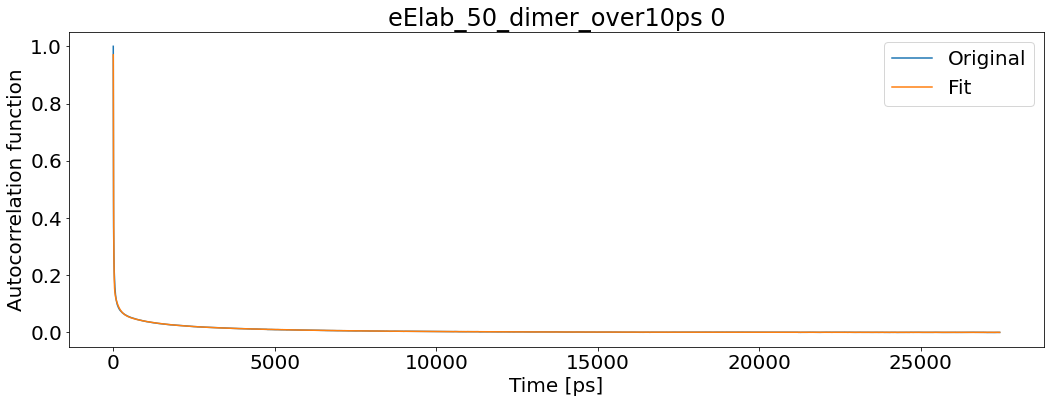

T1: 3.8155933356925744 T2: 1.982241148064474 NOE: -1.0124895204890425


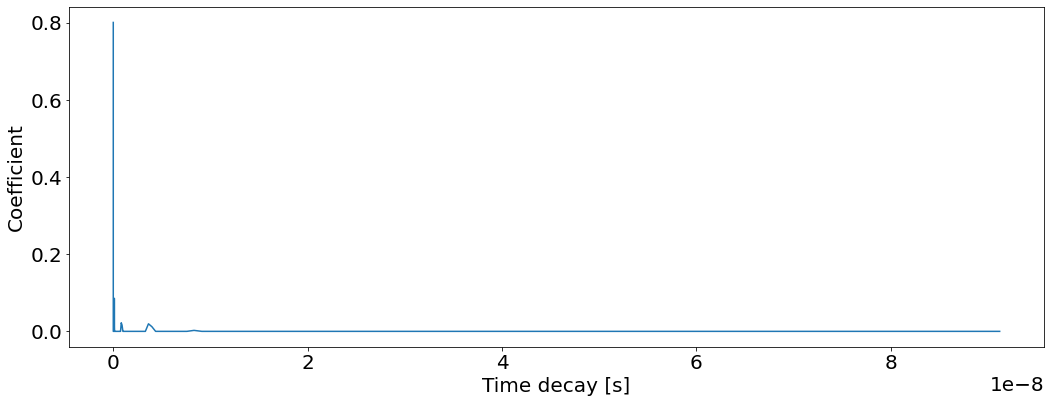

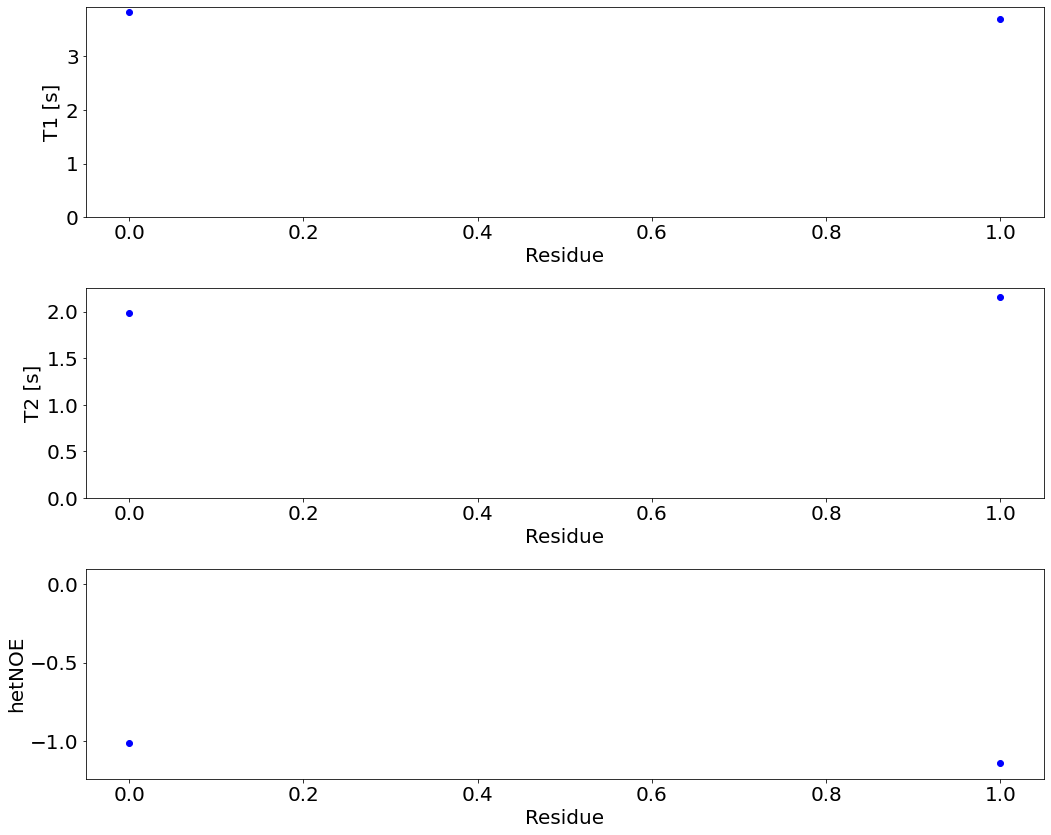

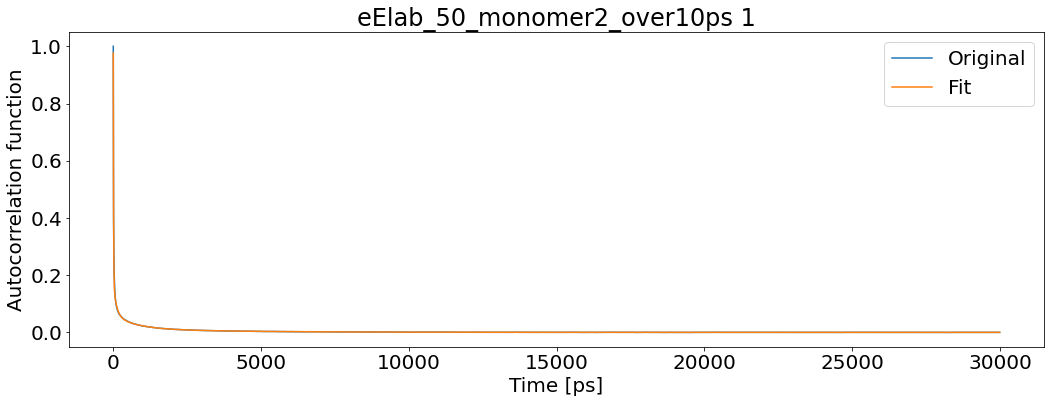

T1: 4.194065042232232 T2: 2.8237315785100217 NOE: -1.3498979714522474


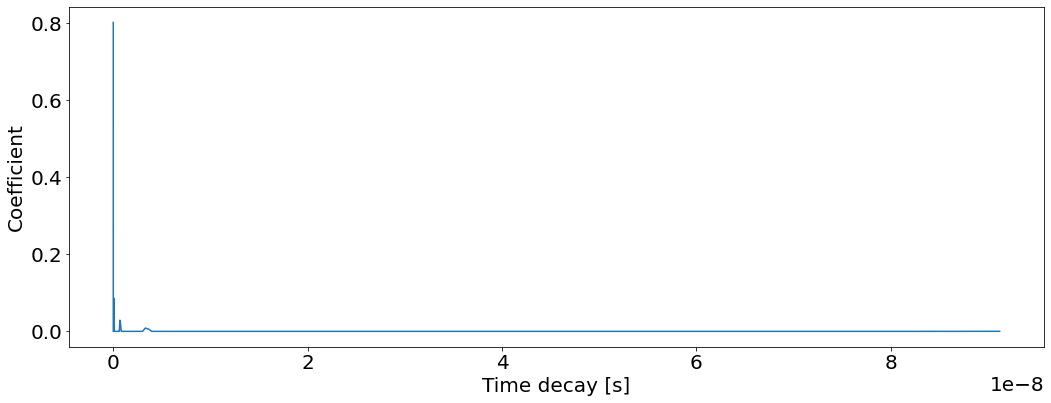

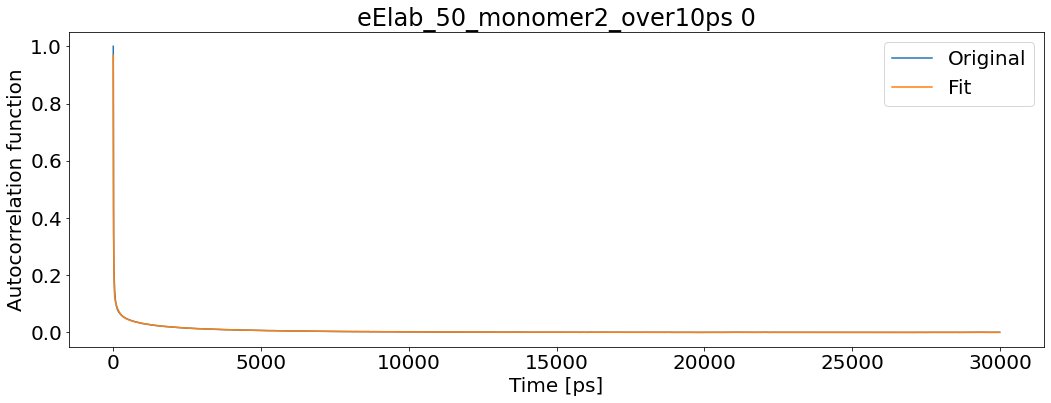

T1: 4.16314312013791 T2: 2.277324488777112 NOE: -1.0879570264862473


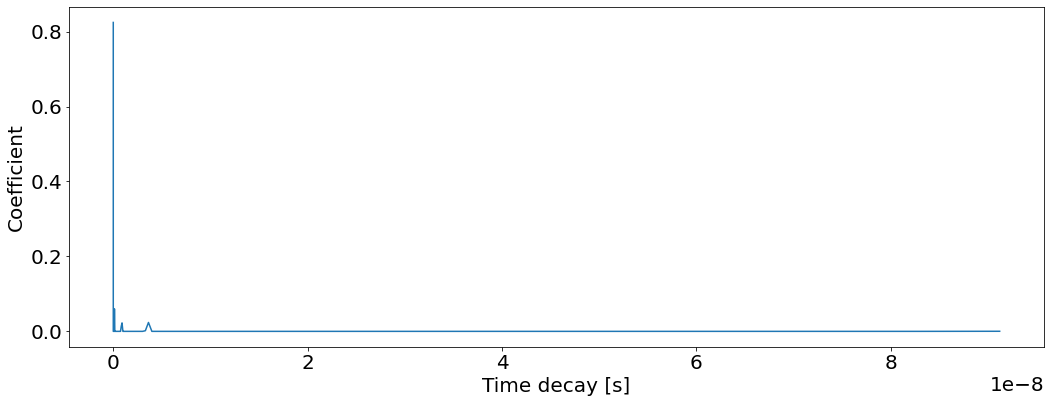

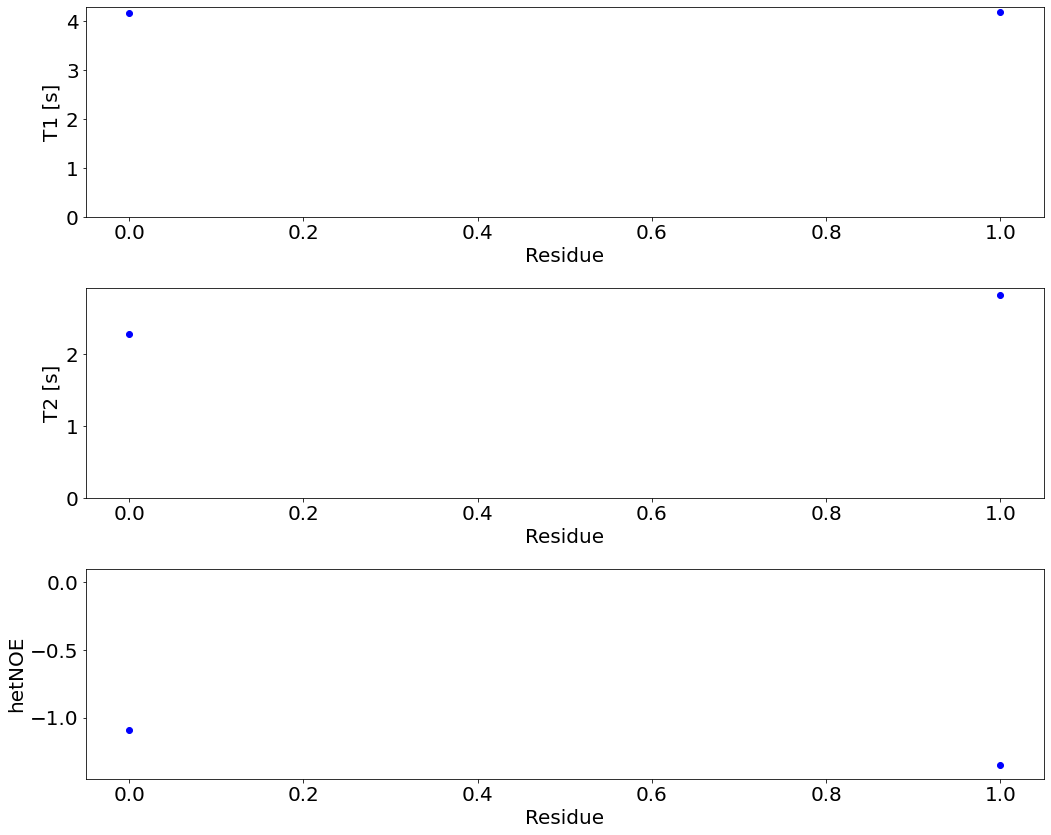

In [80]:
### New analysis, only times over 10 ps

OP=0 # order parameter
smallest_corr_time=1 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/50 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
#magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
magn_field_MHz=850 # for values in MHz
magnetic_field=magn_field_MHz*2*np.pi/gammaH*10**6
nuclei="15N" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen curl


systems=["hMff_40SDS_replica1","hMff_40SDS_replica2","hMff_40SDS_replica3",
        "hMff_45SDS_replica1","hMff_45SDS_replica2","hMff_45SDS_replica3",
        "hMff_50SDS_replica1","hMff_50SDS_replica2","hMff_50SDS_replica3",
        "hMff_60SDS_replica1","hMff_60SDS_replica2","hMff_60SDS_replica3",
        "GWALP_dimer_40SDS","GWALP_dimer_45SDS","GWALP_dimer_50SDS",
        "GWALP_dimer_60SDS","GWALP_dimer_70SDS","GWALP_monomer_40",
        "GWALP_monomer_45","GWALP_monomer_50","eElab_50_dimer",
        "eElab_50_monomer2"]

relaxations={}

for system in systems:
    folder_path="new_analysis/"+system+"/"
    output_name=system+"_over10ps"
    yaml_output=output_path+output_name+".yaml"
    relaxations[system]=rt.analyze_all_in_folder(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,folder_path,nuclei,output_name)
    rt.plot_T1_T2_noe(relaxations[system],yaml_output,"pic.png")



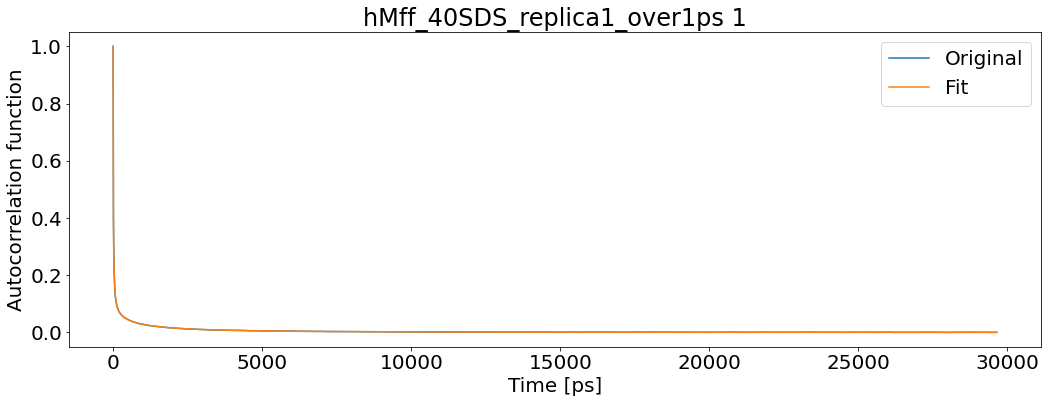

T1: 3.9175250349056063 T2: 2.5025739911887652 NOE: -1.208453668307107


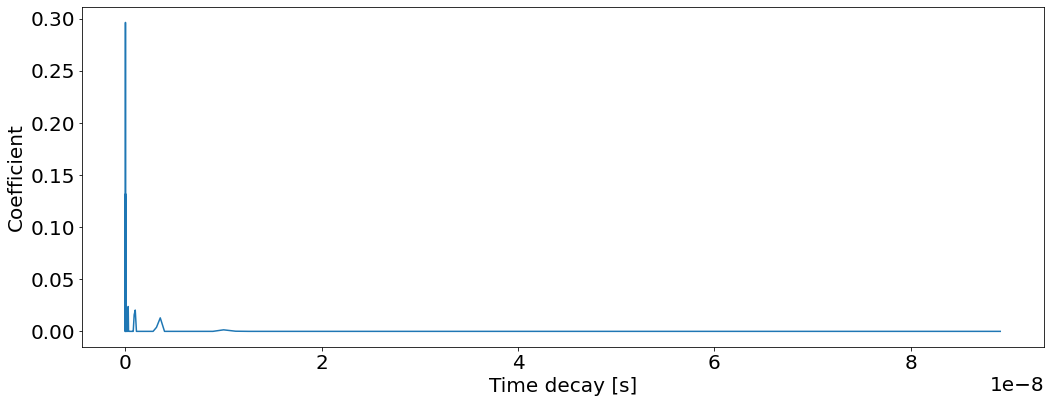

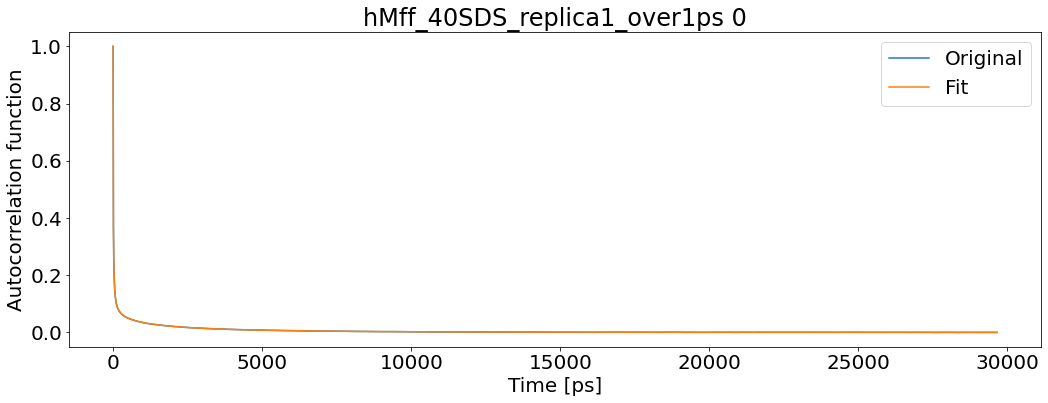

T1: 4.000414894971568 T2: 2.1764053860518144 NOE: -0.9906066319778986


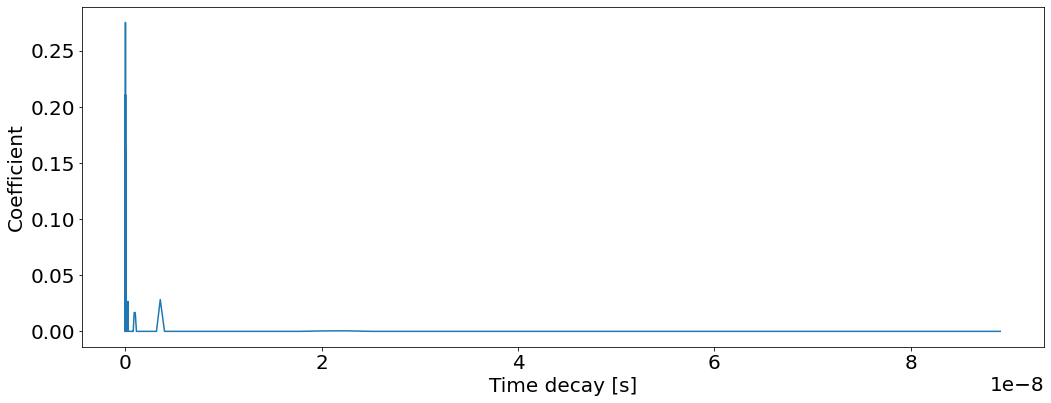

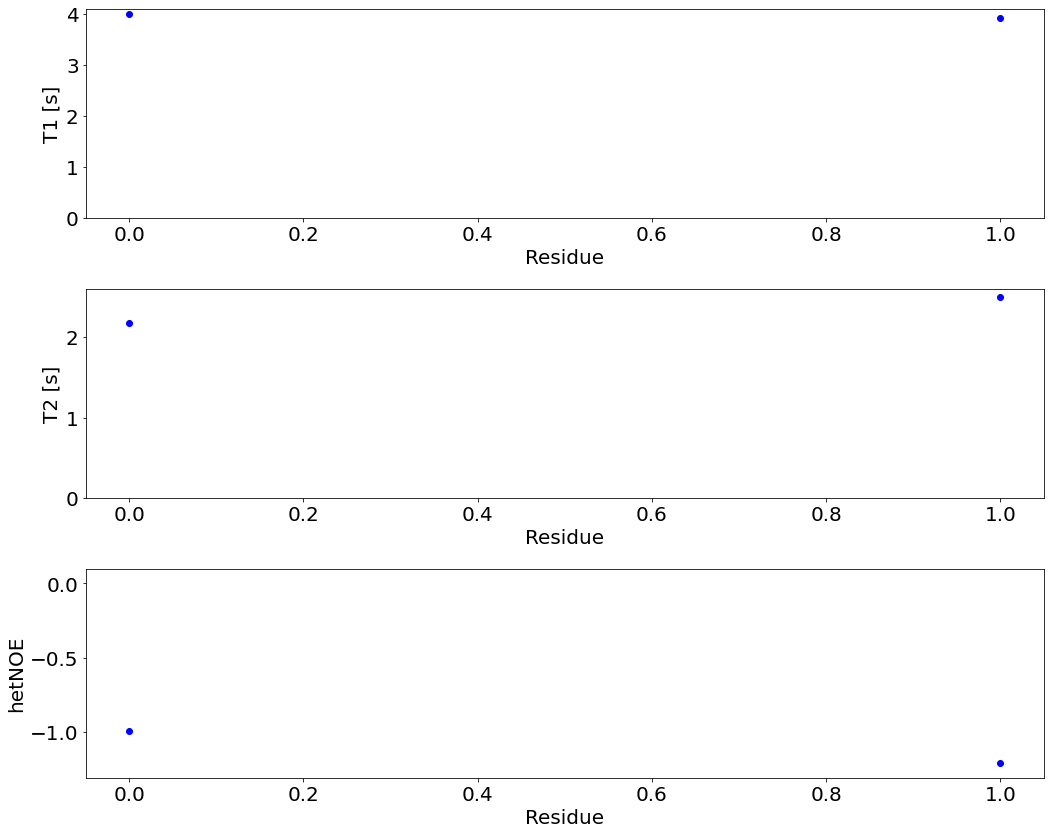

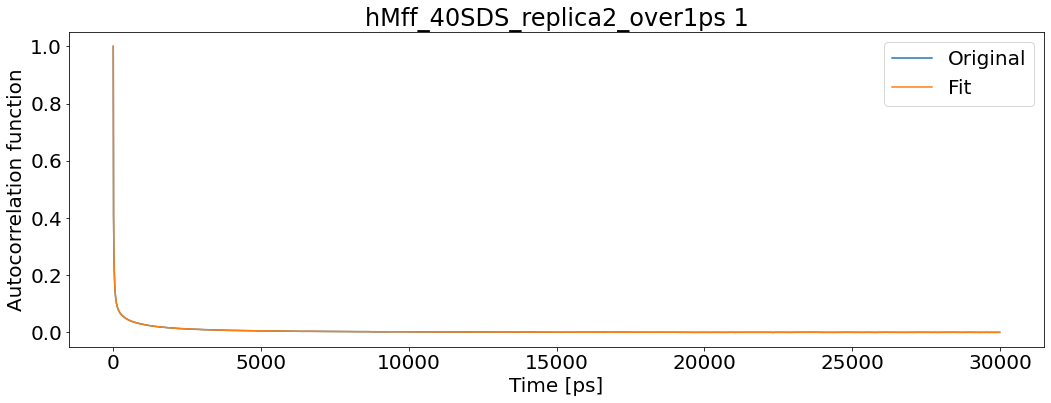

T1: 3.928960187269574 T2: 2.4682957575340465 NOE: -1.1858860895285095


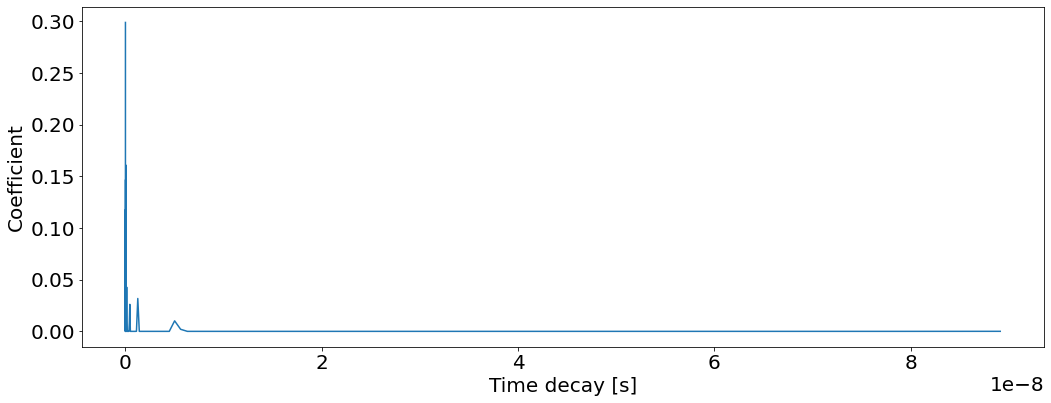

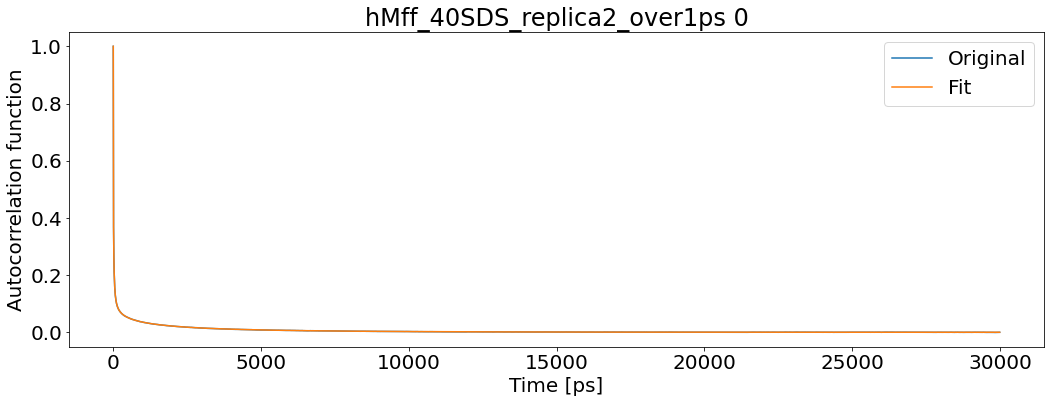

T1: 3.9510065189106904 T2: 2.133125164108105 NOE: -0.974113103790609


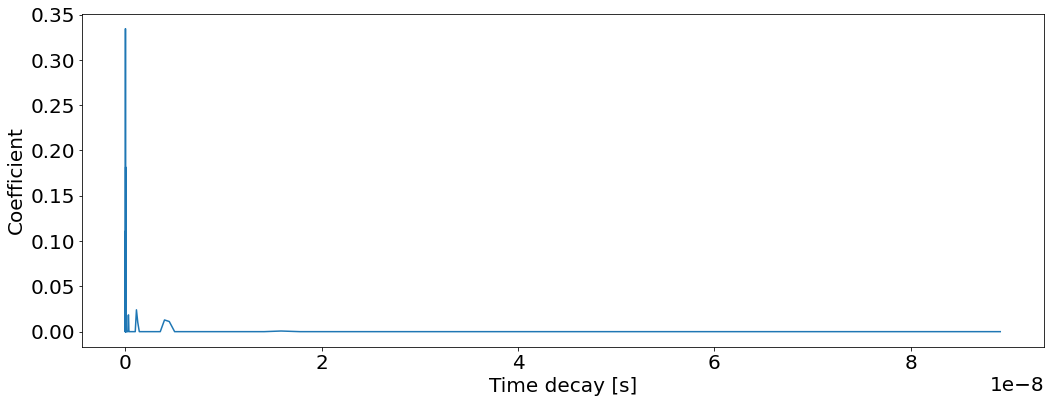

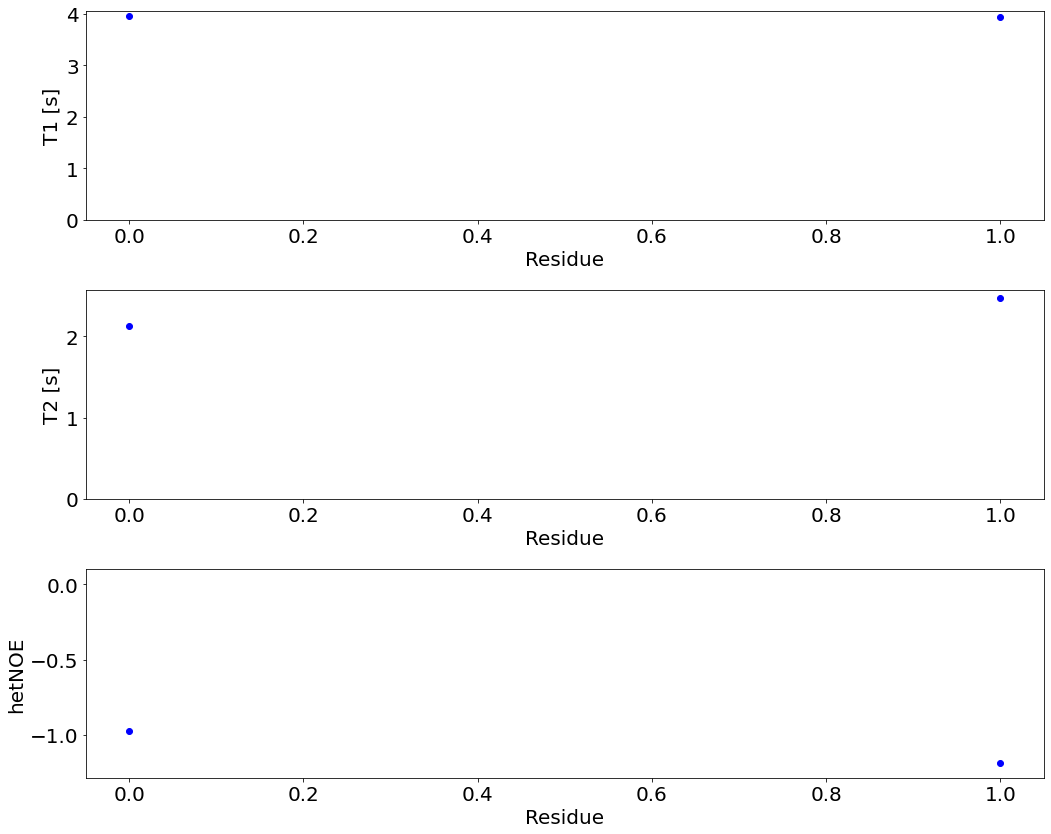

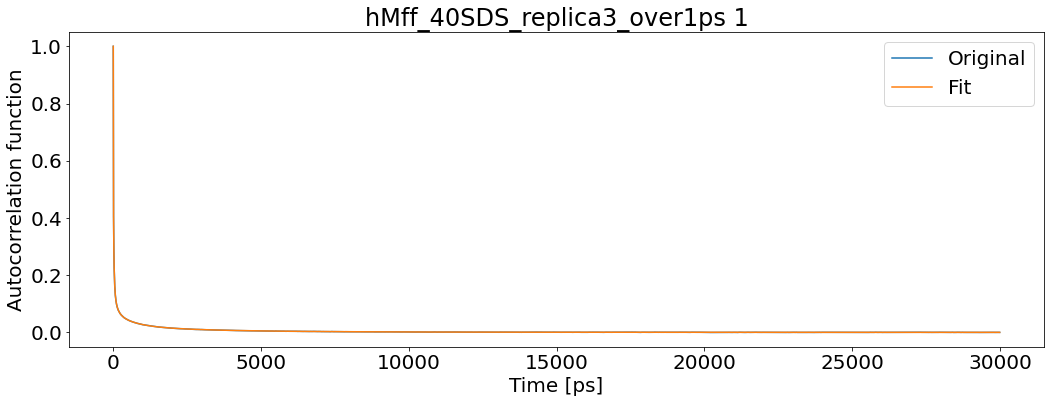

T1: 3.980883084052936 T2: 2.5592516475054237 NOE: -1.2309907499628925


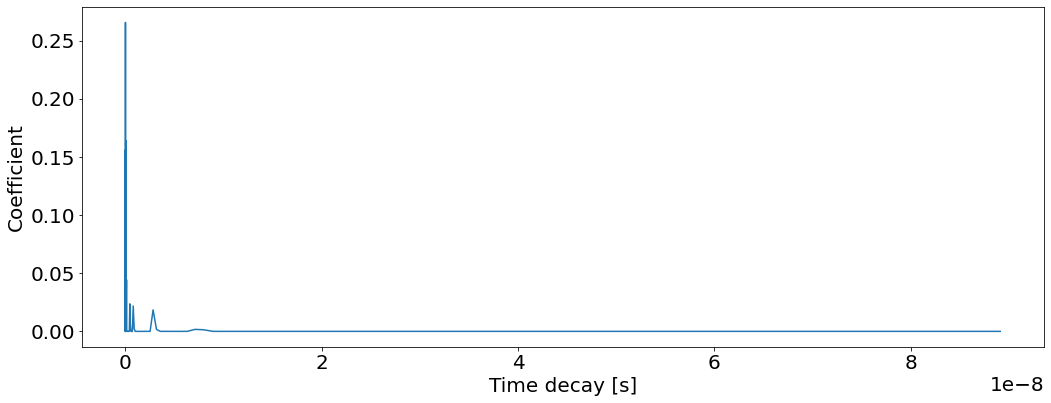

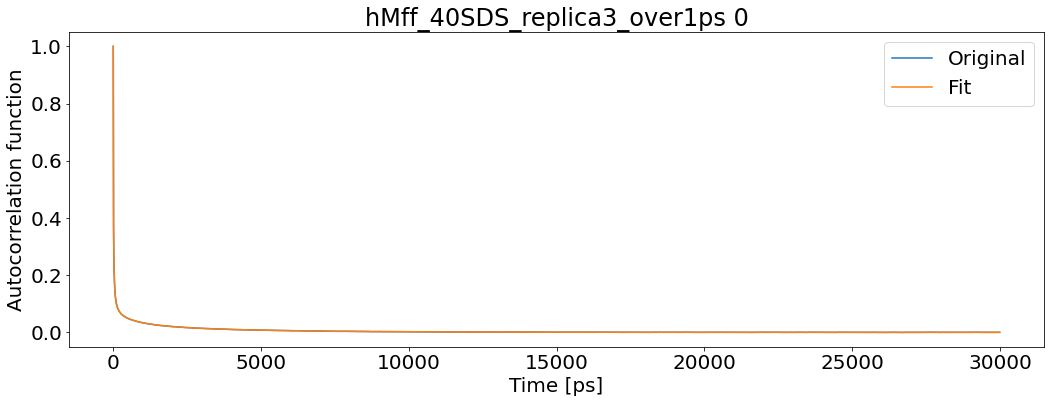

T1: 4.065612948337008 T2: 2.159530018185591 NOE: -1.0256013138723703


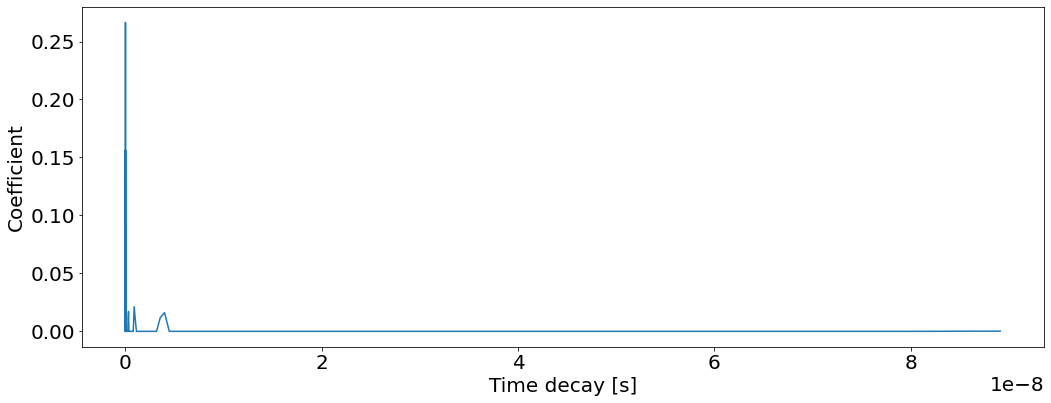

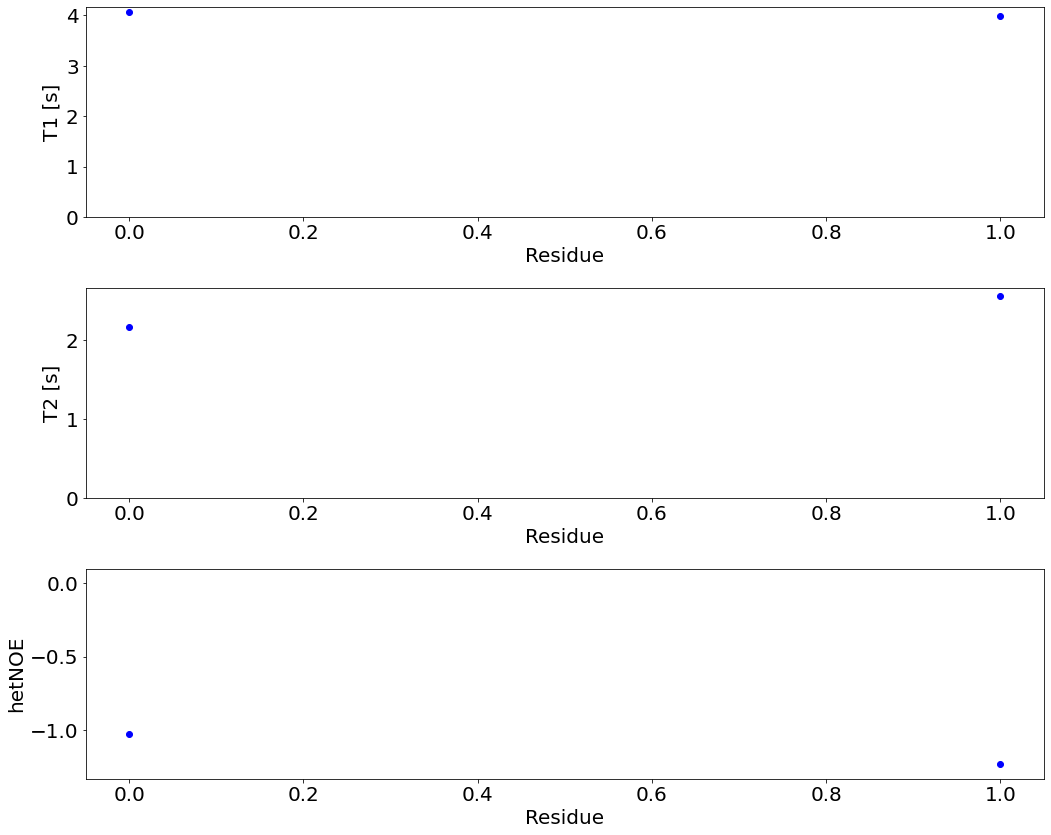

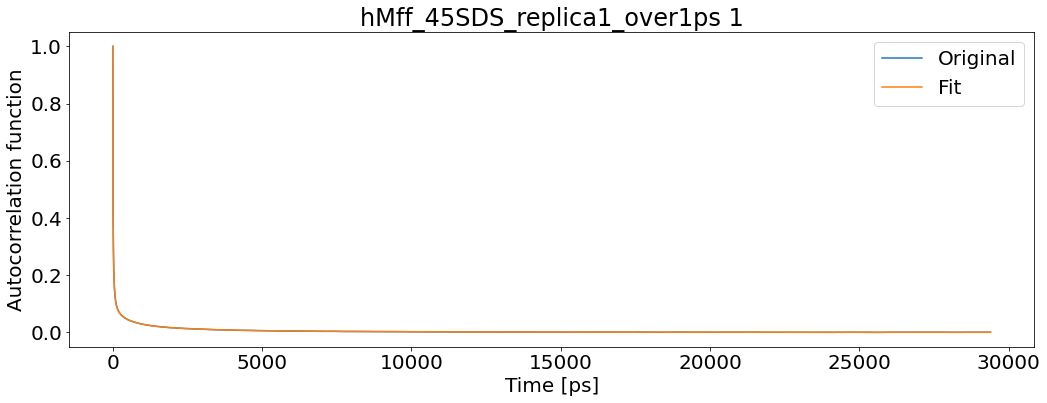

T1: 4.020354664676266 T2: 2.4858707554526385 NOE: -1.1896855100359978


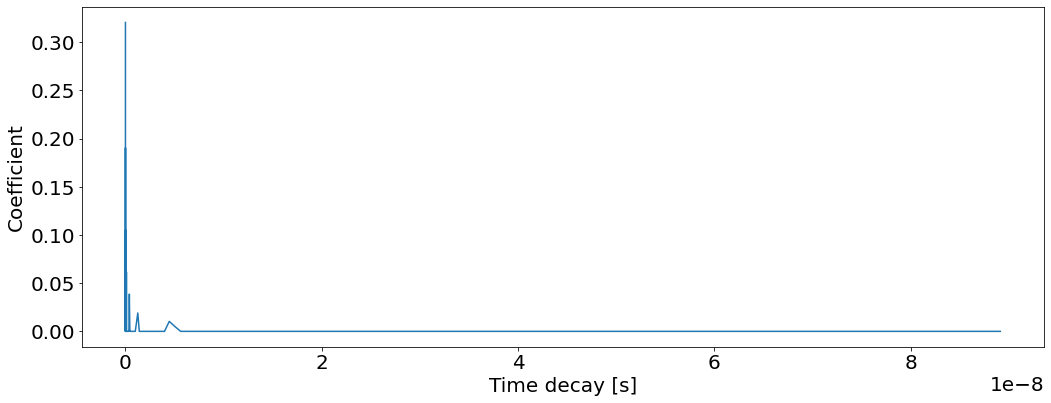

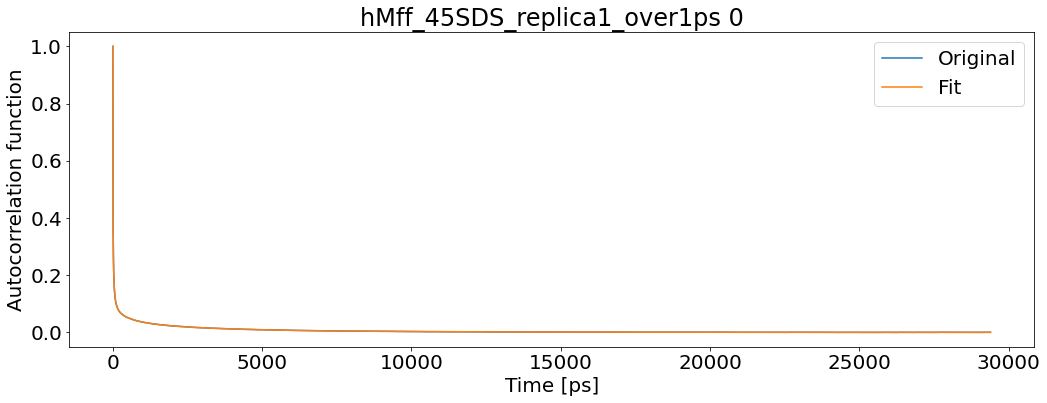

T1: 4.056054279650192 T2: 2.1131526008816413 NOE: -0.9652970853890612


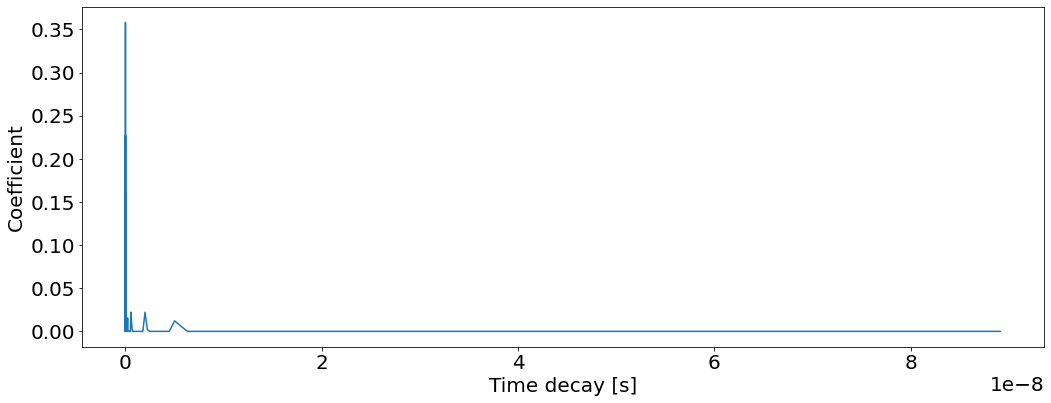

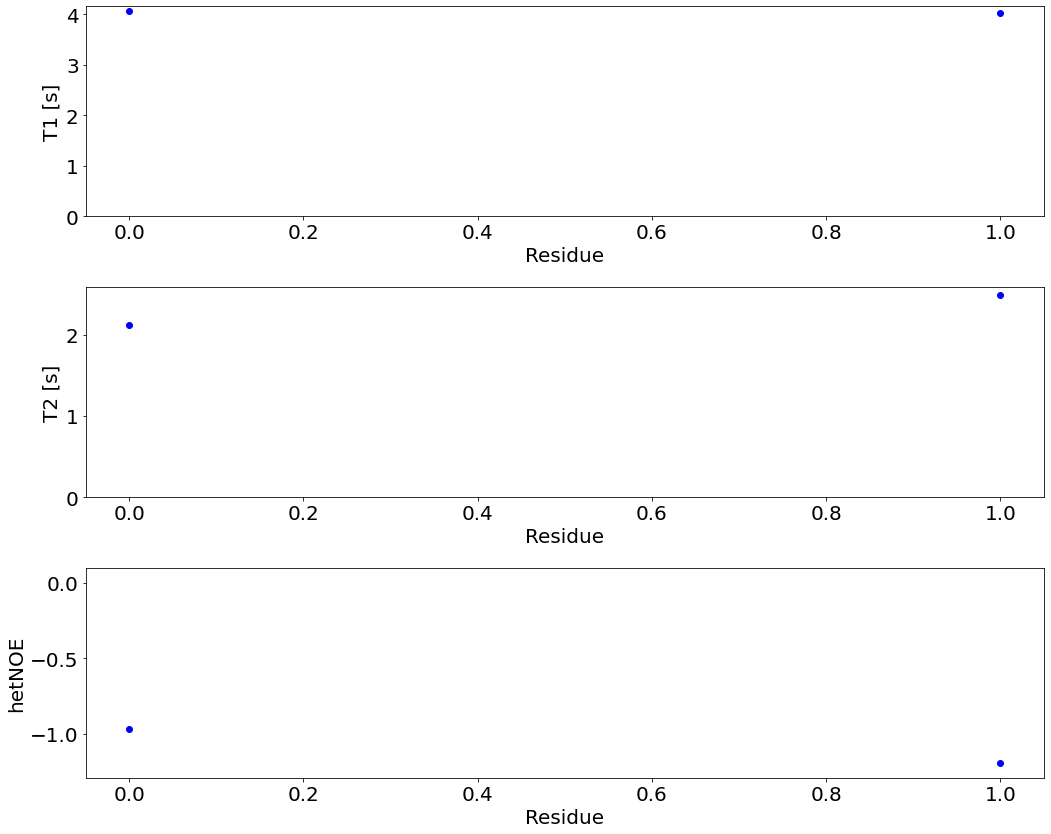

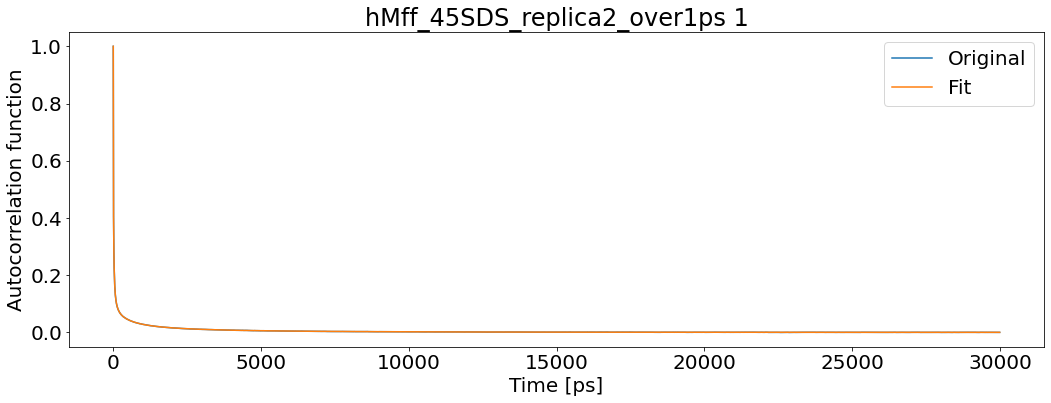

T1: 3.968535394680967 T2: 2.451148500573506 NOE: -1.2101608059404474


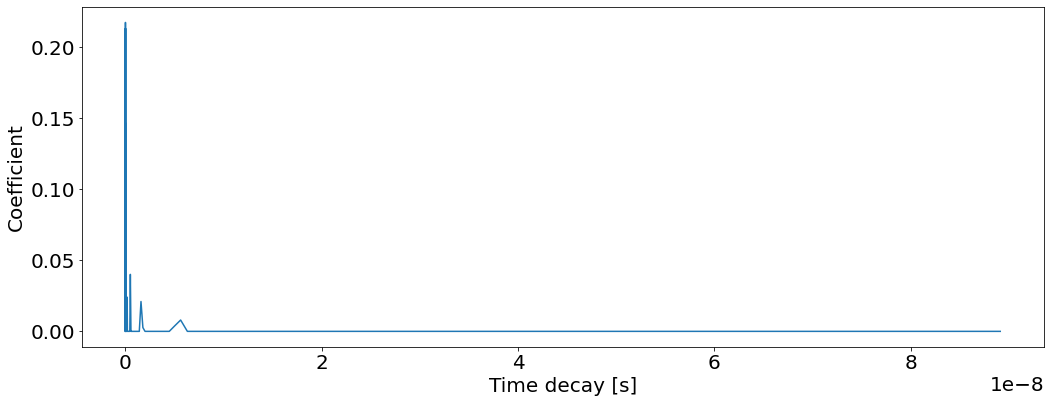

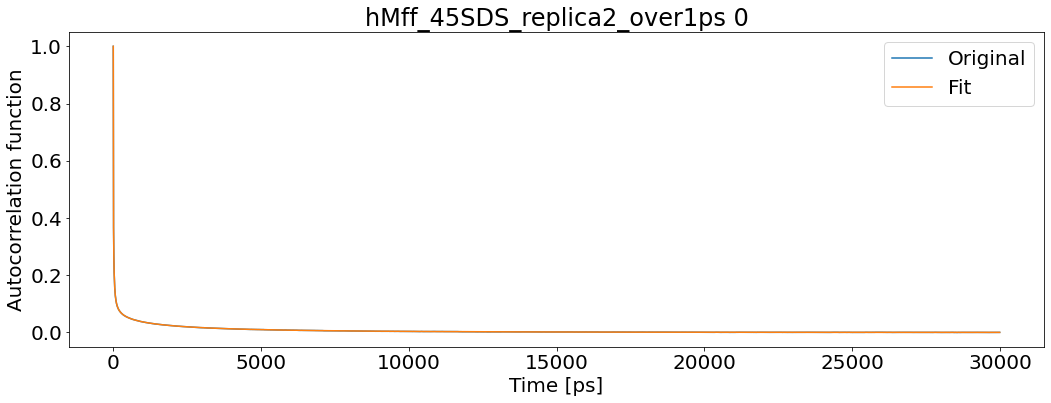

T1: 4.013100089948411 T2: 2.0136003513222307 NOE: -0.9839980166187263


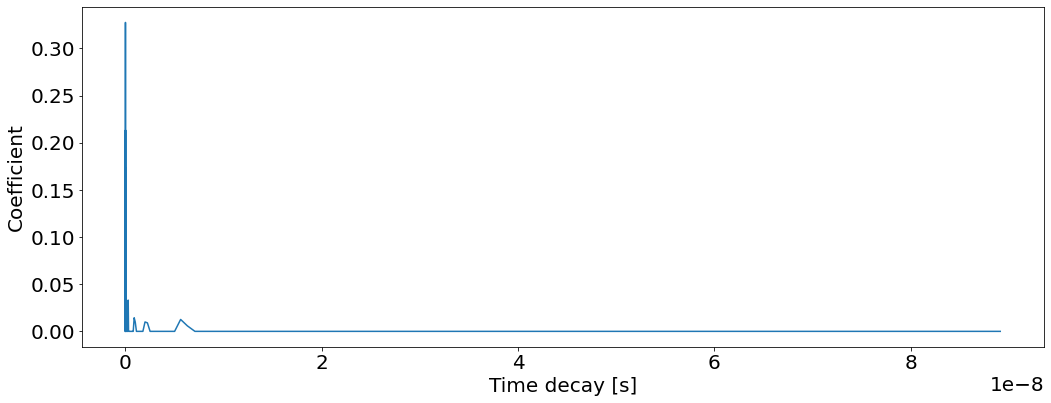

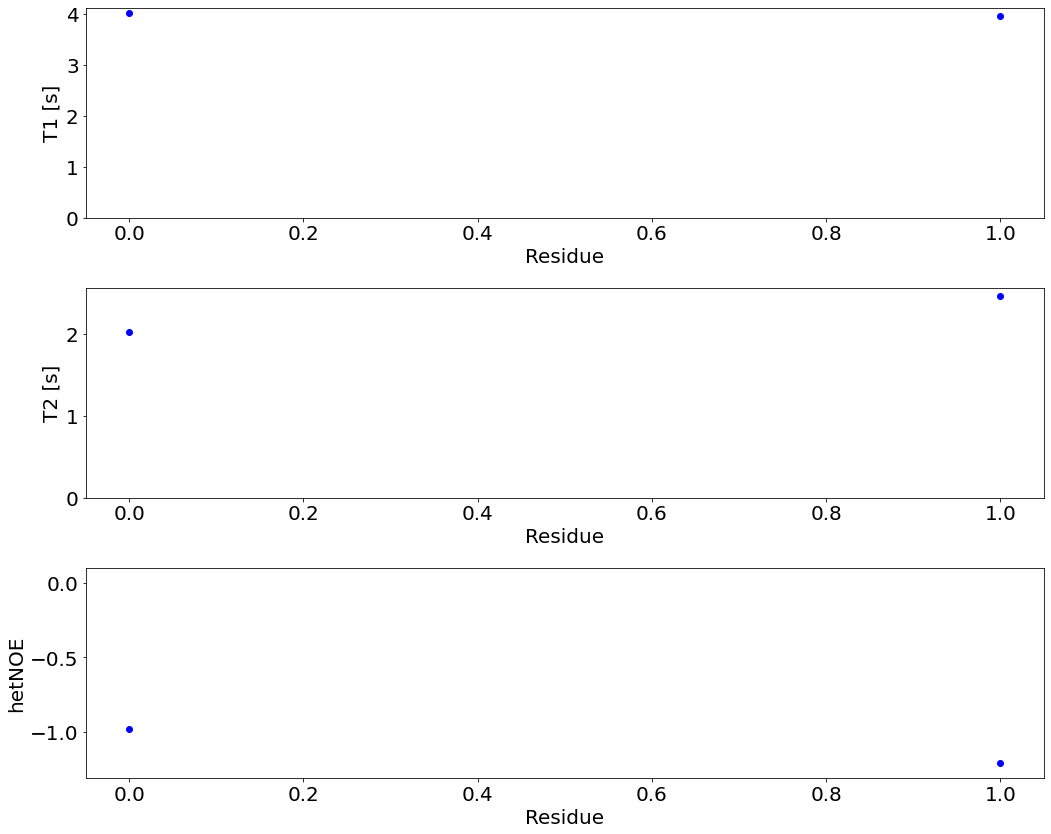

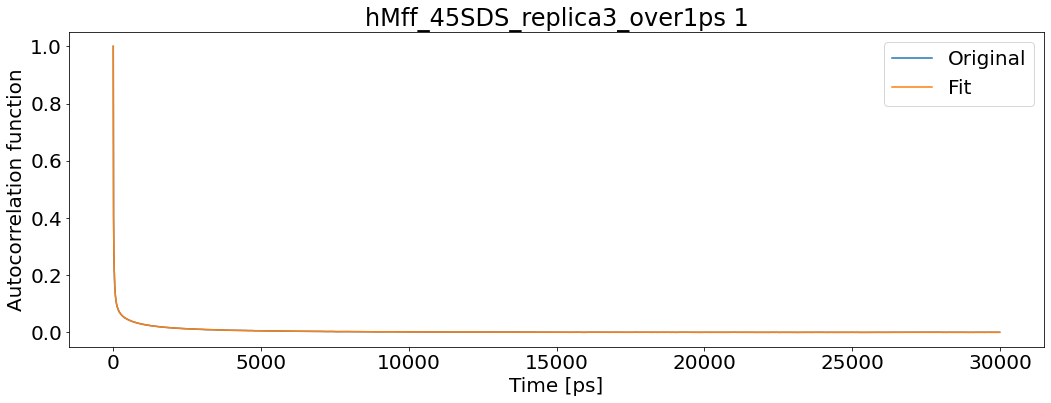

T1: 3.938541594795011 T2: 2.4816612831778295 NOE: -1.1986107948799662


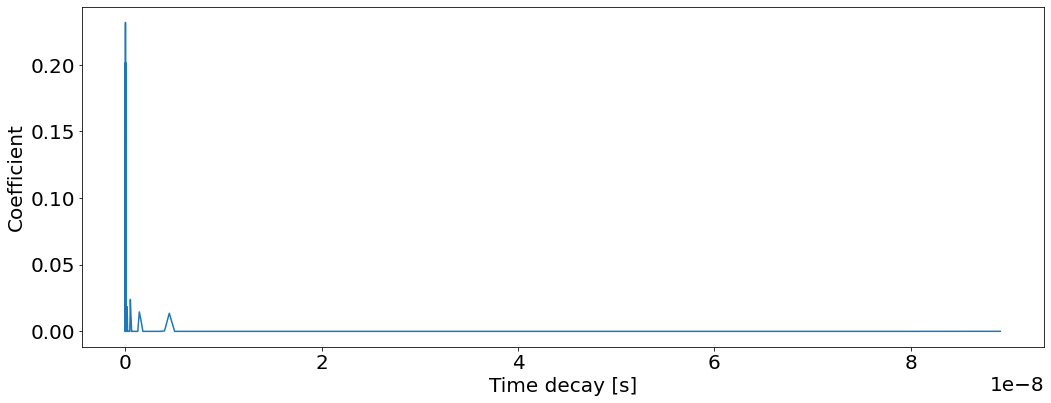

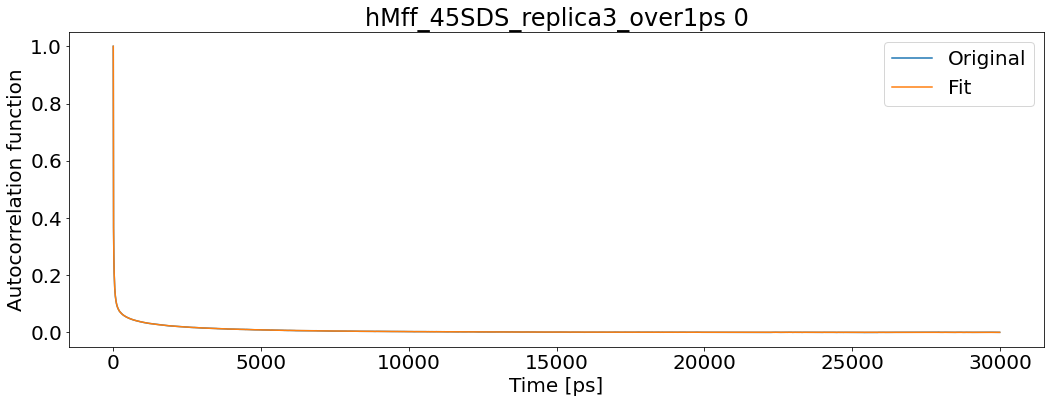

T1: 4.037066277093997 T2: 2.077375833560283 NOE: -0.9720080543654874


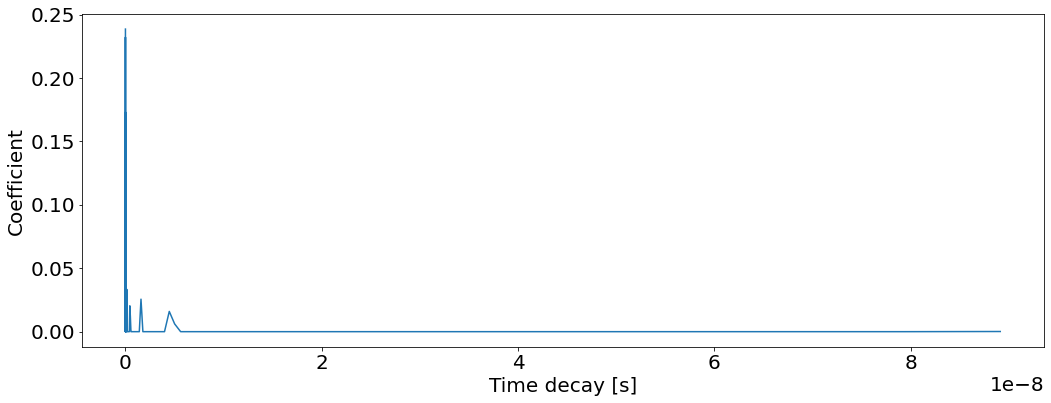

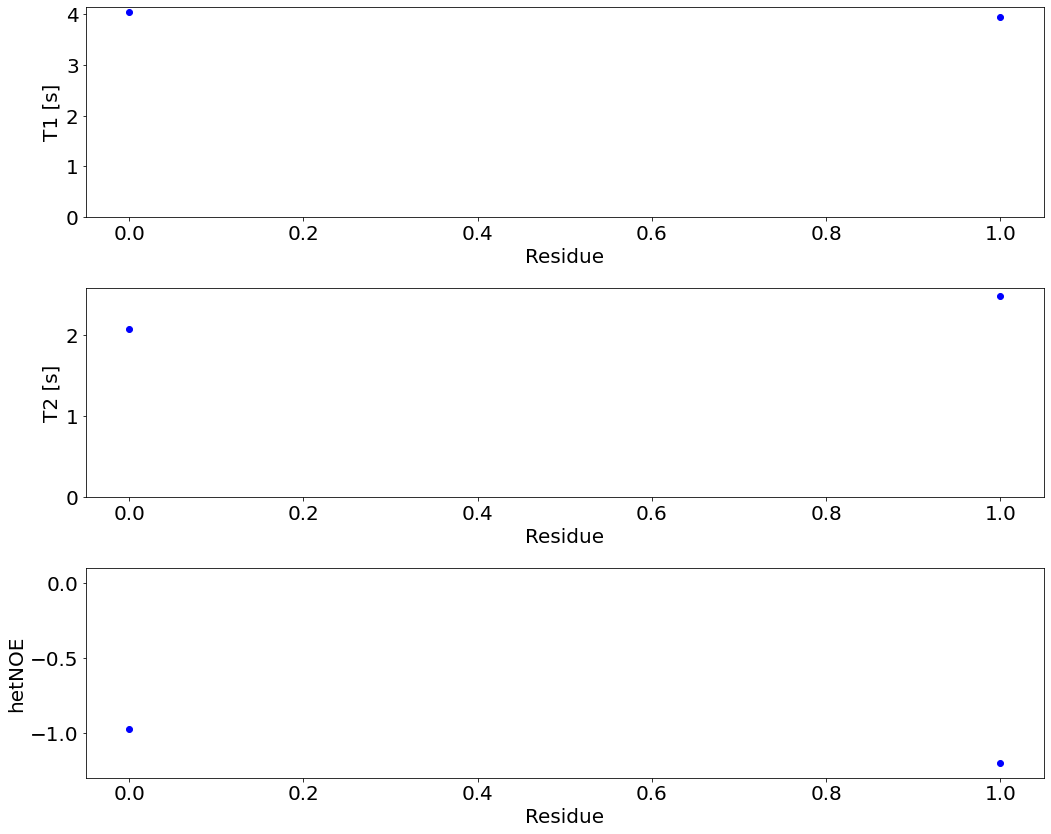

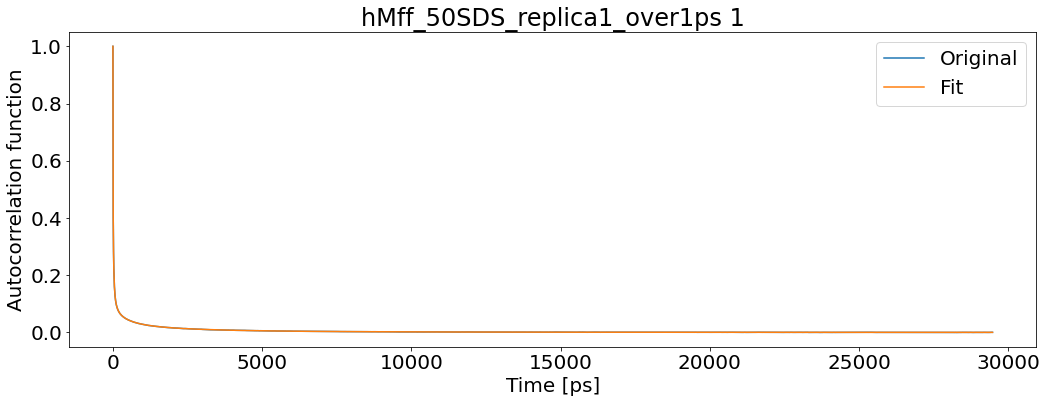

T1: 4.011375529713212 T2: 2.4818368341629333 NOE: -1.1750615477596877


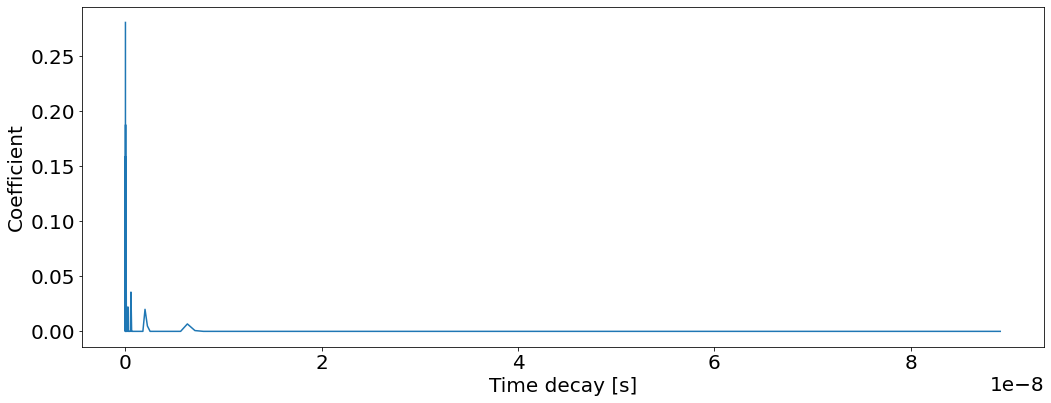

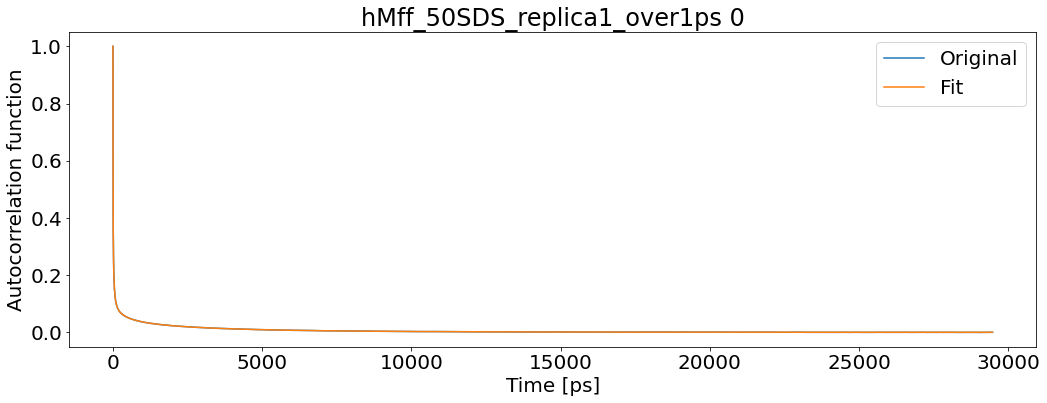

T1: 4.044960842631207 T2: 2.100262240683208 NOE: -0.9673008236644132


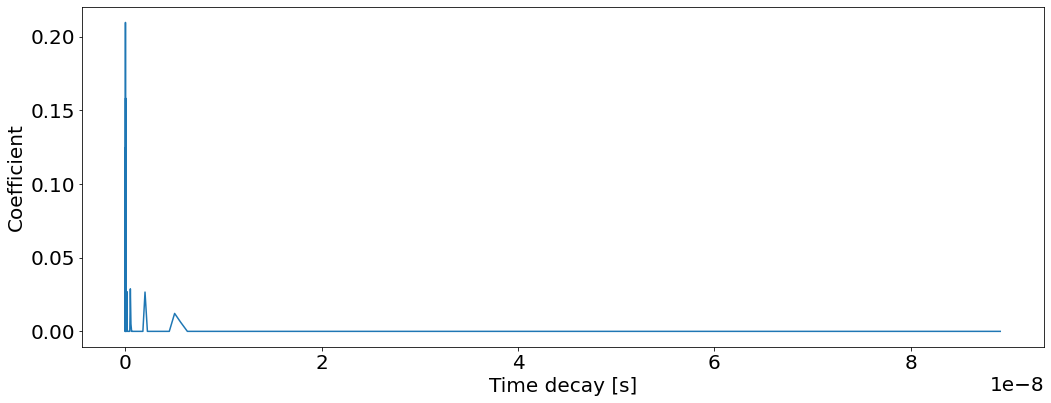

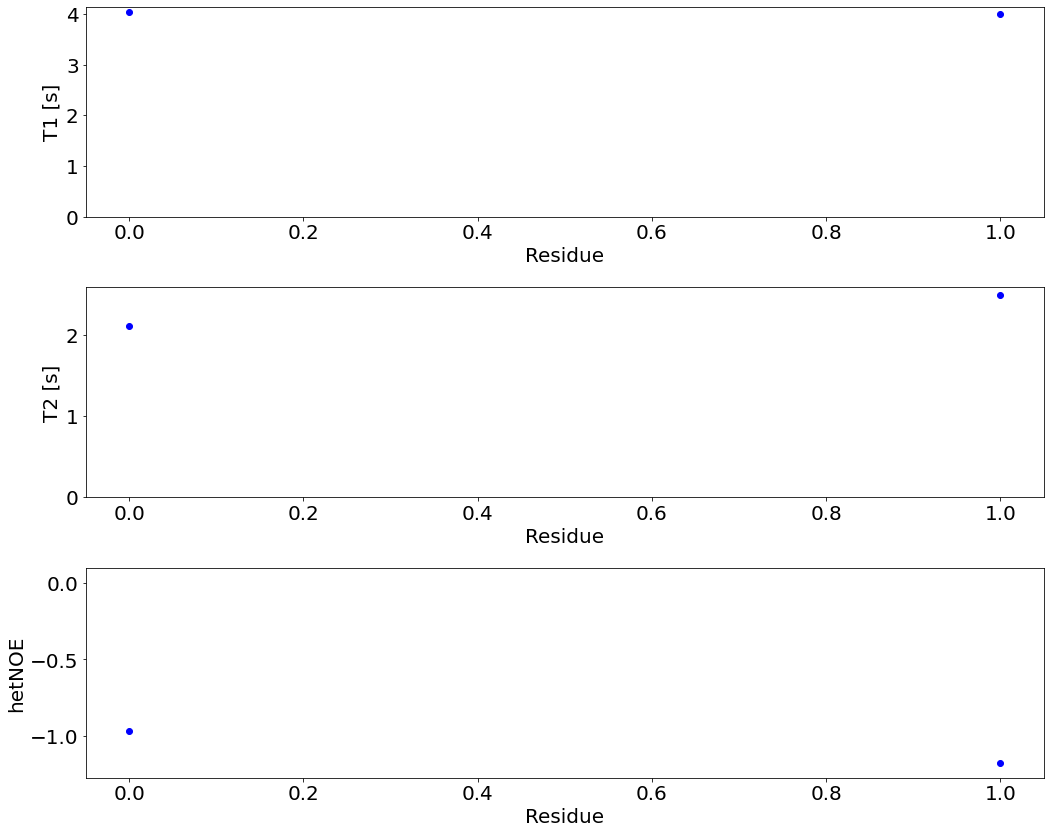

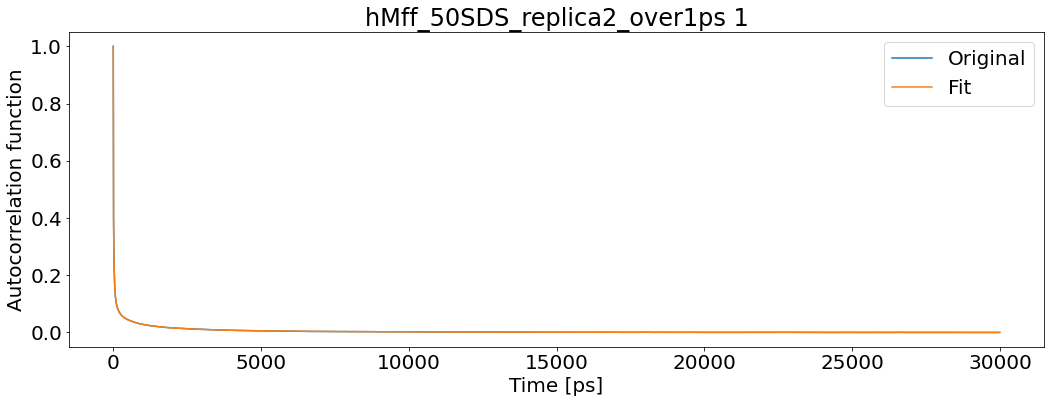

T1: 3.9961447834403896 T2: 2.4608558083229553 NOE: -1.1847494387893045


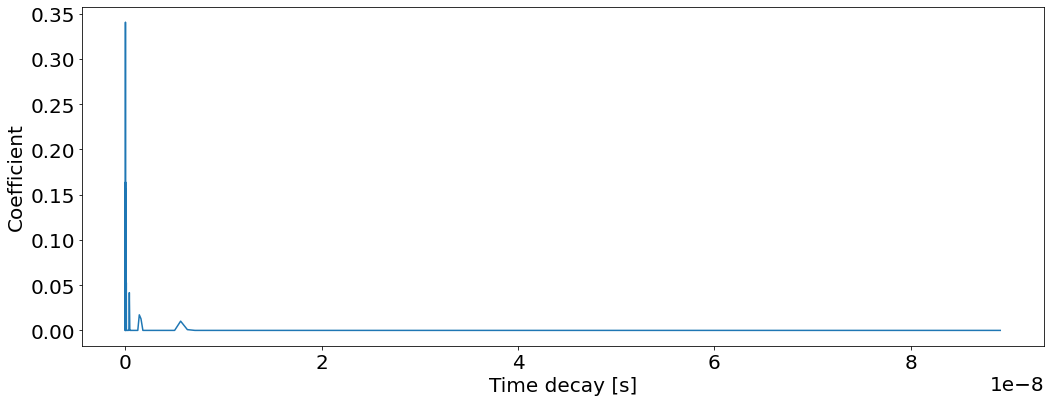

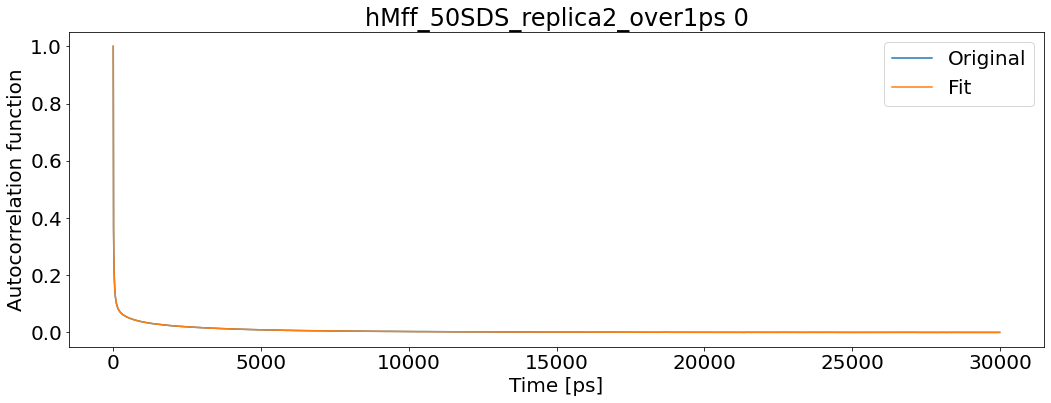

T1: 4.033040339065186 T2: 2.082813661425511 NOE: -0.9294933444249136


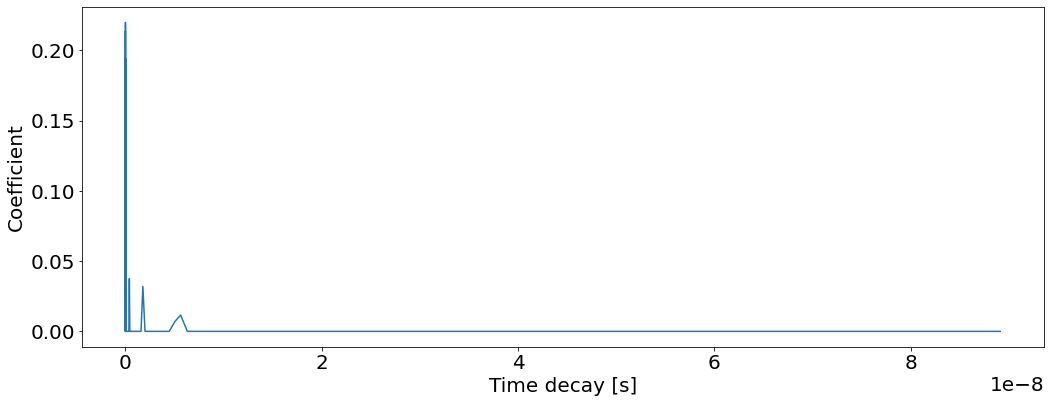

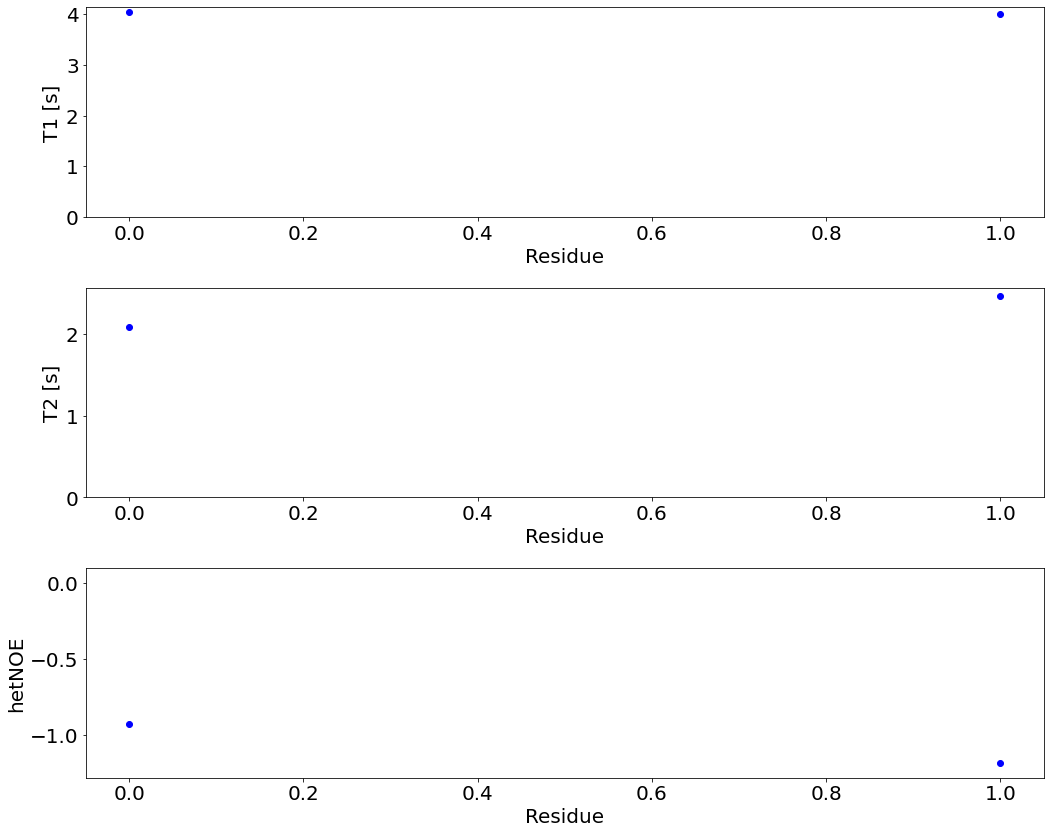

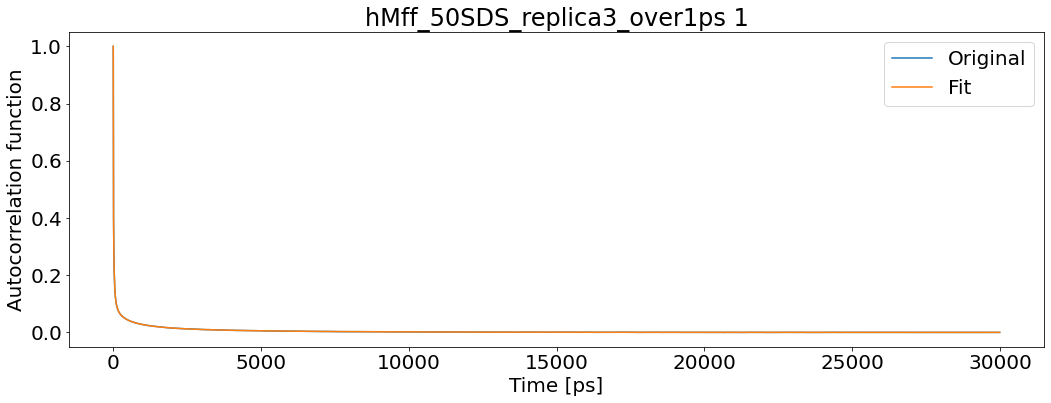

T1: 4.094707089081267 T2: 2.443351237790767 NOE: -1.2199983977175441


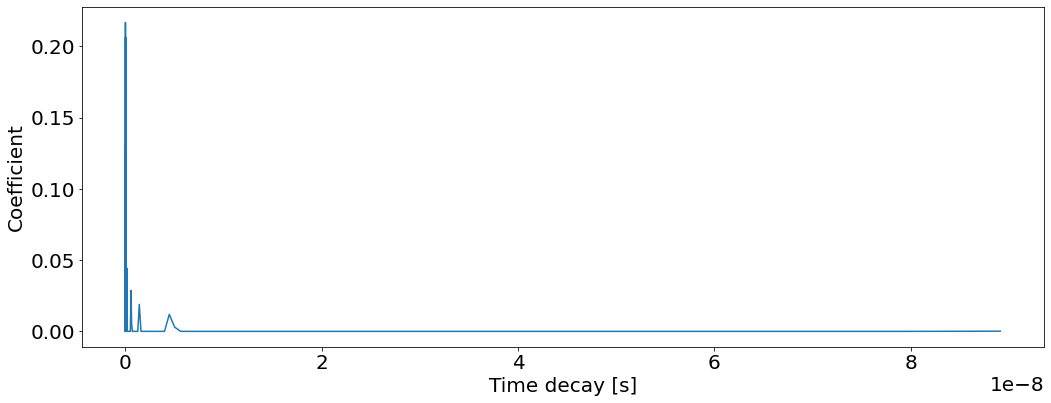

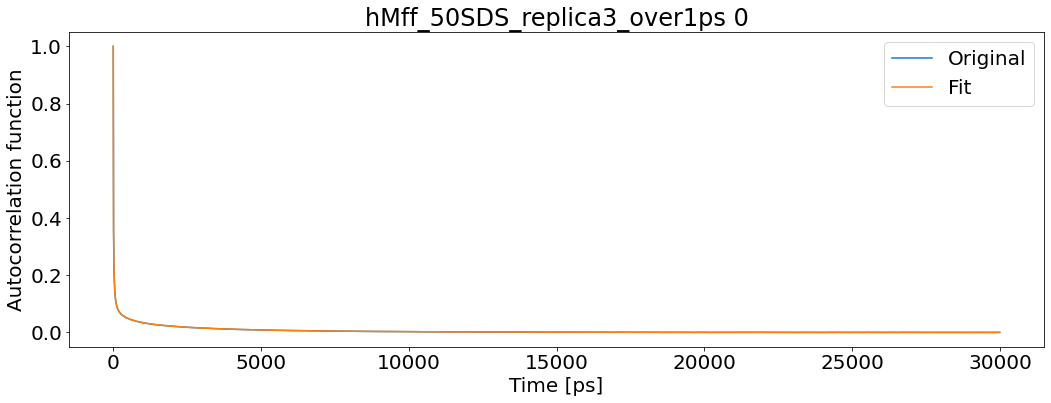

T1: 4.219885773361359 T2: 2.138836259361666 NOE: -0.991060600075546


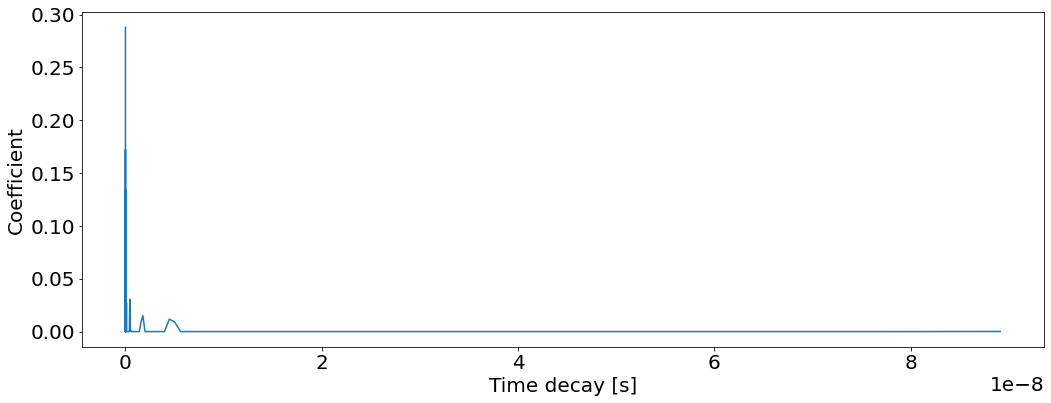

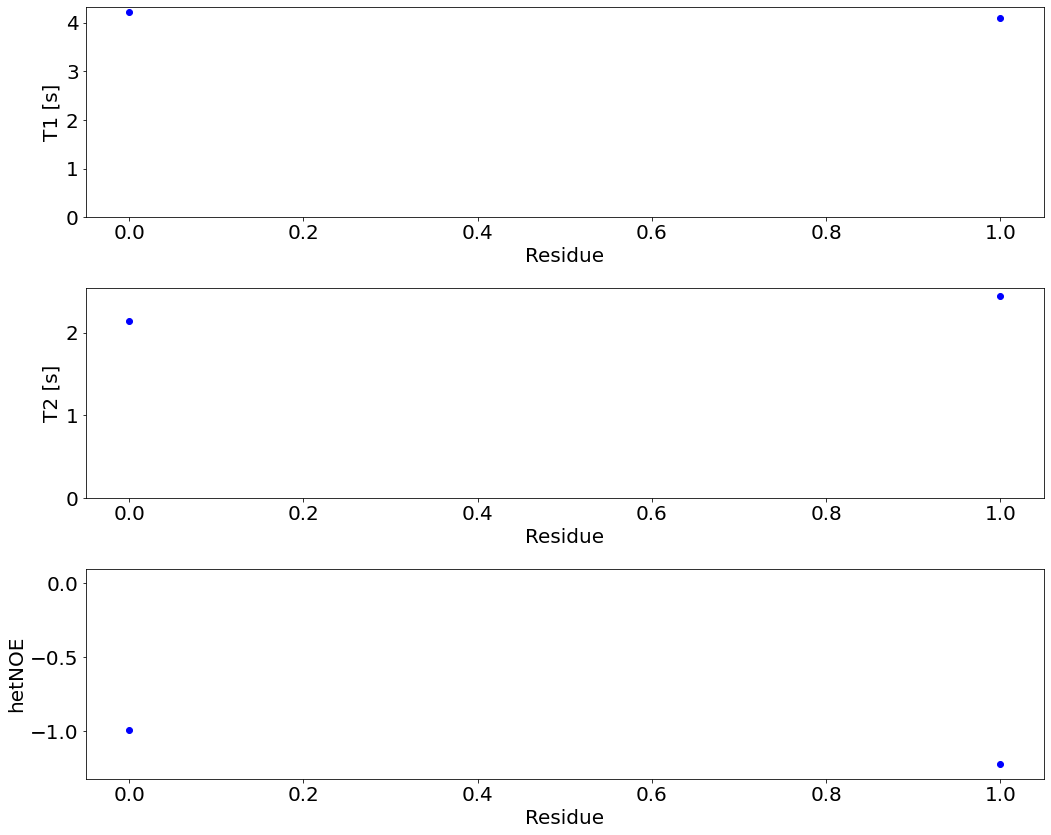

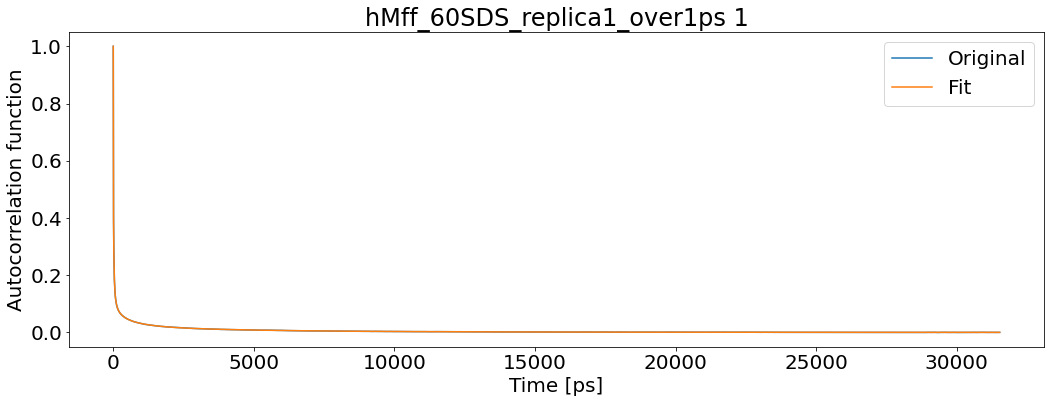

T1: 4.101482505538972 T2: 2.1604583819268397 NOE: -1.1782852571063276


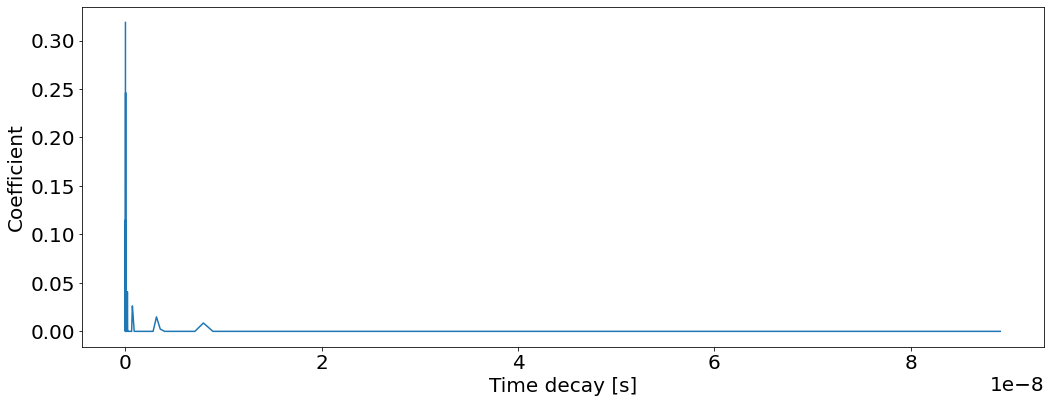

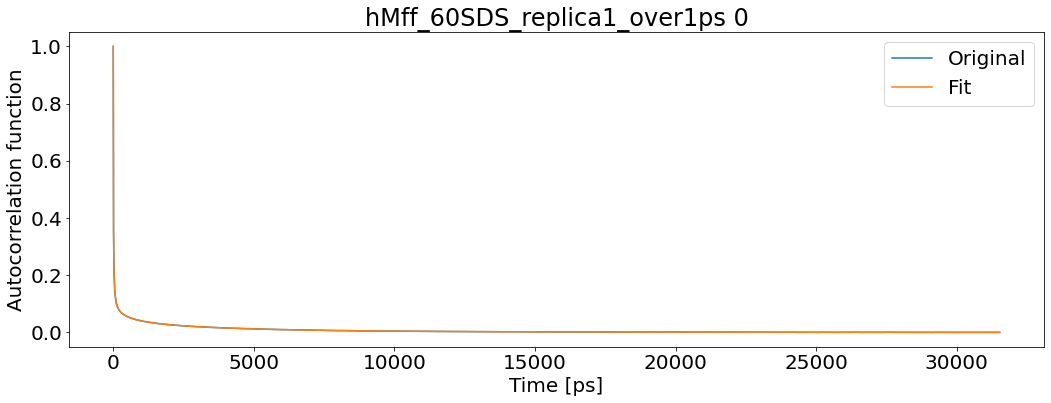

T1: 4.085176463492619 T2: 1.8272587787431203 NOE: -0.9321180654448669


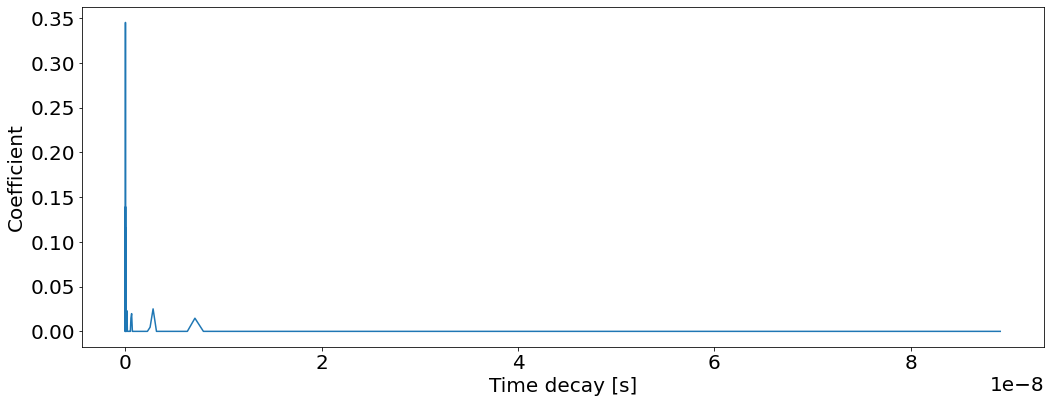

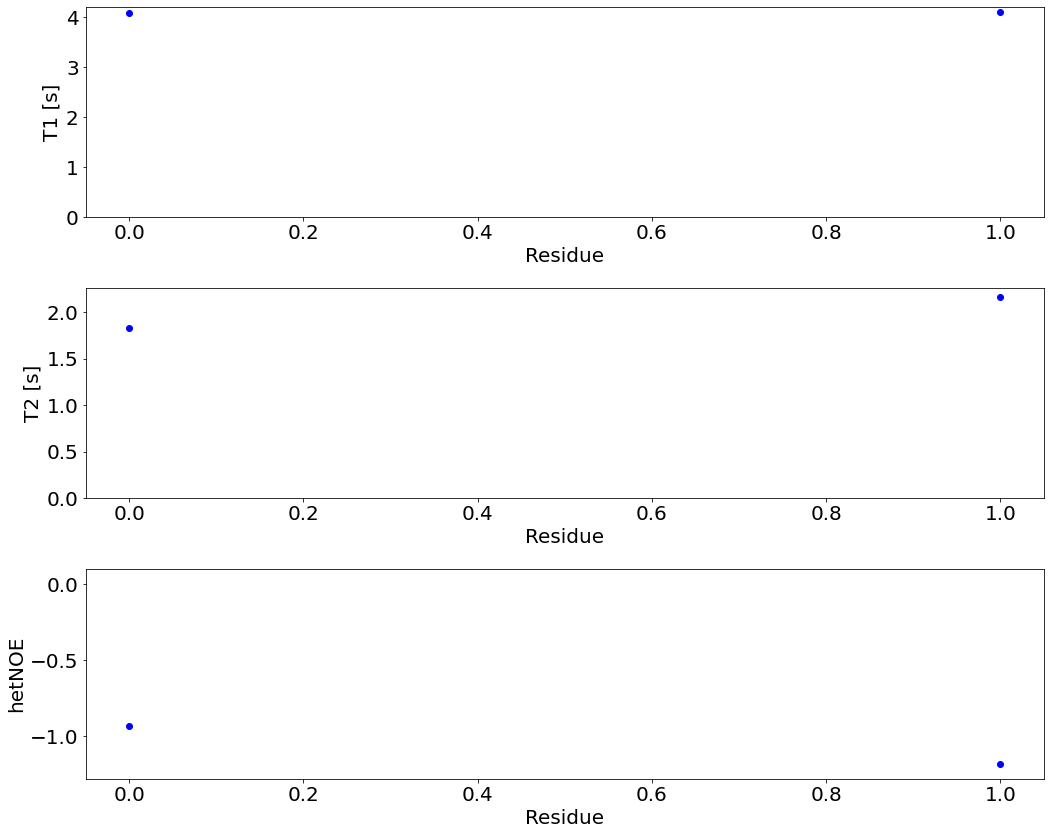

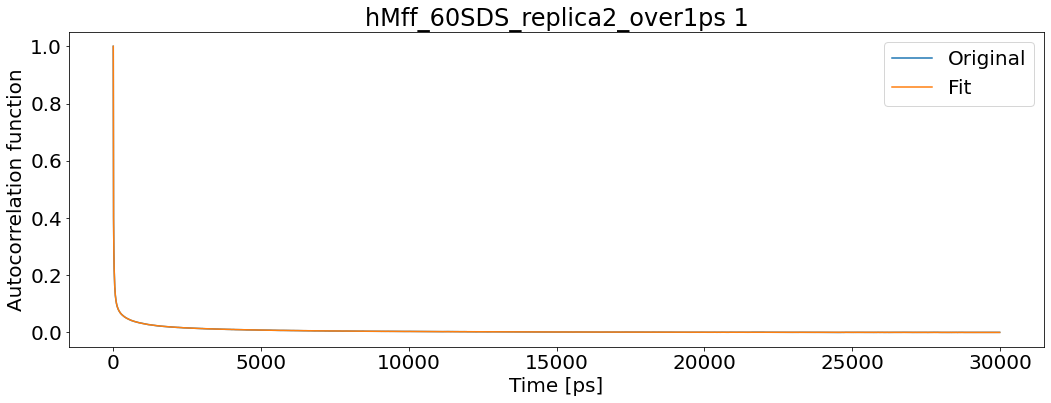

T1: 4.034657824699955 T2: 2.0832021615929968 NOE: -1.1832830406459163


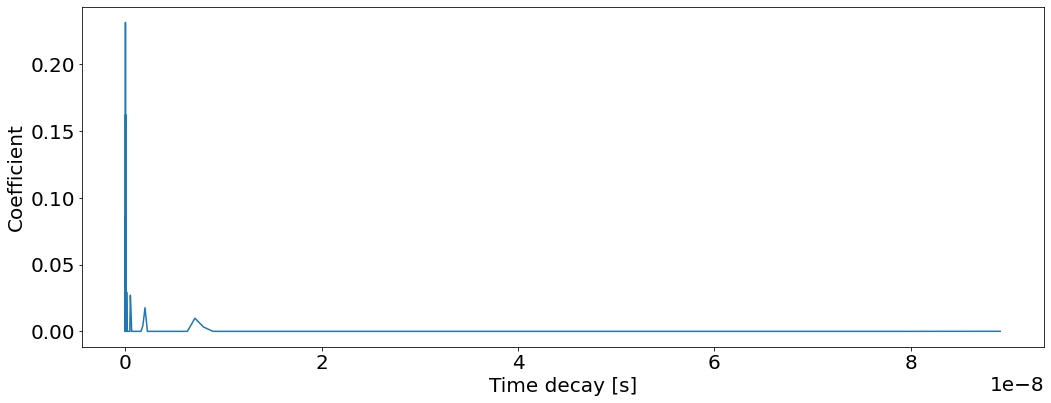

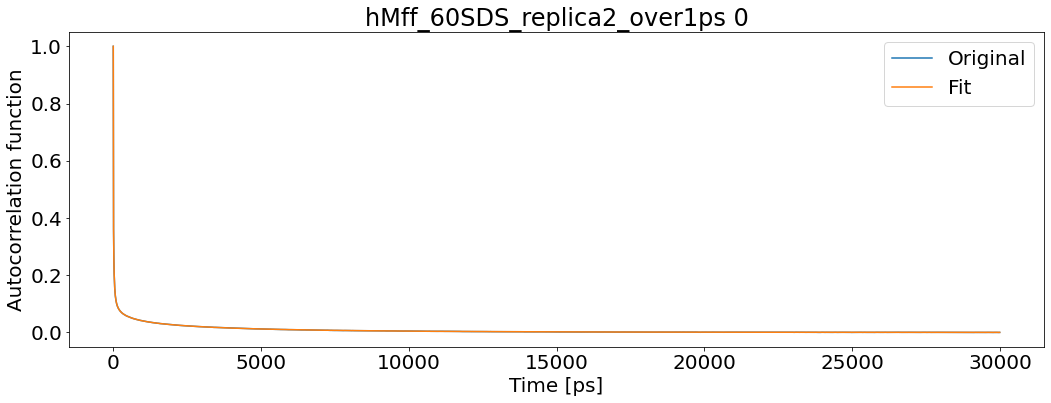

T1: 4.087638068210406 T2: 1.7809455547349862 NOE: -0.9006087650373802


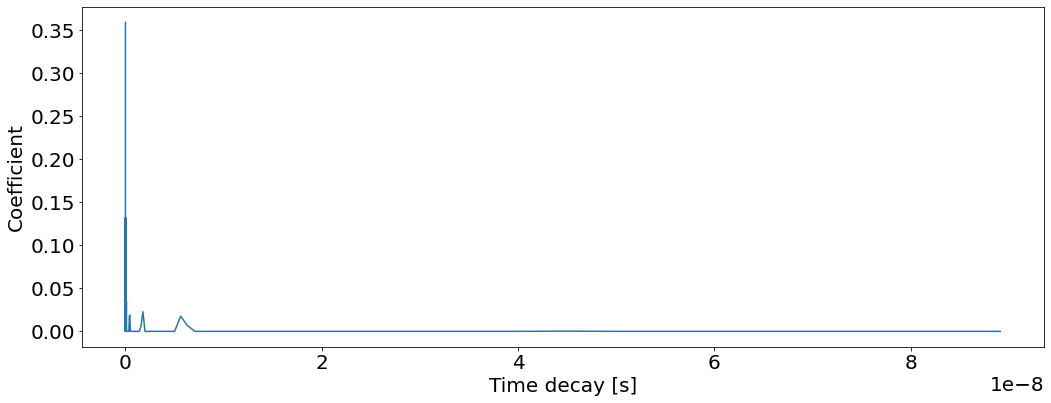

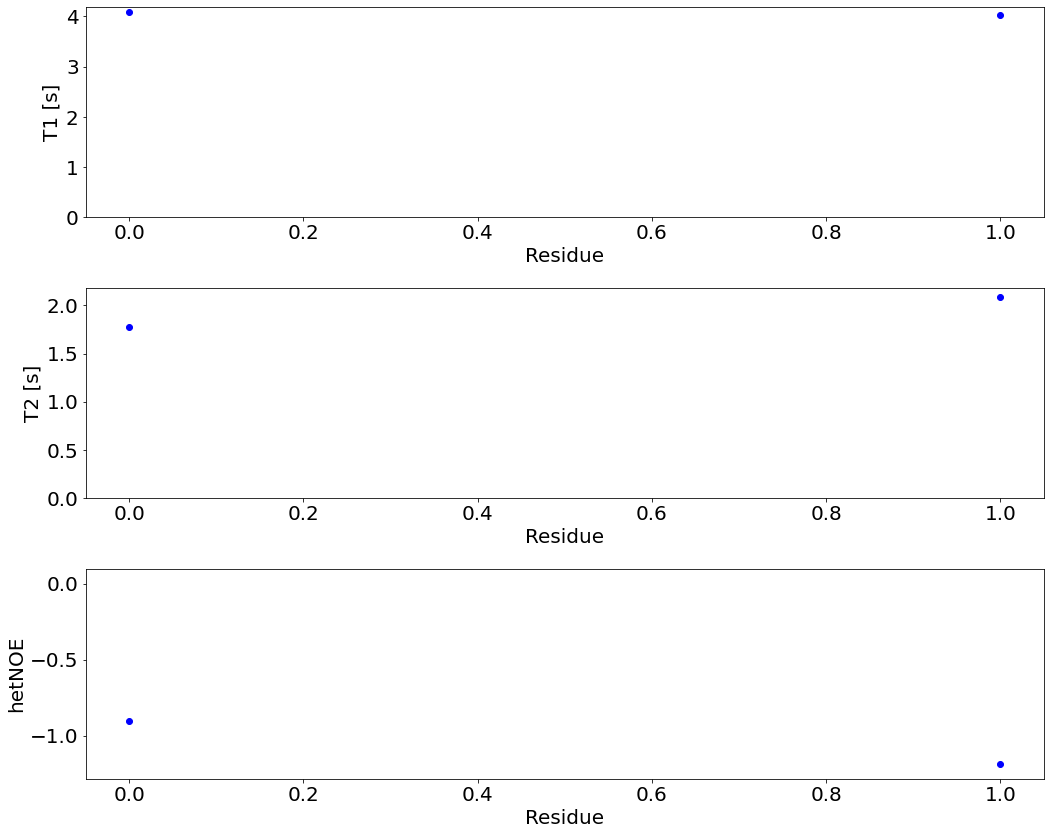

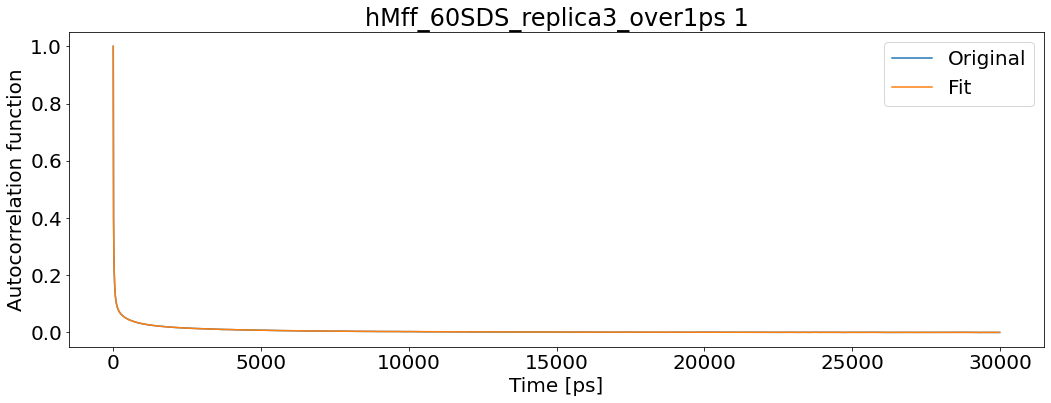

T1: 4.081405519621072 T2: 2.1909672017837196 NOE: -1.1999807050392044


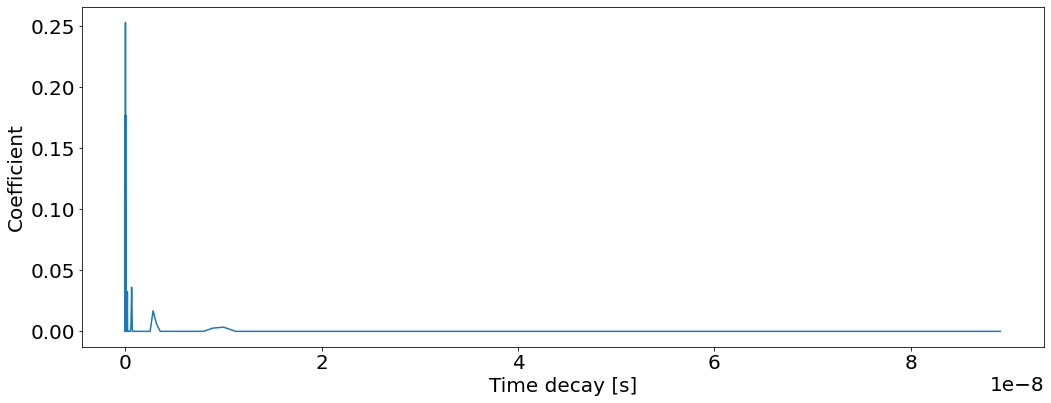

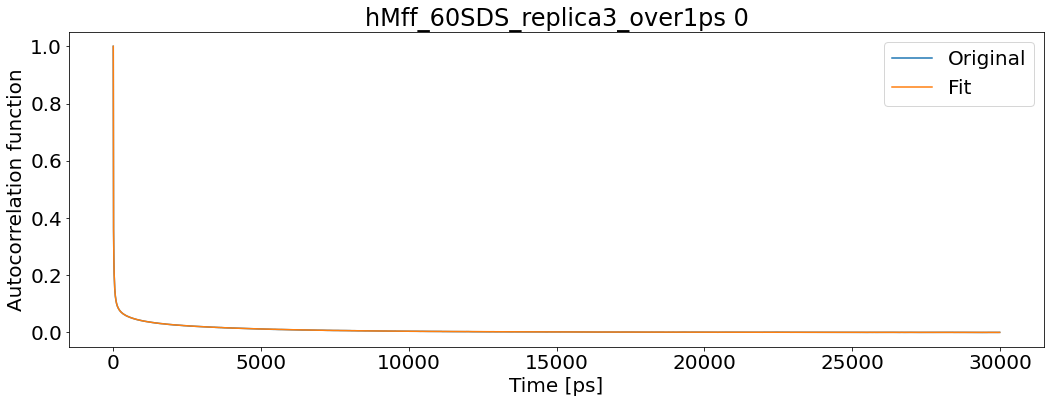

T1: 4.073887195365697 T2: 1.7843749248032024 NOE: -0.9289025238675088


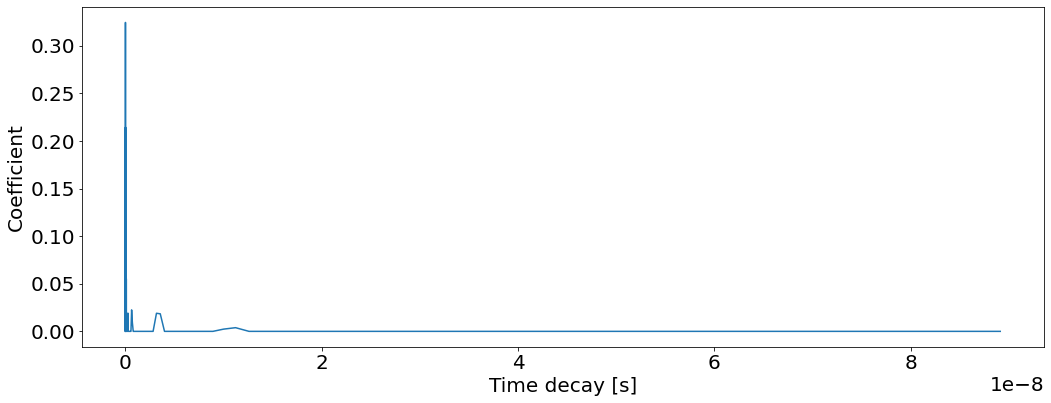

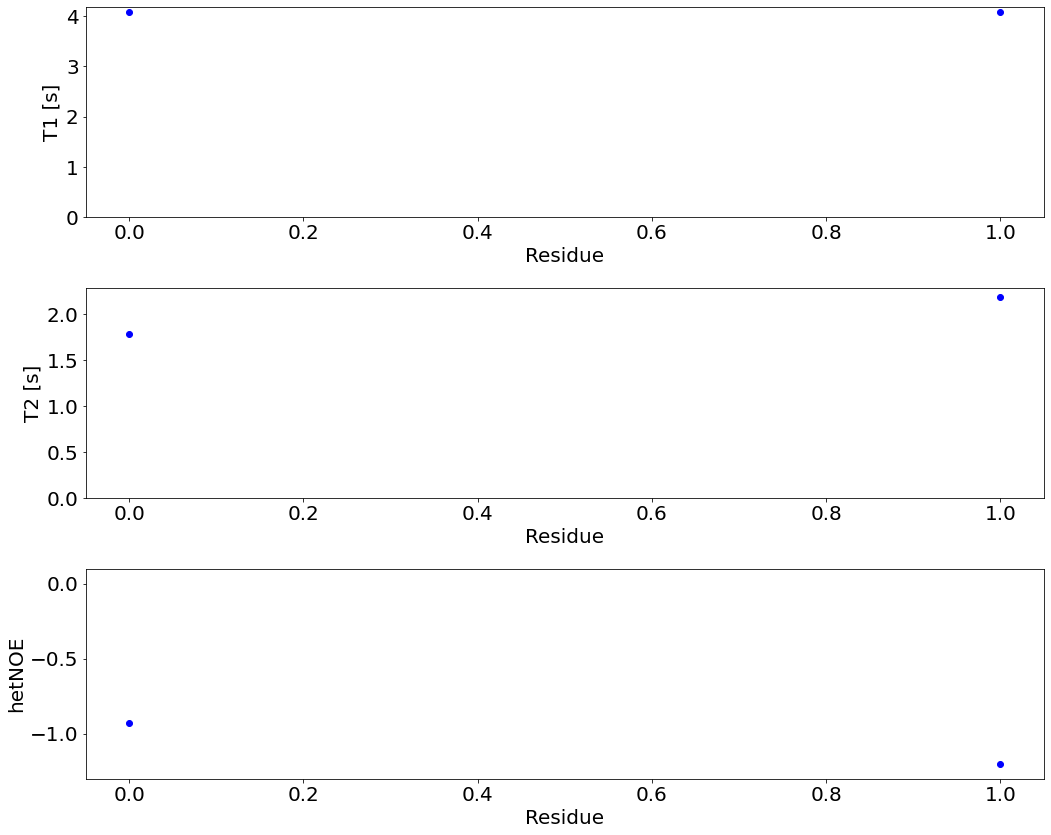

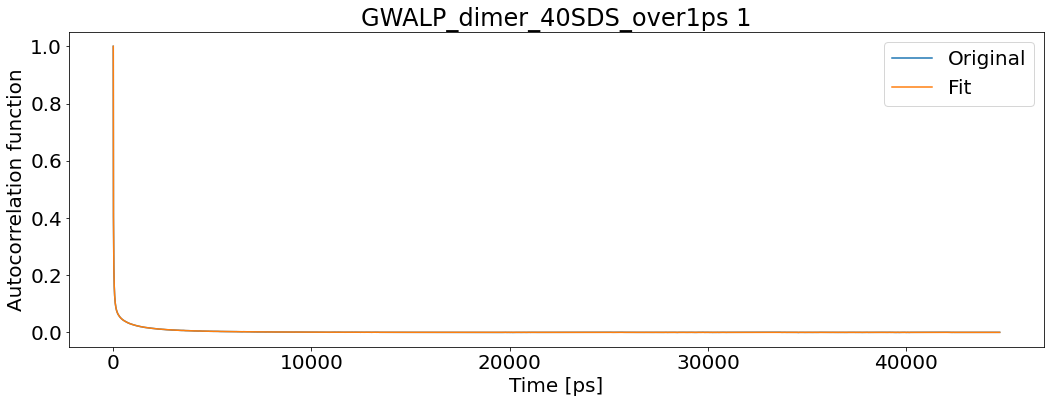

T1: 3.918472758587034 T2: 2.641848889289776 NOE: -1.1638042815645466


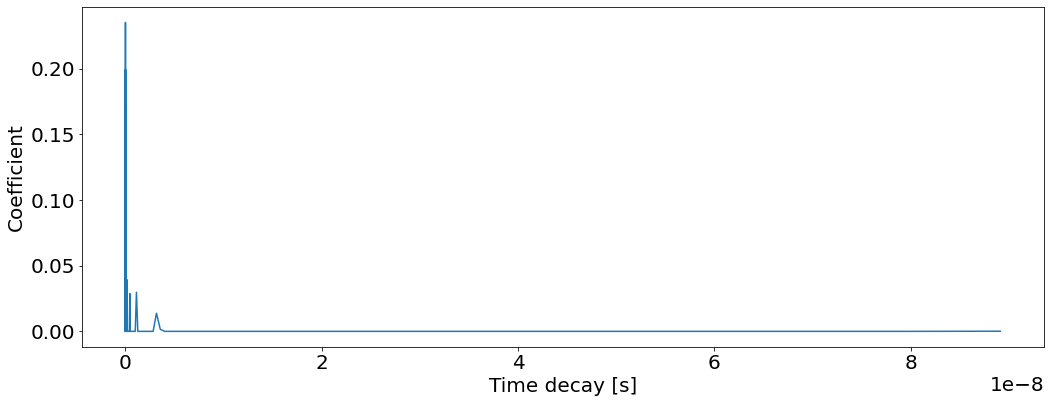

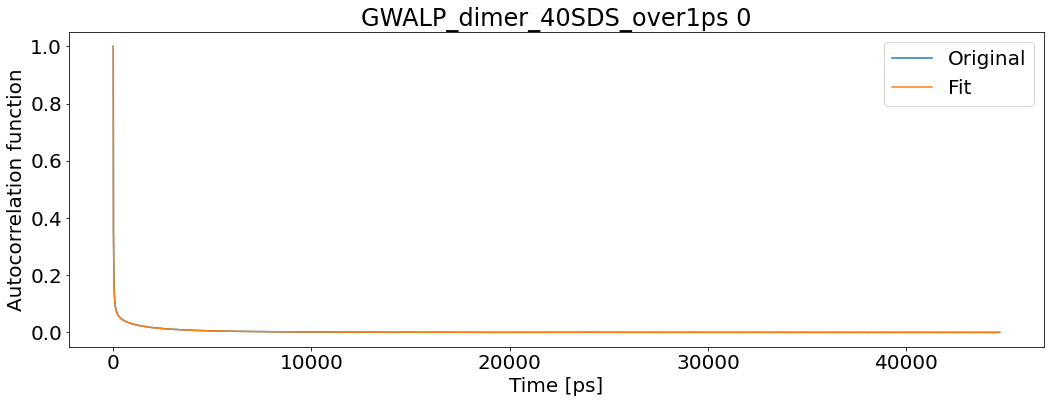

T1: 4.25783620573261 T2: 2.6409837997643972 NOE: -1.0593908017059595


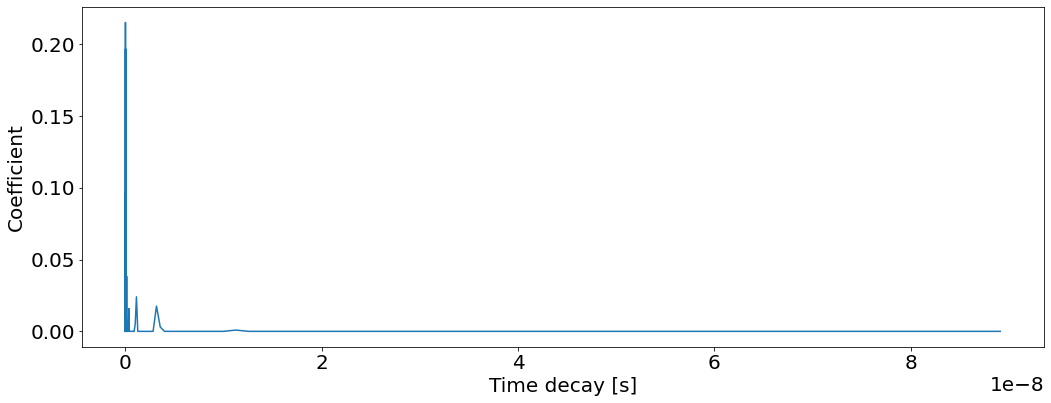

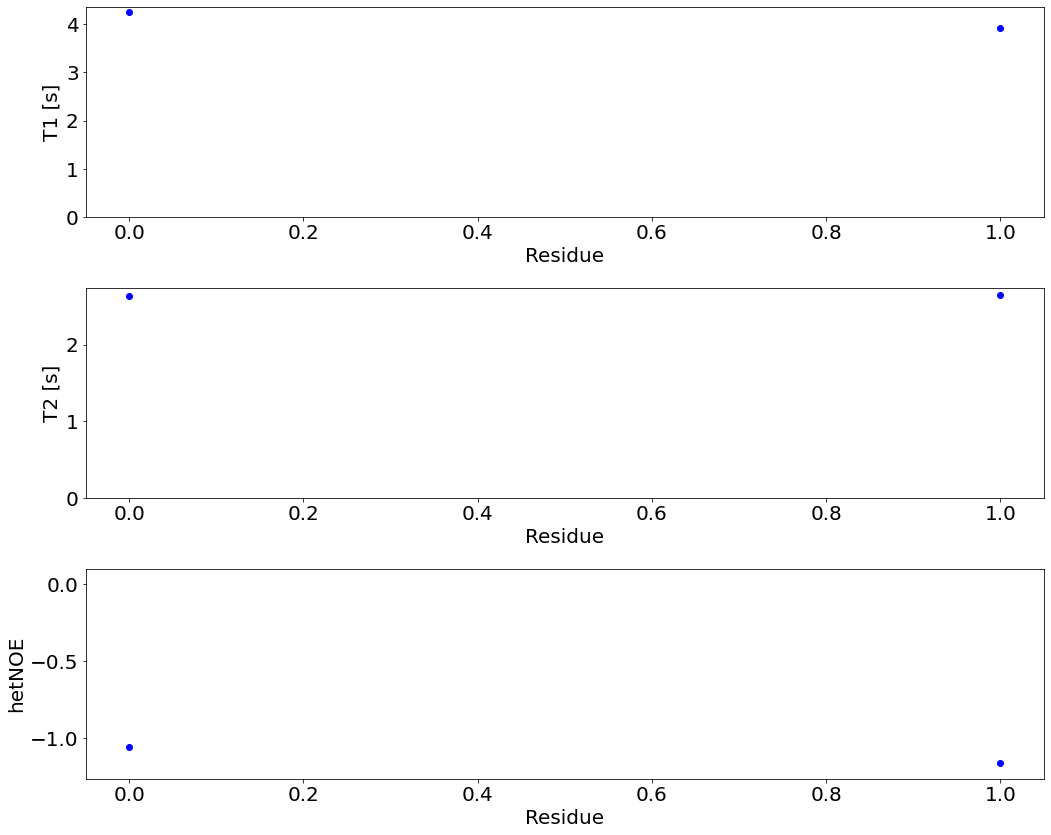

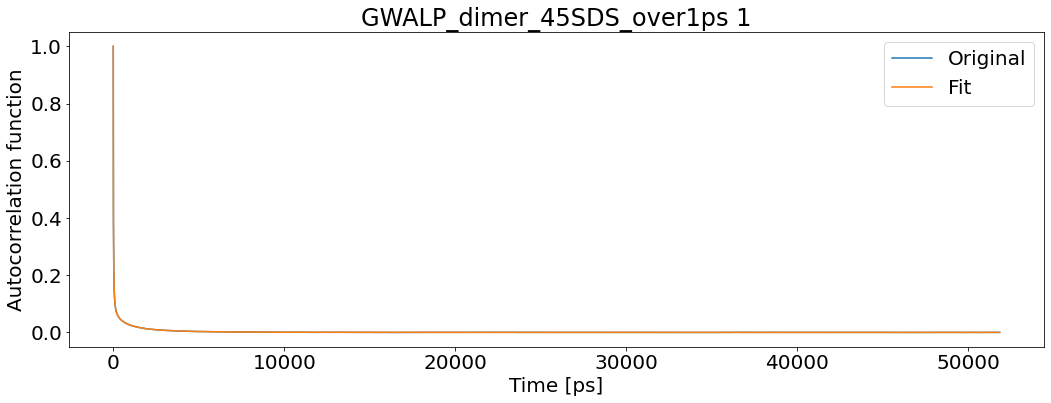

T1: 3.991458574342008 T2: 2.7389342986248133 NOE: -1.1784750195023412


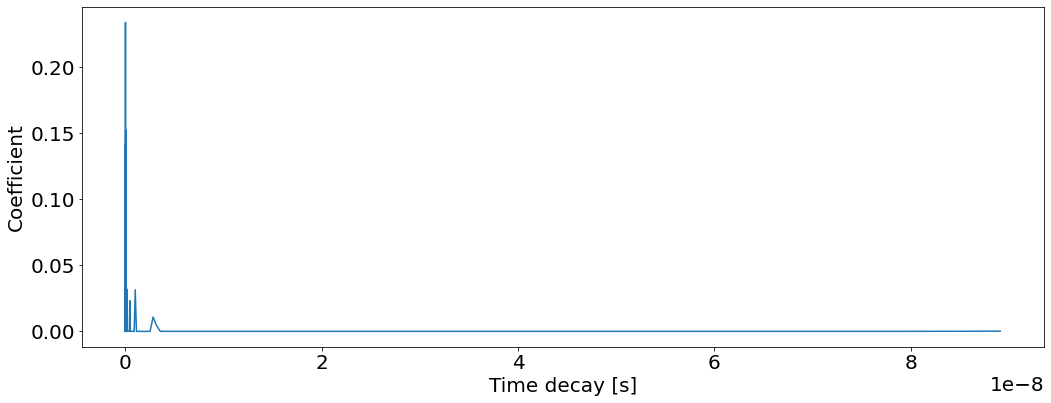

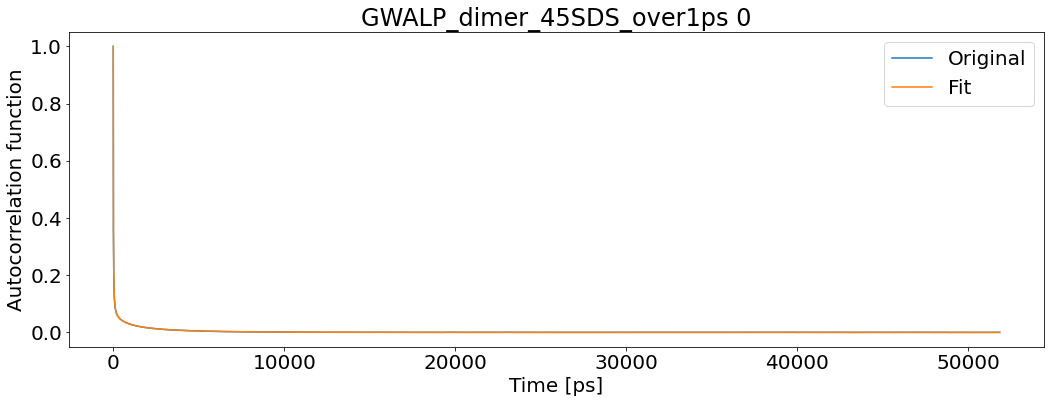

T1: 4.330168772352721 T2: 2.6774980207791357 NOE: -1.0363367307421147


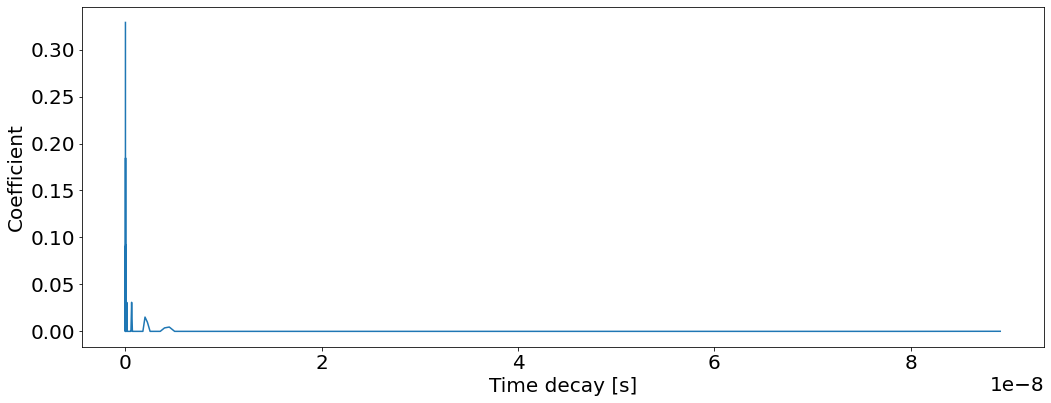

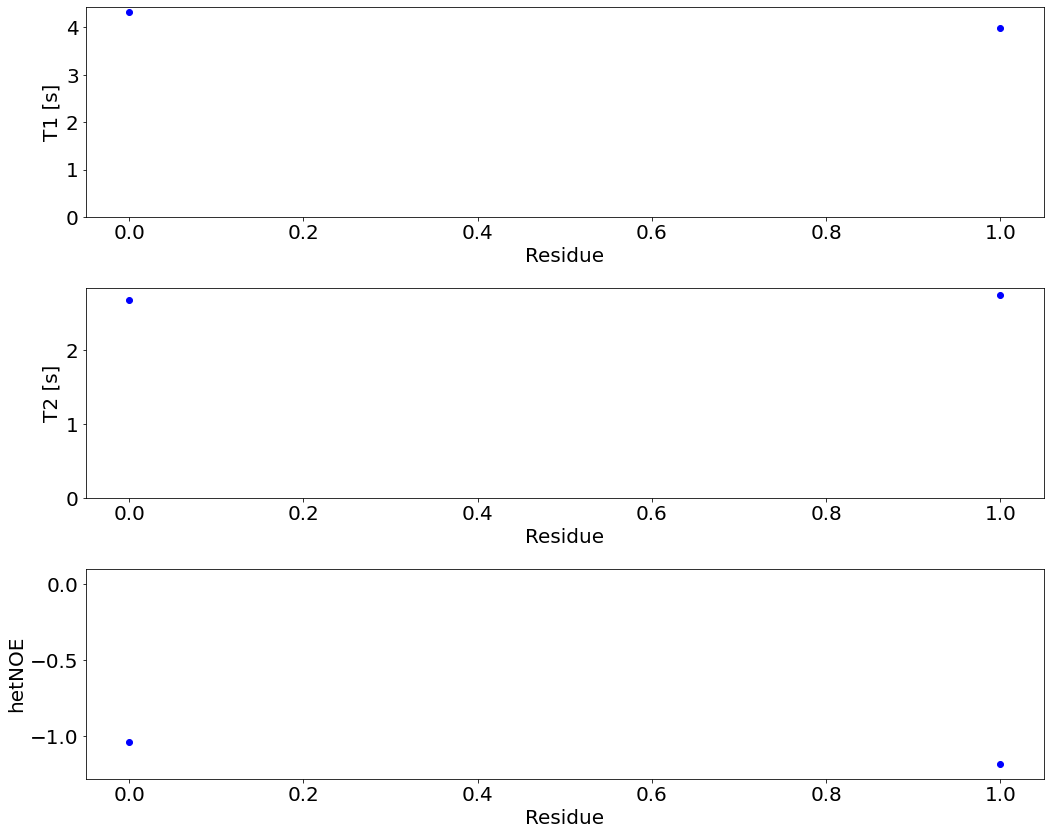

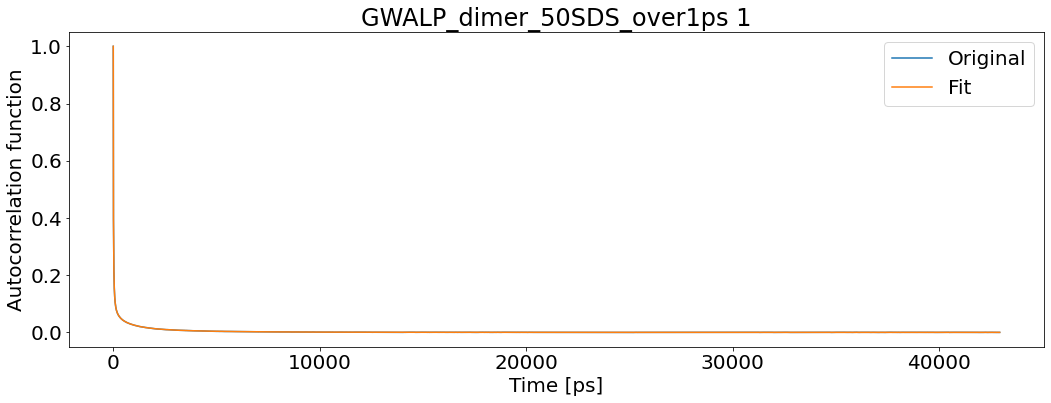

T1: 4.104132160717557 T2: 2.8236862846261293 NOE: -1.1949494098949223


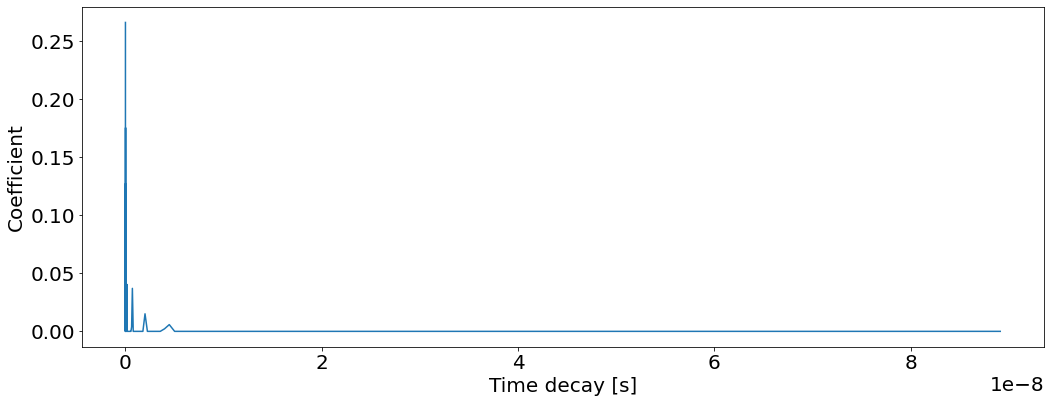

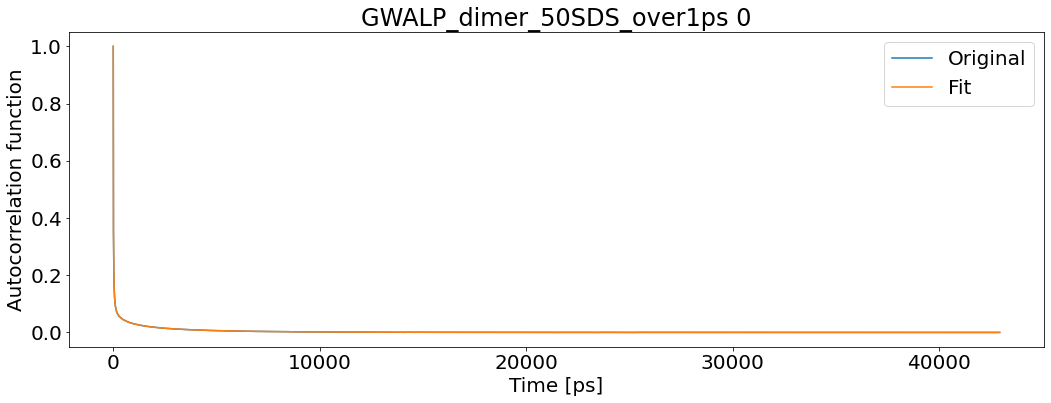

T1: 4.334318720578521 T2: 2.514442005119847 NOE: -1.0534896319280467


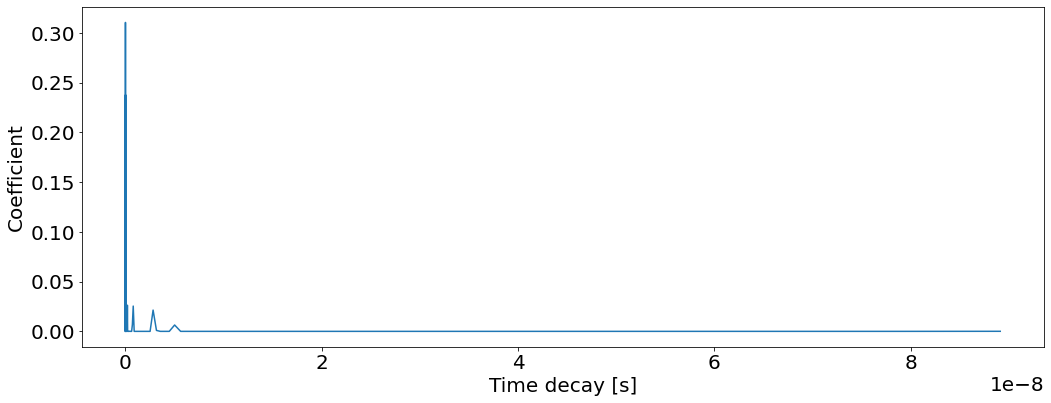

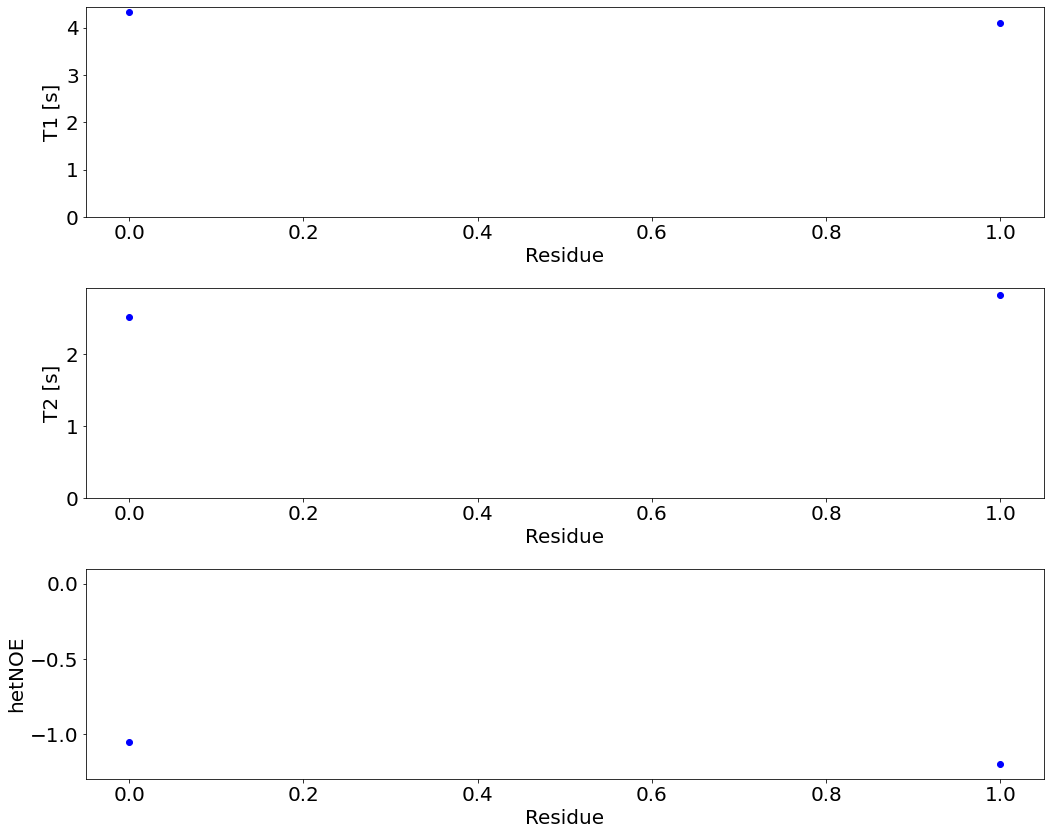

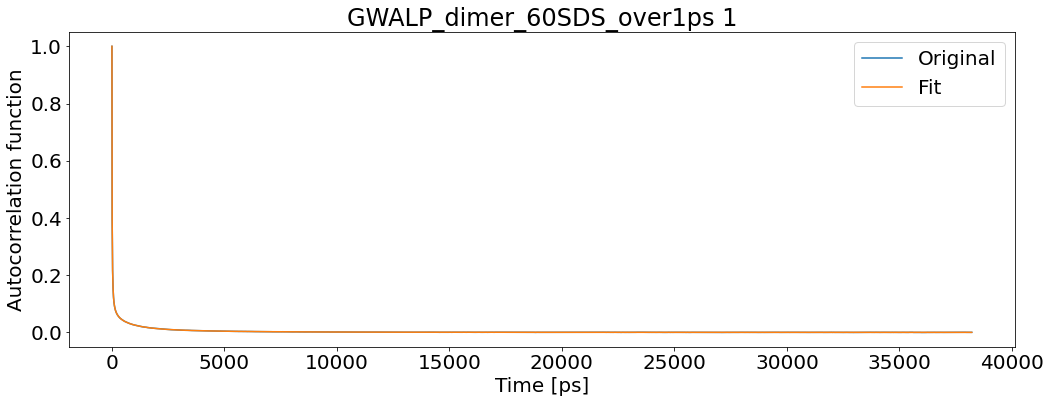

T1: 4.0888977088066145 T2: 2.7307140111253303 NOE: -1.200430688803587


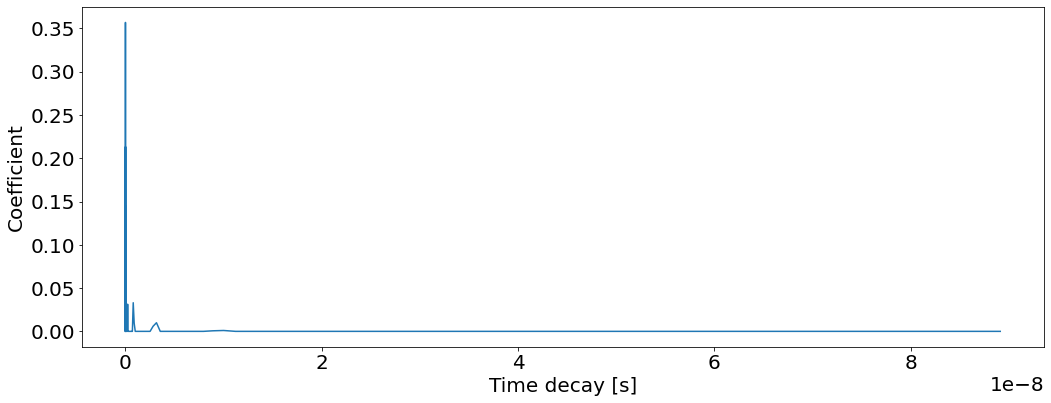

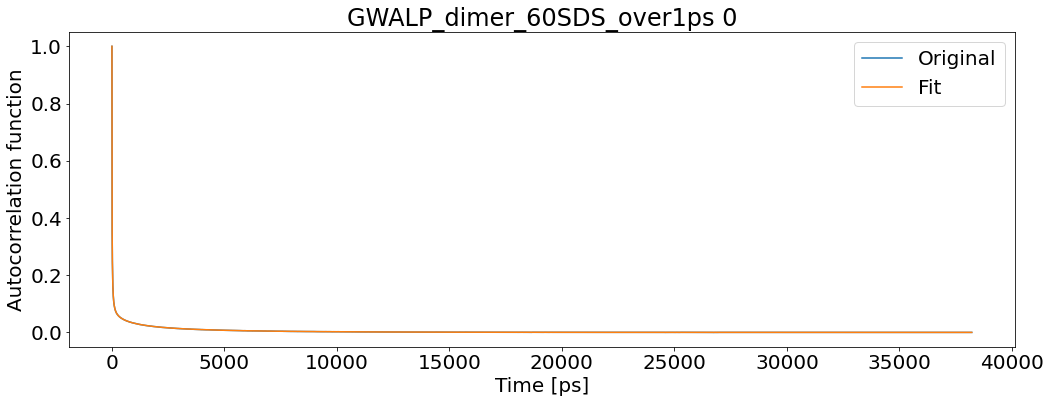

T1: 4.313191385910539 T2: 2.318561233031866 NOE: -1.0232249686678854


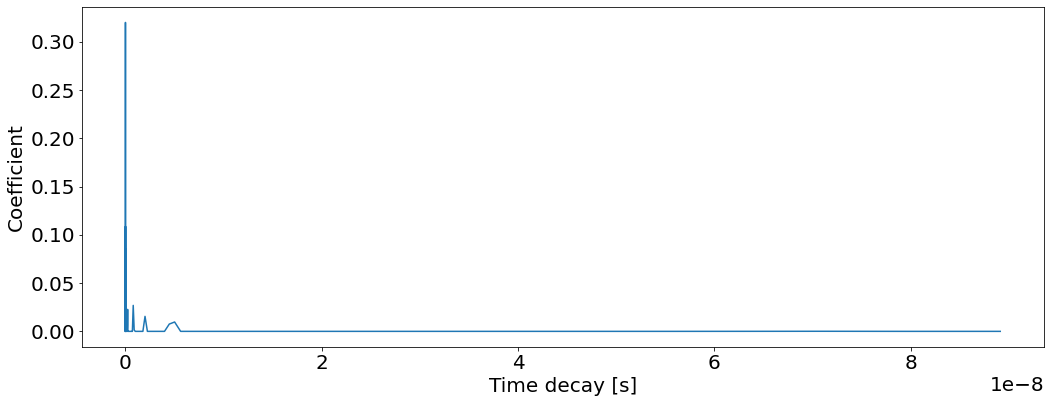

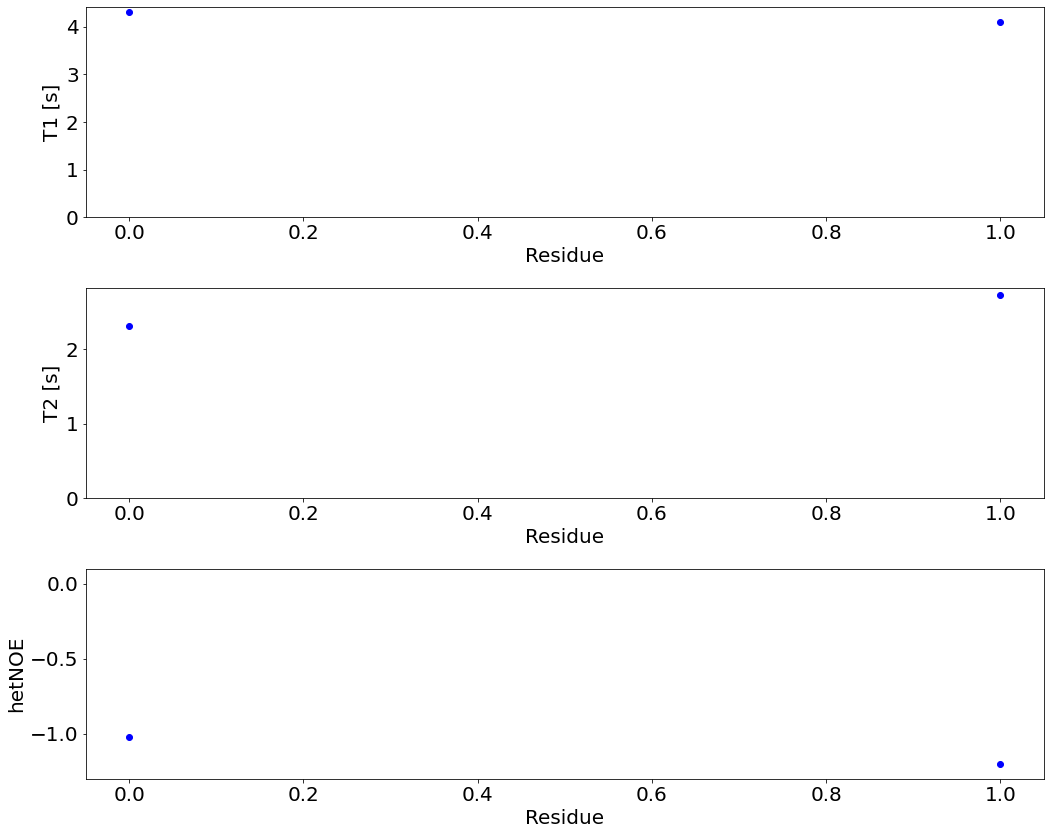

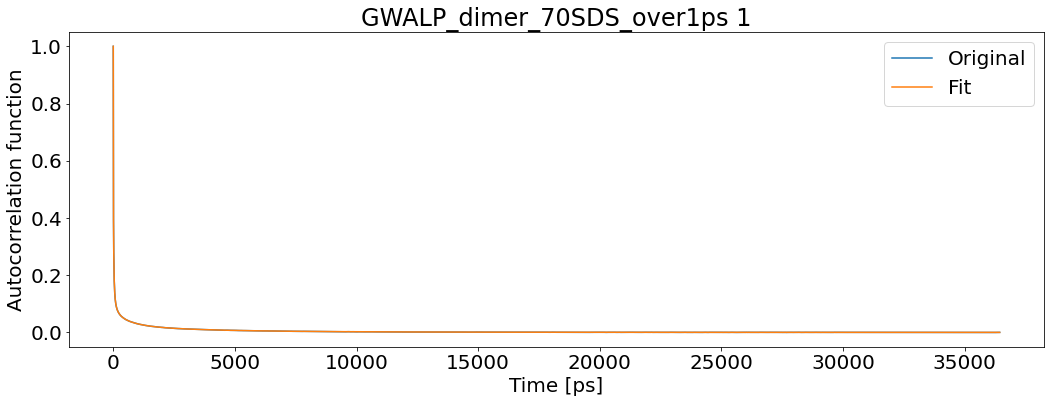

T1: 4.117122304587885 T2: 2.3621774690357538 NOE: -1.1408082409040654


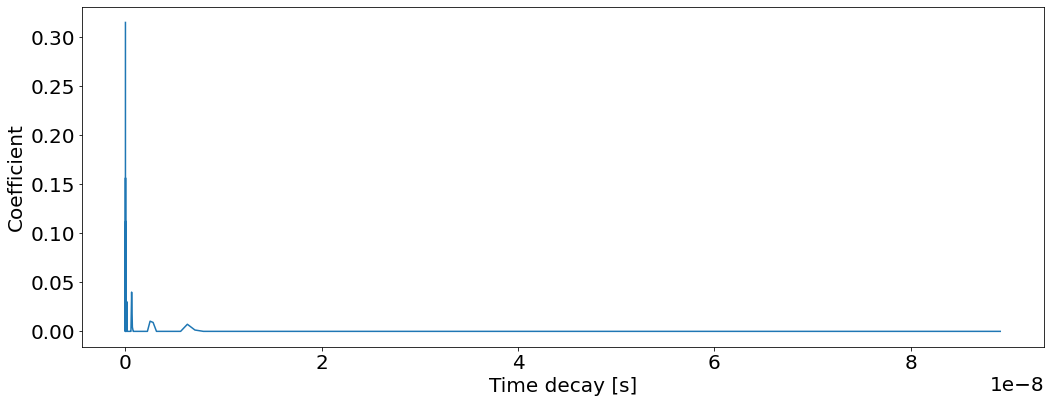

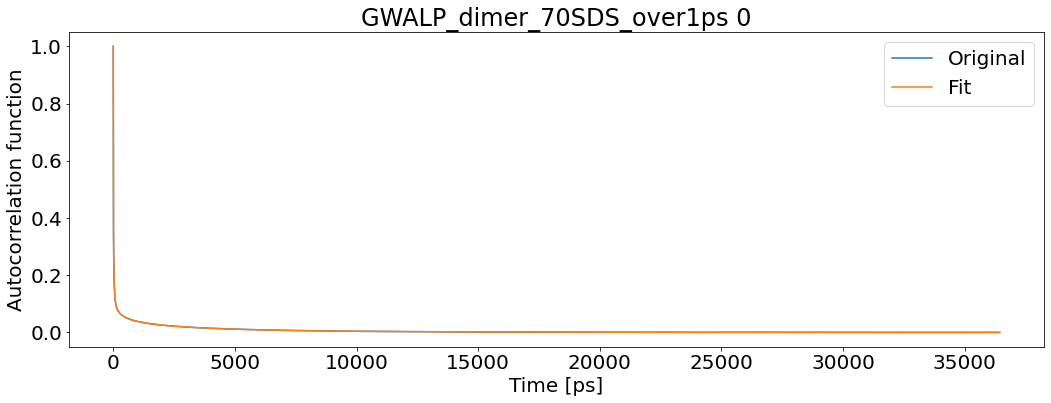

T1: 4.265915044963344 T2: 1.9699206715646178 NOE: -0.9247389217518303


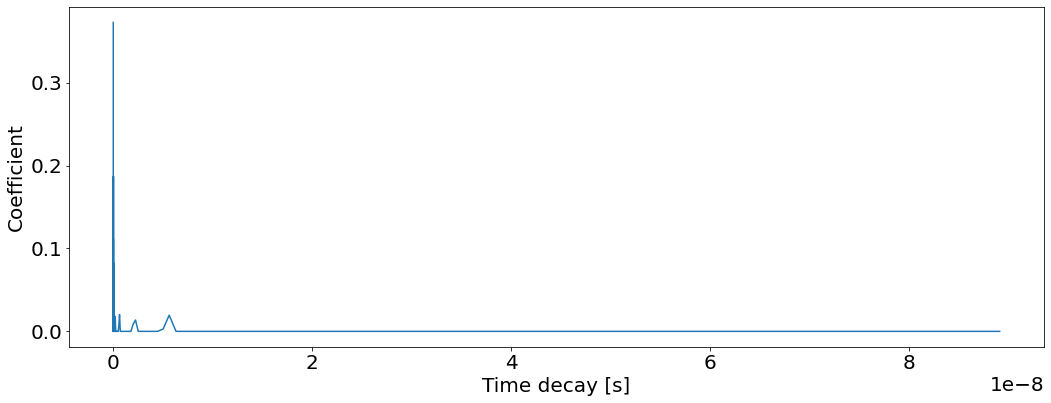

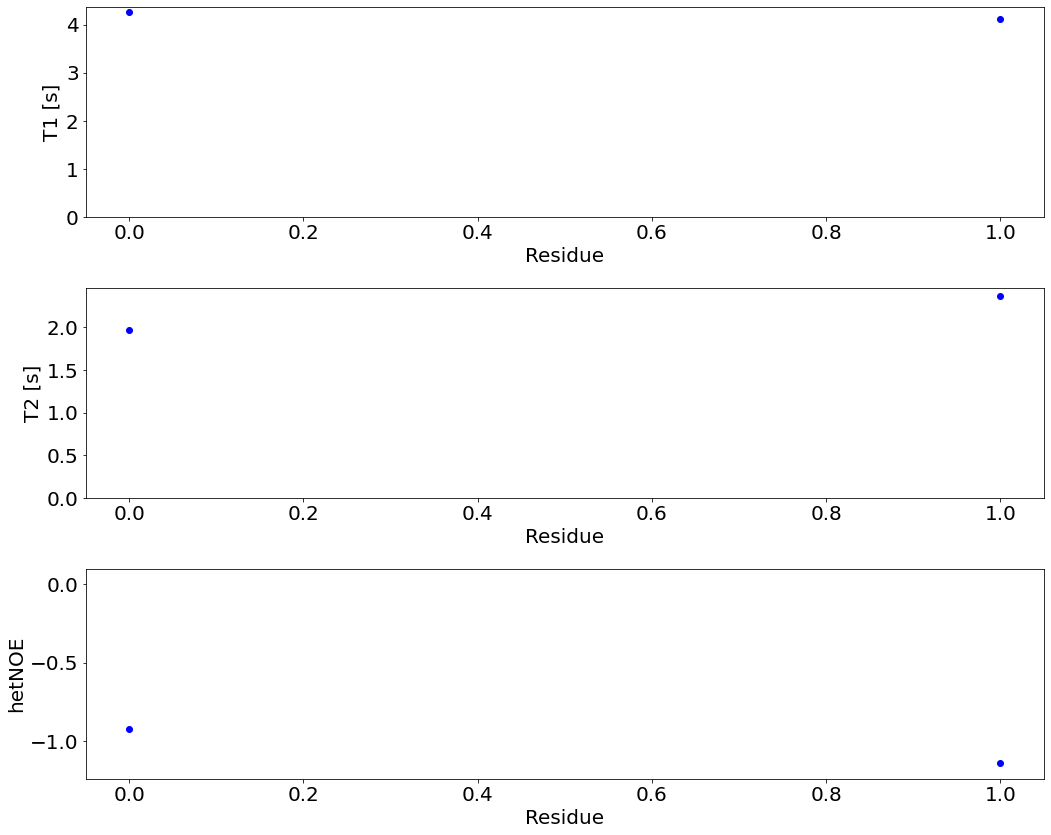

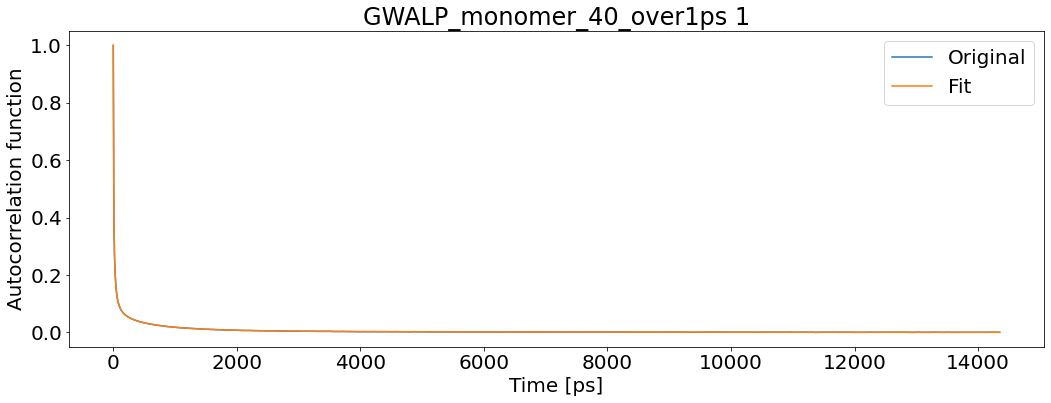

T1: 4.467592352875125 T2: 3.541748763567678 NOE: -1.4139090132241732


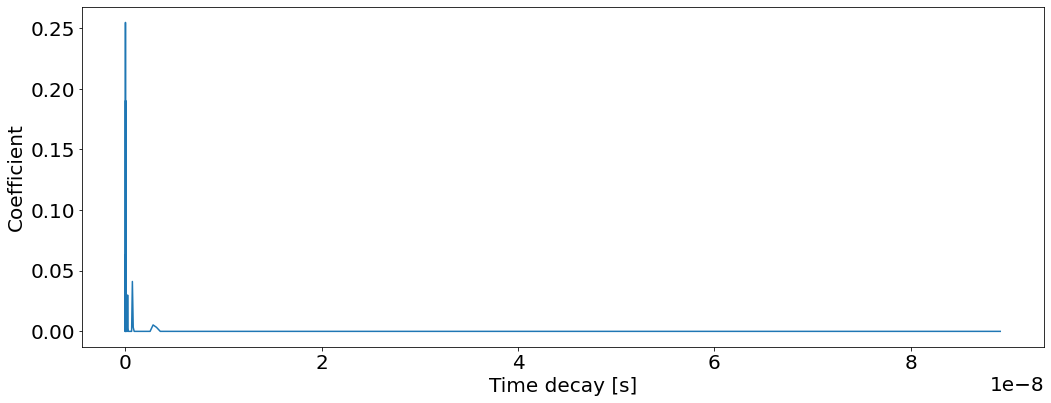

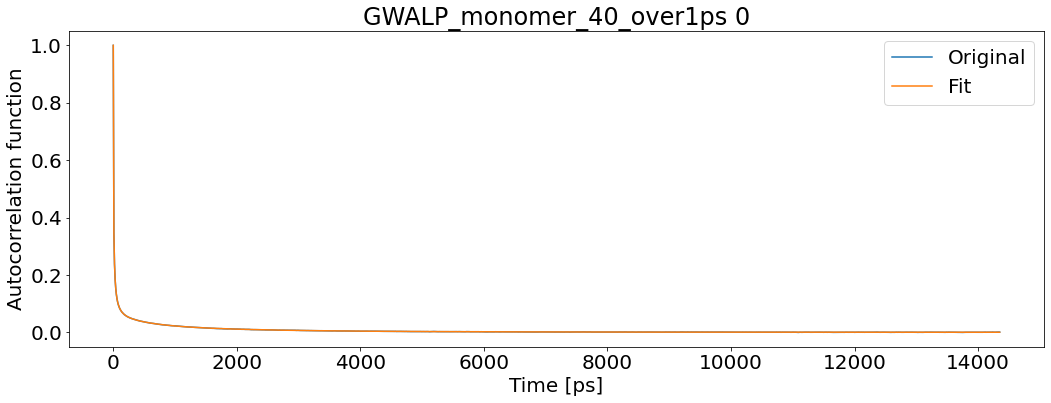

T1: 4.651783367311978 T2: 3.381067801213503 NOE: -1.1329352651117848


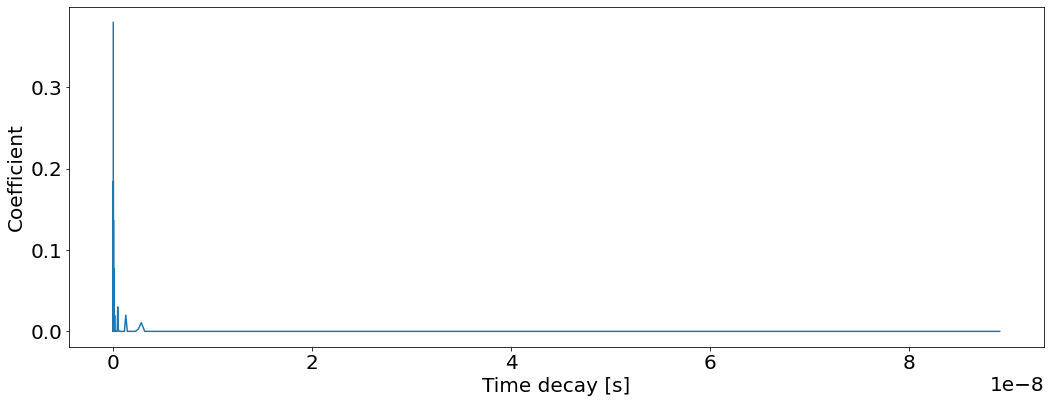

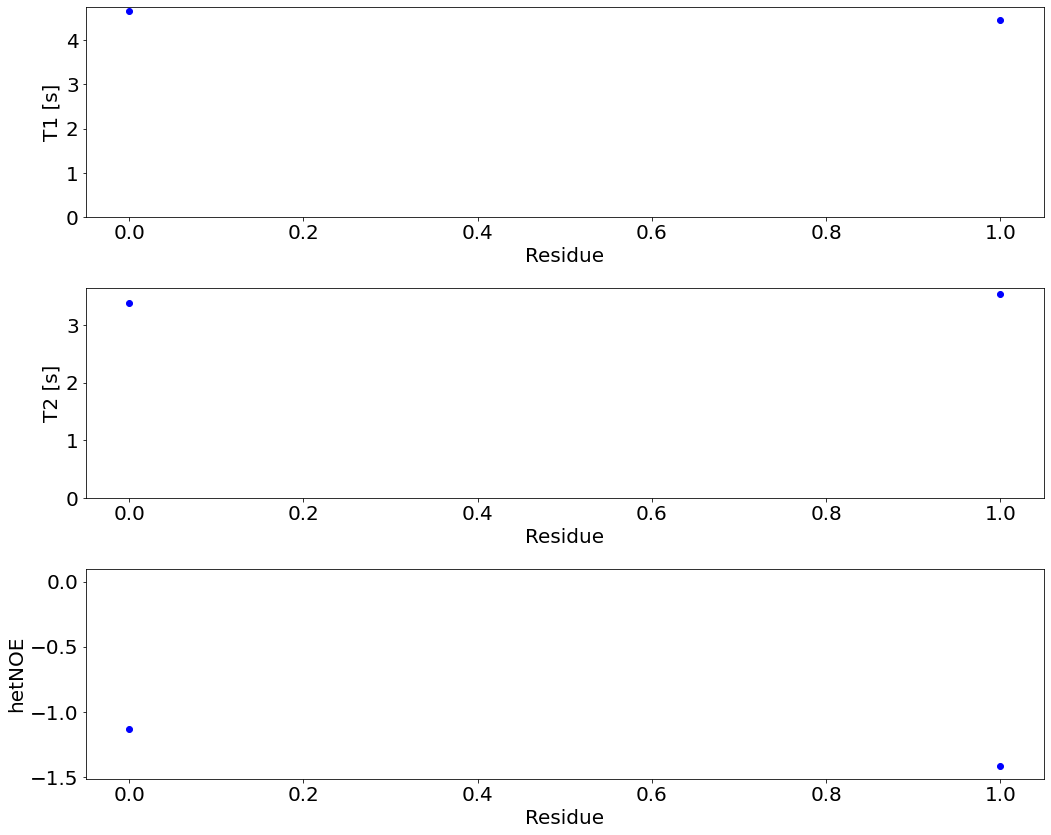

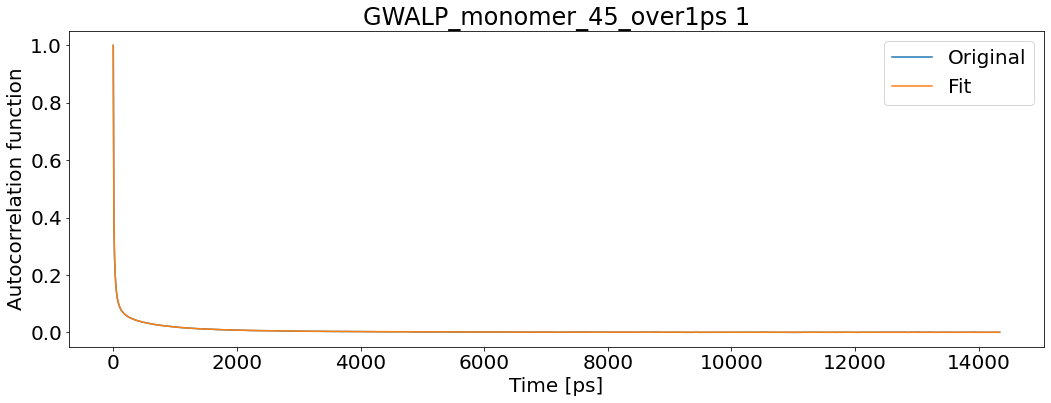

T1: 4.397174822446053 T2: 3.1268110276239938 NOE: -1.3350917992427211


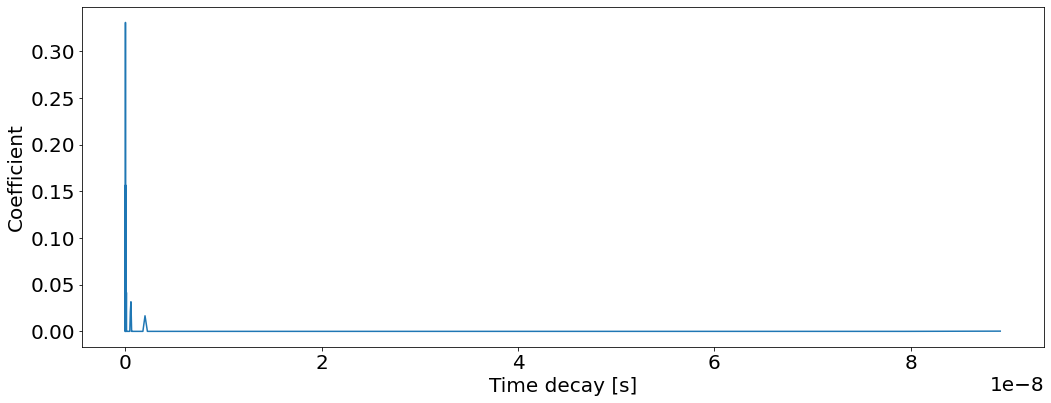

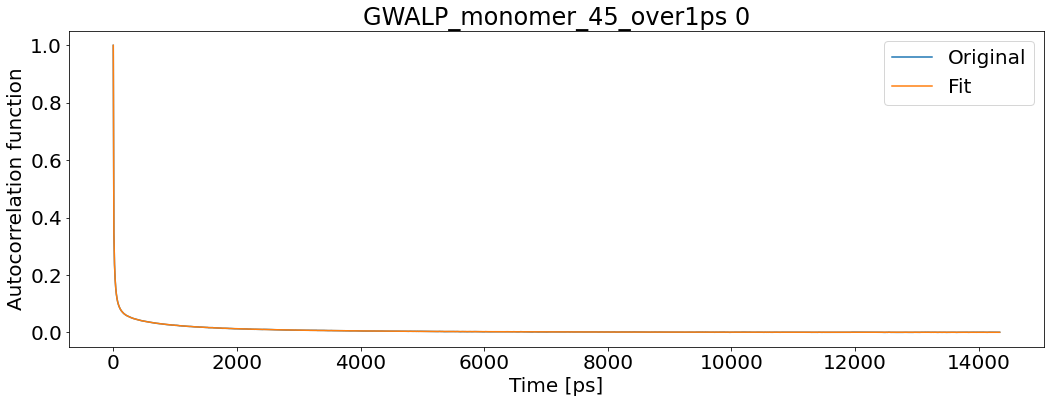

T1: 4.504450574674763 T2: 3.1518653676791146 NOE: -1.0857193979014554


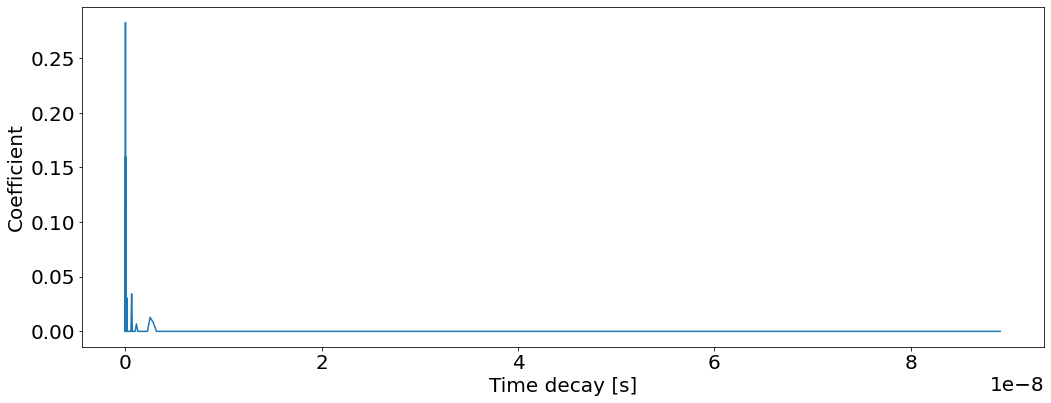

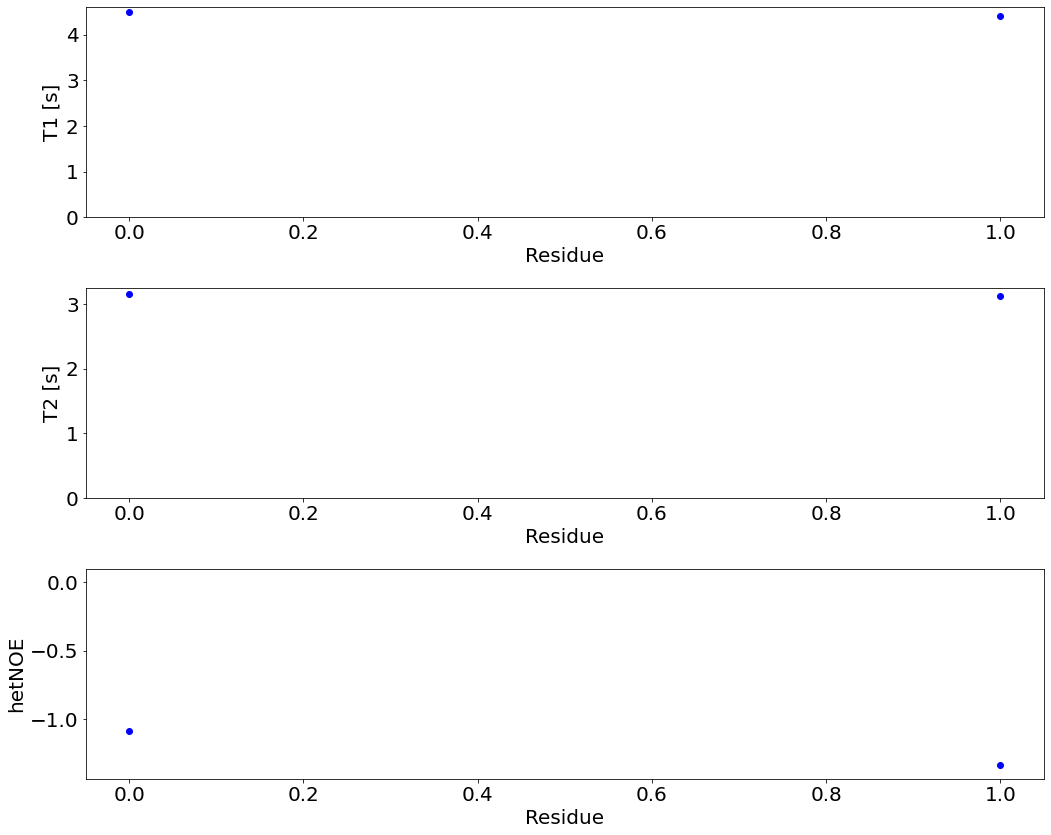

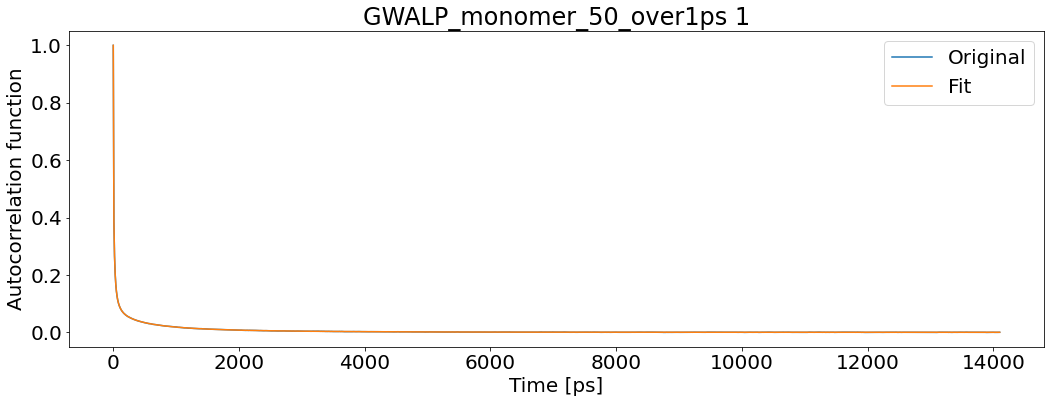

T1: 4.4435654878755395 T2: 3.119471583890778 NOE: -1.3254211007902614


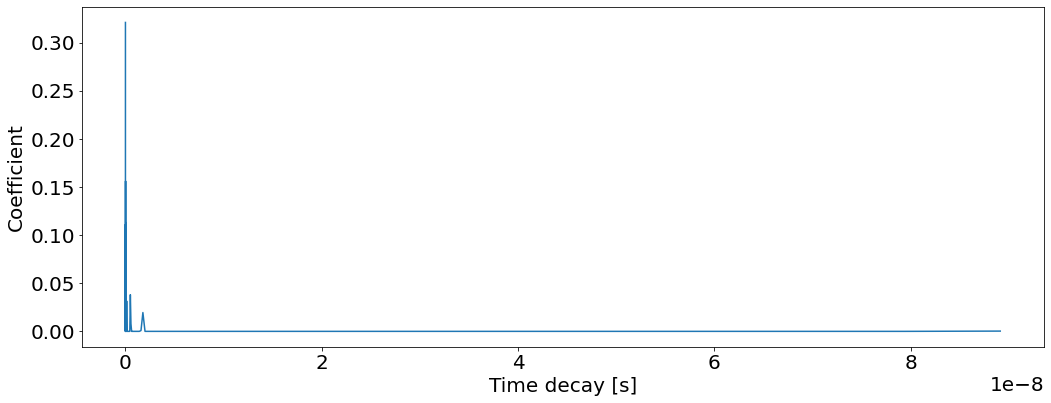

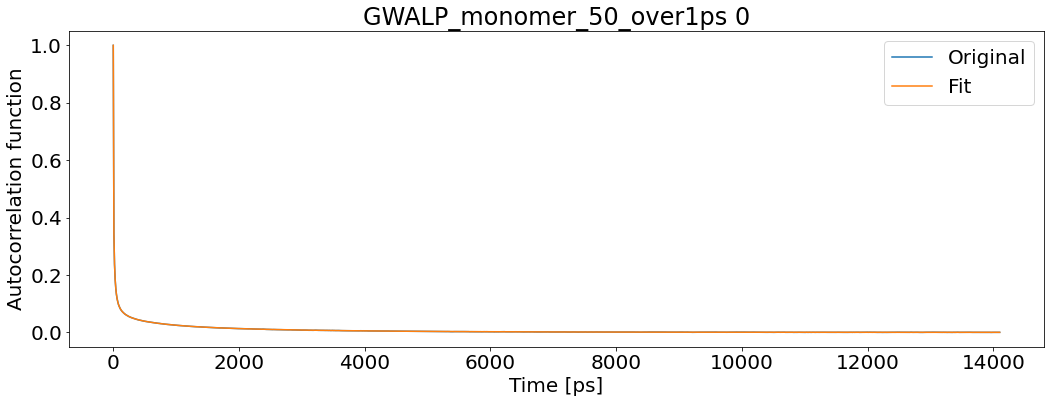

T1: 4.484405582694603 T2: 2.778520657223208 NOE: -1.072765095402779


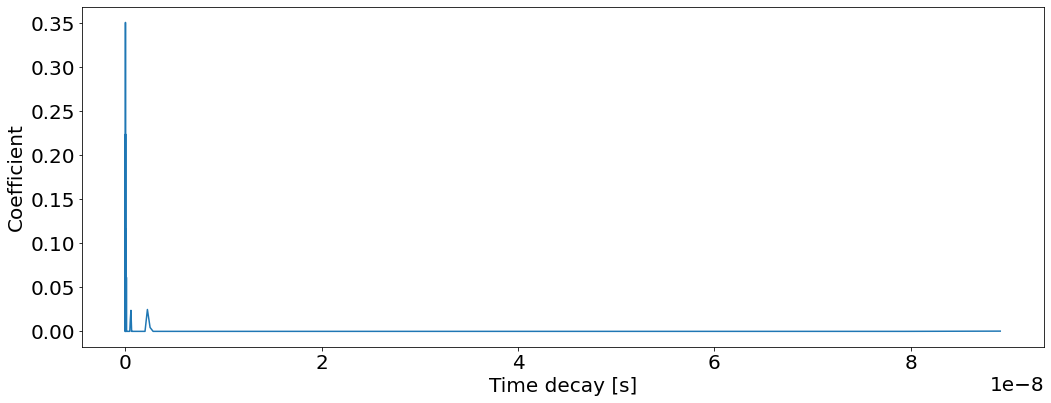

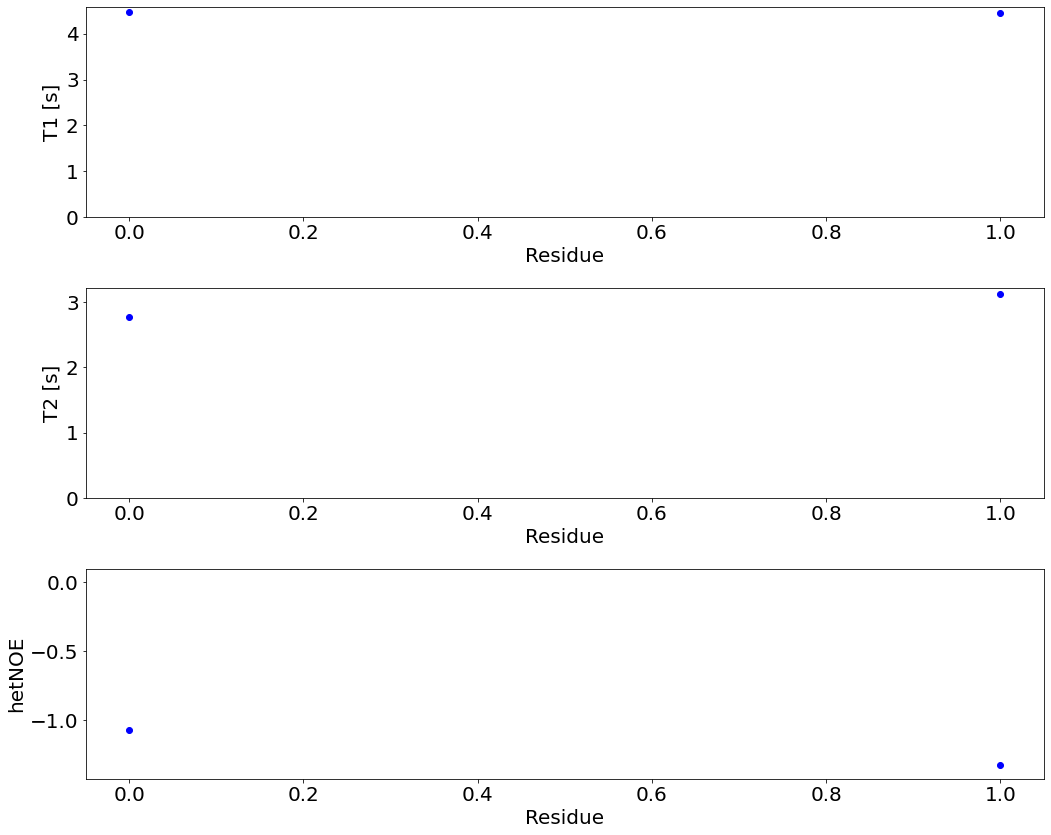

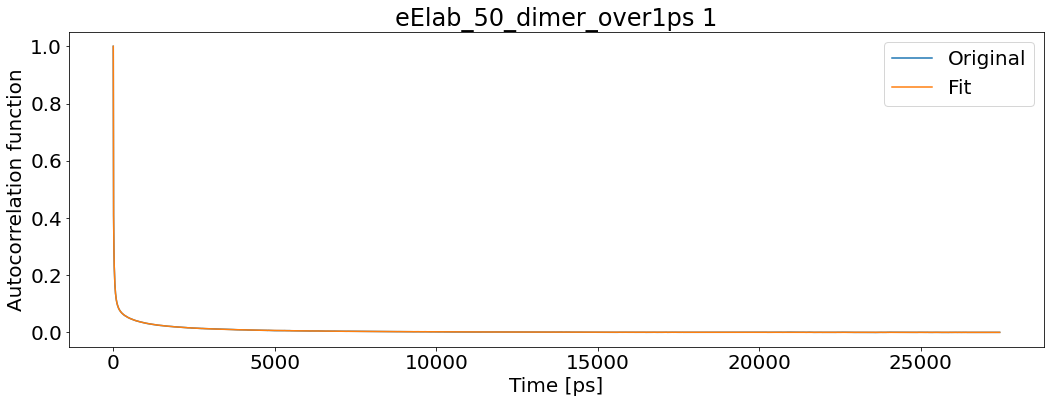

T1: 3.796794061384611 T2: 2.193932874037766 NOE: -1.0684574885164806


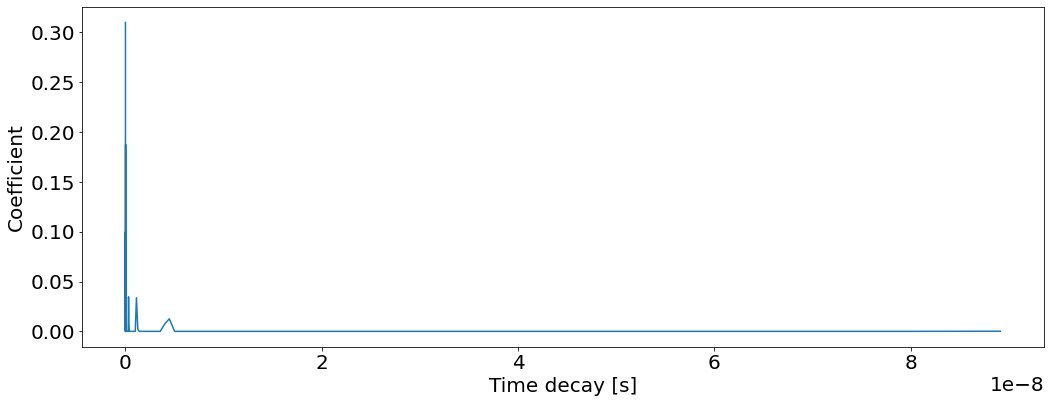

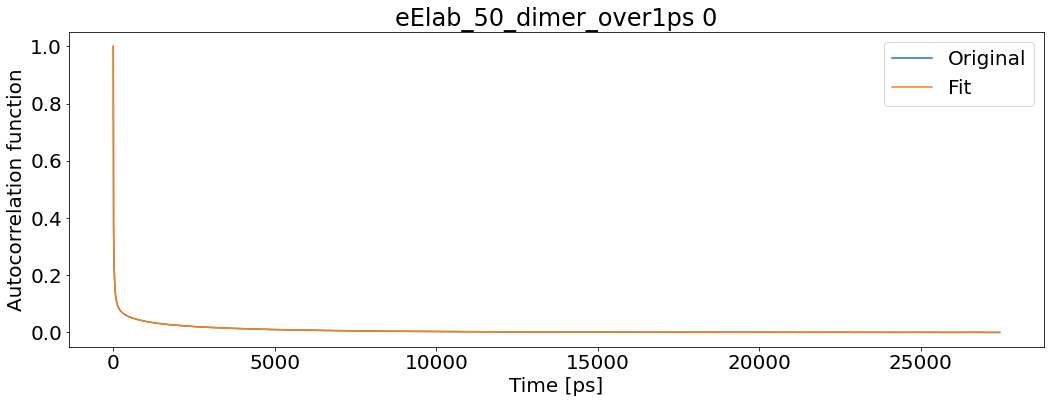

T1: 3.937705170961486 T2: 2.01524711399104 NOE: -0.9297044414213689


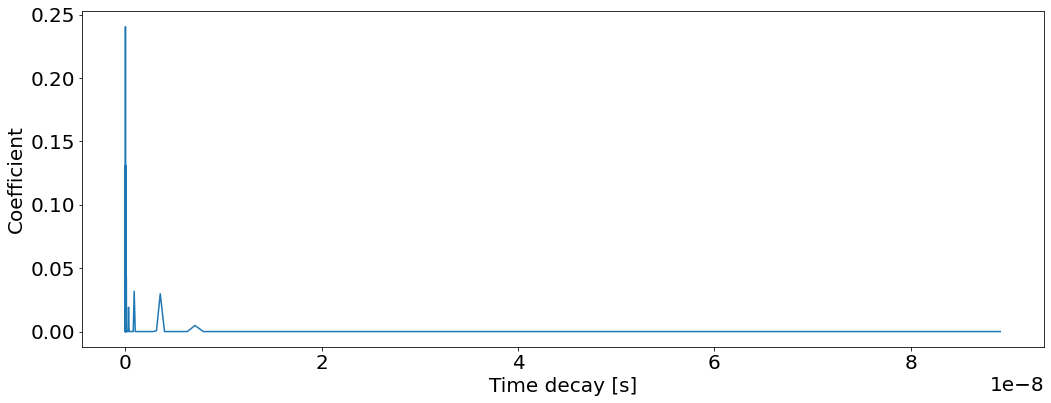

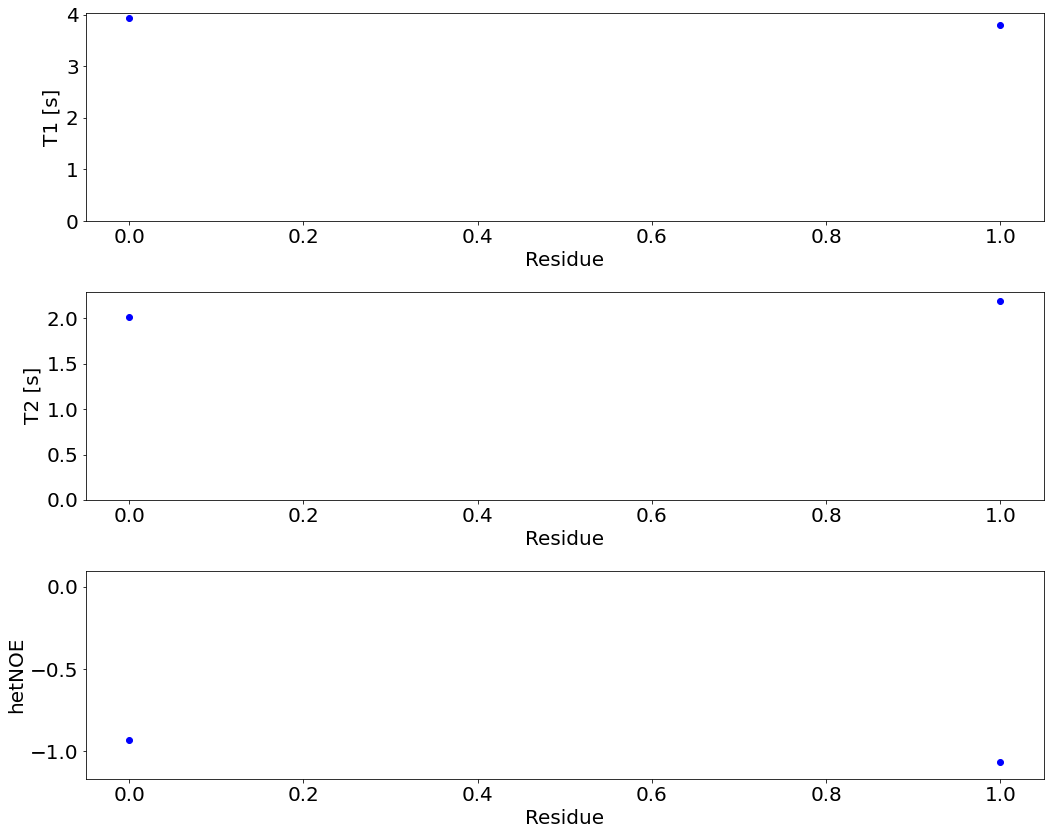

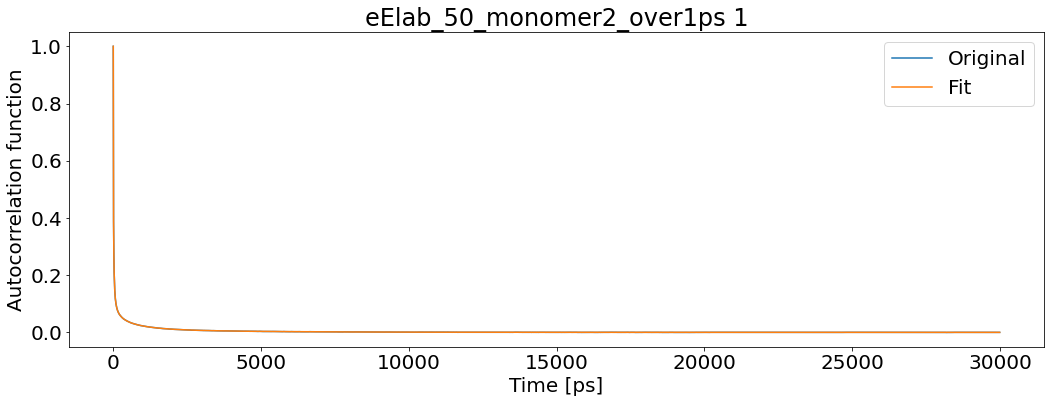

T1: 4.331282389822832 T2: 2.8893571874499804 NOE: -1.2834725703876595


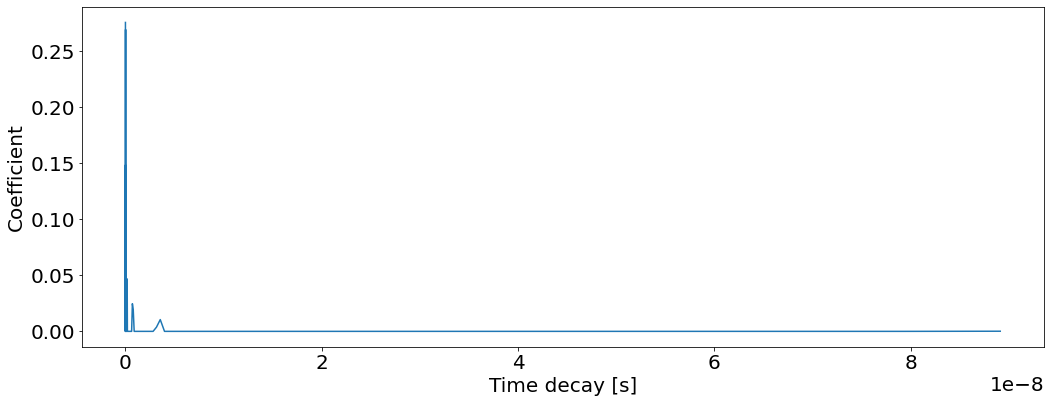

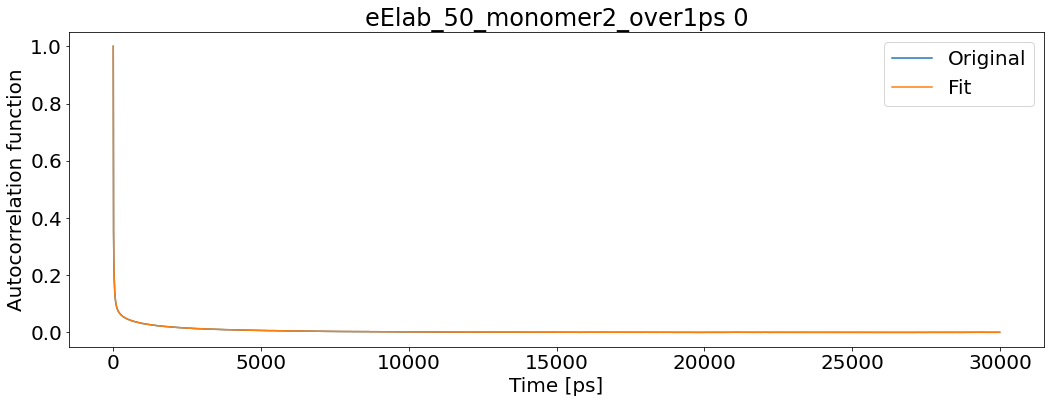

T1: 4.3398076407475115 T2: 2.3233081598326324 NOE: -0.9896966652410686


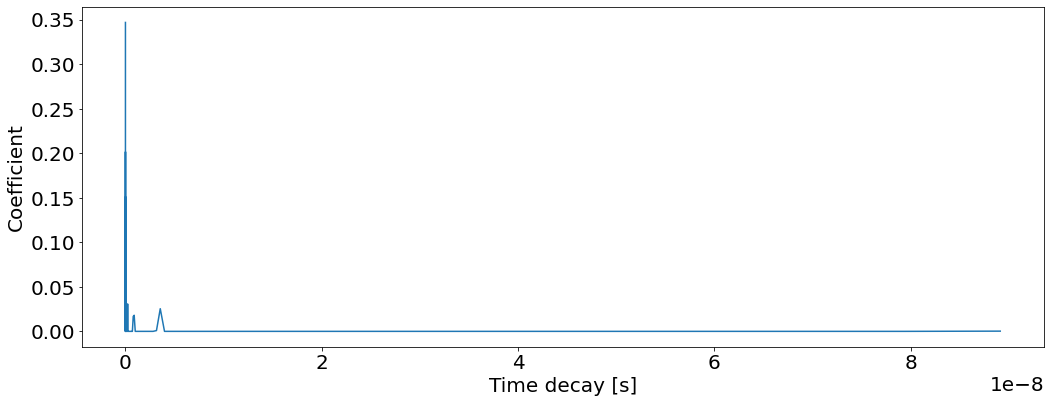

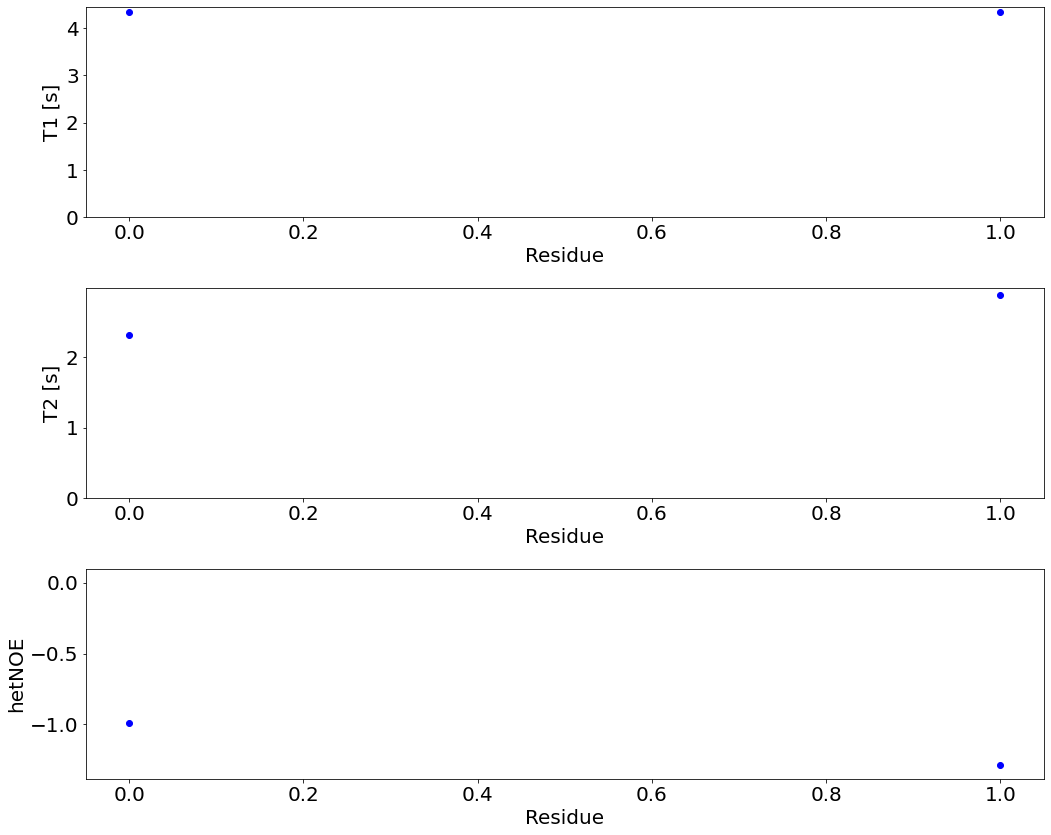

In [81]:
### New analysis, all times over 1 ps

OP=0 # order parameter
smallest_corr_time=0 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/50 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
#magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
magn_field_MHz=850 # for values in MHz
magnetic_field=magn_field_MHz*2*np.pi/gammaH*10**6
nuclei="15N" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen curl


systems=["hMff_40SDS_replica1","hMff_40SDS_replica2","hMff_40SDS_replica3",
        "hMff_45SDS_replica1","hMff_45SDS_replica2","hMff_45SDS_replica3",
        "hMff_50SDS_replica1","hMff_50SDS_replica2","hMff_50SDS_replica3",
        "hMff_60SDS_replica1","hMff_60SDS_replica2","hMff_60SDS_replica3",
        "GWALP_dimer_40SDS","GWALP_dimer_45SDS","GWALP_dimer_50SDS",
        "GWALP_dimer_60SDS","GWALP_dimer_70SDS","GWALP_monomer_40",
        "GWALP_monomer_45","GWALP_monomer_50","eElab_50_dimer",
        "eElab_50_monomer2"]

relaxations_1ps={}

for system in systems:
    folder_path="new_analysis/"+system+"/"
    output_name=system+"_over1ps"
    yaml_output=output_path+output_name+".yaml"
    relaxations_1ps[system]=rt.analyze_all_in_folder(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,folder_path,nuclei,output_name)
    rt.plot_T1_T2_noe(relaxations_1ps[system],yaml_output,"pic.png")


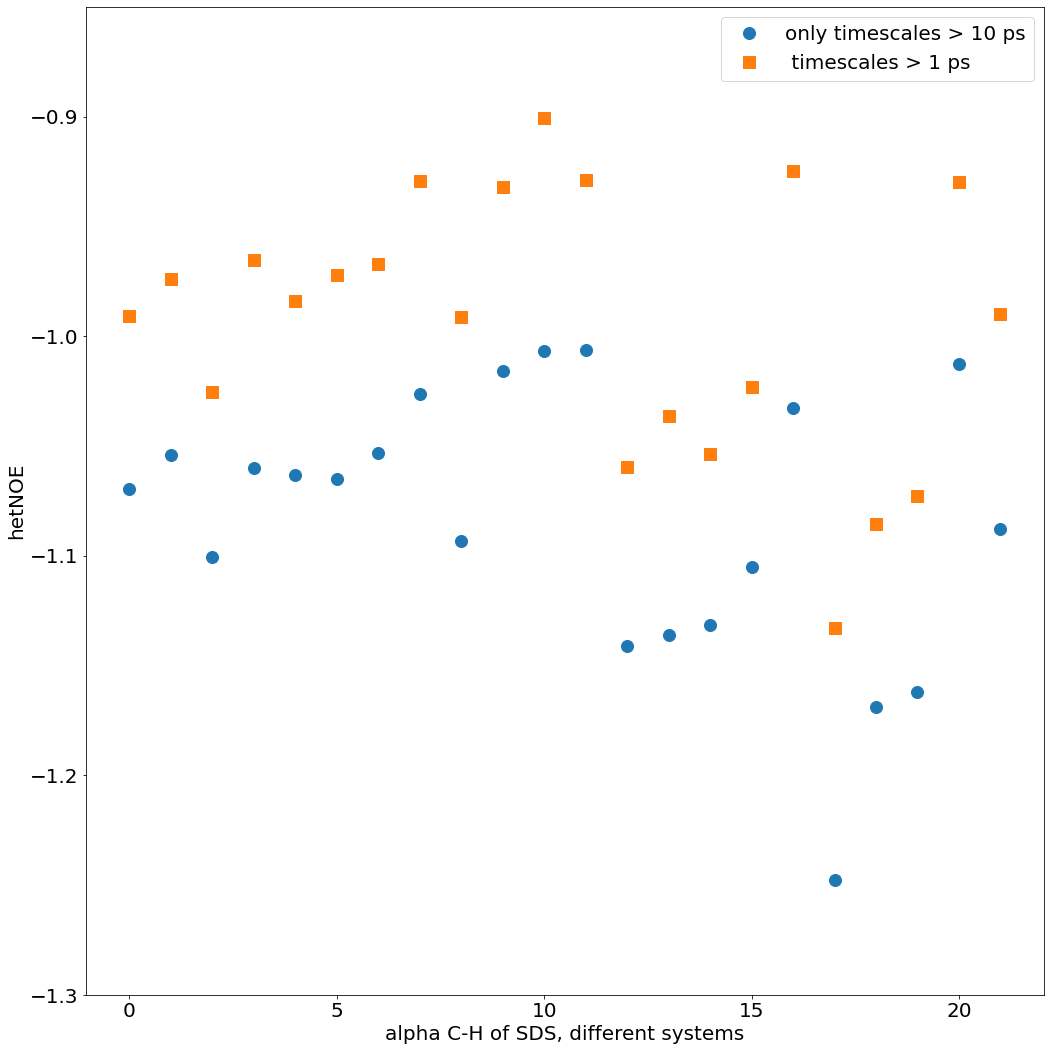

In [112]:

for i,system in enumerate(relaxations):
    plt.plot(i,relaxations[system][0].NOE,"o",c="C0",markersize=12)
    plt.plot(i,relaxations_1ps[system][0].NOE,"s",c="C1",markersize=12)
    
plt.xlabel("alpha C-H of SDS, different systems")
plt.ylabel("hetNOE")

plt.plot(0,0,"o",c="C0",markersize=12,label="only timescales > 10 ps")
plt.plot(0,0,"s",c="C1",markersize=12,label=" timescales > 1 ps")

plt.ylim(-1.3,-0.85)
plt.legend()

plt.savefig("diff_fiting_noe.png")

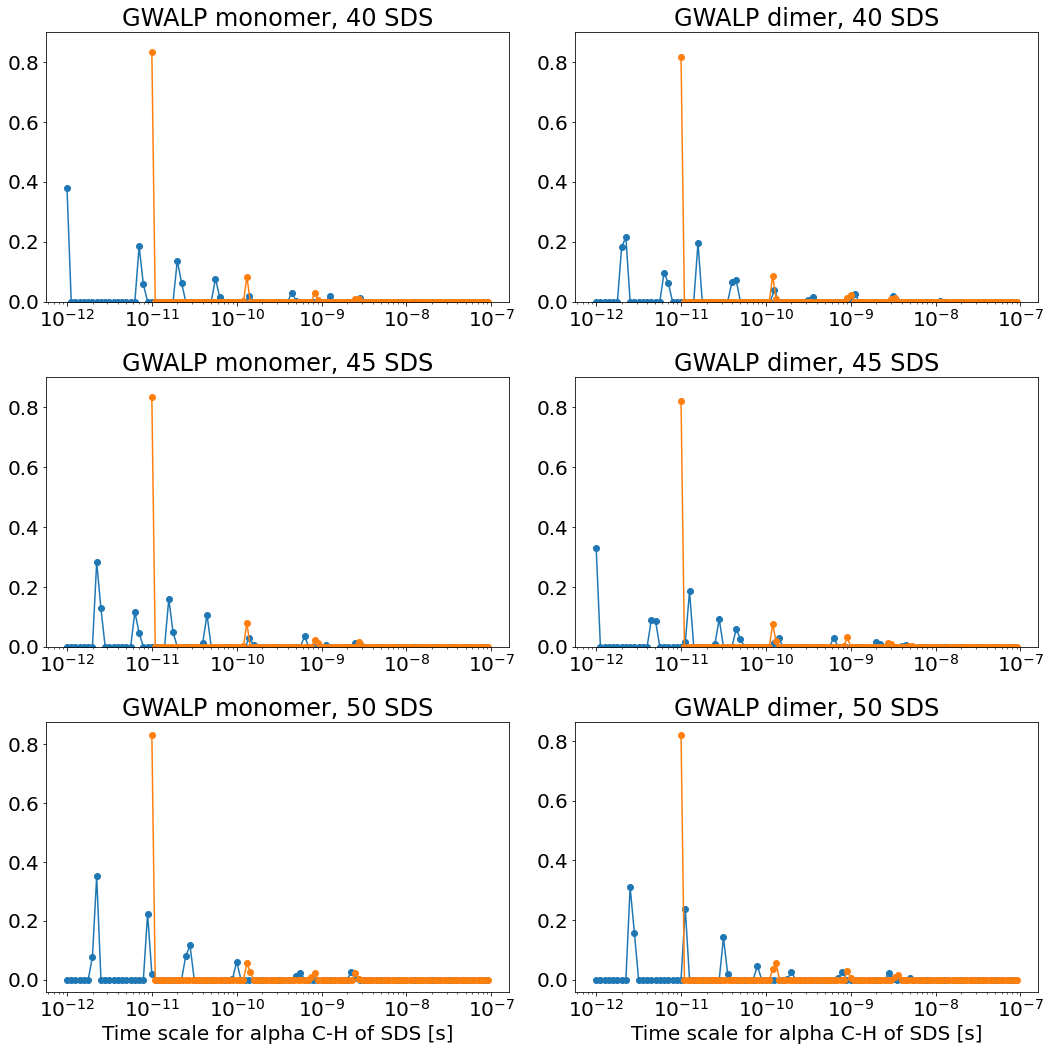

In [102]:
plt.rcParams.update({'font.size': 20})

plt.rcParams["figure.figsize"] = [15.00, 15]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(3,2)
(ax1, ax2, ax3, ax4,ax5,ax6)=axes.flatten()

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax4.set_xscale('log')
ax5.set_xscale('log')
ax6.set_xscale('log')


systems=[GWALP_mon_40_1,relaxations["GWALP_monomer_40"]]
for system in systems:
    ax1.plot(system[0].Ctimes,system[0].Coeffs,"-o")

systems=[GWALP_mon_45_1,relaxations["GWALP_monomer_45"]]
for system in systems:
    ax3.plot(system[0].Ctimes,system[0].Coeffs,"-o")

    
systems=[GWALP_mon_50_1,relaxations["GWALP_monomer_50"]]
for system in systems:
    ax5.plot(system[0].Ctimes,system[0].Coeffs,"-o")

    
systems=[GWALP_dim_40_1,relaxations["GWALP_dimer_40SDS"]]
for system in systems:
    ax2.plot(system[0].Ctimes,system[0].Coeffs,"-o")


systems=[GWALP_dim_45_1,relaxations["GWALP_dimer_45SDS"]]
for system in systems:
    ax4.plot(system[0].Ctimes,system[0].Coeffs,"-o")

systems=[GWALP_dim_50_1,relaxations["GWALP_dimer_50SDS"]]
for system in systems:
    ax6.plot(system[0].Ctimes,system[0].Coeffs,"-o")

    
topLim=0.9
ax1.set_ylim([0,topLim])
ax2.set_ylim([0,topLim])
ax3.set_ylim([0,topLim])
ax4.set_ylim([0,topLim])
ax4.set_ylim([0,topLim])
ax4.set_ylim([0,topLim])

ax1.set_title("GWALP monomer, 40 SDS")
ax2.set_title("GWALP dimer, 40 SDS")
ax3.set_title("GWALP monomer, 45 SDS")
ax4.set_title("GWALP dimer, 45 SDS")
ax5.set_title("GWALP monomer, 50 SDS")
ax6.set_title("GWALP dimer, 50 SDS")


ax5.set_xlabel("Time scale for alpha C-H of SDS [s]")
ax6.set_xlabel("Time scale for alpha C-H of SDS [s]")

plt.savefig("TimeScales_GWALP.png")

In [1]:
pwd

'/home/ricky/Documents/from_work/git/CorysPeptides/calculate_relax_from_SDS_proteins'